In [1]:
# import all revelant packages
from headers import *
from twoPoint import *
from twoPointNoise import *
from notebook_helper_functions import *

# Create the forecast objects

In [2]:
params = {
          'output': 'tCl lCl mPk',
          'l_max_scalars': 1000,
          'lensing': 'yes',
          'P_k_max_h/Mpc': 10.,
          'non linear':'halofit', 
          'z_pk': '0.0,1087',
          'A_s': 2.10732e-9,
          'n_s': 0.96824,
          'alpha_s': 0.,
          'h': 0.6770,
          'N_ur': 1.0196,
          'N_ncdm': 2,
          'm_ncdm': '0.01,0.05',
          'tau_reio': 0.0568,
          'omega_b': 0.02247,
          'omega_cdm': 0.11923,
          'Omega_k': 0.}

cosmo = Class()   ; cosmo_fid = Class()
cosmo.set(params) ; cosmo_fid.set(params)
cosmo.compute()   ; cosmo_fid.compute()

In [3]:
exp = experiment(zmin=2., zmax=5., nbins=4, fsky=0.34, sigma_z=0.0, LBG=True)  # 6
fishcast = fisherForecast(experiment=exp,cosmo=cosmo,cosmo_fid=cosmo_fid,\
                          Nk=2000,Nmu=100,velocileptors=True,name='MegaMapper')
print('MegaMapper')
#
DESI = experiment(zmin=0.6, zmax=1.7, nbins=4, fsky=0.34, sigma_z=0.0, ELG=True)
desiCast = fisherForecast(experiment=DESI,cosmo=cosmo,cosmo_fid=cosmo_fid,\
                          Nk=2000,Nmu=100,velocileptors=True,name='DESI')
print('DESI')
#
dat = np.genfromtxt('prep_scripts/desi2_bias_and_number_density.txt')
zs,bs,ns = dat[:,0],dat[:,1],dat[:,2]
b = interp1d(zs,bs)
n = interp1d(zs,ns)
DESI2 = experiment(zmin=1.7,zmax=3,nbins=4,fsky=0.5,sigma_z=0.0,b=b,n=n)
desi2Cast = fisherForecast(experiment=DESI2,cosmo=cosmo,cosmo_fid=cosmo_fid,\
                           Nk=2000,Nmu=100,velocileptors=True,name='DESI2')
print('DESI2')
#
DESI_lin = experiment(zmin=0.6, zmax=1.7, nbins=4, fsky=0.34, sigma_z=0.0, ELG=True)
desiCast_lin = fisherForecast(experiment=DESI_lin,cosmo=cosmo,cosmo_fid=cosmo_fid,\
                          Nk=2000,Nmu=100,velocileptors=False,linear=True,name='DESI_linear')
print('DESI_linear')
#
DESI_lin2 = experiment(zmin=0.6, zmax=1.7, nbins=4, fsky=0.34, sigma_z=0.0, ELG=True)
desiCast_lin2 = fisherForecast(experiment=DESI_lin2,cosmo=cosmo,cosmo_fid=cosmo_fid,\
                          Nk=2000,Nmu=100,velocileptors=False,linear2=True,name='DESI_linear2')
print('DESI_linear2')
#
Euclid = experiment(zmin=0.9, zmax=1.8, nbins=4, fsky=0.36, sigma_z=0.0, Euclid=True)    # 5
eucCast = fisherForecast(experiment=Euclid,cosmo=cosmo,cosmo_fid=cosmo_fid,\
                         Nk=2000,Nmu=100,velocileptors=True,name='Euclid')
print('Euclid')
#
Euclid_noAP = experiment(zmin=0.9, zmax=1.8, nbins=4, fsky=0.36, sigma_z=0.0, Euclid=True)    # 5
eucCast_noAP = fisherForecast(experiment=Euclid_noAP,cosmo=cosmo,cosmo_fid=cosmo_fid,\
                         Nk=2000,Nmu=100,velocileptors=True,name='Euclid_noAP')
print('Euclid_noAP')
#
#b = interp1d([2,3,4,5],[2.5,4.0,3.5,5.5],kind='linear')
n = interp1d([2,3,4,5],np.array([9.8,1.2,1.0,0.4])*(1e-4),kind='linear')
MegaMapper = experiment(zmin=2., zmax=5., nbins=4, fsky=0.34, sigma_z=0.0, n=n, LBG=True, custom_n=True)
megaCast = fisherForecast(experiment=MegaMapper,cosmo=cosmo,cosmo_fid=cosmo_fid,\
                          Nk=2000,Nmu=100,velocileptors=True,name='MegaMapper_fiducial')
print('MegaMapper_fiducial')
#
#MegaMapper_low_N2 = experiment(zmin=2., zmax=5., nbins=4, fsky=0.34, sigma_z=0.0, b=b, n=n)
#megaCast_low_N2 = fisherForecast(experiment=MegaMapper_low_N2,cosmo=cosmo,cosmo_fid=cosmo_fid,\
                          #Nk=2000,Nmu=100,velocileptors=True,name='MegaMapper_fiducial_low_N2')
#print('MegaMapper_fiducial_low_N2')
#
MegaMapper_lin = experiment(zmin=2., zmax=5., nbins=4, fsky=0.34, sigma_z=0.0, n=n, LBG=True, custom_n=True)
megaCast_lin = fisherForecast(experiment=MegaMapper_lin,cosmo=cosmo,cosmo_fid=cosmo_fid,\
                          Nk=2000,Nmu=100,velocileptors=False,linear=True,name='MegaMapper_fiducial_linear')
print('MegaMapper_fiducial_linear')
#
MegaMapper_lin2 = experiment(zmin=2., zmax=5., nbins=4, fsky=0.34, sigma_z=0.0, n=n, LBG=True, custom_n=True)
megaCast_lin2 = fisherForecast(experiment=MegaMapper_lin2,cosmo=cosmo,cosmo_fid=cosmo_fid,\
                          Nk=2000,Nmu=100,velocileptors=False,linear2=True,name='MegaMapper_fiducial_linear2')
print('MegaMapper_fiducial_linear2')
#
PUMA_5_opt = experiment(zmin=2., zmax=6., nbins=4, fsky=0.5, sigma_z=0.0, HI=True, pesimistic=False,Ndetectors=5e3,sigv=10)   # 8
puma5optCast = fisherForecast(experiment=PUMA_5_opt,cosmo=cosmo,cosmo_fid=cosmo_fid,\
                              Nk=2000,Nmu=100,velocileptors=True,name='PUMA5K')
print('PUMA-5K optimistic')
#
PUMA_5_pess = experiment(zmin=2., zmax=6., nbins=4, fsky=0.5, sigma_z=0.0, HI=True, pesimistic=True,Ndetectors=5e3,sigv=10)   # 8
puma5pessCast = fisherForecast(experiment=PUMA_5_pess,cosmo=cosmo,cosmo_fid=cosmo_fid,\
                               Nk=2000,Nmu=100,velocileptors=True,name='PUMA5K')
print('PUMA-5K pessimistic')
#
PUMA_32_opt = experiment(zmin=2., zmax=6., nbins=4, fsky=0.5, sigma_z=0.0, HI=True,pesimistic=False,Ndetectors=32e3,sigv=10)  # 8
puma32optCast = fisherForecast(experiment=PUMA_32_opt,cosmo=cosmo,cosmo_fid=cosmo_fid,\
                               Nk=2000,Nmu=100,velocileptors=True,name='PUMA32K')
print('PUMA-32K optimistic')
#
PUMA_32_opt_lin = experiment(zmin=2., zmax=6., nbins=4, fsky=0.5, sigma_z=0.0, HI=True,pesimistic=False,Ndetectors=32e3,sigv=10)  # 8
puma32optCast_lin = fisherForecast(experiment=PUMA_32_opt_lin,cosmo=cosmo,cosmo_fid=cosmo_fid,\
                               Nk=2000,Nmu=100,velocileptors=False,linear=True,name='PUMA32K_linear')
print('PUMA-32K optimistic linear')
#
PUMA_32_opt_lin2 = experiment(zmin=2., zmax=6., nbins=4, fsky=0.5, sigma_z=0.0, HI=True,pesimistic=False,Ndetectors=32e3,sigv=10)  # 8
puma32optCast_lin2 = fisherForecast(experiment=PUMA_32_opt_lin2,cosmo=cosmo,cosmo_fid=cosmo_fid,\
                               Nk=2000,Nmu=100,velocileptors=False,linear2=True,name='PUMA32K_linear2')
print('PUMA-32K optimistic linear2')
#
PUMA_32_pess = experiment(zmin=2., zmax=6., nbins=4, fsky=0.5, sigma_z=0.0, HI=True,pesimistic=True,Ndetectors=32e3,sigv=10)  # 8
puma32pessCast = fisherForecast(experiment=PUMA_32_pess,cosmo=cosmo,cosmo_fid=cosmo_fid,\
                                Nk=2000,Nmu=100,velocileptors=True,name='PUMA32K')
print('PUMA-32K pessimistic')
#
HIRAX_opt = HIRAX = experiment(zmin=0.8, zmax=2.5, nbins=4, fsky=0.36, sigma_z=0.0, HI=True, fill_factor=1, 
                   tint=4, Ndetectors=1e3,pesimistic=False,sigv=10)
hiraxOptCast = fisherForecast(experiment=HIRAX_opt,cosmo=cosmo,cosmo_fid=cosmo_fid,\
                              Nk=2000,Nmu=100,velocileptors=True,name='HIRAX')
print('HIRAX optimistic')
#
HIRAX_pess = HIRAX = experiment(zmin=0.8, zmax=2.5, nbins=4, fsky=0.36, sigma_z=0.0, HI=True, fill_factor=1, 
                   tint=4, Ndetectors=1e3,pesimistic=True,sigv=10)
hiraxPessCast = fisherForecast(experiment=HIRAX_pess,cosmo=cosmo,cosmo_fid=cosmo_fid,\
                               Nk=2000,Nmu=100,velocileptors=True,name='HIRAX')
print('HIRAX pessimistic')
#
zedges = np.array([1.6,2.4,2.93,3.46,4.])
mse = experiment(zmin=1.6, zmax=4., zedges=zedges, fsky=0.24, sigma_z=0.0, MSE=True)
mseCast = fisherForecast(experiment=mse,cosmo=cosmo,cosmo_fid=cosmo_fid,\
                         Nk=2000,Nmu=100,velocileptors=True,name='MSE')
print('MSE')
#
cv = experiment(zmin=2., zmax=5., nbins=4, fsky=0.34, sigma_z=0.0, LBG=True, custom_n=True, n=10000.) # 6
cv_f = fisherForecast(experiment=cv,cosmo=cosmo,cosmo_fid=cosmo_fid,\
                      Nk=2000,Nmu=100,velocileptors=False,name='MegaMapper')
print('CV limited')
#
roman = experiment(zmin=1, zmax=3, nbins=4, fsky=0.05, sigma_z=0.0, Roman=True)
romanCast = fisherForecast(experiment=roman,cosmo=cosmo,cosmo_fid=cosmo_fid,kmin=5.e-4,\
                          kmax=1.,Nk=2000,Nmu=100,velocileptors=True,name='Roman')
print('Roman')
#
z = np.array([0.1,0.3,0.5,0.7,0.9,1.3,1.9,2.5,3.1,3.7,4.3])
b = np.array([0.76010544, 0.83387431, 1.00240244, 1.114572  , 1.21331288,
              1.86881653, 2.77297561, 3.40377494, 4.0649172 , 6.01647153,6.69599515])
n = np.array([4.742000e-02, 2.896000e-02, 1.002730e-02, 7.330430e-03,5.128101e-03, 
           8.535260e-04, 1.945280e-04, 1.196310e-04,5.670300e-05, 3.758000e-06, 1.648000e-06])
bSPHEREx = interp1d(z,b)
nSPHEREx = interp1d(z,n)

spherex = experiment(zmin=0.1, zmax=4.3, nbins=4, fsky=0.65, sigma_z=0.0, b=bSPHEREx, n=nSPHEREx)
spherexCast = fisherForecast(experiment=spherex,cosmo=cosmo,kmin=5.e-4,\
                          kmax=1.,Nk=2000,Nmu=100,velocileptors=True,name='SPHEREx')
print('SPHEREx')

n = interp1d([2,3,4,5],2.85*np.array([9.8,1.2,1.0,0.4])*(1e-4),kind='linear')
spectel = experiment(zmin=2., zmax=5., nbins=1, fsky=0.34, sigma_z=0.0, n=n, LBG=True, custom_n=True)
specCast = fisherForecast(experiment=spectel,cosmo=cosmo,cosmo_fid=cosmo_fid,\
                          Nk=2000,Nmu=100,velocileptors=True,name='SpecTel')
print('SpecTel')

MegaMapper
DESI
DESI2
DESI_linear
DESI_linear2
Euclid
Euclid_noAP
MegaMapper_fiducial
MegaMapper_fiducial_linear
MegaMapper_fiducial_linear2
PUMA-5K optimistic
PUMA-5K pessimistic
PUMA-32K optimistic
PUMA-32K optimistic linear
PUMA-32K optimistic linear2
PUMA-32K pessimistic
HIRAX optimistic
HIRAX pessimistic
MSE
CV limited
Roman
SPHEREx
SpecTel


In [4]:
exp2 = experiment(zmin=0.1, zmax=6., nbins=1, fsky=1, sigma_z=0.0, b = lambda z: 1 + 0*z, n = lambda z: 1e10 + 0*z)  # 6
fishcast2 = fisherForecast(experiment=exp2,cosmo=cosmo,cosmo_fid=cosmo_fid,\
                          Nk=2000,Nmu=100,velocileptors=True,name='FISH2',setup=False)

fishcast2.linear = True ; fishcast2.velocileptors = False

In [6]:
DESI_higher_Mnu = experiment(zmin=0.6, zmax=1.7, nbins=8, fsky=0.34, sigma_z=0.0, ELG=True)
desiHighMnuCast = fisherForecast(experiment=DESI_higher_Mnu,cosmo=cosmo,cosmo_fid=cosmo_fid,\
                          Nk=2000,Nmu=100,velocileptors=True,name='DESI_higher_Mnu')
print('DESI_higher_Mnu')

DESI_higher_Mnu


In [20]:
def _MSEn(z):
   zs = np.array([1.6,2.2,2.6,4.0])
   ns = np.array([1.8,1.8,1.1,1.1])*1e-4
   return interp1d(zs, ns, kind='linear', bounds_error=False, fill_value=0.)(z)

def _MSEb(z): return cosmo_fid.scale_independent_growth_factor(0)/cosmo_fid.scale_independent_growth_factor(z)

In [23]:
mseold = experiment(zmin=1.6, zmax=4., nbins=1, fsky=0.24, sigma_z=0.0, n=_MSEn, b=_MSEb)
mseoldCast = fisherForecast(experiment=mseold,cosmo=cosmo,cosmo_fid=cosmo_fid,\
                          Nk=2000,Nmu=100,velocileptors=True,name='MSEold')

In [26]:
mseoldCast.velocileptors = False ; mseoldCast.linear=True
mse_Nmodes = mseoldCast.Nmodes(1.6,4.,200)+desi_Nmodes

In [4]:
mseCast.velocileptors = False ; mseCast.linear=True
mse_Nmodes = mseCast.Nmodes(1.6,4.,200)
mseCast.velocileptors = True ; mseCast.linear=False

# Propaganda plot

In [177]:
megaCast.velocileptors=False
puma32optCast.velocileptors=False

megaCast.linear=True
puma32optCast.linear=True

N = 15 ; M = 20
ks_mega = np.linspace(0.1,0.95,N)
Deltak = ks_mega[1]-ks_mega[0]
modes_mega = np.array([megaCast.Nmodes_fixed_k(k,2,5,M,Deltak=Deltak) for k in ks_mega])


N = 15 ; M = 20
ks_puma = np.linspace(0.1,0.95,N)+0.03
Deltak = ks_puma[1]-ks_puma[0]
modes_puma = np.array([puma32optCast.Nmodes_fixed_k(k,2,6,M,Deltak=Deltak) for k in ks_puma])

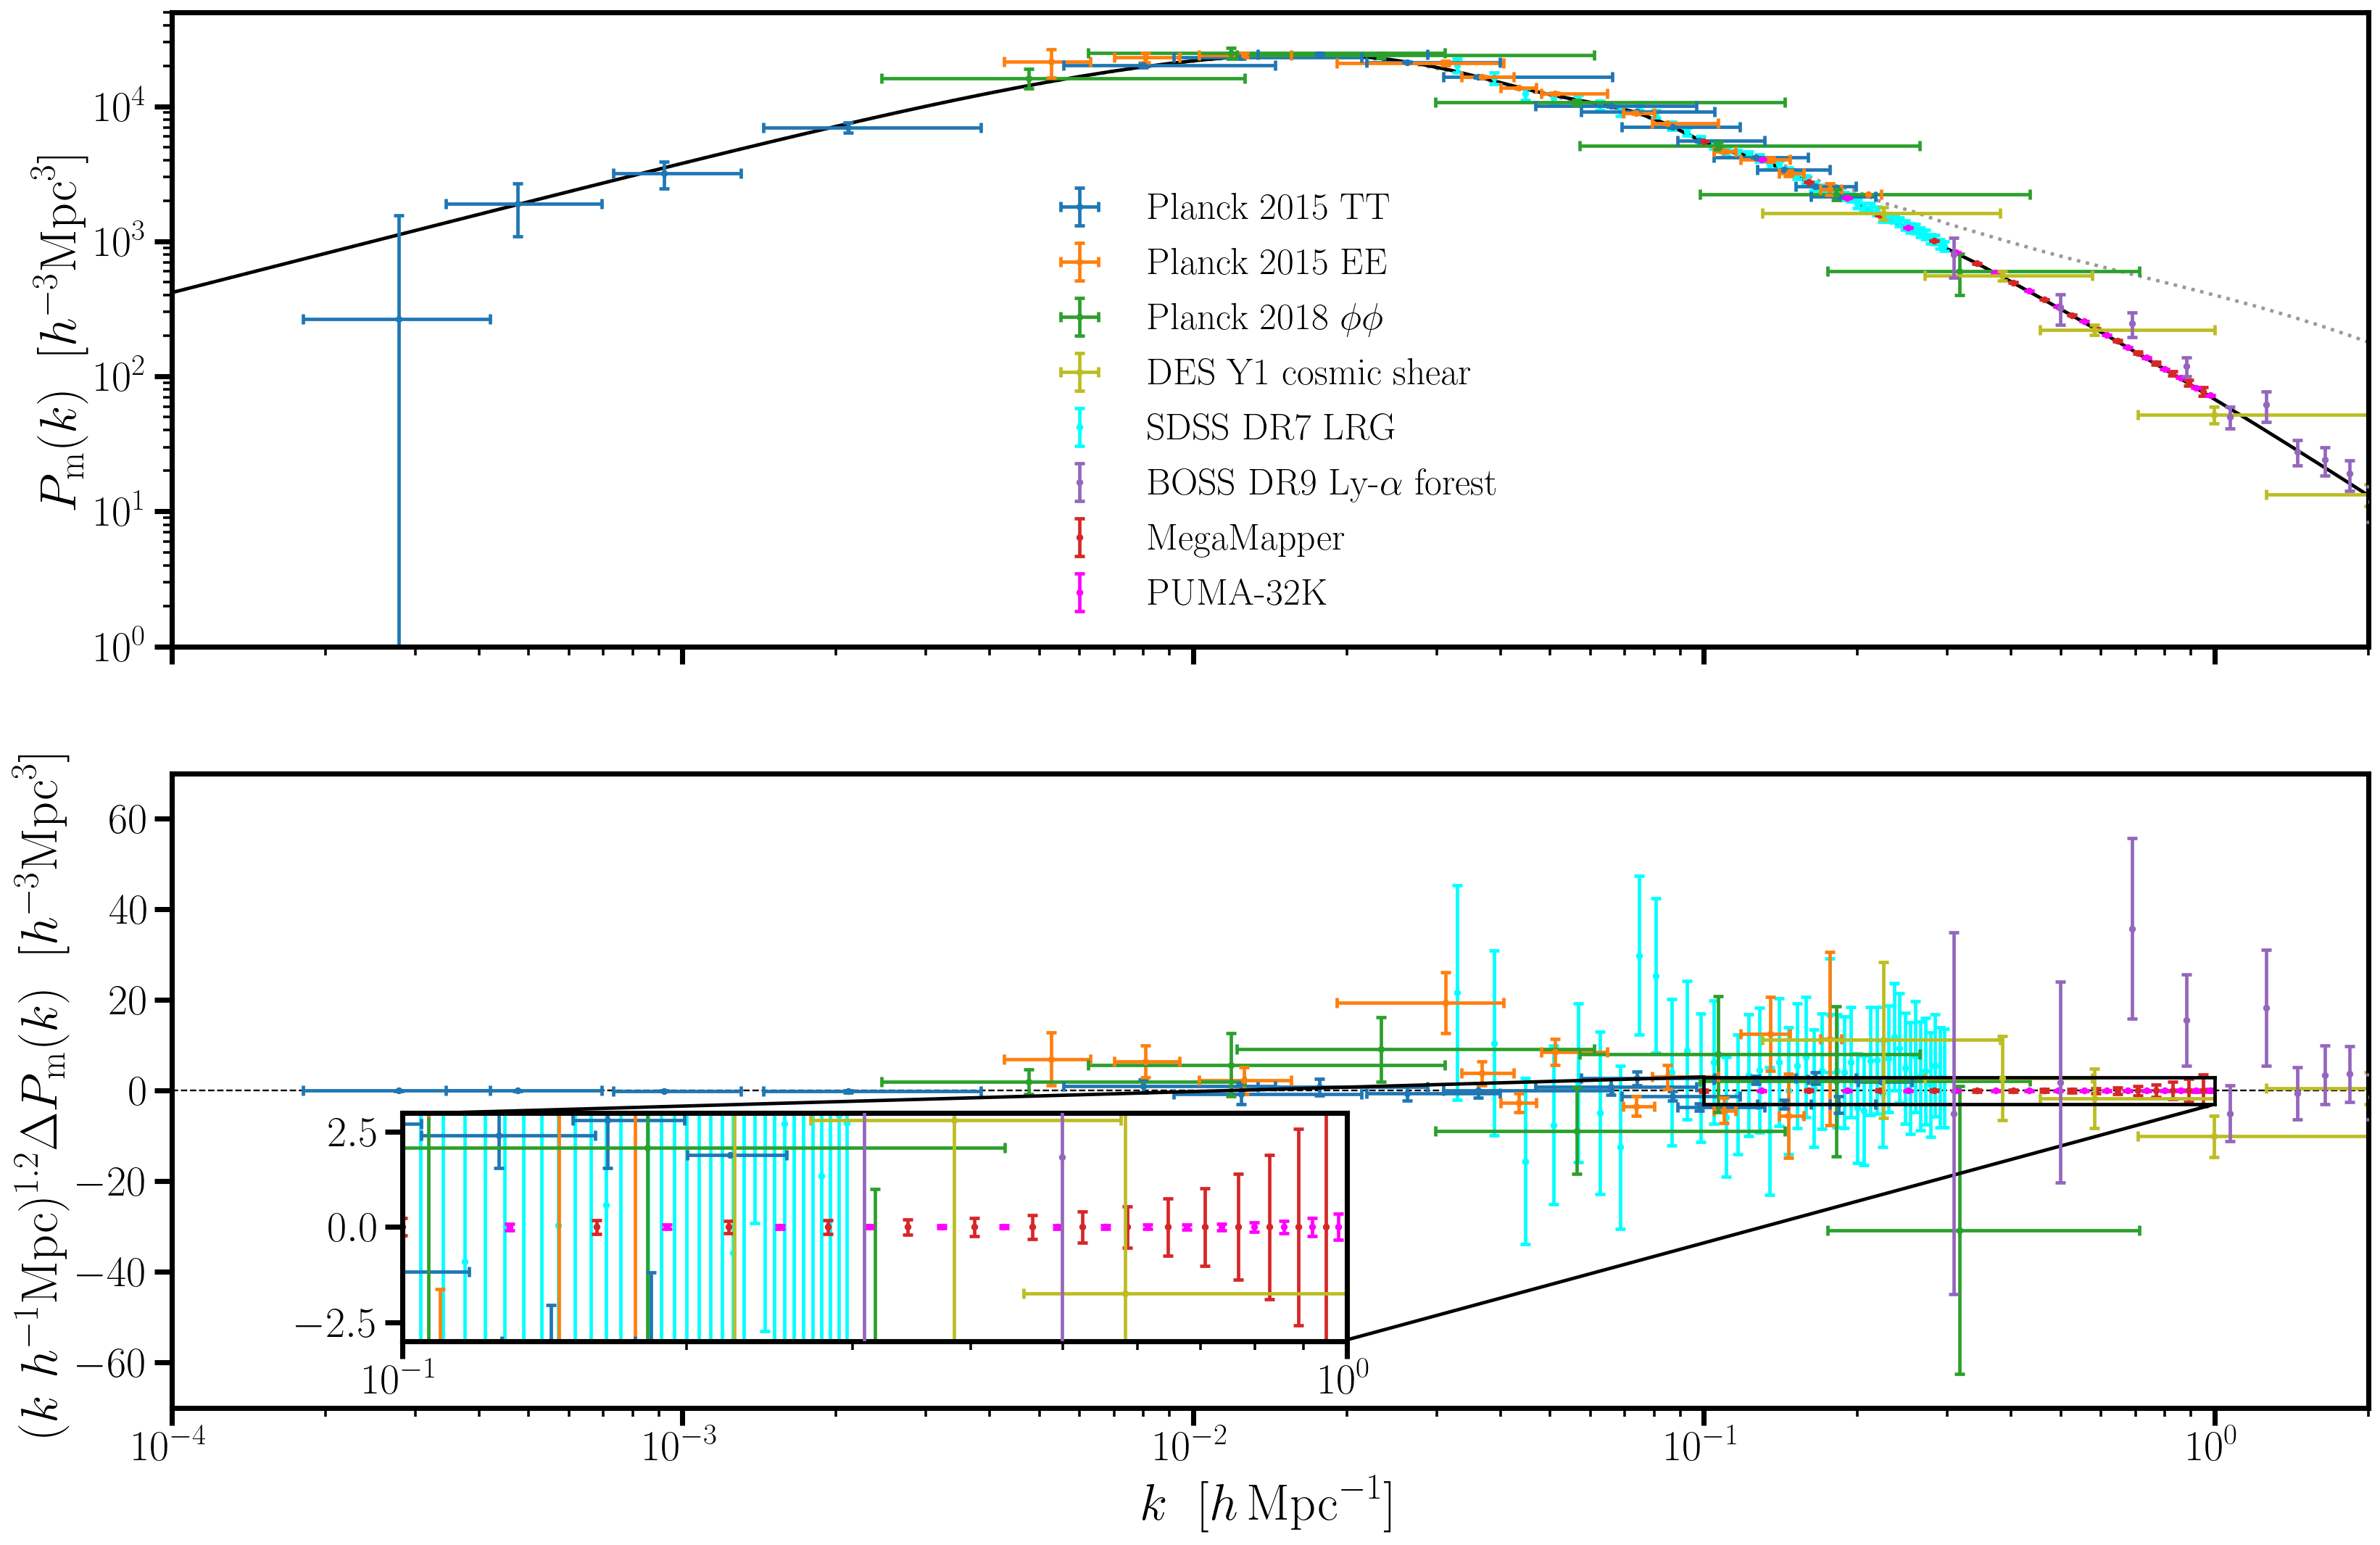

In [182]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes, InsetPosition,mark_inset

#########################################################################################################
k = np.genfromtxt('input/M/k.txt')
P = np.genfromtxt('input/M/P.txt')
Pnl = np.genfromtxt('input/M/Pnl.txt')
SDSS = np.genfromtxt('input/M/SDSS.txt')
SDSS_res = np.genfromtxt('input/M/SDSS_res.txt')
BOSS = np.genfromtxt('input/M/BOSS.txt')
BOSS_res = np.genfromtxt('input/M/BOSS_res.txt')
PlanckTT = np.genfromtxt('input/M/PlanckTT.txt')
PlanckTT_res = np.genfromtxt('input/M/PlanckTT_res.txt')
PlanckEE = np.genfromtxt('input/M/PlanckEE.txt')
PlanckEE_res = np.genfromtxt('input/M/PlanckEE_res.txt')
PlanckPP = np.genfromtxt('input/M/PlanckPP.txt')
PlanckPP_res = np.genfromtxt('input/M/PlanckPP_res.txt')
DES = np.genfromtxt('input/M/DES.txt')
DES_res = np.genfromtxt('input/M/DES_res.txt')

##########################################################################################################

fig, ax = plt.subplots(2,1,figsize=(23,15),dpi=170,sharex=True)

ebar_kwargs = {'capsize':3, 'elinewidth':2, 'markeredgewidth':2, 'marker':'.', 'ls':'', 'markersize':4}

ax[0].plot(k, Pnl,"k:", lw=2, zorder=-10, alpha=0.4)
ax[0].plot(k, P,"k",lw=2, zorder=-10)

P_interp = interp1d(k,P)

ax[0].errorbar(PlanckTT[0],PlanckTT[2],yerr=PlanckTT[3],xerr=[PlanckTT[4],PlanckTT[5]],label="Planck 2015 TT", zorder=-1,**ebar_kwargs)
ax[0].errorbar(PlanckEE[0],PlanckEE[2],yerr=PlanckEE[3],xerr=[PlanckEE[4],PlanckEE[5]],label="Planck 2015 EE", zorder=-1,**ebar_kwargs)
ax[0].errorbar(PlanckPP[0],PlanckPP[2],yerr=PlanckPP[3],xerr=[PlanckPP[4],PlanckPP[5]],label=r"Planck 2018 $\phi\phi$", zorder=-1,**ebar_kwargs)

ax[0].errorbar(DES[0],DES[2],yerr=DES[3],xerr=[DES[4],DES[5]],label=r"DES Y1 cosmic shear",**ebar_kwargs, c="C8")

ax[0].errorbar(SDSS[0],SDSS[1],SDSS[2],label="SDSS DR7 LRG", zorder=-5,**ebar_kwargs,c='cyan')
ax[0].errorbar(BOSS[0],BOSS[1],BOSS[2], label=r"BOSS DR9 Ly-$\alpha$ forest", zorder=4,**ebar_kwargs,c='C4')

ax[0].errorbar(ks_mega,P_interp(ks_mega),yerr=P_interp(ks_mega)*np.sqrt(2/modes_mega), zorder=-1,c='C3',label='MegaMapper',**ebar_kwargs)

ax[0].errorbar(ks_puma,P_interp(ks_puma),yerr=P_interp(ks_puma)*np.sqrt(2/modes_puma), zorder=-1,c='magenta',label='PUMA-32K',**ebar_kwargs)


ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].legend(loc="lower center",frameon=False,fontsize=22)
ax[0].set_xlim(1e-4,2)
ax[0].set_ylim(1,5e4)
ax[0].set_ylabel(r"$\; P_{\rm m}(k) \;\; [h^{-3}\text{Mpc}^3]$")
#ax[0].set_xlabel(r"$k \;\; [h\,\text{Mpc}^{-1}]$")

# ==============
# Residual panel
# ==============

ax[1].errorbar(PlanckTT_res[0],PlanckTT_res[1],yerr=PlanckTT_res[3],xerr=[PlanckTT_res[4],PlanckTT_res[5]],label="Planck 2015 TT", zorder=-1,**ebar_kwargs)
ax[1].errorbar(PlanckEE_res[0],PlanckEE_res[1],yerr=PlanckEE_res[3],xerr=[PlanckEE_res[4],PlanckEE_res[5]],label="Planck 2015 EE", zorder=-1,**ebar_kwargs)
ax[1].errorbar(PlanckPP_res[0],PlanckPP_res[1],yerr=PlanckPP_res[3],xerr=[PlanckPP_res[4],PlanckPP_res[5]],label=r"Planck 2018 $\phi\phi$", zorder=-1,**ebar_kwargs)

ax[1].errorbar(DES_res[0],DES_res[1],yerr=DES_res[3],xerr=[DES_res[4],DES_res[5]],label=r"DES Y1 cosmic shear",**ebar_kwargs, c="C8")

ax[1].errorbar(SDSS_res[0],SDSS_res[1],SDSS_res[2],label="SDSS DR7 LRG", zorder=-5,**ebar_kwargs,c='cyan')
ax[1].errorbar(BOSS_res[0],BOSS_res[1],BOSS_res[2], label=r"BOSS DR9 Ly-$\alpha$ forest", zorder=4,**ebar_kwargs,c='C4')


ax[1].errorbar(ks_mega,0*P_interp(ks_mega),yerr=(ks_mega*params['h'])**1.2*P_interp(ks_mega)*np.sqrt(2/modes_mega), zorder=-1,c='C3',label='MegaMapper',**ebar_kwargs)

ax[1].errorbar(ks_puma,0*P_interp(ks_puma),yerr=(ks_puma*params['h'])**1.2*P_interp(ks_puma)*np.sqrt(2/modes_puma), zorder=-1,c='magenta',label='PUMA-32K',**ebar_kwargs)

ax[1].plot([1e-4, 6], [0,0], "k--", lw=1, zorder=-100)
ax[1].set_xscale("log")
ax[1].set_yscale("linear")
ax[1].set_xlim(1e-4,2)
ax[1].set_ylim(-70,70)
ax[1].set_ylabel(r"$\; (k \,\, h^{-1}\text{Mpc})^{1.2} \Delta P_\text{m}(k) \;\; [h^{-3} \text{Mpc}^3] $")
ax[1].set_xlabel(r"$k \;\; [h\,\text{Mpc}^{-1}]$")


# ============
# Inset
# ============

axi = plt.axes([0,0,1,1])
ip = InsetPosition(ax[1], [0.105,0.105,0.43,0.36])
axi.set_axes_locator(ip)

axi.errorbar(PlanckTT_res[0],PlanckTT_res[1],yerr=PlanckTT_res[3],xerr=[PlanckTT_res[4],PlanckTT_res[5]],label="Planck 2015 TT", zorder=-1,**ebar_kwargs)
axi.errorbar(PlanckEE_res[0],PlanckEE_res[1],yerr=PlanckEE_res[3],xerr=[PlanckEE_res[4],PlanckEE_res[5]],label="Planck 2015 EE", zorder=-1,**ebar_kwargs)
axi.errorbar(PlanckPP_res[0],PlanckPP_res[1],yerr=PlanckPP_res[3],xerr=[PlanckPP_res[4],PlanckPP_res[5]],label=r"Planck 2018 $\phi\phi$", zorder=-1,**ebar_kwargs)
axi.errorbar(DES_res[0],DES_res[1],yerr=DES_res[3],xerr=[DES_res[4],DES_res[5]],label=r"Planck 2018 $\phi\phi$",**ebar_kwargs, c="C8")
axi.errorbar(SDSS_res[0],SDSS_res[1],SDSS_res[2],label="SDSS DR7 LRG", zorder=-5,**ebar_kwargs,c='cyan')
axi.errorbar(BOSS_res[0],BOSS_res[1],BOSS_res[2], label=r"BOSS DR9 Ly-$\alpha$ forest", zorder=4,**ebar_kwargs,c='C4')
axi.errorbar(ks_mega,0*P_interp(ks_mega),yerr=(ks_mega*params['h'])**1.2*P_interp(ks_mega)*np.sqrt(2/modes_mega), zorder=-1,c='C3',label='MegaMapper',**ebar_kwargs)
axi.errorbar(ks_puma,0*P_interp(ks_puma),yerr=(ks_puma*params['h'])**1.2*P_interp(ks_puma)*np.sqrt(2/modes_puma), zorder=-1,c='magenta',label='PUMA-32K',**ebar_kwargs)


axi.set_xscale("log")
axi.set_yscale("linear")
axi.set_xlim(0.1,1)
axi.set_ylim(-3,3)
axi.set_xticklabels([],minor=True)
axi.set_xticks([0.1,1])


ax[1].plot([0.1,1],[-3,-3],c='k',lw=2)
ax[1].plot([0.1,1],[3,3],c='k',lw=2)
ax[1].plot([0.1,0.1],[-3,3],c='k',lw=2)
ax[1].plot([1,1],[-3,3],c='k',lw=2)
#
ax[1].plot([3.2e-4,0.1],[-5,3],c='k',lw=2)
ax[1].plot([2e-2,1],[-55,-3],c='k',lw=2)

plt.savefig('figures/marius_plot.pdf',bbox_inches='tight')

megaCast.velocileptors=True
puma32optCast.velocileptors=True

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


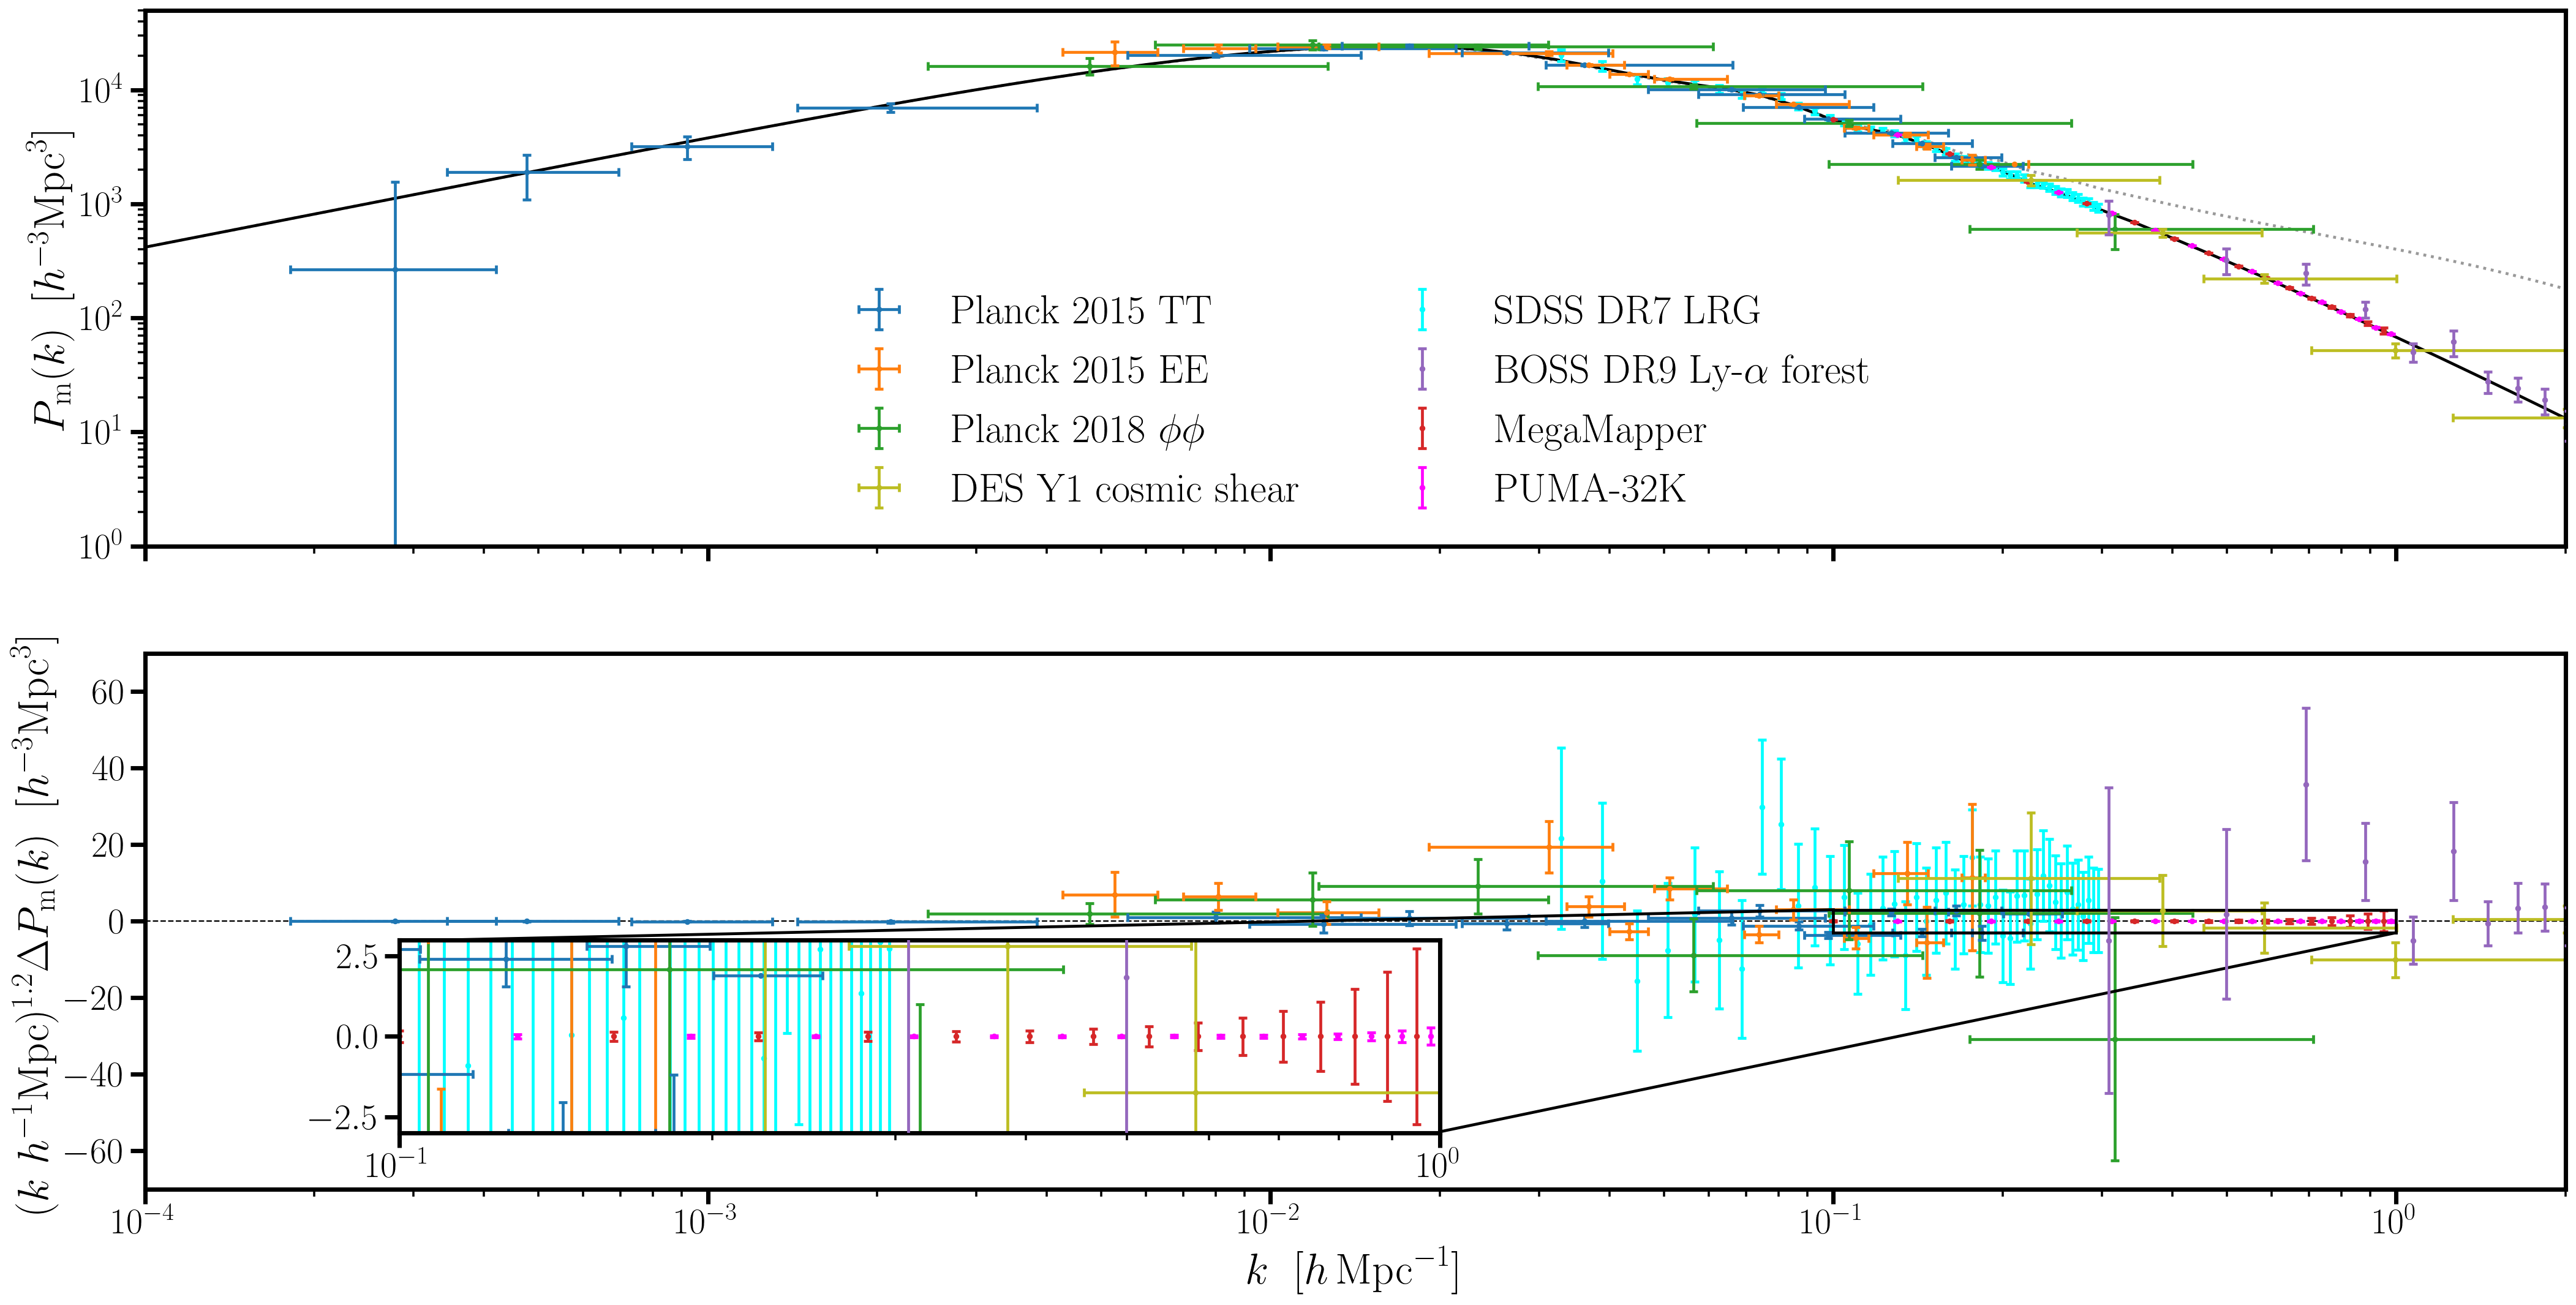

In [7]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes, InsetPosition,mark_inset

#########################################################################################################
k = np.genfromtxt('input/M/k.txt')
P = np.genfromtxt('input/M/P.txt')
Pnl = np.genfromtxt('input/M/Pnl.txt')
SDSS = np.genfromtxt('input/M/SDSS.txt')
SDSS_res = np.genfromtxt('input/M/SDSS_res.txt')
BOSS = np.genfromtxt('input/M/BOSS.txt')
BOSS_res = np.genfromtxt('input/M/BOSS_res.txt')
PlanckTT = np.genfromtxt('input/M/PlanckTT.txt')
PlanckTT_res = np.genfromtxt('input/M/PlanckTT_res.txt')
PlanckEE = np.genfromtxt('input/M/PlanckEE.txt')
PlanckEE_res = np.genfromtxt('input/M/PlanckEE_res.txt')
PlanckPP = np.genfromtxt('input/M/PlanckPP.txt')
PlanckPP_res = np.genfromtxt('input/M/PlanckPP_res.txt')
DES = np.genfromtxt('input/M/DES.txt')
DES_res = np.genfromtxt('input/M/DES_res.txt')

##########################################################################################################

fig, ax = plt.subplots(2,1,figsize=(30,15),dpi=170,sharex=True)

ebar_kwargs = {'capsize':3, 'elinewidth':2, 'markeredgewidth':2, 'marker':'.', 'ls':'', 'markersize':4}

ax[0].plot(k, Pnl,"k:", lw=2, zorder=-10, alpha=0.4)
ax[0].plot(k, P,"k",lw=2, zorder=-10)

P_interp = interp1d(k,P)

ax[0].errorbar(PlanckTT[0],PlanckTT[2],yerr=PlanckTT[3],xerr=[PlanckTT[4],PlanckTT[5]],label="Planck 2015 TT", zorder=-1,**ebar_kwargs)
ax[0].errorbar(PlanckEE[0],PlanckEE[2],yerr=PlanckEE[3],xerr=[PlanckEE[4],PlanckEE[5]],label="Planck 2015 EE", zorder=-1,**ebar_kwargs)
ax[0].errorbar(PlanckPP[0],PlanckPP[2],yerr=PlanckPP[3],xerr=[PlanckPP[4],PlanckPP[5]],label=r"Planck 2018 $\phi\phi$", zorder=-1,**ebar_kwargs)

ax[0].errorbar(DES[0],DES[2],yerr=DES[3],xerr=[DES[4],DES[5]],label=r"DES Y1 cosmic shear",**ebar_kwargs, c="C8")

ax[0].errorbar(SDSS[0],SDSS[1],SDSS[2],label="SDSS DR7 LRG", zorder=-5,**ebar_kwargs,c='cyan')
ax[0].errorbar(BOSS[0],BOSS[1],BOSS[2], label=r"BOSS DR9 Ly-$\alpha$ forest", zorder=4,**ebar_kwargs,c='C4')

ax[0].errorbar(ks_mega,P_interp(ks_mega),yerr=P_interp(ks_mega)*np.sqrt(2/modes_mega), zorder=-1,c='C3',label='MegaMapper',**ebar_kwargs)

ax[0].errorbar(ks_puma,P_interp(ks_puma),yerr=P_interp(ks_puma)*np.sqrt(2/modes_puma), zorder=-1,c='magenta',label='PUMA-32K',**ebar_kwargs)


ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].legend(loc="lower center",frameon=False,fontsize=28,ncol=2)
ax[0].set_xlim(1e-4,2)
ax[0].set_ylim(1,5e4)
ax[0].set_ylabel(r"$\; P_{\rm m}(k) \;\; [h^{-3}\text{Mpc}^3]$")
#ax[0].set_xlabel(r"$k \;\; [h\,\text{Mpc}^{-1}]$")

# ==============
# Residual panel
# ==============

ax[1].errorbar(PlanckTT_res[0],PlanckTT_res[1],yerr=PlanckTT_res[3],xerr=[PlanckTT_res[4],PlanckTT_res[5]],label="Planck 2015 TT", zorder=-1,**ebar_kwargs)
ax[1].errorbar(PlanckEE_res[0],PlanckEE_res[1],yerr=PlanckEE_res[3],xerr=[PlanckEE_res[4],PlanckEE_res[5]],label="Planck 2015 EE", zorder=-1,**ebar_kwargs)
ax[1].errorbar(PlanckPP_res[0],PlanckPP_res[1],yerr=PlanckPP_res[3],xerr=[PlanckPP_res[4],PlanckPP_res[5]],label=r"Planck 2018 $\phi\phi$", zorder=-1,**ebar_kwargs)

ax[1].errorbar(DES_res[0],DES_res[1],yerr=DES_res[3],xerr=[DES_res[4],DES_res[5]],label=r"DES Y1 cosmic shear",**ebar_kwargs, c="C8")

ax[1].errorbar(SDSS_res[0],SDSS_res[1],SDSS_res[2],label="SDSS DR7 LRG", zorder=-5,**ebar_kwargs,c='cyan')
ax[1].errorbar(BOSS_res[0],BOSS_res[1],BOSS_res[2], label=r"BOSS DR9 Ly-$\alpha$ forest", zorder=4,**ebar_kwargs,c='C4')


ax[1].errorbar(ks_mega,0*P_interp(ks_mega),yerr=(ks_mega*params['h'])**1.2*P_interp(ks_mega)*np.sqrt(2/modes_mega), zorder=-1,c='C3',label='MegaMapper',**ebar_kwargs)

ax[1].errorbar(ks_puma,0*P_interp(ks_puma),yerr=(ks_puma*params['h'])**1.2*P_interp(ks_puma)*np.sqrt(2/modes_puma), zorder=-1,c='magenta',label='PUMA-32K',**ebar_kwargs)

ax[1].plot([1e-4, 6], [0,0], "k--", lw=1, zorder=-100)
ax[1].set_xscale("log")
ax[1].set_yscale("linear")
ax[1].set_xlim(1e-4,2)
ax[1].set_ylim(-70,70)
ax[1].set_ylabel(r"$\; (k \,\, h^{-1}\text{Mpc})^{1.2} \Delta P_\text{m}(k) \;\; [h^{-3} \text{Mpc}^3] $")
ax[1].set_xlabel(r"$k \;\; [h\,\text{Mpc}^{-1}]$")


# ============
# Inset
# ============

axi = plt.axes([0,0,1,1])
ip = InsetPosition(ax[1], [0.105,0.105,0.43,0.36])
axi.set_axes_locator(ip)

axi.errorbar(PlanckTT_res[0],PlanckTT_res[1],yerr=PlanckTT_res[3],xerr=[PlanckTT_res[4],PlanckTT_res[5]],label="Planck 2015 TT", zorder=-1,**ebar_kwargs)
axi.errorbar(PlanckEE_res[0],PlanckEE_res[1],yerr=PlanckEE_res[3],xerr=[PlanckEE_res[4],PlanckEE_res[5]],label="Planck 2015 EE", zorder=-1,**ebar_kwargs)
axi.errorbar(PlanckPP_res[0],PlanckPP_res[1],yerr=PlanckPP_res[3],xerr=[PlanckPP_res[4],PlanckPP_res[5]],label=r"Planck 2018 $\phi\phi$", zorder=-1,**ebar_kwargs)
axi.errorbar(DES_res[0],DES_res[1],yerr=DES_res[3],xerr=[DES_res[4],DES_res[5]],label=r"Planck 2018 $\phi\phi$",**ebar_kwargs, c="C8")
axi.errorbar(SDSS_res[0],SDSS_res[1],SDSS_res[2],label="SDSS DR7 LRG", zorder=-5,**ebar_kwargs,c='cyan')
axi.errorbar(BOSS_res[0],BOSS_res[1],BOSS_res[2], label=r"BOSS DR9 Ly-$\alpha$ forest", zorder=4,**ebar_kwargs,c='C4')
axi.errorbar(ks_mega,0*P_interp(ks_mega),yerr=(ks_mega*params['h'])**1.2*P_interp(ks_mega)*np.sqrt(2/modes_mega), zorder=-1,c='C3',label='MegaMapper',**ebar_kwargs)
axi.errorbar(ks_puma,0*P_interp(ks_puma),yerr=(ks_puma*params['h'])**1.2*P_interp(ks_puma)*np.sqrt(2/modes_puma), zorder=-1,c='magenta',label='PUMA-32K',**ebar_kwargs)


axi.set_xscale("log")
axi.set_yscale("linear")
axi.set_xlim(0.1,1)
axi.set_ylim(-3,3)
axi.set_xticklabels([],minor=True)
axi.set_xticks([0.1,1])


ax[1].plot([0.1,1],[-3,-3],c='k',lw=2)
ax[1].plot([0.1,1],[3,3],c='k',lw=2)
ax[1].plot([0.1,0.1],[-3,3],c='k',lw=2)
ax[1].plot([1,1],[-3,3],c='k',lw=2)
#
ax[1].plot([3.2e-4,0.1],[-5,3],c='k',lw=2)
ax[1].plot([2e-2,1],[-55,-3],c='k',lw=2)

plt.savefig('figures/marius_plot.pdf',bbox_inches='tight')

megaCast.velocileptors=True
puma32optCast.velocileptors=True

In [6]:
megaCast.velocileptors=True
puma32optCast.velocileptors=True

megaCast.linear=False
puma32optCast.linear=False

# Plot the lensing noise

In [35]:
#Ckk_velocileptors = compute_lensing_Cell(fishcast,'k','k',zmin=1e-7, zmax=1080,zmid=3,Nzsteps=800,Nzeff=400)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


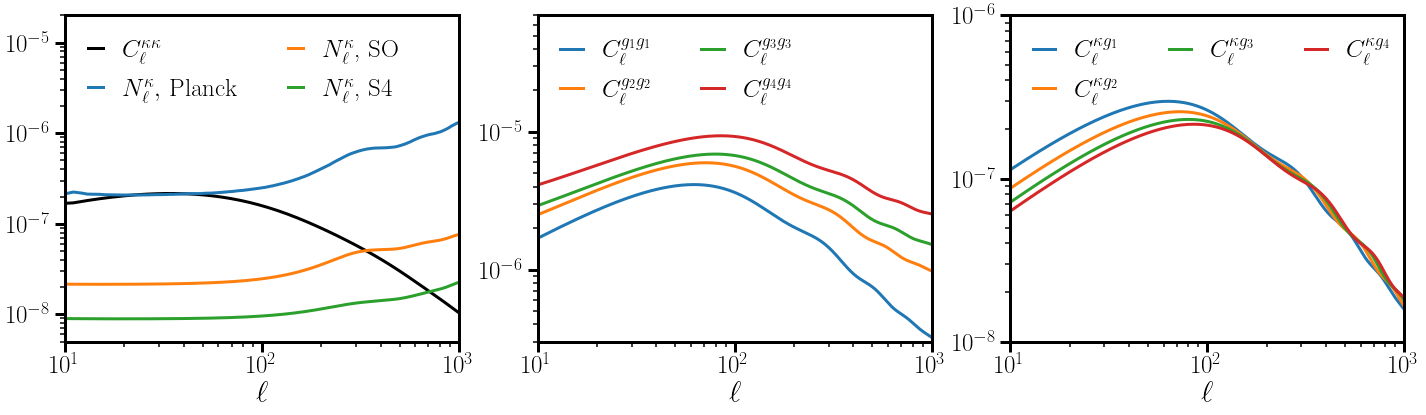

In [36]:
fig, ax = plt.subplots(1,3,figsize=(24,6))

data = np.genfromtxt('input/nlkk_v3_1_0deproj0_SENS2_fsky0p4_it_lT30-3000_lP30-5000.dat')
data2 = np.genfromtxt('input/S4_kappa_deproj0_sens0_16000_lT30-3000_lP30-5000.dat')
data3 = np.genfromtxt('input/nlkk_planck.dat')
ell = fishcast.ell
Ckk = fishcast.Ckk_fid
l,N = data[:,0],data[:,7]
l2,N2 = data2[:,0],data2[:,7]
l3,N3 = data3[:,0],data3[:,1]
ax[0].loglog(ell,Ckk,lw=3,c='k',label=r'$C^{\kappa\kappa}_\ell$')

#ax[0].loglog(ell,Ckk_velocileptors,lw=3,c='C3')

ax[0].loglog(l3,N3,lw=3,label=r'$N^\kappa_\ell,\,\text{Planck}$')
ax[0].loglog(l,N,lw=3,label=r'$N^\kappa_\ell$, SO')
ax[0].loglog(l2,N2,lw=3,label=r'$N^\kappa_\ell$, S4')
ax[0].legend(loc='upper left',frameon=False,ncol=2,handlelength=0.6)
ax[0].set_xlabel(r'$\ell$')
ax[0].set_xlim(10,1e3)
ax[0].set_ylim(5e-9,2e-5)

ax[1].loglog(ell,megaCast.Cgg_fid[0],lw=3,c='C0',label=r'$C^{g_1 g_1}_\ell$')

#ax[1].loglog(ell,megaCast.Ckg_fid[0],lw=3,c='C0')
#ax[1].loglog(ell,megaCast.Ngg[0],lw=3,c='C0',ls='--')
ax[1].loglog(ell,megaCast.Cgg_fid[1],lw=3,c='C1',label=r'$C^{g_2 g_2}_\ell$')
#ax[1].loglog(ell,megaCast.Ngg[1],lw=3,c='C1',ls='--')
ax[1].loglog(ell,megaCast.Cgg_fid[2],lw=3,c='C2',label=r'$C^{g_3g_3}_\ell$')
#ax[1].loglog(ell,megaCast.Ngg[2],lw=3,c='C2',ls='--')

ax[1].loglog(ell,megaCast.Cgg_fid[3],lw=3,c='C3',label=r'$C^{g_4g_4}_\ell$')
#ax[1].loglog(ell,megaCast.Ngg[3],lw=3,c='C3',ls='--')

#ax[1].loglog([],[],lw=3,c='k',ls='--',label=r'$N^{g_i}_\ell$')

#ax[1].loglog(ell,megaCast.Ckg_fid[2],lw=3,c='C2')
#ax[1].loglog(ell,megaCast.Ngg[2],lw=3,c='C2',ls='--')
ax[1].set_xlim(10,1e3)
ax[1].set_ylim(3e-7,7e-5)
ax[1].set_xlabel(r'$\ell$')
ax[1].legend(loc='upper left',frameon=False,ncol=2,handlelength=0.9)


ax[2].loglog(ell,megaCast.Ckg_fid[0],lw=3,c='C0',label=r'$C^{\kappa g_1}_\ell$')
ax[2].loglog(ell,megaCast.Ckg_fid[1],lw=3,c='C1',label=r'$C^{\kappa g_2}_\ell$')
ax[2].loglog(ell,megaCast.Ckg_fid[2],lw=3,c='C2',label=r'$C^{\kappa g_3}_\ell$')
ax[2].loglog(ell,megaCast.Ckg_fid[3],lw=3,c='C3',label=r'$C^{\kappa g_4}_\ell$')

ax[2].set_xlim(10,1e3)
ax[2].set_ylim(1e-8,1e-6)
ax[2].set_xlabel(r'$\ell$')
ax[2].legend(loc='upper left',frameon=False,ncol=3,handlelength=0.9)


plt.savefig('figures/lensing_noise.pdf',bbox_inches='tight')

## Show the wedges

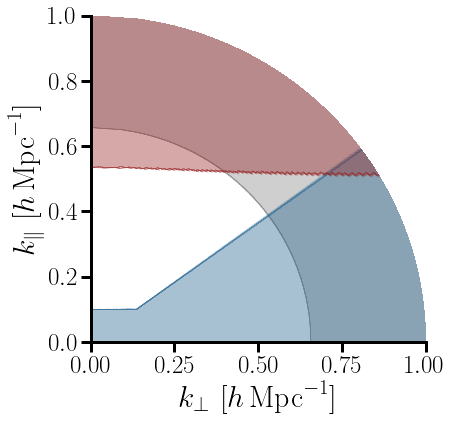

In [37]:
fig, ax = plt.subplots(1,1,figsize=(6,6),sharey=True)

one = np.ones(puma5pessCast.Nk*puma5pessCast.Nmu)

import matplotlib.colors as mcolors

colors = [(31/330,119/330,180/330,c) for c in np.linspace(0.4,0,100)]
cmapblue = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=20)
colors = [(214/369,39/369,40/369,c) for c in np.linspace(0.4,0,100)]
cmapred = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=20)
colors = [(127/248,127/248,127/248,c) for c in np.linspace(0.4,0,100)]
cmapgreen = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=20)

z = megaCast.experiment.zcenters[2]

kpar = (puma5pessCast.k*puma5pessCast.mu).reshape((puma5pessCast.Nk,puma5pessCast.Nmu))
kperp = (puma5pessCast.k*np.sqrt(1-puma5pessCast.mu**2)).reshape((puma5pessCast.Nk,puma5pessCast.Nmu))

kmax_cut = (puma5pessCast.kmax_constraint(z)*one).reshape((puma5pessCast.Nk,puma5pessCast.Nmu))
foreground_wedge = (puma5pessCast.compute_wedge(z)*one).reshape((puma5pessCast.Nk,puma5pessCast.Nmu))
sn2_cut = megaCast.kpar_cut[2].reshape((puma5pessCast.Nk,puma5pessCast.Nmu))

ax.contourf(kperp,kpar,kmax_cut,cmap=cmapgreen,vmin=0,vmax=1)
ax.contourf(kperp,kpar,foreground_wedge,cmap=cmapblue,vmin=0,vmax=1)
ax.contourf(kperp,kpar,sn2_cut,cmap=cmapred,vmin=0,vmax=1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel(r'$k_\perp\,\,[h\,\text{Mpc}^{-1}]$')
ax.set_ylabel(r'$k_\parallel\,\,[h\,\text{Mpc}^{-1}]$')
plt.savefig('figures/single_integration_region.pdf',bbox_inches='tight')

# Referee report checks

In [4]:
basis = np.array(['h','log(A_s)','n_s','omega_cdm','omega_b','tau_reio',\
                  'm_ncdm','N_ur','alpha_s','Omega_k','f_NL','N','b',\
                  'alpha0','b2','bs','N2','N4','alpha2','alpha4'])

In [5]:
derivatives_desi = desiCast.load_derivatives(basis)

In [19]:
derivatives_desi = desiCast.load_derivatives(basis)
derivatives_mega = megaCast.load_derivatives(basis)

In [20]:
globe = 11 ; kmax_knl = 1
F_desi = desiCast.gen_fisher(basis,globe,kmax_knl=kmax_knl,derivatives=derivatives_desi)
F_desi_02 = desiCast.gen_fisher(basis,globe,kmax=0.2,derivatives=derivatives_desi)
F_mega = megaCast.gen_fisher(basis,globe,kmax_knl=kmax_knl,derivatives=derivatives_mega)
kpar_min = 0.001
F_desi_rsd = desiCast.gen_fisher(basis,globe,kmax_knl=kmax_knl,kpar_min=kpar_min,derivatives=derivatives_desi)
F_mega_rsd = megaCast.gen_fisher(basis,globe,kmax_knl=kmax_knl,kpar_min=kpar_min,derivatives=derivatives_mega)

In [21]:
def make_fisher(cast,kmax_knl=1,CMB='SO',kk=True):
   basis_lensing = np.array(['h','log(A_s)','n_s','omega_cdm','omega_b','tau_reio',\
                          'm_ncdm','N_ur','alpha_s','Omega_k','Omega_k','N','b','alpha0','b2','bs','alphax'])
   globe_lensing = 11
   Lensing = cast.gen_lensing_fisher(basis_lensing,globe_lensing,ell_min=30,ell_max=500,kmax_knl=kmax_knl,CMB=CMB,kk=kk)
   Lensing[10] *= 0; Lensing[:,10] *= 0
   return Lensing

In [22]:
F_desi_lens = make_fisher(desiCast)
F_mega_lens = make_fisher(megaCast)
F_desi_lens_s4 = make_fisher(desiCast,CMB='S4')
F_mega_lens_s4 = make_fisher(megaCast,CMB='S4')

In [23]:
F_desi_RSD_lens = fishcast.combine_fishers([F_desi_rsd,F_desi_lens],globe+4*5)
F_mega_RSD_lens = fishcast.combine_fishers([F_mega_rsd,F_mega_lens],globe+4*5)
F_desi_RSD_lens_s4 = fishcast.combine_fishers([F_desi_rsd,F_desi_lens_s4],globe+4*5)
F_mega_RSD_lens_s4 = fishcast.combine_fishers([F_mega_rsd,F_mega_lens_s4],globe+4*5)

In [55]:
tau_prior = np.diag(np.zeros(globe))
tau_prior[5,5] = 1/(0.002)**2

In [24]:
# LOAD THE CMB PRIORS
Planck = np.genfromtxt('input/Planck.txt')
Planck_SO = np.genfromtxt('input/Planck_SO.txt')
LiteBIRD_S4 = np.genfromtxt('input/LiteBIRD_S4.txt')

In [25]:
scaling = np.array([1e4,1e3,1e3,1e4,1e5,1e3,1e3,1e3,1e3])
F = fishcast.combine_fishers([Planck,F_desi],globe)
print(pretty_table(F,scaling,name=r'PSD &'))

PSD & $31.83$ & $7.28$ & $5.86$ & $1.24$ & $112.8$ & $41.49$ \\


In [32]:
scaling = np.array([1e4,1e3,1e3,1e4,1e5,1e3,1e3,1e3,1e3])
F = fishcast.combine_fishers([Planck,F_desi_02],globe)
print(pretty_table(F,scaling,name=r'PSD &'))

PSD & $35.58$ & $8.12$ & $6.21$ & $1.33$ & $119.41$ & $48.06$ \\


In [44]:
scaling = np.array([1e4,1e3,1e3,1e4,1e5,1e3,1e3,1e3,1e3])
F = fishcast.combine_fishers([Planck,F_desi[:19,:19]],globe)
print(pretty_table(F,scaling,name=r'PSD &'))

PSD & $13.33$ & $3.24$ & $3.87$ & $1.11$ & $62.13$ & $26.1$ \\


In [56]:
scaling = np.array([1e4,1e3,1e3,1e4,1e5,1e3,1e3,1e3,1e3])
F = fishcast.combine_fishers([Planck,tau_prior,F_desi[:19,:19]],globe)
print(pretty_table(F,scaling,name=r'PSD &'))

PSD & $13.02$ & $3.08$ & $1.78$ & $0.95$ & $52.93$ & $17.46$ \\


In [46]:
[1/desiCast.Sigma2(z)**0.5 for z in desiCast.experiment.zcenters]

[0.2498996773987518,
 0.28311219814862115,
 0.31738744087060494,
 0.3523626642085962]

In [106]:
scaling = np.array([1e4,1e3,1e3,1e4,1e5,1e3,1e3,1e3,1e3])
F = fishcast.combine_fishers([Planck_SO,F_desi,F_mega],globe)
print(pretty_table(F,scaling,name=r'PSD + MegaMapper &'))

PSD + MegaMapper & $13.77$ & $3.77$ & $4.67$ & $0.51$ & $38.1$ & $26.33$ \\


In [101]:
scaling = np.array([1e4,1e3,1e3,1e4,1e5,1e3,1e3,1e3,1e3])
F = fishcast.combine_fishers([SO_HighEll2,F_desi,F_mega],globe)
print(pretty_table(F,scaling,name=r'SD + MegaMapper &'))

SD + MegaMapper & $14.22$ & $3.87$ & $6.24$ & $0.52$ & $38.54$ & $43.48$ \\


In [120]:
x = list(range(6)) + [8] + list(range(11,83))
np.sqrt(np.linalg.inv(F[x][:,x])[6,6])

0.005789944350100798

In [127]:
i=5
x = list(range(6)) + [8] + list(range(11,83))
y = list(range(6)) + list(range(11,83))
np.sqrt(np.linalg.inv(F[x][:,x])[i,i])/np.sqrt(np.linalg.inv(F[y][:,y])[i,i])

1.0126101160841812

In [ ]:
#### scaling = np.array([1e4,1e3,1e3,1e4,1e5,1e3,1e3,1e3,1e3])
F = fishcast.combine_fishers([LiteBIRD_S4,F_desi,F_mega_RSD_lens_s4],globe)
print(pretty_table(F,scaling,name=r'LSD + MegaMapper &'))

In [15]:
x = list(range(6)) + [8] + list(range(11,83))
np.sqrt(np.linalg.inv(F[x][:,x])[6,6])

0.005031888371346979

#### $Y_p$ stuff

In [5]:
# CMB only
x = [0,1,2,3,4,5,7]
xYp = x + [-1]
LiteBIRD_S4_Neff = np.sqrt(np.diag(np.linalg.inv(LiteBird_S4[x][:,x])))[-1]
LiteBIRD_S4_Neff_Yp = np.sqrt(np.diag(np.linalg.inv(LiteBird_S4_Yp[xYp][:,xYp])))[-2]
print(LiteBIRD_S4_Neff,LiteBIRD_S4_Neff_Yp,LiteBIRD_S4_Neff_Yp/LiteBIRD_S4_Neff)

0.025174170009086675 0.07698176617535955 3.0579664055487354


In [6]:
Planck_SO_Neff = np.sqrt(np.diag(np.linalg.inv(Planck_SO[x][:,x])))[-1]
Planck_SO_Neff_Yp = np.sqrt(np.diag(np.linalg.inv(Planck_SO_Yp[xYp][:,xYp])))[-2]
print(Planck_SO_Neff,Planck_SO_Neff_Yp,Planck_SO_Neff_Yp/Planck_SO_Neff)

0.046591697293536835 0.11590703974736118 2.487718767082557


In [7]:
basis = np.array(['h','log(A_s)','n_s','omega_cdm','omega_b','tau_reio',\
                  'm_ncdm','N_ur','alpha_s','Omega_k','f_NL','YHe','N','b',\
                  'alpha0','b2','bs','N2','N4','alpha2','alpha4'])
basis_hi = np.array(list(basis)+['Tb'])

derivatives_desi = desiCast.load_derivatives(basis)
derivatives_puma = puma32optCast.load_derivatives(basis_hi)

In [8]:
F_desi = desiCast.gen_fisher(basis,12,kmax_knl=1.,derivatives=derivatives_desi)
F_puma = puma32optCast.gen_fisher(basis_hi,12,kmax_knl=1.,derivatives=derivatives_puma)
PSD_PUMA = puma32optCast.combine_fishers([Planck_SO_Yp,F_desi,F_puma],12)
LSD_PUMA = puma32optCast.combine_fishers([LiteBird_S4_Yp,F_desi,F_puma],12)

In [9]:
x = [0,1,2,3,4,5,7] + list(range(12,88))
xYp = [0,1,2,3,4,5,7,11] + list(range(12,88))
LSD_PUMA_Neff = np.sqrt(np.diag(np.linalg.inv(LSD_PUMA[x][:,x])))[6]
LSD_PUMA_Neff_Yp = np.sqrt(np.diag(np.linalg.inv(LSD_PUMA[xYp][:,xYp])))[6]
print(LSD_PUMA_Neff,LSD_PUMA_Neff_Yp,LSD_PUMA_Neff_Yp/LSD_PUMA_Neff)

0.01941482790246635 0.04081655004736464 2.102339008741846


In [11]:
PSD_PUMA_Neff = np.sqrt(np.diag(np.linalg.inv(PSD_PUMA[x][:,x])))[6]
PSD_PUMA_Neff_Yp = np.sqrt(np.diag(np.linalg.inv(PSD_PUMA[xYp][:,xYp])))[6]
print(PSD_PUMA_Neff,PSD_PUMA_Neff_Yp,PSD_PUMA_Neff_Yp/PSD_PUMA_Neff)

0.029613105195453286 0.04769336602958441 1.6105493062884577


## Make the fiducial Fisher matrices

In [4]:
basis = np.array(['h','log(A_s)','n_s','omega_cdm','omega_b','tau_reio',\
                  'm_ncdm','N_ur','alpha_s','Omega_k','f_NL','N','alpha0',\
                  'b','b2','bs','N2','N4','alpha2','alpha4'])

basis_hi = np.array(list(basis) + ['Tb'])

In [5]:
derivatives_fish = fishcast.load_derivatives(basis)
print('Loaded toy model derivatives')
derivatives_desi = desiCast.load_derivatives(basis)
print('Loaded DESI derivatives')
derivatives_euc = eucCast.load_derivatives(basis)
print('Loaded Euclid derivatives')
derivatives_euc_noAP = eucCast_noAP.load_derivatives(basis)
print('Loaded Euclid_noAP derivatives')
derivatives_mega = megaCast.load_derivatives(basis)
print('Loaded MegaMapper derivatives')
#derivatives_mega_low_N2 = megaCast_low_N2.load_derivatives(basis)
#print('Loaded MegaMapper_low_N2 derivatives')
derivatives_mse = mseCast.load_derivatives(basis)
print('Loaded MSE derivatives')
derivatives_puma5 = puma5optCast.load_derivatives(basis_hi)
print('Loaded PUMA-5K derivatives')
derivatives_puma32 = puma32optCast.load_derivatives(basis_hi)
print('Loaded PUMA-32K derivatives')
derivatives_hirax = hiraxOptCast.load_derivatives(basis_hi)
print('Loaded HIRAX derivatives')
derivatives_roman = romanCast.load_derivatives(basis)
print('Loaded Roman derivatives')
derivatives_spherex = spherexCast.load_derivatives(basis)
print('Loaded SPHEREx derivatives')

Loaded toy model derivatives
Loaded DESI derivatives
Loaded Euclid derivatives
Loaded Euclid_noAP derivatives
Loaded MegaMapper derivatives
Loaded MSE derivatives
Loaded PUMA-5K derivatives
Loaded PUMA-32K derivatives
Loaded HIRAX derivatives
Loaded Roman derivatives
Loaded SPHEREx derivatives


In [7]:
basis_mncdm = np.array(['h','log(A_s)','n_s','omega_cdm','omega_b','tau_reio',\
                  'm_ncdm','m_ncdm','m_ncdm','m_ncdm','m_ncdm','N','alpha0',\
                  'b','b2','bs','N2','N4','alpha2','alpha4'])
derivatives_desi_higher_mnu = desiHighMnuCast.load_derivatives(basis_mncdm)

NameError: name 'desiHighMnuCast' is not defined

In [ ]:
basis_lin = np.array(['h','log(A_s)','n_s','omega_cdm','omega_b','tau_reio',\
                  'm_ncdm','N_ur','alpha_s','Omega_k','f_NL','N','alpha0',\
                  'b','N2','N4','alpha2','alpha4'])

basis_lin_hi = np.array(list(basis_lin) + ['Tb'])

derivatives_desi_lin = desiCast_lin.load_derivatives(basis_lin)
print('Loaded DESI_lin derivatives')
derivatives_mega_lin = megaCast_lin.load_derivatives(basis_lin)
print('Loaded MegaMapper_lin derivatives')
derivatives_puma32opt_lin = puma32optCast_lin.load_derivatives(basis_lin_hi)
print('Loaded PUMA-32K_lin derivatives')

In [ ]:
basis_lin2 = np.array(['h','log(A_s)','omega_cdm','n_s','omega_b','tau_reio',\
                       'm_ncdm','N_ur','N_ur','Omega_k','Omega_k','b','N','N2'])

basis_lin2_hi = np.array(list(basis_lin2) + ['Tb'])

derivatives_desi_lin2 = desiCast_lin2.load_derivatives(basis_lin2)
print('Loaded DESI_lin derivatives2')
derivatives_mega_lin2 = megaCast_lin2.load_derivatives(basis_lin2)
print('Loaded MegaMapper_lin derivatives2')
derivatives_puma32opt_lin2 = puma32optCast_lin2.load_derivatives(basis_lin2_hi)
print('Loaded PUMA-32K_lin2 derivatives')

In [6]:
omega_lins = np.linspace(10,300,20)
log10z_cs = np.linspace(1.5,6.5,20)
basis_ext = np.array(['h','log(A_s)','n_s','omega_cdm','omega_b','tau_reio',\
                  'fEDE','A_lin','N','alpha0','b','b2','bs','N2','N4','alpha2','alpha4'])

derivatives_fish_ext = fishcast.load_derivatives(basis_ext,log10z_c=log10z_cs[8],omega_lin=omega_lins[9])
print('Loaded toy model derivatives_ext')
derivatives_desi_ext = desiCast.load_derivatives(basis_ext,log10z_c=log10z_cs[8],omega_lin=omega_lins[9])
print('Loaded DESI derivatives_ext')
derivatives_mega_ext = megaCast.load_derivatives(basis_ext,log10z_c=log10z_cs[8],omega_lin=omega_lins[9])
print('Loaded MegaMapper derivatives_ext')

Loaded toy model derivatives_ext
Loaded DESI derivatives_ext
Loaded MegaMapper derivatives_ext


In [6]:
globe = 11 ; kmax_knl = 1
F_desi = desiCast.gen_fisher(basis,globe,kmax_knl=kmax_knl,derivatives=derivatives_desi)
F_euc = eucCast.gen_fisher(basis,globe,kmax_knl=kmax_knl,derivatives=derivatives_euc)
F_euc_noAP = eucCast_noAP.gen_fisher(basis,globe,kmax_knl=kmax_knl,derivatives=derivatives_euc_noAP)
F_mega = megaCast.gen_fisher(basis,globe,kmax_knl=kmax_knl,derivatives=derivatives_mega)
#F_mega_low_N2 = megaCast_low_N2.gen_fisher(basis,globe,kmax_knl=kmax_knl,derivatives=derivatives_mega_low_N2)
F_mse = mseCast.gen_fisher(basis,globe,kmax_knl=kmax_knl,derivatives=derivatives_mse)
F_puma5opt = puma5optCast.gen_fisher(basis_hi,globe,kmax_knl=kmax_knl,derivatives=derivatives_puma5)
F_puma5pess = puma5pessCast.gen_fisher(basis_hi,globe,kmax_knl=kmax_knl,derivatives=derivatives_puma5)
F_puma32opt = puma32optCast.gen_fisher(basis_hi,globe,kmax_knl=kmax_knl,derivatives=derivatives_puma32)
F_puma32pess = puma32pessCast.gen_fisher(basis_hi,globe,kmax_knl=kmax_knl,derivatives=derivatives_puma32)
F_hiraxOpt = hiraxOptCast.gen_fisher(basis_hi,globe,kmax_knl=kmax_knl,derivatives=derivatives_hirax)
F_hiraxPess = hiraxPessCast.gen_fisher(basis_hi,globe,kmax_knl=kmax_knl,derivatives=derivatives_hirax)
F_roman = romanCast.gen_fisher(basis,globe,kmax_knl=kmax_knl,derivatives=derivatives_roman)
F_spherex = spherexCast.gen_fisher(basis,globe,kmax_knl=kmax_knl,derivatives=derivatives_spherex)

In [ ]:
F_desi_higher_mnu = desiHighMnuCast.gen_fisher(basis_mncdm,globe,kmax_knl=kmax_knl,derivatives=derivatives_desi_higher_mnu)

In [ ]:
F_desi_lin = desiCast_lin.gen_fisher(basis_lin,globe,kmax_knl=kmax_knl,derivatives=derivatives_desi_lin)
F_mega_lin = megaCast_lin.gen_fisher(basis_lin,globe,kmax_knl=kmax_knl,derivatives=derivatives_mega_lin)
F_puma32opt_lin = puma32optCast_lin.gen_fisher(basis_lin_hi,globe,kmax_knl=kmax_knl,derivatives=derivatives_puma32opt_lin)

In [ ]:
F_desi_lin2 = desiCast_lin2.gen_fisher(basis_lin2,globe,kmax_knl=kmax_knl,derivatives=derivatives_desi_lin2)
F_mega_lin2 = megaCast_lin2.gen_fisher(basis_lin2,globe,kmax_knl=kmax_knl,derivatives=derivatives_mega_lin2)
F_puma32opt_lin2 = puma32optCast_lin2.gen_fisher(basis_lin2_hi,globe,kmax_knl=kmax_knl,derivatives=derivatives_puma32opt_lin2)

In [8]:
F_fish_ext = fishcast.gen_fisher(basis_ext,8,kmax_knl=kmax_knl,derivatives=derivatives_fish_ext)
F_desi_ext = desiCast.gen_fisher(basis_ext,8,kmax_knl=kmax_knl,derivatives=derivatives_desi_ext)
F_mega_ext = megaCast.gen_fisher(basis_ext,8,kmax_knl=kmax_knl,derivatives=derivatives_mega_ext)

### Lensing Fishers

In [7]:
globe = 11 ; kmax_knl = 1 ; kpar_min = 0.001
F_desi_rsd = desiCast.gen_fisher(basis,globe,kmax_knl=kmax_knl,kpar_min=kpar_min,derivatives=derivatives_desi)
F_euc_rsd = eucCast.gen_fisher(basis,globe,kmax_knl=kmax_knl,kpar_min=kpar_min,derivatives=derivatives_euc)
F_mega_rsd = megaCast.gen_fisher(basis,globe,kmax_knl=kmax_knl,kpar_min=kpar_min,derivatives=derivatives_mega)
F_mse_rsd = mseCast.gen_fisher(basis,globe,kmax_knl=kmax_knl,kpar_min=kpar_min,derivatives=derivatives_mse)
F_puma5opt_rsd = puma5optCast.gen_fisher(basis_hi,globe,kmax_knl=kmax_knl,kpar_min=kpar_min,derivatives=derivatives_puma5)
F_puma5pess_rsd = puma5pessCast.gen_fisher(basis_hi,globe,kmax_knl=kmax_knl,kpar_min=kpar_min,derivatives=derivatives_puma5)
F_puma32opt_rsd = puma32optCast.gen_fisher(basis_hi,globe,kmax_knl=kmax_knl,kpar_min=kpar_min,derivatives=derivatives_puma32)
F_puma32pess_rsd = puma32pessCast.gen_fisher(basis_hi,globe,kmax_knl=kmax_knl,kpar_min=kpar_min,derivatives=derivatives_puma32)
F_hiraxOpt_rsd = hiraxOptCast.gen_fisher(basis_hi,globe,kmax_knl=kmax_knl,kpar_min=kpar_min,derivatives=derivatives_hirax)
F_hiraxPess_rsd = hiraxPessCast.gen_fisher(basis_hi,globe,kmax_knl=kmax_knl,kpar_min=kpar_min,derivatives=derivatives_hirax)

In [8]:
def make_fisher(cast,kmax_knl=1,CMB='SO',kk=True):
   basis_lensing = np.array(['h','log(A_s)','n_s','omega_cdm','omega_b','tau_reio',\
                          'm_ncdm','N_ur','alpha_s','Omega_k','Omega_k','N','alpha0','b','b2','bs','alphax'])
   globe_lensing = 11
   Lensing = cast.gen_lensing_fisher(basis_lensing,globe_lensing,ell_min=30,ell_max=500,kmax_knl=kmax_knl,CMB=CMB,kk=kk)
   Lensing[10] *= 0; Lensing[:,10] *= 0
   return Lensing

In [9]:
F_desi_lens = make_fisher(desiCast)
F_euc_lens = make_fisher(eucCast)
F_mega_lens = make_fisher(megaCast)
F_mse_lens = make_fisher(mseCast)
F_puma32opt_lens = make_fisher(puma32optCast)
F_puma32pess_lens = make_fisher(puma32pessCast)

In [10]:
F_desi_lens_planck = make_fisher(desiCast,CMB='Planck')
F_euc_lens_planck = make_fisher(eucCast,CMB='Planck')
F_mega_lens_planck = make_fisher(megaCast,CMB='Planck')
F_mse_lens_planck = make_fisher(mseCast,CMB='Planck')
F_puma32opt_lens_planck = make_fisher(puma32optCast,CMB='Planck')
F_puma32pess_lens_planck = make_fisher(puma32pessCast,CMB='Planck')

In [11]:
F_desi_lens_s4 = make_fisher(desiCast,CMB='S4')
F_euc_lens_s4 = make_fisher(eucCast,CMB='S4')
F_mega_lens_s4 = make_fisher(megaCast,CMB='S4')
F_mse_lens_s4 = make_fisher(mseCast,CMB='S4')
F_puma32opt_lens_s4 = make_fisher(puma32optCast,CMB='S4')
F_puma32pess_lens_s4 = make_fisher(puma32pessCast,CMB='S4')

<span style="color:red">Depends on the number of redshift bins</span>

In [12]:
F_desi_RSD_lens = fishcast.combine_fishers([F_desi_rsd,F_desi_lens],globe+4*5)
F_euc_RSD_lens = fishcast.combine_fishers([F_euc_rsd,F_euc_lens],globe+4*5)
F_mega_RSD_lens = fishcast.combine_fishers([F_mega_rsd,F_mega_lens],globe+4*5)
F_mse_RSD_lens = fishcast.combine_fishers([F_mse_rsd,F_mse_lens],globe+4*5)
F_puma32opt_RSD_lens = fishcast.combine_fishers([F_puma32opt_rsd,F_puma32opt_lens],globe+4*5)
F_puma32pess_RSD_lens = fishcast.combine_fishers([F_puma32pess_rsd,F_puma32pess_lens],globe+4*5)

In [13]:
F_desi_RSD_lens_planck = fishcast.combine_fishers([F_desi_rsd,F_desi_lens_planck],globe+4*5)
F_euc_RSD_lens_planck = fishcast.combine_fishers([F_euc_rsd,F_euc_lens_planck],globe+4*5)
F_mega_RSD_lens_planck = fishcast.combine_fishers([F_mega_rsd,F_mega_lens_planck],globe+4*5)
F_mse_RSD_lens_planck = fishcast.combine_fishers([F_mse_rsd,F_mse_lens_planck],globe+4*5)
F_puma32opt_RSD_lens_planck = fishcast.combine_fishers([F_puma32opt_rsd,F_puma32opt_lens_planck],globe+4*5)
F_puma32pess_RSD_lens_planck = fishcast.combine_fishers([F_puma32pess_rsd,F_puma32pess_lens_planck],globe+4*5)

In [14]:
F_desi_RSD_lens_s4 = fishcast.combine_fishers([F_desi_rsd,F_desi_lens_s4],globe+4*5)
F_euc_RSD_lens_s4 = fishcast.combine_fishers([F_euc_rsd,F_euc_lens_s4],globe+4*5)
F_mega_RSD_lens_s4 = fishcast.combine_fishers([F_mega_rsd,F_mega_lens_s4],globe+4*5)
F_mse_RSD_lens_s4 = fishcast.combine_fishers([F_mse_rsd,F_mse_lens_s4],globe+4*5)
F_puma32opt_RSD_lens_s4 = fishcast.combine_fishers([F_puma32opt_rsd,F_puma32opt_lens_s4],globe+4*5)
F_puma32pess_RSD_lens_s4 = fishcast.combine_fishers([F_puma32pess_rsd,F_puma32pess_lens_s4],globe+4*5)

## Load CMB priors

In [15]:
globe = 11

def CMB_with_mnu(F,n):
   result = np.zeros((n,n))
   # 'omch2', 'ombh2', 'As', 'ns', 'H0', 'tau', 'mnu', 'neff', 'omk' 
   #  'h','log(A_s)','n_s','omega_cdm','omega_b','tau_reio','m_ncdm','N_ur','alpha_s','Omega_k'
   mapping = {0:4,1:2,2:3,3:0,4:1,5:5,6:6,7:7,9:8,11:9} 
   for i in range(n):
      for j in range(n):
         try:
            result[i,j] = F[mapping[i],mapping[j]]
         except:
            continue
   #  'H0','A_s','n_s','omega_cdm','omega_b','tau_reio','m_ncdm','N_ur','alpha_s','Omega_k' 
   result[0,:] *= 100.
   result[:,0] *= 100.
   result[1,:] *= params['A_s']
   result[:,1] *= params['A_s']
   return result

Planck_LowEll = np.genfromtxt('input/SimoFisher_Planck_LowEll_02-10-2020.txt')
Planck_HighEll = np.genfromtxt('input/SimoFisher_Planck_HighEll_02-10-2020.txt')
Planck_HighEll_lensed = np.genfromtxt('input/SimoFisher_Planck_HighEll_lensed_01-21-2021.txt')
SO_HighEll = np.genfromtxt('input/SimoFisher_SO_HighEll_02-10-2020.txt')
S4_HighEll = np.genfromtxt('input/SimoFisher_S4_HighEll_02-10-2020.txt')
LiteBird_LowEll = np.genfromtxt('input/SimoFisher_LiteBird_LowEll_02-10-2020.txt')
LiteBird_S4_yp = np.genfromtxt('input/SimoFisher_LiteBird_S4_AllEll_unlensed_10-06-2021.txt')
Planck_SO_yp = np.genfromtxt('input/SimoFisher_Planck_Lowell_SO_Highell_unlensed_10-06-2021.txt')
#
SO_HighEll2 = CMB_with_mnu(SO_HighEll, globe)
Planck = CMB_with_mnu(Planck_LowEll + Planck_HighEll, globe)
Planck_lensed = CMB_with_mnu(Planck_LowEll + Planck_HighEll_lensed, globe)
Planck_SO = CMB_with_mnu(Planck_LowEll + SO_HighEll,globe)
Planck_SO_Yp = CMB_with_mnu(Planck_SO_yp,globe+1)
Planck_S4 = CMB_with_mnu(Planck_LowEll + S4_HighEll,globe)
LiteBird_S4 = CMB_with_mnu(LiteBird_LowEll + S4_HighEll,globe)
LiteBird_S4_Yp = CMB_with_mnu(LiteBird_S4_yp,globe+1)
LiteBird_SO = CMB_with_mnu(LiteBird_LowEll + SO_HighEll,globe)

In [9]:
np.savetxt('input/Planck.txt',Planck)
np.savetxt('input/Planck_SO.txt',Planck_SO)
np.savetxt('input/Planck_S4.txt',Planck_S4)
np.savetxt('input/LiteBIRD_S4.txt',LiteBird_S4)
np.savetxt('input/LiteBIRD_SO.txt',LiteBird_SO)

#### only a $\sim10\%$ change across the board

## Running some checks with the measured Planck covariances

In [43]:
# omegabh2 omegach2 theta tau nnu yhe logA ns
base_yp = np.genfromtxt('input/base_nnu_yhe_plikHM_TTTEEE_lowl_lowE_post_BAO.covmat')

C_nu_yp = np.zeros(base_yp.shape)

# 'h','log(A_s)','n_s','omega_cdm','omega_b','tau_reio','N_ur','Y_p'
mapping = {0:2,1:6,2:7,3:1,4:0,5:3,6:4,7:5}
def do_map(i):
   try: return mapping[i]
   except: return i
    
n = len(C_nu_yp)

for i in range(n):
   for j in range(n):
      C_nu_yp[i,j] = base_yp[do_map(i),do_map(j)]
        
F_nu_yp = np.linalg.inv(C_nu_yp)

def dhdp(p):
   fid = cosmo.theta_s_100()
   fidval = cosmo.pars[p]
   cosmo.set({p:fidval*1.01}) ; cosmo.compute()
   new = cosmo.theta_s_100()
   cosmo.set({p:fidval}) ; cosmo.compute()
   return (new-fid)/fidval/0.01

pars = ['h','A_s','n_s','omega_cdm','omega_b','tau_reio','N_ur']
derivs = np.zeros(7)
derivs = np.array([dhdp(p) for p in pars])

R = np.diag(np.ones(n))
R[0][:7] = derivs[:7]
F_nu_yp_new = np.dot(np.dot(R.T,F_nu_yp),R)

In [44]:
C_nu_yp_new = np.linalg.inv(F_nu_yp_new)

In [286]:
F_marginalized = np.linalg.inv(C_nu_yp_new[:7,:7])

In [297]:
basis_yp = np.array(['h','log(A_s)','n_s','omega_cdm','omega_b','tau_reio',\
                  'N_ur','N','alpha0',\
                  'b','b2','bs','N2','N4','alpha2','alpha4'])
basis_yp_hi = np.array(list(basis_yp) + ['Tb'])

derivatives_desi_yp = desiCast.load_derivatives(basis_yp)
F_desi_yp = desiCast.gen_fisher(basis_yp,7,kmax_knl=1,derivatives=derivatives_desi_yp)

derivatives_mega_yp = megaCast.load_derivatives(basis_yp)
F_mega_yp = megaCast.gen_fisher(basis_yp,7,kmax_knl=1,derivatives=derivatives_mega_yp)

derivatives_puma32opt_yp = puma32optCast.load_derivatives(basis_yp_hi)
F_puma32opt_yp = puma32optCast.gen_fisher(basis_yp_hi,7,kmax_knl=1,derivatives=derivatives_puma32opt_yp)

In [300]:
F_comb = fishcast.combine_fishers([F_marginalized,F_desi_yp,F_puma32opt_yp],7)
np.sqrt(np.linalg.inv(F_comb)[6,6])

0.05165701845015156

In [301]:
F_comb = fishcast.combine_fishers([F_marginalized,F_desi_yp,F_mega_yp],7)
np.sqrt(np.linalg.inv(F_comb)[6,6])

0.10570646808619048

In [294]:
# omegabh2 omegach2 theta tau nnu logA ns calPlanck acib217 xi asz143 aps100 aps143 aps143217 aps217 aksz kgal100 kgal143 kgal143217 kgal217 galfTE100 galfTE100143 galfTE100217 galfTE143 galfTE143217 galfTE217 cal0 cal2
base_nnu = np.genfromtxt('input/base_nnu_plikHM_TTTEEE_lowl_lowE.covmat')
F_base_nnu = np.linalg.inv(base_nnu)

# 'h','log(A_s)','n_s','omega_cdm','omega_b','tau_reio','m_ncdm','N_ur','alpha_s','Omega_k'
mapping = {0:2,1:5,2:6,3:1,4:0,5:3,6:4}
def do_map(i):
   try: return mapping[i]
   except: return i

F = np.zeros(base_nnu.shape)
n = len(F)

for i in range(n):
   for j in range(n):
      F[i,j] = F_base_nnu[do_map(i),do_map(j)]
    
def dhdp(p):
   fid = cosmo.theta_s_100()
   fidval = cosmo.pars[p]
   cosmo.set({p:fidval*1.01}) ; cosmo.compute()
   new = cosmo.theta_s_100()
   cosmo.set({p:fidval}) ; cosmo.compute()
   return (new-fid)/fidval/0.01

pars = ['h','A_s','n_s','omega_cdm','omega_b','tau_reio','N_ur']
derivs = np.zeros(7)
derivs = np.array([dhdp(p) for p in pars])

R = np.diag(np.ones(n))
R[0][:7] = derivs[:7]
F_nnu_new = np.dot(np.dot(R.T,F),R)
C = np.linalg.inv(F_nnu_new)[:7,:7]
F = np.linalg.inv(C)

In [302]:
F_comb = fishcast.combine_fishers([F,F_desi_yp,F_puma32opt_yp],7)
np.sqrt(np.linalg.inv(F_comb)[6,6])

0.04554725753008061

In [303]:
F_comb = fishcast.combine_fishers([F,F_desi_yp,F_mega_yp],7)
np.sqrt(np.linalg.inv(F_comb)[6,6])

0.0803022262374599

In [ ]:
# omegabh2 omegach2 theta tau logA ns calPlanck acib217 xi asz143 aps100 aps143 aps143217 aps217 aksz kgal100 kgal143 kgal143217 kgal217 galfTE100 galfTE100143 galfTE100217 galfTE143 galfTE143217 galfTE217 cal0 cal2
base = np.genfromtxt('input/base_plikHM_TTTEEE_lowl_lowE.covmat')
# omegabh2 omegach2 theta tau mnu logA ns calPlanck acib217 xi asz143 aps100 aps143 aps143217 aps217 aksz kgal100 kgal143 kgal143217 kgal217 cal0 cal2
base_mnu = np.genfromtxt('input/base_mnu_plikHM_TTTEEE_lowl_lowE.covmat')
# omegabh2 omegach2 theta tau nnu logA ns calPlanck acib217 xi asz143 aps100 aps143 aps143217 aps217 aksz kgal100 kgal143 kgal143217 kgal217 galfTE100 galfTE100143 galfTE100217 galfTE143 galfTE143217 galfTE217 cal0 cal2
base_nnu = np.genfromtxt('input/base_nnu_plikHM_TTTEEE_lowl_lowE.covmat')
# omegabh2 omegach2 theta tau omegak logA ns calPlanck acib217 xi asz143 aps100 aps143 aps143217 aps217 aksz kgal100 kgal143 kgal143217 kgal217 galfTE100 galfTE100143 galfTE100217 galfTE143 galfTE143217 galfTE217 cal0 cal2
base_omegak = np.genfromtxt('input/base_omegak_plikHM_TTTEEE_lowl_lowE.covmat')
# omegabh2 omegach2 theta tau mnu nnu logA ns calPlanck acib217 xi asz143 aps100 aps143 aps143217 aps217 aksz kgal100 kgal143 kgal143217 kgal217 galfTE100 galfTE100143 galfTE100217 galfTE143 galfTE143217 galfTE217 cal0 cal2
base_mnu_nnu = np.genfromtxt('input/base_nnu_mnu_plikHM_TTTEEE_lowl_lowE.covmat')
# omegabh2 omegach2 theta tau logA ns nrun calPlanck acib217 xi asz143 aps100 aps143 aps143217 aps217 aksz kgal100 kgal143 kgal143217 kgal217 galfTE100 galfTE100143 galfTE100217 galfTE143 galfTE143217 galfTE217 cal0 cal2
base_nrun = np.genfromtxt('input/base_nrun_plikHM_TTTEEE_lowl_lowE.covmat')

np.sqrt(np.diag(base_nrun))
np.sqrt(np.diag(base_nnu))
np.sqrt(np.diag(base_mnu))

# omegabh2 omegach2 theta tau mnu logA ns calPlanck acib217 xi asz143 aps100 aps143 aps143217 aps217 aksz kgal100 kgal143 kgal143217 kgal217 cal0 cal2
base_mnu = np.genfromtxt('input/base_mnu_plikHM_TTTEEE_lowl_lowE.covmat')
#F_base_mnu = np.linalg.inv(base_mnu)

F2 = np.linalg.inv(base_mnu)
F3 = np.linalg.inv(F2)

np.sqrt(np.diag(base_nnu))[4]

np.sqrt(np.diag(F3))

# omegabh2 omegach2 theta tau mnu nnu logA ns calPlanck acib217 xi asz143 aps100 aps143 aps143217 aps217 aksz kgal100 kgal143 kgal143217 kgal217 galfTE100 galfTE100143 galfTE100217 galfTE143 galfTE143217 galfTE217 cal0 cal2
base_mnu_nnu = np.genfromtxt('input/base_nnu_mnu_plikHM_TTTEEE_lowl_lowE_BAO.covmat')
F_mnu_nnu = np.linalg.inv(base_mnu_nnu)

F_base = np.linalg.inv(base)
F_base_omk = np.linalg.inv(base_omegak)

F_base_nnu = np.linalg.inv(base_nnu)

# 'h','log(A_s)','n_s','omega_cdm','omega_b','tau_reio','m_ncdm','N_ur','alpha_s','Omega_k'
mapping = {0:2,1:5,2:6,3:1,4:0,5:3,6:4}
def do_map(i):
   try: return mapping[i]
   except: return i

F = np.zeros(F_base_mnu.shape)
n = len(F)

for i in range(n):
   for j in range(n):
      F[i,j] = F_base_mnu[do_map(i),do_map(j)]
    
np.sqrt(np.diag(np.linalg.inv(F_base_mnu)))

# calculate derivatives of 100theta_s wrt LCDM+Mnu

def dhdp(p):
   fid = cosmo.theta_s_100()
   fidval = cosmo.pars[p]
   cosmo.set({p:fidval*1.01}) ; cosmo.compute()
   new = cosmo.theta_s_100()
   cosmo.set({p:fidval}) ; cosmo.compute()
   return (new-fid)/fidval/0.01

pars = ['h','A_s','n_s','omega_cdm','omega_b','tau_reio']
derivs = np.zeros(7)
derivs[:6] = np.array([dhdp(p) for p in pars])
derivs[1] *= params['A_s']

fid = cosmo.theta_s_100()
cosmo.set({'m_ncdm': '0.012,0.052'}) ; cosmo.compute()
new = cosmo.theta_s_100()
cosmo.set({'m_ncdm': '0.01,0.05'}) ; cosmo.compute()
derivs[6] = (new-fid)/0.004

deriv_Neff = dhdp('N_ur')

fid = cosmo.theta_s_100()
cosmo.set({'Omega_k': 0.01}) ; cosmo.compute()
new = cosmo.theta_s_100()
cosmo.set({'Omega_k': 0.}) ; cosmo.compute()
deriv_Omk = (new-fid)/0.01

# rotate to a new basis
R = np.diag(np.ones(n))
R[0][:7] = derivs[:7]
#R[0][7] = deriv_Neff
F_new = np.dot(np.dot(R.T,F),R)

np.sqrt(np.diag(np.linalg.inv(F)))[:7]

np.sqrt(np.diag(np.linalg.inv(F)))[:7]
np.sqrt(np.diag(np.linalg.inv(F_new)))[:7]
np.sqrt(np.diag(np.linalg.inv(Planck[:7,:7])))

# 'h','log(A_s)','n_s','omega_cdm','omega_b','tau_reio','m_ncdm','N_ur','alpha_s','Omega_k','f_NL','N','alpha0',\
# 'b','b2','bs','N2','N4','alpha2','alpha4'
Ftmp = fishcast.combine_fishers([Planck,F_euc_RSD_lens],11)
x = list(range(7)) + list(range(11,len(Ftmp) -16 )) + [41,42,43] + [48,49,50]
np.sqrt(np.diag(np.linalg.inv(Ftmp[x][:,x])))[:7]

Ftmp = fishcast.combine_fishers([F_euc,F_new],8)
x = list(range(7)) + list(range(11,len(Ftmp)))
np.sqrt(np.diag(np.linalg.inv(Ftmp[x][:,x])))[:7]

Ftmp = fishcast.combine_fishers([Planck,F_euc],11)
x = list(range(6)) + [7] + list(range(11,len(Ftmp)))
np.sqrt(np.diag(np.linalg.inv(Ftmp[x][:,x])))[:7]

Ftmp = fishcast.combine_fishers([F_euc,F_new],8)
x = list(range(6)) + [7] + list(range(11,len(Ftmp)))
np.sqrt(np.diag(np.linalg.inv(Ftmp[x][:,x])))[:7]

# Let's make some polar plots

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


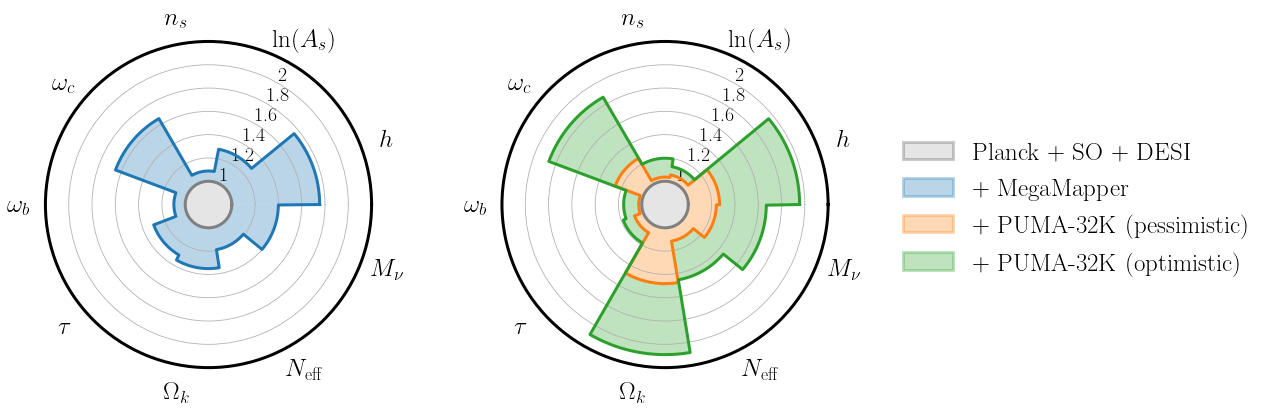

In [25]:
import math

labels = [r'$h$',r'$\ln(A_s)$',r'$n_s$',r'$\omega_c$',r'$\omega_b$',r'$\tau$',
          r'$\Omega_k$',r'$N_\text{eff}$',r'$M_\nu$']

F = fishcast.combine_fishers([Planck_SO,F_desi_RSD_lens],globe)
X = 1/one_param_constraints(F)

F = fishcast.combine_fishers([Planck_SO,F_desi,F_mega_RSD_lens],globe)
Y = 1/one_param_constraints(F)

F = fishcast.combine_fishers([Planck_SO,F_desi_RSD_lens,F_puma32pess],globe)
Z = 1/one_param_constraints(F)

F = fishcast.combine_fishers([Planck_SO,F_desi_RSD_lens,F_puma32opt],globe)
W = 1/one_param_constraints(F)

#F = fishcast.combine_fishers([Planck_SO,F_desi,F_mega_RSD_lens],globe)
#U = one_param_constraints(F)


theta = np.linspace(0,2*np.pi,len(labels)+1)
dtheta = 2*np.pi/len(X)
theta += dtheta/2

def val(theta,Y,X): 
   i = min(math.floor(theta/dtheta),len(labels)-1)
   return Y[i]/X[i]

plt.figure(figsize=(15,6))
ax = plt.subplot(121, projection='polar')
ax2 = plt.subplot(122, projection='polar')

cthetas = np.linspace(0,2*np.pi,1000)


for f in np.array([0.2,0.4,0.6,0.8]): 
   ax.plot(cthetas,f*np.ones(cthetas.shape),c='k',lw=1,alpha=0.2)
   ax2.plot(cthetas,f*np.ones(cthetas.shape),c='k',lw=1,alpha=0.2)

data = [val(theta,Y,X) for theta in cthetas]
data[-1] = data[0]
ax.plot(cthetas,data,c='C0',lw=3)

data = [val(theta,Z,X) for theta in cthetas]
data[-1] = data[0]
ax2.plot(cthetas,data,c='C1',lw=3)

data = [val(theta,W,X) for theta in cthetas]
data[-1] = data[0]
ax2.plot(cthetas,data,c='C2',lw=3)

ax.plot(cthetas,np.ones(cthetas.shape),c='grey',lw=3)
ax2.plot(cthetas,np.ones(cthetas.shape),c='grey',lw=3)

bottom = 0.89

for i in range(len(labels)): 
   ax.bar(theta[i], Y[i]/X[i]-1, width=2 * np.pi / len(labels), bottom=1,
        color='C0',alpha=0.3)
   ax.bar(theta[i], 0.2, width=2 * np.pi / len(labels), bottom=0.8,
        color='grey',alpha=0.2)
    
   ax2.bar(theta[i], Z[i]/X[i]-1, width=2 * np.pi / len(labels), bottom=1,
        color='C1',alpha=0.3)
   ax2.bar(theta[i], W[i]/X[i]-Z[i]/X[i], width=2 * np.pi / len(labels), bottom=Z[i]/X[i],
        color='C2',alpha=0.3)
   ax2.bar(theta[i], 0.2, width=2 * np.pi / len(labels), bottom=0.8,
        color='grey',alpha=0.2)


ax2.bar(0,0,0,0,facecolor='grey',edgecolor='k',lw=3,alpha=0.2,label=r'Planck $+$ SO $+$ DESI')
ax2.bar(0,0,0,0,color='C0',edgecolor='C0',lw=3,alpha=0.3,label=r'$+$ MegaMapper')
ax2.bar(0,0,0,0,color='C1',edgecolor='C1',lw=3,alpha=0.3,label=r'$+$ PUMA-32K (pessimistic)')
ax2.bar(0,0,0,0,color='C2',edgecolor='C2',lw=3,alpha=0.3,label=r'$+$ PUMA-32K (optimistic)')
ax2.legend(loc=(1.2,0.25),frameon=False)    
    
ax.set_rmax(2)
ax.tick_params(pad=10)
ax.set_xticks([dtheta*i+dtheta/2 for i in range(len(labels))])
ax.set_xticklabels(labels)
ax.set_ylim(0.8,2.2)
ax.set_rticks([1,1.2,1.4,1.6,1.8,2.])  
ax.set_yticklabels([1,1.2,1.4,1.6,1.8,2],fontsize=20,zorder=5)
ax.set_rlabel_position(3*dtheta*180/np.pi/2)  
ax.grid(axis='x',alpha=0)


ax2.set_rmax(2)
ax2.tick_params(pad=10)
ax2.set_xticks([dtheta*i+dtheta/2 for i in range(len(labels))])
ax2.set_xticklabels(labels)
ax2.set_ylim(0.8,2.2)
ax2.set_rticks([1,1.2,1.4,1.6,1.8,2.])  
ax2.set_yticklabels([1,1.2,1.4,1.6,1.8,2],fontsize=20,zorder=5) 
ax2.set_rlabel_position(3*dtheta*180/np.pi/2)  
ax2.grid(axis='x',alpha=0)

plt.savefig('figures/polar_plot_HiZ.pdf',bbox_inches='tight')

# Pizzas for LM, ELM, and FM

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


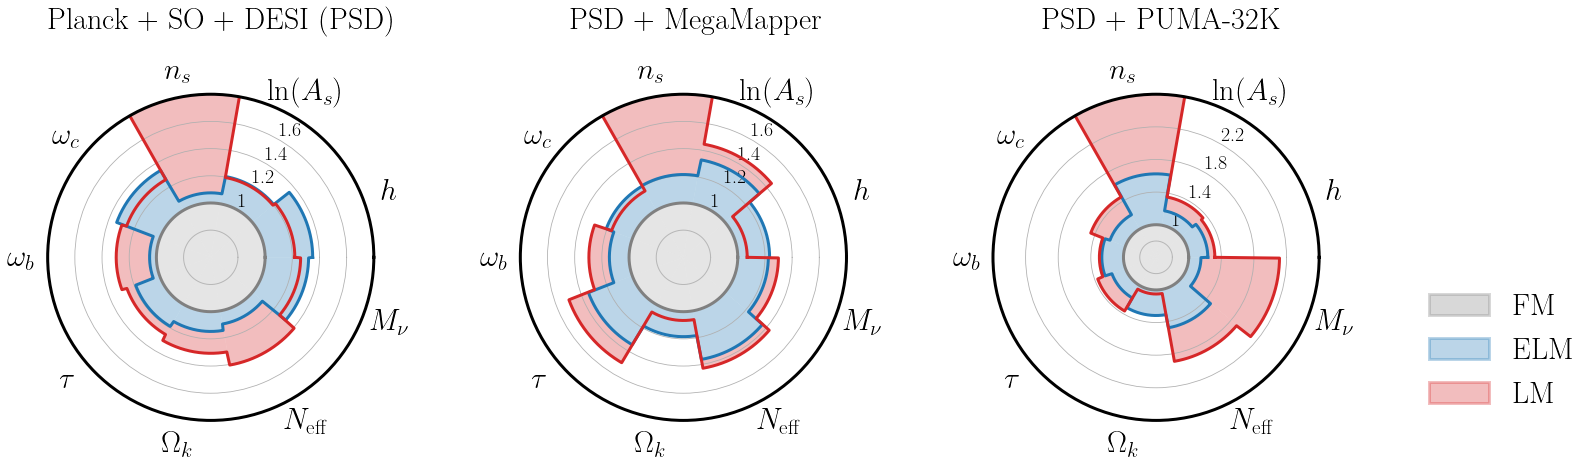

In [26]:
import math

labels = [r'$h$',r'$\ln(A_s)$',r'$n_s$',r'$\omega_c$',r'$\omega_b$',r'$\tau$',\
          r'$\Omega_k$',r'$N_\text{eff}$',r'$M_\nu$']

F = fishcast.combine_fishers([Planck_SO,F_desi],globe)
fm_psd = one_param_constraints(F)

F = fishcast.combine_fishers([Planck_SO,F_desi_lin],globe)
elm_psd = one_param_constraints(F)

F = fishcast.combine_fishers([Planck_SO,F_desi_lin2],globe)
lm_psd = one_param_constraints(F)


F = fishcast.combine_fishers([Planck_SO,F_desi,F_mega],globe)
fm_psd_mega = one_param_constraints(F)

F = fishcast.combine_fishers([Planck_SO,F_desi_lin,F_mega_lin],globe)
elm_psd_mega = one_param_constraints(F)

F = fishcast.combine_fishers([Planck_SO,F_desi_lin2,F_mega_lin2],globe)
lm_psd_mega = one_param_constraints(F)


F = fishcast.combine_fishers([Planck_SO,F_desi,F_puma32opt],globe)
fm_psd_puma = one_param_constraints(F)

F = fishcast.combine_fishers([Planck_SO,F_desi_lin,F_puma32opt_lin],globe)
elm_psd_puma = one_param_constraints(F)

F = fishcast.combine_fishers([Planck_SO,F_desi_lin2,F_puma32opt_lin2],globe)
lm_psd_puma = one_param_constraints(F)


theta = np.linspace(0,2*np.pi,len(labels)+1)
dtheta = 2*np.pi/len(labels)
theta += dtheta/2

def val(theta,Y,X): 
   i = min(math.floor(theta/dtheta),len(labels)-1)
   return max(X[i]/Y[i],1.05)

plt.figure(figsize=(24,6))

ax = plt.subplot(131, projection='polar')
ax2 = plt.subplot(132, projection='polar')
ax3 = plt.subplot(133, projection='polar')

cthetas = np.linspace(0,2*np.pi,1000)

for f in np.array([0.2,0.4,0.6,0.8]): 
   ax.plot(cthetas,f*np.ones(cthetas.shape),c='k',lw=1,alpha=0.2)
   ax2.plot(cthetas,f*np.ones(cthetas.shape),c='k',lw=1,alpha=0.2)
   ax3.plot(cthetas,f*np.ones(cthetas.shape),c='k',lw=1,alpha=0.2)

ax.plot(cthetas,np.ones(cthetas.shape),c='grey',lw=3)
ax2.plot(cthetas,np.ones(cthetas.shape),c='grey',lw=3)
ax3.plot(cthetas,np.ones(cthetas.shape),c='grey',lw=3)

data = [val(theta,elm_psd,fm_psd) for theta in cthetas]
data[-1] = data[0]
ax.plot(cthetas,data,c='C0',lw=3)

data = [val(theta,lm_psd,fm_psd) for theta in cthetas]
data[-1] = data[0]
ax.plot(cthetas,data,c='C3',lw=3)


data = [val(theta,elm_psd_mega,fm_psd_mega) for theta in cthetas]
data[-1] = data[0]
ax2.plot(cthetas,data,c='C0',lw=3)

data = [val(theta,lm_psd_mega,fm_psd_mega) for theta in cthetas]
data[-1] = data[0]
ax2.plot(cthetas,data,c='C3',lw=3)


data = [val(theta,elm_psd_puma,fm_psd_puma) for theta in cthetas]
data[-1] = data[0]
ax3.plot(cthetas,data,c='C0',lw=3)

data = [val(theta,lm_psd_puma,fm_psd_puma) for theta in cthetas]
data[-1] = data[0]
ax3.plot(cthetas,data,c='C3',lw=3)


for i in range(len(labels)): 
   ax.bar(theta[i], fm_psd[i]/elm_psd[i]-1, width=2 * np.pi / len(labels), bottom=1,
        color='C0',alpha=0.3)
   if elm_psd[i] > lm_psd[i]:
      ax.bar(theta[i], fm_psd[i]/lm_psd[i]-fm_psd[i]/elm_psd[i], width=2 * np.pi / len(labels), 
             bottom=fm_psd[i]/elm_psd[i],color='C3',alpha=0.3)
   ax.bar(theta[i], 0.4, width=2 * np.pi / len(labels), bottom=0.6,
        color='grey',alpha=0.2)


   ax2.bar(theta[i], fm_psd_mega[i]/elm_psd_mega[i]-1, width=2 * np.pi / len(labels), bottom=1,
        color='C0',alpha=0.3)
   if elm_psd_mega[i] > lm_psd_mega[i]:
      ax2.bar(theta[i], fm_psd_mega[i]/lm_psd_mega[i]-fm_psd_mega[i]/elm_psd_mega[i], width=2 * np.pi / len(labels), 
             bottom=fm_psd_mega[i]/elm_psd_mega[i],color='C3',alpha=0.3)
   ax2.bar(theta[i], 0.4, width=2 * np.pi / len(labels), bottom=0.6,
        color='grey',alpha=0.2)


   ax3.bar(theta[i], fm_psd_puma[i]/elm_psd_puma[i]-1, width=2 * np.pi / len(labels), bottom=1,
        color='C0',alpha=0.3)
   if elm_psd_puma[i] > lm_psd_puma[i]:
      ax3.bar(theta[i], fm_psd_puma[i]/lm_psd_puma[i]-fm_psd_puma[i]/elm_psd_puma[i], width=2 * np.pi / len(labels), 
             bottom=fm_psd_puma[i]/elm_psd_puma[i],color='C3',alpha=0.3)
   ax3.bar(theta[i], 0.4, width=2 * np.pi / len(labels), bottom=0.6,
        color='grey',alpha=0.2)

ax3.bar(0,0,0,0,color='grey',edgecolor='grey',lw=3,alpha=0.3,label=r'FM')
ax3.bar(0,0,0,0,color='C0',edgecolor='C0',lw=3,alpha=0.3,label=r'ELM')
ax3.bar(0,0,0,0,color='C3',edgecolor='C3',lw=3,alpha=0.3,label=r'LM')
ax3.legend(loc=(1.3,0),frameon=False,ncol=1,fontsize=30) 

ax.tick_params(pad=10)
ax.set_xticks([dtheta*i+dtheta/2 for i in range(len(labels))])
ax.set_xticklabels(labels,fontsize=30)
ax.set_ylim(0.6,1.8)
ax.set_rticks([1,1.2,1.4,1.6])  
ax.set_yticklabels([1,1.2,1.4,1.6],fontsize=20) 
ax.set_rlabel_position(3*dtheta*180/np.pi/2)  
ax.grid(axis='x',color='k',alpha=0)

ax2.tick_params(pad=10)
ax2.set_xticks([dtheta*i+dtheta/2 for i in range(len(labels))])
ax2.set_xticklabels(labels,fontsize=30)
ax2.set_ylim(0.6,1.8)
ax2.set_rticks([1,1.2,1.4,1.6])  
ax2.set_yticklabels([1,1.2,1.4,1.6],fontsize=20) 
ax2.set_rlabel_position(3*dtheta*180/np.pi/2)  
ax2.grid(axis='x',color='k',alpha=0)

ax3.tick_params(pad=10)
ax3.set_xticks([dtheta*i+dtheta/2 for i in range(len(labels))])
ax3.set_xticklabels(labels,fontsize=30)
ax3.set_ylim(0.6,2.6)
ax3.set_rticks([1,1.4,1.8,2.2])  
ax3.set_yticklabels([1,1.4,1.8,2.2],fontsize=20) 
ax3.set_rlabel_position(3*dtheta*180/np.pi/2)  
ax3.grid(axis='x',color='k',alpha=0) 

ax.text(0,1.2,'Planck + SO + DESI (PSD)',fontsize=30,ma='center',transform=ax.transAxes)
ax2.text(1.6,1.2,'PSD + MegaMapper',fontsize=30,ma='center',transform=ax.transAxes)
ax3.text(3.05,1.2,'PSD + PUMA-32K',fontsize=30,ma='center',transform=ax.transAxes)

plt.savefig('figures/polar_plot_linear_vs_full.pdf',bbox_inches='tight')

In [27]:
x = [0,1,3,4,5,6,7,8]
np.mean(fm_psd[x]/lm_psd[x]),np.mean(fm_psd[x]/elm_psd[x])

(1.2753099905986391, 1.2107045687493434)

In [28]:
np.mean(fm_psd_mega[x]/lm_psd_mega[x]),np.mean(fm_psd_mega[x]/elm_psd_mega[x])

(1.2832391267954728, 1.2537390534407238)

In [29]:
np.mean(fm_psd_puma[x]/lm_psd_puma[x]),np.mean(fm_psd_puma[x]/elm_psd_puma[x])

(1.4384784141794535, 1.2500650487206513)

In [30]:
fm_psd_mega[2]/lm_psd_mega[2]

6.770704792160816

# Do the corrections to $\bar{n}$ and $V_\text{eff}$ matter? (They don't)

In [47]:
def chi(z): return (1+z)*cosmo.angular_distance(z)*params['h']

def dchidz(z): return (chi(z+0.01)-chi(z))/0.01

def I(i,j,zmin,zmax,cast=fishcast,P=10000):
   zs = np.linspace(zmin,zmax,10)
   dz = zs[1]-zs[0]
   w = lambda z: 1/(1+P*get_n(cast,z))
   def get_n(cast,z):
      if cast.experiment.HI: return compute_n(cast,z)[0]
      return compute_n(cast,z)
   integrand = np.array([4*np.pi*chi(z)**2*dchidz(z)*w(z)**j*get_n(cast,z)**i for z in zs])
   #return np.sum(integrand)*dz
   return scipy.integrate.simps(integrand,x=zs)

def nbar_corrected(zmin,zmax,cast=fishcast,P=10000): return 1000*I(4,4,zmin,zmax,cast=cast,P=P)/I(3,4,zmin,zmax,cast=cast,P=P)

def nbar2_corrected(zmin,zmax,cast=fishcast,P=10000): return 1000*np.sqrt(I(4,4,zmin,zmax,cast=cast,P=P)/I(2,4,zmin,zmax,cast=cast,P=P))

def v_corrected(zmin,zmax,cast=fishcast,P=10000): return I(2,2,zmin,zmax,cast=cast,P=P)**2/I(4,4,zmin,zmax,cast=cast,P=P)

In [48]:
def make_correc_plot(ax,cast,label):
   zcs = cast.experiment.zcenters
   zes = cast.experiment.zedges
   for i in range(1,len(zcs)): ax.axvline(zes[i],-1,1,c='k',ls='--')
   ax.set_xlim(zes[0],zes[-1])
   zs = np.linspace(zes[0],zes[-1],50)
   def get_n(cast,z):
      if cast.experiment.HI: return compute_n(cast,z)[0]
      return compute_n(cast,z) 
   ax.plot(zs,[1000*get_n(cast,z) for z in zs],lw=3,c='C0',zorder=1)#,label=r'$n_\text{ELG}(z)$')
   ncorrected =  np.array([nbar_corrected(zes[i],zes[i+1],cast) for i in range(len(zcs))])
   n2corrected =  np.array([nbar2_corrected(zes[i],zes[i+1],cast) for i in range(len(zcs))])
   nfid = np.array([1000*get_n(cast,z) for z in zcs])
   ax.scatter(zcs,ncorrected,marker='.',c='C1',zorder=2,s=400)
   ax.scatter(zcs,n2corrected,marker='x',c='C3',zorder=2,s=400)
   print(cast.name,'nbar',ncorrected/nfid)
   print(cast.name,'nbar2',ncorrected/nfid)
   ax.text(0.85, 0.8, label, fontsize=20,horizontalalignment='center',
          bbox=dict(facecolor='white', alpha=1,edgecolor='white'),transform=ax.transAxes)
    
    
def make_vcorrec_plot(ax,cast):
   zcs = cast.experiment.zcenters
   zes = cast.experiment.zedges
   for i in range(1,len(zcs)): ax.axvline(zes[i],-1,1,c='k',ls='--')
   ax.set_xlim(zes[0],zes[-1])
   ratios = [cast.comov_vol(zes[i],zes[i+1])/cast.experiment.fsky/v_corrected(zes[i],zes[i+1],cast) for i in range(len(zcs))]
   print(cast.name,'Vratio',ratios)
   ax.axhline(1,0,1000,c='gray',alpha=0.5)
   ax.axhline(1.1,0,1000,c='gray',alpha=0.5)
   ax.axhline(1.2,0,1000,c='gray',alpha=0.5)
   ax.scatter(zcs,ratios,marker='s',c='C2',zorder=2,s=200)
   ax.set_ylim(0.9,1.3)

DESI Vratio [1.0444794540243887, 1.0071266099069145, 1.0634325403182041, 1.2466487705369034]
Euclid Vratio [1.003052554961384, 1.0035033898680397, 1.0048247835055883, 1.0032284639764795]
MSE Vratio [1.0023350409942229, 1.0173011274706878, 1.025638221923327, 1.085310710112668]
DESI nbar [0.68349509 0.9837681  0.95445345 1.19845789]
DESI nbar2 [0.68349509 0.9837681  0.95445345 1.19845789]
Euclid nbar [0.97650697 0.99360585 0.99622726 1.02964141]
Euclid nbar2 [0.97650697 0.99360585 0.99622726 1.02964141]
MSE nbar [1.         0.93035169 1.03987251 1.16672368]
MSE nbar2 [1.         0.93035169 1.03987251 1.16672368]
HIRAX Vratio [1.003004269744613, 1.0026961497176963, 1.0024086512988903, 1.0021619315699724]
MegaMapper Vratio [1.0044220519249725, 1.0111599613296685, 1.0369659291158246, 1.119457909710025]
PUMA32K Vratio [1.0020676289230936, 1.0016398658428525, 1.0013546369274797, 1.0011566357677175]
HIRAX nbar [1.00028905 1.00123553 1.00036281 0.99922085]
HIRAX nbar2 [1.00028905 1.00123553 1.0

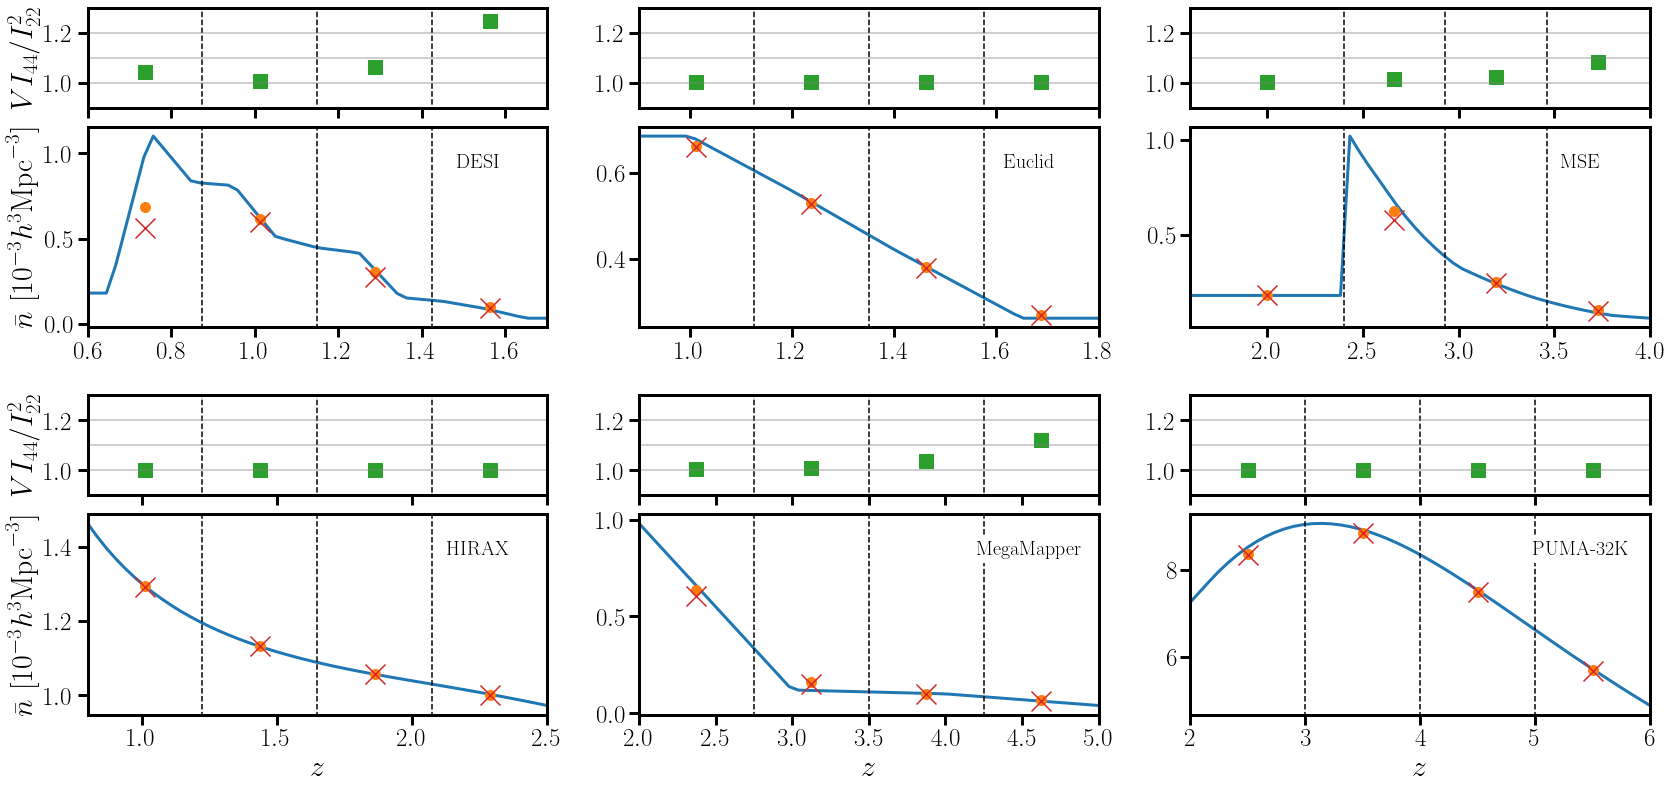

In [49]:
fig, ax = plt.subplots(5,3,figsize=(28,13),gridspec_kw={'width_ratios':[1,1,1], 'height_ratios':[0.5,1,0.15,0.5,1],'hspace':0.15})

make_vcorrec_plot(ax[0,0],desiCast)
make_vcorrec_plot(ax[0,1],eucCast)
make_vcorrec_plot(ax[0,2],mseCast)

make_correc_plot(ax[1,0],desiCast,'DESI')
make_correc_plot(ax[1,1],eucCast,'Euclid')
make_correc_plot(ax[1,2],mseCast, 'MSE')

make_vcorrec_plot(ax[3,0],hiraxOptCast)
make_vcorrec_plot(ax[3,1],fishcast)
make_vcorrec_plot(ax[3,2],puma32optCast)

make_correc_plot(ax[4,0],hiraxOptCast, 'HIRAX')
make_correc_plot(ax[4,1],megaCast, 'MegaMapper')
make_correc_plot(ax[4,2],puma32optCast,'PUMA-32K')

for i in range(3): 
   ax[0,i].xaxis.set_ticklabels([])
   ax[2,i].set_visible(False)
   ax[3,i].xaxis.set_ticklabels([])

ax[0,0].set_ylabel(r'$VI_{44}/I^2_{22}$')
ax[3,0].set_ylabel(r'$VI_{44}/I^2_{22}$')
ax[1,0].set_ylabel(r'$\bar{n}\,\,[10^{-3} h^{3}\text{Mpc}^{-3}]$')
ax[4,0].set_ylabel(r'$\bar{n}\,\,[10^{-3} h^{3}\text{Mpc}^{-3}]$')

ax[4,0].set_xlabel(r'$z$')
ax[4,1].set_xlabel(r'$z$')
ax[4,2].set_xlabel(r'$z$')

#ax[0,0].scatter([],[],marker='.',c='C1',zorder=2,s=400,label=r'$I_{44}/I_{34}$')
#ax[0,0].legend(loc='lower left',frameon=False)

plt.savefig('figures/updated_covariance.pdf',bbox_inches='tight')

## Helper function

In [51]:
def fEDE_Alin_constraints(F):
   LCDM = [0,1,2,3,4,5]
   fEDE = [6] ; Alin = [7]
   loc = list(np.arange(8,len(F),1))
   x = fEDE + LCDM + loc
   Ffede = F[x][:,x]
   x = Alin + LCDM + loc
   FAlin = F[x][:,x]
   sigmafEDE = np.sqrt(np.linalg.inv(Ffede)[0,0])
   sigmaAlin = np.sqrt(np.linalg.inv(FAlin)[0,0])
   return np.array([sigmafEDE,sigmaAlin])

## Let's play around with $\sigma_z/(1+z)$

In [55]:
sigma_zs= np.logspace(-4,np.log10(0.02),100)
result = []

for sigma_z in sigma_zs:
   megaCast.experiment.sigma_z = sigma_z
   F_mega_tmp = megaCast.gen_fisher(basis,globe,kmax_knl=1.,derivatives=derivatives_mega)
   F_mega_tmp_ext = megaCast.gen_fisher(basis_ext,8,kmax_knl=1.,derivatives=derivatives_mega_ext)
   Ftmp = fishcast.combine_fishers([Planck_SO,F_mega_tmp],globe)
   Ftmp_ext = fishcast.combine_fishers([Planck_SO[:6,:6],F_mega_tmp_ext],6)
   opc = one_param_constraints(Ftmp)
   ext = fEDE_Alin_constraints(Ftmp_ext)
   result.append(np.concatenate((opc,ext))) 

result = np.array(result)
F = fishcast.combine_fishers([Planck_SO,F_mega],globe)
Fext = fishcast.combine_fishers([Planck_SO[:6,:6],F_mega_ext],6)
opc = one_param_constraints(F)
ext = fEDE_Alin_constraints(Fext)
result /= np.concatenate((opc,ext))
result = np.transpose(result)

In [56]:
megaCast.experiment.sigma_z = 0

## And now with $k_\text{max}/k_\text{nl}$

In [57]:
kmaxs = np.linspace(0.2,1,100)
result2 = []
for kmax in kmaxs:
   F_mega_tmp = megaCast.gen_fisher(basis,globe,kmax_knl=kmax,derivatives=derivatives_mega)
   Ftmp = fishcast.combine_fishers([Planck_SO,F_mega_tmp],globe)
   F_mega_tmp_ext = megaCast.gen_fisher(basis_ext,8,kmax_knl=kmax,derivatives=derivatives_mega_ext) 
   Ftmp_ext = fishcast.combine_fishers([Planck_SO[:6,:6],F_mega_tmp_ext],6)
   opc = one_param_constraints(Ftmp)
   ext = fEDE_Alin_constraints(Ftmp_ext)
   result2.append(np.concatenate((opc,ext))) 


result2 = np.array(result2)
F = fishcast.combine_fishers([Planck_SO,F_mega],globe)
Fext = fishcast.combine_fishers([Planck_SO[:6,:6],F_mega_ext],6)
opc = one_param_constraints(F)
ext = fEDE_Alin_constraints(Fext)
result2 /= np.concatenate((opc,ext)) 
result2 = np.transpose(result2)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


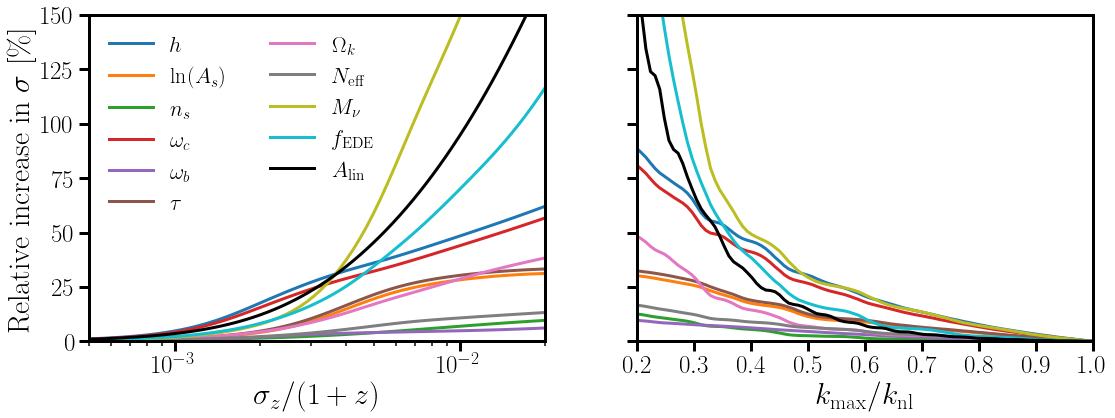

In [58]:
fig,ax = plt.subplots(1,2,figsize=(18,6),sharey=True)

ax[0].semilogx(sigma_zs,(result[0]-1)*100,lw=3,label=r'$h$',c='C0')
ax[0].semilogx(sigma_zs,(result[1]-1)*100,lw=3,label=r'$\ln(A_s)$',c='C1')
ax[0].semilogx(sigma_zs,(result[2]-1)*100,lw=3,label=r'$n_s$',c='C2')
ax[0].semilogx(sigma_zs,(result[3]-1)*100,lw=3,label=r'$\omega_c$',c='C3')
ax[0].semilogx(sigma_zs,(result[4]-1)*100,lw=3,label=r'$\omega_b$',c='C4')
ax[0].semilogx(sigma_zs,(result[5]-1)*100,lw=3,label=r'$\tau$',c='C5')
ax[0].semilogx(sigma_zs,(result[6]-1)*100,lw=3,label=r'$\Omega_k$',c='C6')
ax[0].semilogx(sigma_zs,(result[7]-1)*100,lw=3,label=r'$N_\text{eff}$',c='C7')
ax[0].semilogx(sigma_zs,(result[8]-1)*100,lw=3,label=r'$M_\nu$',c='C8')
ax[0].semilogx(sigma_zs,(result[9]-1)*100,lw=3,label=r'$f_\text{EDE}$',c='C9')
ax[0].semilogx(sigma_zs,(result[10]-1)*100,lw=3,label=r'$A_\text{lin}$',c='k')


ax[0].legend(loc='upper left',frameon=False,ncol=2,fontsize=22)
ax[0].set_xlabel(r'$\sigma_z/(1+z)$')
ax[0].set_ylabel(r'Relative increase in $\sigma\,\,[\%]$')
ax[0].set_xlim(5e-4,2e-2)
ax[0].set_ylim(0,150)
ax[0].set_yticks(np.array([0,25,50,75,100,125,150]))

##################################################################################

ax[1].plot(kmaxs,(result2[0]-1)*100,lw=3,label=r'$h$')
ax[1].plot(kmaxs,(result2[1]-1)*100,lw=3,label=r'$\log(A_s)$')
ax[1].plot(kmaxs,(result2[2]-1)*100,lw=3,label=r'$n_s$')
ax[1].plot(kmaxs,(result2[3]-1)*100,lw=3,label=r'$\omega_c$')
ax[1].plot(kmaxs,(result2[4]-1)*100,lw=3,label=r'$\omega_b$')
ax[1].plot(kmaxs,(result2[5]-1)*100,lw=3,label=r'$\tau$')
ax[1].plot(kmaxs,(result2[6]-1)*100,lw=3,label=r'$\Omega_k$')
ax[1].plot(kmaxs,(result2[7]-1)*100,lw=3,label=r'$N_\text{eff}$')
ax[1].plot(kmaxs,(result2[8]-1)*100,lw=3,label=r'$M_\nu$')
ax[1].plot(kmaxs,(result2[9]-1)*100,lw=3,label=r'$f_\text{EDE}$')
ax[1].plot(kmaxs,(result2[10]-1)*100,lw=3,label=r'$A_\text{lin}$',c='k')

ax[1].set_xticks([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

ax[1].set_xlim(0.2,1)
ax[1].set_ylim(0,150)

ax[1].set_xlabel(r'$k_\text{max}/k_\text{nl}$')
plt.savefig('figures/one_parameter_constraints_vs_kmax.pdf',bbox_inches='tight')

# Trade off of area vs. depth

In [59]:
def get_constraints(t):
   m = 24.5 + 2.5*np.log10(np.sqrt(t))
   for i in range(4): 
      z = fishcast.experiment.zcenters[i]
      p = np.genfromtxt('output/'+fishcast.name+'/derivatives/pfid_'+str(int(100*z))+'.txt')
      fishcast.P_fid[i] = p
      A = lambda m: -0.98*(m-25.) + 0.11
      B = lambda m: 0.12*(m-25.) + 0.17
      def b(m,z): return A(m)*(1.+z)+B(m)*(1.+z)**2.
      fishcast.P_fid[i] -= 1/LBGn(fishcast,z)
      fishcast.P_fid[i] += 1/(0.5*LBGn(fishcast,z,m=m)*b(m,z)**2/b(24.5,z)**2)
         
   F = fishcast.gen_fisher(basis,11,kmax_knl=1,derivatives=derivatives_fish)/np.sqrt(t)
   F = fishcast.combine_fishers([Planck_SO,F_desi,F],11)
   opc = one_param_constraints(F)
   #
   F_fish_tmp_ext = fishcast.gen_fisher(basis_ext,8,kmax_knl=kmax,derivatives=derivatives_fish_ext)/np.sqrt(t)
   Ftmp_ext = fishcast.combine_fishers([Planck_SO[:6,:6],F_fish_tmp_ext],6)
   ext = fEDE_Alin_constraints(Ftmp_ext)
   return np.concatenate((opc,ext))

In [41]:
ts = np.linspace(0.4,8,50)
ms = 24.5 + 2.5*np.log10(np.sqrt(ts))

In [42]:
ms[0],ms[-1]

(24.002574989159953, 25.62886248373993)

In [60]:
ts = np.linspace(0.4,8,50)
result = np.zeros((len(ts),11))
for i,t in enumerate(ts): result[i] = get_constraints(t)
result /= result[4]
result = result.T

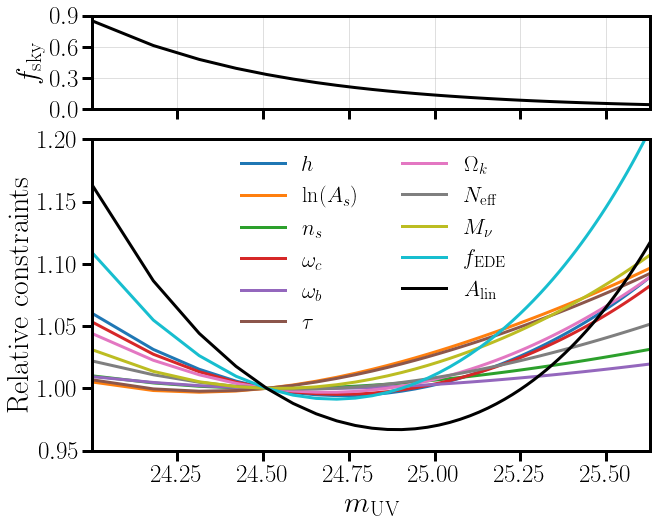

In [61]:
ms = 24.5 + 2.5*np.log10(np.sqrt(ts))

fig,ax = plt.subplots(2,1,figsize=(10,8),sharex=True,gridspec_kw={'height_ratios':[0.3,1],'hspace':0.15})

ax[0].plot(ms,fishcast.experiment.fsky/ts,c='k',lw=3)

ax[1].plot(ms,result[0],lw=3,label=r'$h$')
ax[1].plot(ms,result[1],lw=3,label=r'$\ln(A_s)$')
ax[1].plot(ms,result[2],lw=3,label=r'$n_s$')
ax[1].plot(ms,result[3],lw=3,label=r'$\omega_c$')
ax[1].plot(ms,result[4],lw=3,label=r'$\omega_b$')
ax[1].plot(ms,result[5],lw=3,label=r'$\tau$')
ax[1].plot(ms,result[6],lw=3,label=r'$\Omega_k$')
ax[1].plot(ms,result[7],lw=3,label=r'$N_\text{eff}$')
ax[1].plot(ms,result[8],lw=3,label=r'$M_\nu$')
ax[1].plot(ms,result[9],lw=3,label=r'$f_\text{EDE}$')
ax[1].plot(ms,result[10],lw=3,label=r'$A_\text{lin}$',c='k')

ax[1].set_xlabel(r'$m_\text{UV}$')
ax[0].set_ylabel(r'$f_\text{sky}$')
ax[1].set_ylabel(r'Relative constraints')

ax[0].set_xlim(ms[0],ms[-1])
ax[0].set_yticks([0,0.3,0.6,0.9])
ax[0].grid(alpha=0.5)

ax[1].legend(loc=(0.25,0.35),frameon=False,ncol=2,fontsize=22)
ax[1].set_ylim(0.95,1.2)

plt.savefig('figures/area_vs_depth.pdf',bbox_inches='tight')

In [62]:
F = fishcast.combine_fishers([Planck_SO,F_desi],globe)
one = np.linalg.det(F[:6,:6])
F = fishcast.combine_fishers([Planck_SO,F_desi,F_mega],globe)
two = np.linalg.det(F[:6,:6])
F = fishcast.combine_fishers([Planck_SO,F_desi,F_puma32opt],globe)
three = np.linalg.det(F[:6,:6])
two/one,three/one

(5203.067040374943, 67287.68557174112)

## Loss of "u-band"

In [63]:
def get_constraints(m):
   for i in np.array([0,1,2,3]): 
      z = fishcast.experiment.zcenters[i]
      p = np.genfromtxt('output/'+fishcast.name+'/derivatives/pfid_'+str(int(100*z))+'.txt')
      fishcast.P_fid[i] = p
        
   for i in np.array([1,2]): 
      z = fishcast.experiment.zcenters[i]
      p = np.genfromtxt('output/'+fishcast.name+'/derivatives/pfid_'+str(int(100*z))+'.txt')
      fishcast.P_fid[i] = p
      A = lambda m: -0.98*(m-25.) + 0.11
      B = lambda m: 0.12*(m-25.) + 0.17
      def b(m,z): return A(m)*(1.+z)+B(m)*(1.+z)**2.
      fishcast.P_fid[i] -= 1/LBGn(fishcast,z)
      fishcast.P_fid[i] += 1/(0.5*LBGn(fishcast,z,m=m)*b(m,z)**2/b(24.5,z)**2)
         
   F = fishcast.gen_fisher(basis,11,kmax_knl=1,derivatives=derivatives_fish)
   F = fishcast.combine_fishers([Planck_SO,F],11)
   opc = one_param_constraints(F)
   #
   F_fish_tmp_ext = fishcast.gen_fisher(basis_ext,8,kmax_knl=kmax,derivatives=derivatives_fish_ext)
   Ftmp_ext = fishcast.combine_fishers([Planck_SO[:6,:6],F_fish_tmp_ext],6)
   ext = fEDE_Alin_constraints(Ftmp_ext)
   return np.concatenate((opc,ext))

In [64]:
ms = np.linspace(23,24.5,50)
result = np.zeros((len(ms),11))
for i,m in enumerate(ms): result[i] = get_constraints(m)
result /= result[-1]
result = result.T

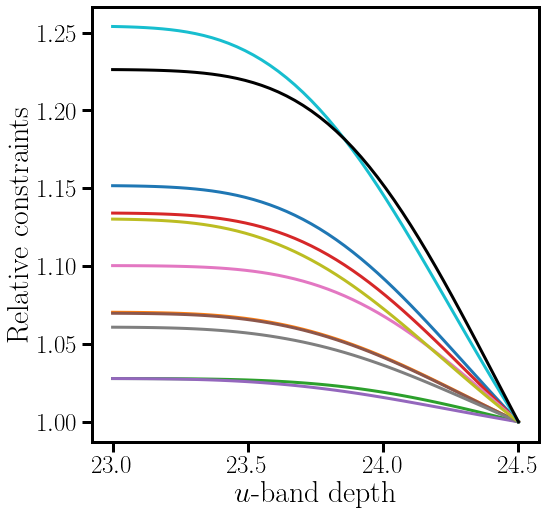

In [65]:
fig,ax = plt.subplots(1,1,figsize=(8,8))

ax.plot(ms,result[0],lw=3,label=r'$h$')
ax.plot(ms,result[1],lw=3,label=r'$\ln(A_s)$')
ax.plot(ms,result[2],lw=3,label=r'$n_s$')
ax.plot(ms,result[3],lw=3,label=r'$\omega_c$')
ax.plot(ms,result[4],lw=3,label=r'$\omega_b$')
ax.plot(ms,result[5],lw=3,label=r'$\tau$')
ax.plot(ms,result[6],lw=3,label=r'$\Omega_k$')
ax.plot(ms,result[7],lw=3,label=r'$N_\text{eff}$')
ax.plot(ms,result[8],lw=3,label=r'$M_\nu$')
ax.plot(ms,result[9],lw=3,label=r'$f_\text{EDE}$')
ax.plot(ms,result[10],lw=3,label=r'$A_\text{lin}$',c='k')

ax.set_xlabel(r'$u$-band depth')
ax.set_ylabel(r'Relative constraints')

plt.savefig('figures/u_band_loss.pdf',bbox_inches='tight')

## Table for $\Lambda$CDM and one-parameter extensions
### Easy to copy and paste

In [16]:
scaling = np.array([1e4,1e3,1e3,1e4,1e5,1e3,1e3,1e3,1e3])

BBN_prior = np.array([0,0,0,0,(5e-4)**(-2),(0.00000000002)**(-2)])
BBN_prior = np.diag(BBN_prior)

tau_prior = np.array([0,0,0,0,0,(0.00000000002)**(-2)])
tau_prior = np.diag(tau_prior)

F = fishcast.combine_fishers([F_desi,BBN_prior,tau_prior],6)
print(pretty_table(F,scaling,name=r'DESI &'))

F = fishcast.combine_fishers([F_euc,BBN_prior,tau_prior],6)
print(pretty_table(F,scaling,name=r'Euclid &'))

F = fishcast.combine_fishers([F_mse,BBN_prior,tau_prior],6)
print(pretty_table(F,scaling,name=r'MSE &'))

F = fishcast.combine_fishers([F_mega,BBN_prior,tau_prior],6)
print(pretty_table(F,scaling,name=r'MegaMapper &'))

F = fishcast.combine_fishers([F_hiraxOpt,BBN_prior,tau_prior],6)
F2 = fishcast.combine_fishers([F_hiraxPess,BBN_prior],6)
print(pretty_table(F,scaling,F2=F2,name=r'HIRAX &'))

F = fishcast.combine_fishers([F_puma5opt,BBN_prior,tau_prior],6)
F2 = fishcast.combine_fishers([F_puma5pess,BBN_prior],6)
print(pretty_table(F,scaling,F2=F2,name=r'PUMA-5K &'))

F = fishcast.combine_fishers([F_puma32opt,BBN_prior,tau_prior],6)
F2 = fishcast.combine_fishers([F_puma32pess,BBN_prior],6)
print(pretty_table(F,scaling,F2=F2,name=r'PUMA-32K &'))

print('\hline')
print('\hline')

F = fishcast.combine_fishers([Planck,F_desi],globe)
print(pretty_table(F,scaling,name=r'Planck $+$ DESI &'))
F = fishcast.combine_fishers([Planck,F_desi_RSD_lens_planck],globe)
print(pretty_table(F,scaling,name=r'$+$ lensing&'))

print('\hline')

print(r'\rowcolor{gray!20}')
F = fishcast.combine_fishers([Planck_SO,F_desi],globe)
print(pretty_table(F,scaling,name=r'Planck $+$ SO $+$ DESI (PSD) &'))
print(r'\rowcolor{gray!20}')
F = fishcast.combine_fishers([Planck_SO,F_desi_RSD_lens],globe)
print(pretty_table(F,scaling,name=r'$+$ lensing&'))

print('\hline')

F = fishcast.combine_fishers([Planck_SO,F_euc],globe)
print(pretty_table(F,scaling,name=r'Planck $+$ SO $+$ Euclid &'))
F = fishcast.combine_fishers([Planck_SO,F_euc_RSD_lens],globe)
print(pretty_table(F,scaling,name=r'$+$ lensing &'))

print('\hline')

F = fishcast.combine_fishers([Planck_SO,F_mse],globe)
print(pretty_table(F,scaling,name=r'Planck $+$ SO $+$ MSE &'))
F = fishcast.combine_fishers([Planck_SO,F_mse_RSD_lens],globe)
print(pretty_table(F,scaling,name=r'$+$ lensing &'))

print('\hline')
print('\hline')

print(r'\rowcolor{gray!20}')
F = fishcast.combine_fishers([Planck_SO,F_desi,F_mega],globe)
print(pretty_table(F,scaling,name=r'PSD $+$ MegaMapper &'))
print(r'\rowcolor{gray!20}')
F = fishcast.combine_fishers([Planck_SO,F_desi,F_mega_RSD_lens],globe)
print(pretty_table(F,scaling,name=r'$+$ lensing &'))

print('\hline')

F = fishcast.combine_fishers([Planck_SO,F_desi,F_hiraxOpt],globe)
F2 = fishcast.combine_fishers([Planck_SO,F_desi,F_hiraxPess],globe)
print(pretty_table(F,scaling,F2=F2,name=r'PSD $+$ HIRAX &'))
F = fishcast.combine_fishers([Planck_SO,F_desi_RSD_lens,F_hiraxOpt],globe)
F2 = fishcast.combine_fishers([Planck_SO,F_desi_RSD_lens,F_hiraxPess],globe)
print(pretty_table(F,scaling,F2=F2,name=r'$+$ lensing &'))

print('\hline')

F = fishcast.combine_fishers([Planck_SO,F_desi,F_puma5opt],globe)
F2 = fishcast.combine_fishers([Planck_SO,F_desi,F_puma5pess],globe)
print(pretty_table(F,scaling,F2=F2,name=r'PSD $+$ PUMA-5K &'))
F = fishcast.combine_fishers([Planck_SO,F_desi_RSD_lens,F_puma5opt],globe)
F2 = fishcast.combine_fishers([Planck_SO,F_desi_RSD_lens,F_puma5pess],globe)
print(pretty_table(F,scaling,F2=F2,name=r'$+$ lensing &'))

print('\hline')

F = fishcast.combine_fishers([Planck_SO,F_desi,F_puma32opt],globe)
F2 = fishcast.combine_fishers([Planck_SO,F_desi,F_puma32pess],globe)
print(r'\rowcolor{gray!20}')
print(pretty_table(F,scaling,F2=F2,name=r'PSD $+$ PUMA-32K &'))
F = fishcast.combine_fishers([Planck_SO,F_desi_RSD_lens,F_puma32opt],globe)
F2 = fishcast.combine_fishers([Planck_SO,F_desi_RSD_lens,F_puma32pess],globe)
print(r'\rowcolor{gray!20}')
print(pretty_table(F,scaling,F2=F2,name=r'$+$ lensing &'))

print('\hline')
print('\hline')

F = fishcast.combine_fishers([LiteBird_S4,F_desi],globe)
print(pretty_table(F,scaling,name=r'LiteBIRD $+$ S4 $+$ DESI (LSD) &'))
F = fishcast.combine_fishers([LiteBird_S4,F_desi_RSD_lens_s4],globe)
print(pretty_table(F,scaling,name=r'$+$ lensing &'))

print('\hline')

F = fishcast.combine_fishers([LiteBird_S4,F_desi,F_mega],globe)
print(pretty_table(F,scaling,name=r'LSD $+$ MegaMapper &'))
F = fishcast.combine_fishers([LiteBird_S4,F_desi,F_mega_RSD_lens_s4],globe)
print(pretty_table(F,scaling,name=r'$+$ lensing &'))

print('\hline')

F = fishcast.combine_fishers([LiteBird_S4,F_desi,F_hiraxOpt],globe)
F2 = fishcast.combine_fishers([LiteBird_S4,F_desi,F_hiraxPess],globe)
print(pretty_table(F,scaling,F2=F2,name=r'LSD $+$ HIRAX &'))
F = fishcast.combine_fishers([LiteBird_S4,F_desi_RSD_lens_s4,F_hiraxOpt],globe)
F2 = fishcast.combine_fishers([LiteBird_S4,F_desi_RSD_lens_s4,F_hiraxPess],globe)
print(pretty_table(F,scaling,F2=F2,name=r'$+$ lensing &'))

print('\hline')

F = fishcast.combine_fishers([LiteBird_S4,F_desi,F_puma5opt],globe)
F2 = fishcast.combine_fishers([LiteBird_S4,F_desi,F_puma5pess],globe)
print(pretty_table(F,scaling,F2=F2,name=r'LSD $+$ PUMA-5K &'))
F = fishcast.combine_fishers([LiteBird_S4,F_desi_RSD_lens_s4,F_puma5opt],globe)
F2 = fishcast.combine_fishers([LiteBird_S4,F_desi_RSD_lens_s4,F_puma5pess],globe)
print(pretty_table(F,scaling,F2=F2,name=r'$+$ lensing &'))

print('\hline')

F = fishcast.combine_fishers([LiteBird_S4,F_desi,F_puma32opt],globe)
F2 = fishcast.combine_fishers([LiteBird_S4,F_desi,F_puma32pess],globe)
print(pretty_table(F,scaling,F2=F2,name=r'LSD $+$ PUMA-32K &'))
F = fishcast.combine_fishers([LiteBird_S4,F_desi_RSD_lens_s4,F_puma32opt],globe)
F2 = fishcast.combine_fishers([LiteBird_S4,F_desi_RSD_lens_s4,F_puma32pess],globe)
print(pretty_table(F,scaling,F2=F2,name=r'$+$ lensing &'))

print(r'\rowcolor{gray!20}')
F = fishcast.combine_fishers([LiteBird_S4,F_desi,F_mega_RSD_lens_s4,F_puma32opt],globe)
print(pretty_table(F,scaling,name=r'Everything bagel &'))

DESI & $63.21$ & $42.24$ & $0.0$ & $20.34$ & $598.4$ & $311.83$ \\
Euclid & $57.9$ & $35.54$ & $0.0$ & $16.99$ & $476.25$ & $245.8$ \\
MSE & $49.82$ & $21.36$ & $0.0$ & $10.75$ & $213.83$ & $129.18$ \\
MegaMapper & $45.75$ & $19.42$ & $0.0$ & $7.82$ & $172.3$ & $104.34$ \\
HIRAX & $48.8/98.2$ & $23.2/42.5$ & $0.0/0.0$ & $10.7/29.3$ & $267.1/705.2$ & $156.8/515.5$ \\
PUMA-5K & $39.4/64.8$ & $14.6/16.8$ & $0.0/0.0$ & $5.5/12.1$ & $101.9/203.9$ & $67.4/153.9$ \\
PUMA-32K & $32.8/49.6$ & $12.2/14.3$ & $0.0/0.0$ & $3.8/8.8$ & $81.4/150.7$ & $52.4/116.0$ \\
\hline
\hline
Planck $+$ DESI & $31.83$ & $7.28$ & $5.86$ & $1.24$ & $112.8$ & $41.49$ \\
$+$ lensing& $28.69$ & $6.58$ & $5.16$ & $1.19$ & $107.34$ & $37.99$ \\
\hline
\rowcolor{gray!20}
Planck $+$ SO $+$ DESI (PSD) & $23.42$ & $6.13$ & $5.83$ & $0.68$ & $43.93$ & $39.76$ \\
\rowcolor{gray!20}
$+$ lensing& $18.67$ & $4.89$ & $4.22$ & $0.68$ & $42.9$ & $35.42$ \\
\hline
Planck $+$ SO $+$ Euclid & $23.04$ & $6.05$ & $5.64$ & $0.66$ & $43.6

In [18]:
12.86/12.89-1

-0.002327385570209506

In [45]:
# 'h','log(A_s)','n_s','omega_cdm','omega_b','tau_reio'
N = len(F_desi)
LCDM = [0,1,2,3,4,5]
Mnu = [6] ; Neff = [7]
alphas = [8] ; Omegak = [9]
fNL = [10]
loc = list(np.arange(11,N,1))

BBN_prior = np.array([(2e-30)**(-2),0,(2e-30)**(-2),(2e-30)**(-2),(5e-20)**(-2),(2e-30)**(-2)])
BBN_prior = np.diag(BBN_prior)

FFF = desiCast.combine_fishers([F_desi,BBN_prior],6)

x = LCDM + loc + Neff

FF = FFF[x][:,x]

CC = np.linalg.inv(FF)

print(np.sqrt(CC)[-1,-1] * 1000)

107.36599511678793


<ipython-input-45-ba2c94c60293>:20: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(CC)[-1,-1] * 1000)


In [43]:
146 / 154

0.948051948051948

In [46]:
107 / 115

0.9304347826086956

In [28]:
scaling = np.array([1e4,1e3,1e3,1e4,1e5,1e3,1e3,1e3,1e3])

F = fishcast.combine_fishers([Planck_SO,F_desi_lin2,F_mega_lin2],globe)
print(pretty_table(F,scaling,name=r'LM &'))

F = fishcast.combine_fishers([Planck_SO,F_desi_lin,F_mega_lin],globe)
print(pretty_table(F,scaling,name=r'ELM &'))

F = fishcast.combine_fishers([Planck_SO,F_desi,F_mega],globe)
print(pretty_table(F,scaling,name=r'Full &'))

LM & $9.92$ & $2.58$ & $2.5$ & $0.44$ & $23.79$ & $13.63$ \\
EML & $12.1$ & $3.37$ & $3.61$ & $0.46$ & $30.21$ & $22.79$ \\
Full & $16.18$ & $4.35$ & $4.71$ & $0.54$ & $39.17$ & $27.59$ \\


In [89]:
tau_prior = np.diag(np.zeros(6))
tau_prior[5,5] = 1/0.002**2
#tau_prior[1,1] = 1/0.000000001**2

In [18]:
F = fishcast.combine_fishers([Planck_SO,F_desi,F_puma32opt],globe)
F2 = fishcast.combine_fishers([Planck_SO,F_desi,F_puma32pess],globe)
print(pretty_table(F,scaling,F2=F2,name=r'PSD $+$ PUMA-32K &'))

F = fishcast.combine_fishers([Planck_SO,F_desi,F_puma32opt],globe)
F = fishcast.combine_fishers([tau_prior,F],6)
F2 = fishcast.combine_fishers([Planck_SO,F_desi,F_puma32pess],globe)
F2 = fishcast.combine_fishers([tau_prior,F2],6)
print(pretty_table(F,scaling,F2=F2,name=r'PSD $+$ $\tau$ prior $+$ PUMA-32K &'))

F = fishcast.combine_fishers([LiteBird_S4,F_desi,F_puma32opt],globe)
F2 = fishcast.combine_fishers([LiteBird_S4,F_desi,F_puma32pess],globe)
print(pretty_table(F,scaling,F2=F2,name=r'LSD $+$ PUMA-32K &'))

PSD $+$ PUMA-32K & $10.0/16.6$ & $2.8/4.4$ & $5.7/5.8$ & $0.3/0.5$ & $29.6/39.0$ & $22.4/31.6$ \\
PSD $+$ $\tau$ prior $+$ PUMA-32K & $10.0/16.5$ & $2.8/4.4$ & $1.9/1.9$ & $0.3/0.5$ & $29.5/39.0$ & $20.7/28.3$ \\
LSD $+$ PUMA-32K & $9.7/15.8$ & $2.7/4.2$ & $2.0/2.0$ & $0.3/0.3$ & $19.4/23.4$ & $20.3/28.0$ \\


In [19]:
F = fishcast.combine_fishers([Planck_SO,F_desi,F_mega],globe)
print(pretty_table(F,scaling,name=r'PSD $+$ MegaMapper &'))

F = fishcast.combine_fishers([Planck_SO,F_desi,F_mega],globe)
F = fishcast.combine_fishers([tau_prior,F],6)
print(pretty_table(F,scaling,name=r'PSD $+$ $\tau$ prior $+$ MegaMapper &'))

F = fishcast.combine_fishers([LiteBird_S4,F_desi,F_mega],globe)
print(pretty_table(F,scaling,name=r'LSD $+$ MegaMapper &'))

PSD $+$ MegaMapper & $15.19$ & $4.12$ & $4.66$ & $0.54$ & $39.02$ & $27.31$ \\
PSD $+$ $\tau$ prior $+$ MegaMapper & $14.85$ & $4.06$ & $1.84$ & $0.52$ & $38.88$ & $20.83$ \\
LSD $+$ MegaMapper & $14.1$ & $3.87$ & $1.94$ & $0.32$ & $22.98$ & $20.63$ \\


In [20]:
F = fishcast.combine_fishers([Planck_SO,F_desi,F_mega],globe)
print(pretty_table(F,scaling,name=r'PSD $+$ MegaMapper &'))
F = fishcast.combine_fishers([Planck_SO,F_desi,F_mega_RSD_lens],globe)
print(pretty_table(F,scaling,name=r'$+$ lensing &'))
F = fishcast.combine_fishers([Planck_SO,F_desi,F_mega_RSD_lens],globe)
F = fishcast.combine_fishers([tau_prior,F],6)
print(pretty_table(F,scaling,name=r'$+$ tau prior &'))

PSD $+$ MegaMapper & $15.19$ & $4.12$ & $4.66$ & $0.54$ & $39.02$ & $27.31$ \\
$+$ lensing & $11.77$ & $3.23$ & $3.33$ & $0.52$ & $37.53$ & $26.44$ \\
$+$ tau prior & $11.35$ & $3.07$ & $1.72$ & $0.5$ & $37.51$ & $16.92$ \\


In [21]:
F = fishcast.combine_fishers([Planck_SO,F_desi,F_puma32opt],globe)
F2 = fishcast.combine_fishers([Planck_SO,F_desi,F_puma32pess],globe)
print(pretty_table(F,scaling,F2=F2,name=r'PSD $+$ PUMA-32K &'))
F = fishcast.combine_fishers([Planck_SO,F_desi_RSD_lens,F_puma32opt],globe)
F2 = fishcast.combine_fishers([Planck_SO,F_desi_RSD_lens,F_puma32pess],globe)
print(pretty_table(F,scaling,F2=F2,name=r'$+$ lensing &'))
F = fishcast.combine_fishers([Planck_SO,F_desi_RSD_lens,F_puma32opt],globe)
F2 = fishcast.combine_fishers([Planck_SO,F_desi_RSD_lens,F_puma32pess],globe)
F = fishcast.combine_fishers([tau_prior,F],6)
F2 = fishcast.combine_fishers([tau_prior,F2],6)
print(pretty_table(F,scaling,F2=F2,name=r'$+$ tau prior &'))

PSD $+$ PUMA-32K & $10.0/16.6$ & $2.8/4.4$ & $5.7/5.8$ & $0.3/0.5$ & $29.6/39.0$ & $22.4/31.6$ \\
$+$ lensing & $9.6/14.8$ & $2.6/3.9$ & $3.7/4.0$ & $0.3/0.5$ & $29.4/38.4$ & $21.2/28.6$ \\
$+$ tau prior & $9.1/13.3$ & $2.5/3.5$ & $1.8/1.8$ & $0.3/0.5$ & $29.4/38.3$ & $16.0/20.6$ \\


In [22]:
LS4_dummy = LiteBird_S4.copy()
LS4_dummy[7,:] *= 0
LS4_dummy[:,7] *= 0
LS4_dummy[7,7] = 1/0.10**2

In [23]:
F = fishcast.combine_fishers([LiteBird_S4,F_desi,F_puma32opt],globe)
F2 = fishcast.combine_fishers([LiteBird_S4,F_desi,F_puma32pess],globe)
print(pretty_table(F,scaling,F2=F2,name=r'LSD $+$ PUMA-32K &'))
F = fishcast.combine_fishers([LiteBird_S4,F_desi_RSD_lens_s4,F_puma32opt],globe)
F2 = fishcast.combine_fishers([LiteBird_S4,F_desi_RSD_lens_s4,F_puma32pess],globe)
print(pretty_table(F,scaling,F2=F2,name=r'$+$ lensing &'))

LSD $+$ PUMA-32K & $9.7/15.8$ & $2.7/4.2$ & $2.0/2.0$ & $0.3/0.3$ & $19.4/23.4$ & $20.3/28.0$ \\
$+$ lensing & $8.4/11.6$ & $2.3/3.1$ & $1.8/1.9$ & $0.3/0.3$ & $19.3/23.1$ & $14.8/19.2$ \\


In [283]:
F = fishcast.combine_fishers([F_desi,F_puma32opt],11)
F = fishcast.combine_fishers([LiteBird_S4,F],11)
print(pretty_table(F,scaling,name=r'tmp &'))

tmp & $9.71$ & $2.67$ & $2.0$ & $0.25$ & $19.42$ & $20.34$ \\


In [24]:
F = fishcast.combine_fishers([LS4_dummy,F_desi,F_puma32opt],globe)
F2 = fishcast.combine_fishers([LS4_dummy,F_desi,F_puma32pess],globe)
print(pretty_table(F,scaling,F2=F2,name=r'LSD $+$ PUMA-32K &'))
F = fishcast.combine_fishers([LS4_dummy,F_desi_RSD_lens_s4,F_puma32opt],globe)
F2 = fishcast.combine_fishers([LS4_dummy,F_desi_RSD_lens_s4,F_puma32pess],globe)
print(pretty_table(F,scaling,F2=F2,name=r'$+$ lensing &'))

LSD $+$ PUMA-32K & $9.7/15.8$ & $2.7/4.2$ & $2.0/2.0$ & $0.3/0.3$ & $15.7/24.9$ & $20.3/28.0$ \\
$+$ lensing & $8.4/11.6$ & $2.3/3.1$ & $1.8/1.9$ & $0.3/0.3$ & $15.1/24.3$ & $14.8/19.2$ \\


In [43]:
F = fishcast.combine_fishers([LS4_dummy*0,F_desi,F_puma32opt],globe)
F2 = fishcast.combine_fishers([LS4_dummy*0,F_desi,F_puma32pess],globe)
print(pretty_table(F,scaling,F2=F2,name=r'LSD $+$ PUMA-32K &'))
F = fishcast.combine_fishers([LS4_dummy*0,F_desi_RSD_lens_s4,F_puma32opt],globe)
F2 = fishcast.combine_fishers([LS4_dummy*0,F_desi_RSD_lens_s4,F_puma32pess],globe)
print(pretty_table(F,scaling,F2=F2,name=r'$+$ lensing &'))

LSD $+$ PUMA-32K & $40.6/67.7$ & $15.2/22.5$ & $18250.0/30257.5$ & $3.5/7.6$ & $157.6/326.0$ & $66.3/139.2$ \\
$+$ lensing & $38.6/62.3$ & $14.2/20.2$ & $8682.9/10561.2$ & $3.2/5.7$ & $155.2/295.2$ & $63.2/117.5$ \\


In [28]:
Neff_prior = LiteBird_S4.copy()*0
Neff_prior[7,7] = 1/0.10**2

In [29]:
F = fishcast.combine_fishers([Planck,F_desi,F_puma32opt],globe)
F2 = fishcast.combine_fishers([Planck,F_desi,F_puma32pess],globe)
print(pretty_table(F,scaling,F2=F2,name=r'LSD $+$ PUMA-32K &'))
F = fishcast.combine_fishers([Planck,F_desi_RSD_lens_s4,F_puma32opt],globe)
F = fishcast.combine_fishers([F,Neff_prior],globe)
F2 = fishcast.combine_fishers([Planck,F_desi_RSD_lens_s4,F_puma32pess],globe)
F2 = fishcast.combine_fishers([F2,Neff_prior],globe)
print(pretty_table(F,scaling,F2=F2,name=r'$+$ lensing &'))

LSD $+$ PUMA-32K & $11.9/19.6$ & $3.1/4.7$ & $5.7/5.8$ & $0.4/0.5$ & $42.9/71.7$ & $23.7/33.4$ \\
$+$ lensing & $11.4/17.2$ & $3.0/4.1$ & $3.3/3.8$ & $0.4/0.5$ & $39.3/56.4$ & $22.0/29.1$ \\


# Another polar plot?

In [90]:
def get_LCDM_constraints(F,cutoff): 
   x = list(range(0,cutoff)) + list(range(11,len(F)))
   return np.sqrt(np.diag(np.linalg.inv(F[x][:,x])))[:6] * np.array([1e3,1e3,1e3,1e4,1e5,1e3])

In [91]:
def get_extension_constraints(F,param):
   x = list(range(0,6)) + [param] + list(range(11,len(F))) 
   x1 = np.sqrt(np.diag(np.linalg.inv(F[x][:,x])))[6]
   if param < 9: p2 = param+1
   else: p2 = param%9 + 6
   x = list(range(0,6)) + [param,p2] + list(range(11,len(F))) 
   x2 = np.sqrt(np.diag(np.linalg.inv(F[x][:,x])))[6]
   if p2 < 9: p3 = p2+1
   else: p3 = p2%9 + 6
   x = list(range(0,6)) + [param,p2,p3] + list(range(11,len(F))) 
   x3 = np.sqrt(np.diag(np.linalg.inv(F[x][:,x])))[6]
   return np.array([x1,x2,x3])

In [92]:
F = fishcast.combine_fishers([Planck_SO,F_desi],globe)
F2 = fishcast.combine_fishers([Planck_SO,F_desi,F_mega],globe)
F3 = fishcast.combine_fishers([Planck_SO,F_desi,F_mega],globe)
F3 = fishcast.combine_fishers([tau_prior,F3],6)
F4 = fishcast.combine_fishers([LiteBird_S4,F_desi,F_mega],globe) 

No handles with labels found to put in legend.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


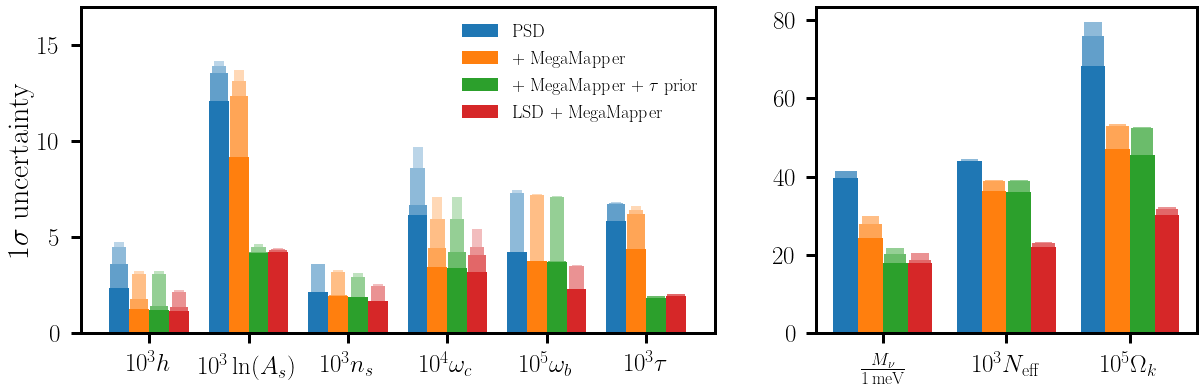

In [93]:
fig, ax = plt.subplots(1,2,figsize=(20,6),gridspec_kw={'width_ratios':[1,0.6]})

domain = np.array([1,2,3,4,5,6])
domain2 = np.array([1,2,3])


def plot_stuff(F,c,offset,width=0.2):
   ax[0].bar(domain+offset,get_LCDM_constraints(F,6),color=c,width=width)
   ax[0].bar(domain+offset,bottom=get_LCDM_constraints(F,6),height=get_LCDM_constraints(F,7)-get_LCDM_constraints(F,6),color=c,width=width/1.1,alpha=0.7)
   ax[0].bar(domain+offset,bottom=get_LCDM_constraints(F,7),height=get_LCDM_constraints(F,8)-get_LCDM_constraints(F,7),color=c,width=width/1.4,alpha=0.5)
   ax[0].bar(domain+offset,bottom=get_LCDM_constraints(F,8),height=get_LCDM_constraints(F,10)-get_LCDM_constraints(F,8),color=c,width=width/2,alpha=0.3)

def plot_stuff2(F,c,offset,width=0.2):
   Mnu =  get_extension_constraints(F,6)*1000
   Neff = get_extension_constraints(F,7)*1000
   Omk = get_extension_constraints(F,9)*100000
   exten = np.array([Mnu,Neff,Omk]).T
    
   ax[1].bar(domain2+offset,exten[0],color=c,width=width)
   ax[1].bar(domain2+offset,bottom=exten[0],height=exten[1]-exten[0],color=c,width=width/1.1,alpha=0.7)
   ax[1].bar(domain2+offset,bottom=exten[1],height=exten[2]-exten[1],color=c,width=width/1.4,alpha=0.5)
    
    
plot_stuff(F,'C0',-0.3)
plot_stuff(F2,'C1',-0.1)
plot_stuff(F3,'C2',0.1)
plot_stuff(F4,'C3',0.3)

plot_stuff2(F,'C0',-0.3)
plot_stuff2(F2,'C1',-0.1)
plot_stuff2(F3,'C2',0.1)
plot_stuff2(F4,'C3',0.3)

ax[0].bar([1],[0],color='C0',width=0.2,label='PSD')
ax[0].bar([1],[0],color='C1',width=0.2,label='+ MegaMapper')
ax[0].bar([1],[0],color='C2',width=0.2,label=r'+ MegaMapper + $\tau$ prior')
ax[0].bar([1],[0],color='C3',width=0.2,label='LSD + MegaMapper')


#ax[0].bar([1],[0],color='k',alpha=0.3,width=0.2/2,label=r'$+M_\nu,\,N_\text{eff},\,\Omega_k$')
#ax[0].bar([1],[0],color='k',alpha=0.5,width=0.2/1.4,label=r'$+M_\nu,\,N_\text{eff}$')
#ax[0].bar([1],[0],color='k',alpha=0.7,width=0.2/1.1,label=r'$+M_\nu$')
#ax[0].bar([1],[0],color='k',alpha=1,width=0.2,label=r'Base $\Lambda$CDM')

#ax[1].bar([1],[0],color='k',alpha=0.5,width=0.2/1.4,label=r'$+$ 3PE')
#ax[1].bar([1],[0],color='k',alpha=0.7,width=0.2/1.1,label=r'$+$ 2PE')
#ax[1].bar([1],[0],color='k',alpha=1,width=0.2,label=r'Base $\Lambda$CDM $+$ 1PE')

ax[1].legend(loc='upper left',frameon=False,fontsize=18,ncol=1)
ax[0].legend(loc='upper right',frameon=False,fontsize=18,ncol=1)

ax[0].set_ylim(0,17)
ax[0].set_xticks(domain)
ax[0].set_xticklabels([r'$10^3 h$',r'$10^3 \ln(A_s)$',r'$10^3 n_s$',r'$10^4 \omega_c$',r'$10^5 \omega_b$',r'$10^3\tau$'])
ax[0].tick_params(pad=10)

ax[1].set_xticks(domain2)
ax[1].set_xticklabels([r'$\frac{M_\nu}{1\,\text{meV}}$',r'$10^3N_\text{eff}$',r'$10^5\Omega_k$'])
ax[1].tick_params(pad=10)

ax[0].set_ylabel(r'$1\sigma$ uncertainty')


plt.savefig('figures/sigma_lcdm_vs_fixed_params.pdf',bbox_inches='tight')
#plt.savefig('figures/sigma_mcdm_without_one_zbin.pdf',bbox_inches='tight')

In [94]:
F = fishcast.combine_fishers([Planck_SO,F_desi],globe)
F2 = fishcast.combine_fishers([Planck_SO,F_desi,F_puma32opt],globe)
F3 = fishcast.combine_fishers([Planck_SO,F_desi,F_puma32opt],globe)
F3 = fishcast.combine_fishers([tau_prior,F3],6)
F4 = fishcast.combine_fishers([LiteBird_S4,F_desi,F_puma32opt],globe) 

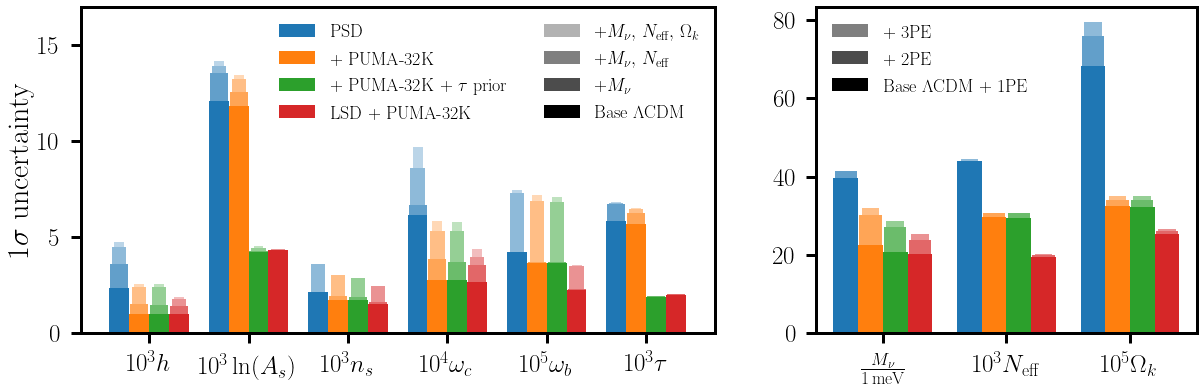

In [95]:
fig, ax = plt.subplots(1,2,figsize=(20,6),gridspec_kw={'width_ratios':[1,0.6]})

domain = np.array([1,2,3,4,5,6])
domain2 = np.array([1,2,3])


def plot_stuff(F,c,offset,width=0.2):
   ax[0].bar(domain+offset,get_LCDM_constraints(F,6),color=c,width=width)
   ax[0].bar(domain+offset,bottom=get_LCDM_constraints(F,6),height=get_LCDM_constraints(F,7)-get_LCDM_constraints(F,6),color=c,width=width/1.1,alpha=0.7)
   ax[0].bar(domain+offset,bottom=get_LCDM_constraints(F,7),height=get_LCDM_constraints(F,8)-get_LCDM_constraints(F,7),color=c,width=width/1.4,alpha=0.5)
   ax[0].bar(domain+offset,bottom=get_LCDM_constraints(F,8),height=get_LCDM_constraints(F,10)-get_LCDM_constraints(F,8),color=c,width=width/2,alpha=0.3)

def plot_stuff2(F,c,offset,width=0.2):
   Mnu =  get_extension_constraints(F,6)*1000
   Neff = get_extension_constraints(F,7)*1000
   Omk = get_extension_constraints(F,9)*100000
   exten = np.array([Mnu,Neff,Omk]).T
    
   ax[1].bar(domain2+offset,exten[0],color=c,width=width)
   ax[1].bar(domain2+offset,bottom=exten[0],height=exten[1]-exten[0],color=c,width=width/1.1,alpha=0.7)
   ax[1].bar(domain2+offset,bottom=exten[1],height=exten[2]-exten[1],color=c,width=width/1.4,alpha=0.5)
    
    
plot_stuff(F,'C0',-0.3)
plot_stuff(F2,'C1',-0.1)
plot_stuff(F3,'C2',0.1)
plot_stuff(F4,'C3',0.3)

plot_stuff2(F,'C0',-0.3)
plot_stuff2(F2,'C1',-0.1)
plot_stuff2(F3,'C2',0.1)
plot_stuff2(F4,'C3',0.3)

ax[0].bar([1],[0],color='C0',width=0.2,label='PSD')
ax[0].bar([1],[0],color='C1',width=0.2,label='+ PUMA-32K')
ax[0].bar([1],[0],color='C2',width=0.2,label=r'+ PUMA-32K + $\tau$ prior')
ax[0].bar([1],[0],color='C3',width=0.2,label='LSD + PUMA-32K')


ax[0].bar([1],[0],color='k',alpha=0.3,width=0.2/2,label=r'$+M_\nu,\,N_\text{eff},\,\Omega_k$')
ax[0].bar([1],[0],color='k',alpha=0.5,width=0.2/1.4,label=r'$+M_\nu,\,N_\text{eff}$')
ax[0].bar([1],[0],color='k',alpha=0.7,width=0.2/1.1,label=r'$+M_\nu$')
ax[0].bar([1],[0],color='k',alpha=1,width=0.2,label=r'Base $\Lambda$CDM')

ax[1].bar([1],[0],color='k',alpha=0.5,width=0.2/1.4,label=r'$+$ 3PE')
ax[1].bar([1],[0],color='k',alpha=0.7,width=0.2/1.1,label=r'$+$ 2PE')
ax[1].bar([1],[0],color='k',alpha=1,width=0.2,label=r'Base $\Lambda$CDM $+$ 1PE')

ax[1].legend(loc='upper left',frameon=False,fontsize=18,ncol=1)
ax[0].legend(loc='upper right',frameon=False,fontsize=18,ncol=2)

ax[0].set_ylim(0,17)
ax[0].set_xticks(domain)
ax[0].set_xticklabels([r'$10^3 h$',r'$10^3 \ln(A_s)$',r'$10^3 n_s$',r'$10^4 \omega_c$',r'$10^5 \omega_b$',r'$10^3\tau$'])
ax[0].tick_params(pad=10)

ax[1].set_xticks(domain2)
ax[1].set_xticklabels([r'$\frac{M_\nu}{1\,\text{meV}}$',r'$10^3N_\text{eff}$',r'$10^5\Omega_k$'])
ax[1].tick_params(pad=10)

ax[0].set_ylabel(r'$1\sigma$ uncertainty')


plt.savefig('figures/sigma_lcdm_vs_fixed_params2.pdf',bbox_inches='tight')
#plt.savefig('figures/sigma_mcdm_without_one_zbin.pdf',bbox_inches='tight')

In [98]:
basis_multi = np.array(['h','log(A_s)','n_s','omega_cdm','omega_b','tau_reio',\
                  'm_ncdm','N_ur','alpha_s','Omega_k','f_NL','fEDE','A_lin','N','alpha0',\
                  'b','b2','bs','N2','N4','alpha2','alpha4'])
basis_multi_hi = np.array(['h','log(A_s)','n_s','omega_cdm','omega_b','tau_reio',\
                  'm_ncdm','N_ur','alpha_s','Omega_k','f_NL','fEDE','A_lin','N','alpha0',\
                  'b','b2','bs','N2','N4','alpha2','alpha4','Tb'])

In [99]:
derivatives_desi_multi = desiCast.load_derivatives(basis_multi,log10z_c=log10z_cs[8],omega_lin = omega_lins[9])
derivatives_mega_multi = megaCast.load_derivatives(basis_multi,log10z_c=log10z_cs[8],omega_lin = omega_lins[9])

In [100]:
F_desi_multi = desiCast.gen_fisher(basis_multi,13,kmax_knl=1,derivatives=derivatives_desi_multi)
F_mega_multi = megaCast.gen_fisher(basis_multi,13,kmax_knl=1,derivatives=derivatives_mega_multi)

In [101]:
derivatives_puma_multi = puma32optCast.load_derivatives(basis_multi_hi,log10z_c=log10z_cs[8],omega_lin = omega_lins[9])

In [102]:
F_puma_multi = puma32optCast.gen_fisher(basis_multi_hi,13,kmax_knl=1,derivatives=derivatives_puma_multi)

In [103]:
def opc(F,base,ext):
   loc = list(np.arange(13,len(F)))
   x = base + ext + loc
   C = np.linalg.inv(F[x][:,x])
   sigmas = np.sqrt(np.diag(C))
   return sigmas[:len(base)]

In [104]:
F_desi_mega = fishcast.combine_fishers([F_desi_multi,F_mega_multi],13)

F_psdMega = fishcast.combine_fishers([Planck_SO,F_desi_mega],11)
F_psd = fishcast.combine_fishers([Planck_SO,F_desi_multi],11)

F_desi_puma = fishcast.combine_fishers([F_desi_multi,F_puma_multi],13)
F_psdPUMA = fishcast.combine_fishers([Planck_SO,F_desi_puma],11)

LCDM = [0,1,2,3,4,5]
Mnu = [6] ; Neff = [7]
Omk = [9] ; fNL = [10]
fEDE = [11] ; Alin = [12]
loc = list(np.arange(13,len(F_psdMega)))

In [105]:
np.round((opc(F_psdMega,LCDM,Mnu)/opc(F_psdMega,LCDM,[])-1)*100,1)

array([39.7, 29.5,  2.7, 26.6,  0. , 35.3])

In [106]:
np.round((opc(F_psdMega,LCDM,Neff)/opc(F_psdMega,LCDM,[])-1)*100)

array([138.,   0.,  46.,  67.,  73.,   1.])

In [107]:
np.round((opc(F_psdMega,LCDM,Omk)/opc(F_psdMega,LCDM,[])-1)*100,1)

array([23.4,  1.3, 12.4, 32.6,  0. ,  3.4])

In [108]:
np.round((opc(F_psdMega,LCDM,fEDE)/opc(F_psdMega,LCDM,[])-1)*100,1)

array([0.4, 1.6, 4.4, 0.8, 3.4, 2.5])

In [109]:
[np.round((opc(F_psdMega,LCDM+Mnu,list(x))/opc(F_psdMega,LCDM+Mnu,[])-1)*100,1)[-1] for x in np.array([Neff,Omk,fEDE])]

[11.5, 12.5, 16.2]

In [110]:
[np.round((opc(F_psdMega,LCDM+Neff,list(x))/opc(F_psdMega,LCDM+Neff,[])-1)*100,1)[-1] for x in np.array([Mnu,Omk,fEDE])]

[11.5, 0.3, 8.5]

In [111]:
[np.round((opc(F_psdMega,LCDM+Omk,list(x))/opc(F_psdMega,LCDM+Omk,[])-1)*100,1)[-1] for x in np.array([Mnu,Neff,fEDE])]

[12.5, 0.3, 31.8]

In [112]:
[np.round((opc(F_psdMega,LCDM+fEDE,list(x))/opc(F_psdMega,LCDM+fEDE,[])-1)*100,1)[-1] for x in np.array([Mnu,Neff,Omk])]

[16.2, 8.5, 31.8]

In [113]:
np.round((opc(F_psdPUMA,LCDM,Mnu)/opc(F_psdPUMA,LCDM,[])-1)*100,1)

array([49.3,  6.2, 11.5, 40.8,  2.2,  9.5])

In [114]:
np.round((opc(F_psdPUMA,LCDM,Neff)/opc(F_psdPUMA,LCDM,[])-1)*100)

array([134.,   0.,  21.,  92.,  66.,   0.])

In [115]:
np.round((opc(F_psdPUMA,LCDM,Omk)/opc(F_psdPUMA,LCDM,[])-1)*100,1)

array([21.8,  0.2, 12.8, 23.4,  2.1,  0.9])

In [116]:
np.round((opc(F_psdPUMA,LCDM,fEDE)/opc(F_psdPUMA,LCDM,[])-1)*100,1)

array([0.1, 0.2, 5.9, 0.6, 6.2, 0.5])

In [117]:
[np.round((opc(F_psdPUMA,LCDM+Mnu,list(x))/opc(F_psdPUMA,LCDM+Mnu,[])-1)*100,1)[-1] for x in np.array([Neff,Omk,fEDE])]

[34.8, 5.1, 3.1]

In [118]:
[np.round((opc(F_psdPUMA,LCDM+Neff,list(x))/opc(F_psdPUMA,LCDM+Neff,[])-1)*100,1)[-1] for x in np.array([Mnu,Omk,fEDE])]

[34.8, 0.1, 0.6]

In [121]:
[np.round((opc(F_psdPUMA,LCDM+Omk,list(x))/opc(F_psdPUMA,LCDM+Omk,[])-1)*100,1)[-1] for x in np.array([Mnu,Neff,fEDE])]

[5.1, 0.1, 89.4]

In [122]:
[np.round((opc(F_psdPUMA,LCDM+fEDE,list(x))/opc(F_psdPUMA,LCDM+fEDE,[])-1)*100,1)[-1] for x in np.array([Mnu,Neff,Omk])]

[3.1, 0.6, 89.4]

## Sensitivity to $N \sigma_v^2 (k\mu)^2$ cutoff

In [123]:
def set_sigv(c=0.2):
   megaCast.N2cut = c
   for i in range(megaCast.experiment.nbins): 
         z = megaCast.experiment.zcenters[i]
         megaCast.kpar_cut[i] = megaCast.compute_kpar_cut(z,i)

In [124]:
domain = np.logspace(-2,0,50)
x = []

for d in domain:
   set_sigv(d)
   F_tmp = megaCast.gen_fisher(basis,globe,kmax_knl=1.,derivatives=derivatives_mega)
   Ftmp = fishcast.combine_fishers([Planck_SO,F_tmp],globe)
   opc = one_param_constraints(Ftmp)
   F_mega_tmp_ext = megaCast.gen_fisher(basis_ext,8,kmax_knl=1.,derivatives=derivatives_mega_ext)
   Ftmp_ext = fishcast.combine_fishers([Planck_SO[:6,:6],F_mega_tmp_ext],6)
   ext = fEDE_Alin_constraints(Ftmp_ext)
   x.append(np.concatenate((opc,ext)))
    
x = np.array(x).T

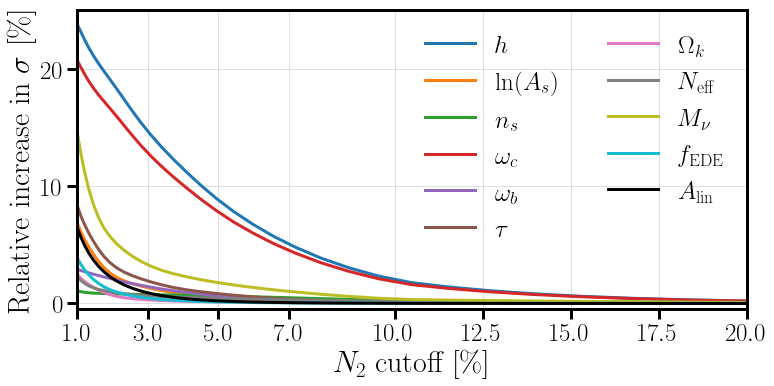

In [125]:
plt.figure(figsize=(12,5.5))

plt.plot(domain*100,x[0]*100/x[0][-1]-100,lw=3,label=r'$h$',c='C0')
plt.plot(domain*100,x[1]*100/x[1][-1]-100,lw=3,label=r'$\ln(A_s)$',c='C1')
plt.plot(domain*100,x[2]*100/x[2][-1]-100,lw=3,label=r'$n_s$',c='C2')
plt.plot(domain*100,x[3]*100/x[3][-1]-100,lw=3,label=r'$\omega_c$',c='C3')
plt.plot(domain*100,x[4]*100/x[4][-1]-100,lw=3,label=r'$\omega_b$',c='C4')
plt.plot(domain*100,x[5]*100/x[5][-1]-100,lw=3,label=r'$\tau$',c='C5')
plt.plot(domain*100,x[6]*100/x[6][-1]-100,lw=3,label=r'$\Omega_k$',c='C6')
plt.plot(domain*100,x[7]*100/x[7][-1]-100,lw=3,label=r'$N_\text{eff}$',c='C7')
plt.plot(domain*100,x[8]*100/x[8][-1]-100,lw=3,label=r'$M_\nu$',c='C8')
plt.plot(domain*100,x[9]*100/x[9][-1]-100,lw=3,label=r'$f_\text{EDE}$',c='C9')
plt.plot(domain*100,x[10]*100/x[10][-1]-100,lw=3,label=r'$A_\text{lin}$',c='k')
    
plt.legend(loc='upper right',ncol=2,frameon=False)
plt.ylabel(r'Relative increase in $\sigma\,\,[\%]$')
plt.xlabel(r'$N_2$ cutoff  $[\%]$')

plt.ylim(-0.5,25)
plt.xlim(1e-2*100,0.2*100)

plt.xticks([1,3,5,7,10,12.5,15,17.5,20])

plt.grid(alpha=0.5)

plt.savefig('figures/sn2_cutoff.pdf',bbox_inches='tight')

set_sigv(0.2)

# $\sigma_8$ constraints

In [126]:
np.array(['h','log(A_s)','n_s','omega_cdm','omega_b','tau_reio',\
                  'm_ncdm','N_ur','alpha_s','Omega_k','f_NL','N','alpha0',\
                  'b','b2','bs','N2','N4','alpha2','alpha4'])

array(['h', 'log(A_s)', 'n_s', 'omega_cdm', 'omega_b', 'tau_reio',
       'm_ncdm', 'N_ur', 'alpha_s', 'Omega_k', 'f_NL', 'N', 'alpha0', 'b',
       'b2', 'bs', 'N2', 'N4', 'alpha2', 'alpha4'], dtype='<U9')

In [5]:
# old basis: 'h','log(A_s)','n_s','omega_cdm','omega_b','tau_reio','N','alpha0','b','b2','bs','N2','N4','alpha2','alpha4'
# new basis: 's8','log(A_s)','n_s','omega_cdm','omega_b','tau_reio','N','alpha0','b','b2','bs','N2','N4','alpha2','alpha4'

oldbasis = np.array(['h','log(A_s)','n_s','omega_cdm','omega_b','tau_reio'])

def s8(z):
   s8 = cosmo.sigma(8/params['h'],z)
   return s8 

def ds8dp(param,z):
   flag = False
   if param == 'h' or param == 'n_s' or param == 'omega_cdm' or param == 'omega_b' or param == 'tau_reio' or param =='log(A_s)':
      if param == 'log(A_s)':
         flag = True
         param = 'A_s'
      fid_val = params[param]
      fid_fs8 = s8(z)
      cosmo.set({param: fid_val*1.01})
      cosmo.compute()
      new_fs8 = s8(z)
      cosmo.set({param: fid_val})
      cosmo.compute()
      if flag: return params[param]*(new_fs8-fid_fs8)/fid_val/0.01
      return (new_fs8-fid_fs8)/fid_val/0.01
   else: return 0

def rotation_matrix(z,n):
   result = np.zeros((n,n))
   for i in range(n):
      for j in range(n):
         if i != 0 and i == j: result[i,j] = 1
         if i == 0 and j<len(oldbasis): result[i,j] = ds8dp(oldbasis[j],z)
   return result

In [6]:
def get_relative_fs8_constraint2(Fs,Rs,HI=False,N2N4Fixed=False,with_lensing=False):
   con = np.zeros(len(Rs))
   for i in range(len(Rs)):
      F = Fs[i] ; Rinv = np.linalg.inv(Rs[i])
      Fprime = np.dot(np.dot(Rinv.T,F),Rinv)
      x = [0,1,3,4,5,6,7,8,9,10,13,14] # also has ns fixed (2)
      if HI: x = x+[15]
      if N2N4Fixed: Cprime = np.linalg.inv(Fprime[x][:,x])
      else: Cprime = np.linalg.inv(Fprime)
      con[i] = np.sqrt(Cprime[0,0])
   return con

In [36]:
#Rs_desi = np.array([rotation_matrix(z,n=15) for z in desiCast.experiment.zcenters])
#Rs_mega = np.array([rotation_matrix(z,n=15) for z in megaCast.experiment.zcenters])
#Rs_euc = np.array([rotation_matrix(z,n=15) for z in eucCast.experiment.zcenters])
#Rs_mse = np.array([rotation_matrix(z,n=15) for z in mseCast.experiment.zcenters])
#Rs_puma = np.array([rotation_matrix(z,n=16) for z in puma5pessCast.experiment.zcenters])
#Rs_hirax = np.array([rotation_matrix(z,n=16) for z in hiraxPessCast.experiment.zcenters])

#np.savetxt('input/rotation_matrices/Rs_desi.txt',Rs_desi.flatten())
#np.savetxt('input/rotation_matrices/Rs_mega.txt',Rs_mega.flatten())
#np.savetxt('input/rotation_matrices/Rs_euc.txt',Rs_euc.flatten())
#np.savetxt('input/rotation_matrices/Rs_mse.txt',Rs_mse.flatten())
#np.savetxt('input/rotation_matrices/Rs_puma.txt',Rs_puma.flatten())
#np.savetxt('input/rotation_matrices/Rs_hirax.txt',Rs_hirax.flatten())

In [7]:
Rs_desi = np.genfromtxt('input/rotation_matrices/Rs_desi.txt').reshape(4,15,15)
Rs_mega = np.genfromtxt('input/rotation_matrices/Rs_mega.txt').reshape(4,15,15)
Rs_euc = np.genfromtxt('input/rotation_matrices/Rs_euc.txt').reshape(4,15,15)
Rs_mse = np.genfromtxt('input/rotation_matrices/Rs_mse.txt').reshape(4,15,15)
Rs_puma = np.genfromtxt('input/rotation_matrices/Rs_puma.txt').reshape(4,16,16)
Rs_hirax = np.genfromtxt('input/rotation_matrices/Rs_hirax.txt').reshape(4,16,16)

In [43]:
BBN_prior = np.array([0,0,0,0,(5e-4)**(-2),(1e-7)**(-2)])
BBN_prior = np.diag(BBN_prior)

In [44]:
globe=100

x = list(range(6)) + list(range(11,20))

F_desi1 = desiCast.gen_fisher(basis,globe,kmax_knl=1.,derivatives=derivatives_desi, zbins = np.array([0]))[x][:,x]
F_desi2 = desiCast.gen_fisher(basis,globe,kmax_knl=1.,derivatives=derivatives_desi, zbins = np.array([1]))[x][:,x]
F_desi3 = desiCast.gen_fisher(basis,globe,kmax_knl=1.,derivatives=derivatives_desi, zbins = np.array([2]))[x][:,x]
F_desi4 = desiCast.gen_fisher(basis,globe,kmax_knl=1.,derivatives=derivatives_desi, zbins = np.array([3]))[x][:,x]

F_desi_array = np.array([fishcast.combine_fishers([F_desi1,BBN_prior],6),
                         fishcast.combine_fishers([F_desi2,BBN_prior],6),
                         fishcast.combine_fishers([F_desi3,BBN_prior],6),
                         fishcast.combine_fishers([F_desi4,BBN_prior],6)])

F_mega1 = megaCast.gen_fisher(basis,globe,kmax_knl=1.,derivatives=derivatives_mega, zbins = np.array([0]))[x][:,x]
F_mega2 = megaCast.gen_fisher(basis,globe,kmax_knl=1.,derivatives=derivatives_mega, zbins = np.array([1]))[x][:,x]
F_mega3 = megaCast.gen_fisher(basis,globe,kmax_knl=1.,derivatives=derivatives_mega, zbins = np.array([2]))[x][:,x]
F_mega4 = megaCast.gen_fisher(basis,globe,kmax_knl=1.,derivatives=derivatives_mega, zbins = np.array([3]))[x][:,x]

F_mega_array = np.array([fishcast.combine_fishers([F_mega1,BBN_prior],6),
                         fishcast.combine_fishers([F_mega2,BBN_prior],6),
                         fishcast.combine_fishers([F_mega3,BBN_prior],6),
                         fishcast.combine_fishers([F_mega4,BBN_prior],6)])

F_euc1 = eucCast.gen_fisher(basis,globe,kmax_knl=1.,derivatives=derivatives_euc, zbins = np.array([0]))[x][:,x]
F_euc2 = eucCast.gen_fisher(basis,globe,kmax_knl=1.,derivatives=derivatives_euc, zbins = np.array([1]))[x][:,x]
F_euc3 = eucCast.gen_fisher(basis,globe,kmax_knl=1.,derivatives=derivatives_euc, zbins = np.array([2]))[x][:,x]
F_euc4 = eucCast.gen_fisher(basis,globe,kmax_knl=1.,derivatives=derivatives_euc, zbins = np.array([3]))[x][:,x]

F_euc_array = np.array([fishcast.combine_fishers([F_euc1,BBN_prior],6),
                        fishcast.combine_fishers([F_euc2,BBN_prior],6),
                        fishcast.combine_fishers([F_euc3,BBN_prior],6),
                        fishcast.combine_fishers([F_euc4,BBN_prior],6)])

F_mse1 = mseCast.gen_fisher(basis,globe,kmax_knl=1.,derivatives=derivatives_mse, zbins = np.array([0]))[x][:,x]
F_mse2 = mseCast.gen_fisher(basis,globe,kmax_knl=1.,derivatives=derivatives_mse, zbins = np.array([1]))[x][:,x]
F_mse3 = mseCast.gen_fisher(basis,globe,kmax_knl=1.,derivatives=derivatives_mse, zbins = np.array([2]))[x][:,x]
F_mse4 = mseCast.gen_fisher(basis,globe,kmax_knl=1.,derivatives=derivatives_mse, zbins = np.array([3]))[x][:,x]

F_mse_array = np.array([fishcast.combine_fishers([F_mse1,BBN_prior],6),
                        fishcast.combine_fishers([F_mse2,BBN_prior],6),
                        fishcast.combine_fishers([F_mse3,BBN_prior],6),
                        fishcast.combine_fishers([F_mse4,BBN_prior],6)])

x = list(range(6)) + list(range(11,21))

F_puma5pess1 = puma5pessCast.gen_fisher(basis_hi,globe,kmax_knl=1.,derivatives=derivatives_puma5, zbins = np.array([0]))[x][:,x]
F_puma5pess2 = puma5pessCast.gen_fisher(basis_hi,globe,kmax_knl=1.,derivatives=derivatives_puma5, zbins = np.array([1]))[x][:,x]
F_puma5pess3 = puma5pessCast.gen_fisher(basis_hi,globe,kmax_knl=1.,derivatives=derivatives_puma5, zbins = np.array([2]))[x][:,x]
F_puma5pess4 = puma5pessCast.gen_fisher(basis_hi,globe,kmax_knl=1.,derivatives=derivatives_puma5, zbins = np.array([3]))[x][:,x]

F_puma5pess_array = np.array([fishcast.combine_fishers([F_puma5pess1,BBN_prior],6),
                              fishcast.combine_fishers([F_puma5pess2,BBN_prior],6),
                              fishcast.combine_fishers([F_puma5pess3,BBN_prior],6),
                              fishcast.combine_fishers([F_puma5pess4,BBN_prior],6)])

F_puma5opt1 = puma5optCast.gen_fisher(basis_hi,globe,kmax_knl=1.,derivatives=derivatives_puma5, zbins = np.array([0]))[x][:,x]
F_puma5opt2 = puma5optCast.gen_fisher(basis_hi,globe,kmax_knl=1.,derivatives=derivatives_puma5, zbins = np.array([1]))[x][:,x]
F_puma5opt3 = puma5optCast.gen_fisher(basis_hi,globe,kmax_knl=1.,derivatives=derivatives_puma5, zbins = np.array([2]))[x][:,x]
F_puma5opt4 = puma5optCast.gen_fisher(basis_hi,globe,kmax_knl=1.,derivatives=derivatives_puma5, zbins = np.array([3]))[x][:,x]

F_puma5opt_array = np.array([fishcast.combine_fishers([F_puma5opt1,BBN_prior],6),
                             fishcast.combine_fishers([F_puma5opt2,BBN_prior],6),
                             fishcast.combine_fishers([F_puma5opt3,BBN_prior],6),
                             fishcast.combine_fishers([F_puma5opt4,BBN_prior],6)])

F_puma32pess1 = puma32pessCast.gen_fisher(basis_hi,globe,kmax_knl=1.,derivatives=derivatives_puma32, zbins = np.array([0]))[x][:,x]
F_puma32pess2 = puma32pessCast.gen_fisher(basis_hi,globe,kmax_knl=1.,derivatives=derivatives_puma32, zbins = np.array([1]))[x][:,x]
F_puma32pess3 = puma32pessCast.gen_fisher(basis_hi,globe,kmax_knl=1.,derivatives=derivatives_puma32, zbins = np.array([2]))[x][:,x]
F_puma32pess4 = puma32pessCast.gen_fisher(basis_hi,globe,kmax_knl=1.,derivatives=derivatives_puma32, zbins = np.array([3]))[x][:,x]

F_puma32pess_array = np.array([fishcast.combine_fishers([F_puma32pess1,BBN_prior],6),
                               fishcast.combine_fishers([F_puma32pess2,BBN_prior],6),
                               fishcast.combine_fishers([F_puma32pess3,BBN_prior],6),
                               fishcast.combine_fishers([F_puma32pess4,BBN_prior],6)])

F_puma32opt1 = puma32optCast.gen_fisher(basis_hi,globe,kmax_knl=1.,derivatives=derivatives_puma32, zbins = np.array([0]))[x][:,x]
F_puma32opt2 = puma32optCast.gen_fisher(basis_hi,globe,kmax_knl=1.,derivatives=derivatives_puma32, zbins = np.array([1]))[x][:,x]
F_puma32opt3 = puma32optCast.gen_fisher(basis_hi,globe,kmax_knl=1.,derivatives=derivatives_puma32, zbins = np.array([2]))[x][:,x]
F_puma32opt4 = puma32optCast.gen_fisher(basis_hi,globe,kmax_knl=1.,derivatives=derivatives_puma32, zbins = np.array([3]))[x][:,x]

F_puma32opt_array = np.array([fishcast.combine_fishers([F_puma32opt1,BBN_prior],6),
                              fishcast.combine_fishers([F_puma32opt2,BBN_prior],6),
                              fishcast.combine_fishers([F_puma32opt3,BBN_prior],6),
                              fishcast.combine_fishers([F_puma32opt4,BBN_prior],6)])

F_hiraxPess1 = hiraxPessCast.gen_fisher(basis_hi,globe,kmax_knl=1.,derivatives=derivatives_hirax, zbins = np.array([0]))[x][:,x]
F_hiraxPess2 = hiraxPessCast.gen_fisher(basis_hi,globe,kmax_knl=1.,derivatives=derivatives_hirax, zbins = np.array([1]))[x][:,x]
F_hiraxPess3 = hiraxPessCast.gen_fisher(basis_hi,globe,kmax_knl=1.,derivatives=derivatives_hirax, zbins = np.array([2]))[x][:,x]
F_hiraxPess4 = hiraxPessCast.gen_fisher(basis_hi,globe,kmax_knl=1.,derivatives=derivatives_hirax, zbins = np.array([3]))[x][:,x]

F_hiraxPess_array = np.array([fishcast.combine_fishers([F_hiraxPess1,BBN_prior],6),
                              fishcast.combine_fishers([F_hiraxPess2,BBN_prior],6),
                              fishcast.combine_fishers([F_hiraxPess3,BBN_prior],6),
                              fishcast.combine_fishers([F_hiraxPess4,BBN_prior],6)])

F_hiraxOpt1 = hiraxOptCast.gen_fisher(basis_hi,globe,kmax_knl=1.,derivatives=derivatives_hirax, zbins = np.array([0]))[x][:,x]
F_hiraxOpt2 = hiraxOptCast.gen_fisher(basis_hi,globe,kmax_knl=1.,derivatives=derivatives_hirax, zbins = np.array([1]))[x][:,x]
F_hiraxOpt3 = hiraxOptCast.gen_fisher(basis_hi,globe,kmax_knl=1.,derivatives=derivatives_hirax, zbins = np.array([2]))[x][:,x]
F_hiraxOpt4 = hiraxOptCast.gen_fisher(basis_hi,globe,kmax_knl=1.,derivatives=derivatives_hirax, zbins = np.array([3]))[x][:,x]

F_hiraxOpt_array = np.array([fishcast.combine_fishers([F_hiraxOpt1,BBN_prior],6),
                             fishcast.combine_fishers([F_hiraxOpt2,BBN_prior],6),
                             fishcast.combine_fishers([F_hiraxOpt3,BBN_prior],6),
                             fishcast.combine_fishers([F_hiraxOpt4,BBN_prior],6)])

In [64]:
# new basis: 's8','log(A_s)','n_s','omega_cdm','omega_b','tau_reio','N','alpha0','b','b2','bs','N2','N4','alpha2','alpha4'

zs = megaCast.experiment.zcenters
signal = np.array([s8(z) for z in zs])

i = 1
F = F_mega_array[i] 
Rinv = np.linalg.inv(Rs_mega[i])
x = [0,1,3,6,7,8,9,10,11,13]
Fprime = np.dot(np.dot(Rinv.T,F),Rinv)

np.sqrt(np.linalg.inv(Fprime[x][:,x])[0,0])/signal[1]

0.02260780939879284

## Including lensing

In [45]:
def get_lensing_fisher(cast):
   basis_lensing = np.array(['h','log(A_s)','n_s','omega_cdm','omega_b','tau_reio',\
                         'N','alpha0','b','b2','bs','alphax'])
   globe_lensing = 6
   xs = [list(range(6))+[int(6+i),int(10+i),int(14+i),int(18+i),int(22+i),int(26+i)] for i in range(4)]
   Lensing = [desiCast.gen_lensing_fisher(basis_lensing,globe_lensing,ell_min=30,ell_max=500,bins=np.array([i]),kk=False,CMB='S4') for i in range(4)]
   Short = [Lensing[i][xs[i]][:,xs[i]] for i in range(4)]
   return np.array(Short)

In [46]:
F_desi_lens_array = get_lensing_fisher(desiCast)
F_mega_lens_array = get_lensing_fisher(megaCast)
F_euc_lens_array = get_lensing_fisher(eucCast)
F_mse_lens_array = get_lensing_fisher(mseCast)
F_hiraxOpt_lens_array = get_lensing_fisher(hiraxOptCast)
F_hiraxPess_lens_array = get_lensing_fisher(hiraxPessCast)
F_puma5opt_lens_array = get_lensing_fisher(puma5optCast)
F_puma5pess_lens_array = get_lensing_fisher(puma5pessCast)
F_puma32opt_lens_array = get_lensing_fisher(puma32optCast)
F_puma32pess_lens_array = get_lensing_fisher(puma32pessCast)

In [47]:
F_desi_rsdLens_array_tmp = np.array([fishcast.combine_fishers([F_desi_array[i],F_desi_lens_array[i]],11) for i in range(4)])
F_mega_rsdLens_array_tmp = np.array([fishcast.combine_fishers([F_mega_array[i],F_mega_lens_array[i]],11) for i in range(4)])
F_euc_rsdLens_array_tmp = np.array([fishcast.combine_fishers([F_euc_array[i],F_euc_lens_array[i]],11) for i in range(4)])
F_mse_rsdLens_array_tmp = np.array([fishcast.combine_fishers([F_mse_array[i],F_mse_lens_array[i]],11) for i in range(4)])
F_hiraxOpt_rsdLens_array_tmp = np.array([fishcast.combine_fishers([F_hiraxOpt_array[i],F_hiraxOpt_lens_array[i]],11) for i in range(4)])
F_hiraxPess_rsdLens_array_tmp = np.array([fishcast.combine_fishers([F_hiraxPess_array[i],F_hiraxPess_lens_array[i]],11) for i in range(4)])
F_puma5opt_rsdLens_array_tmp = np.array([fishcast.combine_fishers([F_puma5opt_array[i],F_puma5opt_lens_array[i]],11) for i in range(4)])
F_puma5pess_rsdLens_array_tmp = np.array([fishcast.combine_fishers([F_puma5pess_array[i],F_puma5pess_lens_array[i]],11) for i in range(4)])
F_puma32opt_rsdLens_array_tmp = np.array([fishcast.combine_fishers([F_puma32opt_array[i],F_puma32opt_lens_array[i]],11) for i in range(4)])
F_puma32pess_rsdLens_array_tmp = np.array([fishcast.combine_fishers([F_puma32pess_array[i],F_puma32pess_lens_array[i]],11) for i in range(4)])

In [48]:
# marginalize over alpha_x
F_desi_rsdLens_array = np.zeros((4,15,15))
for i in range(4): F_desi_rsdLens_array[i] =  np.linalg.inv(np.linalg.inv(F_desi_rsdLens_array_tmp[i])[:15,:15])
F_mega_rsdLens_array = np.zeros((4,15,15))
for i in range(4): F_mega_rsdLens_array[i] =  np.linalg.inv(np.linalg.inv(F_mega_rsdLens_array_tmp[i])[:15,:15])
F_euc_rsdLens_array = np.zeros((4,15,15))
for i in range(4): F_euc_rsdLens_array[i] =  np.linalg.inv(np.linalg.inv(F_euc_rsdLens_array_tmp[i])[:15,:15])
F_mse_rsdLens_array = np.zeros((4,15,15))
for i in range(4): F_mse_rsdLens_array[i] =  np.linalg.inv(np.linalg.inv(F_mse_rsdLens_array_tmp[i])[:15,:15])
F_hiraxOpt_rsdLens_array = np.zeros((4,16,16))
for i in range(4): F_hiraxOpt_rsdLens_array[i] =  np.linalg.inv(np.linalg.inv(F_hiraxOpt_rsdLens_array_tmp[i])[:16,:16])
F_hiraxPess_rsdLens_array = np.zeros((4,16,16))
for i in range(4): F_hiraxPess_rsdLens_array[i] =  np.linalg.inv(np.linalg.inv(F_hiraxPess_rsdLens_array_tmp[i])[:16,:16])
F_puma5opt_rsdLens_array = np.zeros((4,16,16))
for i in range(4): F_puma5opt_rsdLens_array[i] =  np.linalg.inv(np.linalg.inv(F_puma5opt_rsdLens_array_tmp[i])[:16,:16])
F_puma5pess_rsdLens_array = np.zeros((4,16,16))
for i in range(4): F_puma5pess_rsdLens_array[i] =  np.linalg.inv(np.linalg.inv(F_puma5pess_rsdLens_array_tmp[i])[:16,:16])
F_puma32opt_rsdLens_array = np.zeros((4,16,16))
for i in range(4): F_puma32opt_rsdLens_array[i] =  np.linalg.inv(np.linalg.inv(F_puma32opt_rsdLens_array_tmp[i])[:16,:16])
F_puma32pess_rsdLens_array = np.zeros((4,16,16))
for i in range(4): F_puma32pess_rsdLens_array[i] =  np.linalg.inv(np.linalg.inv(F_puma32pess_rsdLens_array_tmp[i])[:16,:16])

### When the shape is fixed

In [49]:
basis2 = np.array(['log(A_s)','N','alpha0','b','b2','bs','alpha2','alpha4','N2','N4'])
basis_hi2 = np.array(list(basis2)+['Tb'])

#basis2 = np.array(['log(A_s)','b','b2','N'])
#basis_hi2 = np.array(list(basis2)+['Tb'])

In [50]:
derivatives_fish2 = fishcast.load_derivatives(basis2)
print('Loaded toy model derivatives')
derivatives_desi2 = desiCast.load_derivatives(basis2)
print('Loaded DESI derivatives')
derivatives_euc2 = eucCast.load_derivatives(basis2)
print('Loaded Euclid derivatives')
derivatives_mega2 = megaCast.load_derivatives(basis2)
print('Loaded MegaMapper derivatives')
derivatives_mse2 = mseCast.load_derivatives(basis2)
print('Loaded MSE derivatives')
derivatives_puma2 = puma5optCast.load_derivatives(basis_hi2)
print('Loaded PUMA derivatives')
derivatives_hirax2 = hiraxOptCast.load_derivatives(basis_hi2)
print('Loaded HIRAX derivatives')

Loaded toy model derivatives
Loaded DESI derivatives
Loaded Euclid derivatives
Loaded MegaMapper derivatives
Loaded MSE derivatives
Loaded PUMA derivatives
Loaded HIRAX derivatives


In [51]:
globe=11

In [52]:
F_desi1a = desiCast.gen_fisher(basis2,globe,kmax_knl=1.,derivatives=derivatives_desi2, zbins = np.array([0]))
F_desi2a = desiCast.gen_fisher(basis2,globe,kmax_knl=1.,derivatives=derivatives_desi2, zbins = np.array([1]))
F_desi3a = desiCast.gen_fisher(basis2,globe,kmax_knl=1.,derivatives=derivatives_desi2, zbins = np.array([2]))
F_desi4a = desiCast.gen_fisher(basis2,globe,kmax_knl=1.,derivatives=derivatives_desi2, zbins = np.array([3]))
F_desi_arraya = np.array([F_desi1a,F_desi2a,F_desi3a,F_desi4a])

F_mega1a = megaCast.gen_fisher(basis2,globe,kmax_knl=1.,derivatives=derivatives_mega2, zbins = np.array([0]))
F_mega2a = megaCast.gen_fisher(basis2,globe,kmax_knl=1.,derivatives=derivatives_mega2, zbins = np.array([1]))
F_mega3a = megaCast.gen_fisher(basis2,globe,kmax_knl=1.,derivatives=derivatives_mega2, zbins = np.array([2]))
F_mega4a = megaCast.gen_fisher(basis2,globe,kmax_knl=1.,derivatives=derivatives_mega2, zbins = np.array([3]))
F_mega_arraya = np.array([F_mega1a,F_mega2a,F_mega3a,F_mega4a])

F_euc1a = eucCast.gen_fisher(basis2,globe,kmax_knl=1.,derivatives=derivatives_euc2, zbins = np.array([0]))
F_euc2a = eucCast.gen_fisher(basis2,globe,kmax_knl=1.,derivatives=derivatives_euc2, zbins = np.array([1]))
F_euc3a = eucCast.gen_fisher(basis2,globe,kmax_knl=1.,derivatives=derivatives_euc2, zbins = np.array([2]))
F_euc4a = eucCast.gen_fisher(basis2,globe,kmax_knl=1.,derivatives=derivatives_euc2, zbins = np.array([3]))
F_euc_arraya = np.array([F_euc1a,F_euc2a,F_euc3a,F_euc4a])

F_mse1a = mseCast.gen_fisher(basis2,globe,kmax_knl=1.,derivatives=derivatives_mse2, zbins = np.array([0]))
F_mse2a = mseCast.gen_fisher(basis2,globe,kmax_knl=1.,derivatives=derivatives_mse2, zbins = np.array([1]))
F_mse3a = mseCast.gen_fisher(basis2,globe,kmax_knl=1.,derivatives=derivatives_mse2, zbins = np.array([2]))
F_mse4a = mseCast.gen_fisher(basis2,globe,kmax_knl=1.,derivatives=derivatives_mse2, zbins = np.array([3]))
F_mse_arraya = np.array([F_mse1a,F_mse2a,F_mse3a,F_mse4a])

F_puma5pess1a = puma5pessCast.gen_fisher(basis_hi2,globe,kmax_knl=1.,derivatives=derivatives_puma2, zbins = np.array([0]))
F_puma5pess2a = puma5pessCast.gen_fisher(basis_hi2,globe,kmax_knl=1.,derivatives=derivatives_puma2, zbins = np.array([1]))
F_puma5pess3a = puma5pessCast.gen_fisher(basis_hi2,globe,kmax_knl=1.,derivatives=derivatives_puma2, zbins = np.array([2]))
F_puma5pess4a = puma5pessCast.gen_fisher(basis_hi2,globe,kmax_knl=1.,derivatives=derivatives_puma2, zbins = np.array([3]))
F_puma5pess_arraya = np.array([F_puma5pess1a,F_puma5pess2a,F_puma5pess3a,F_puma5pess4a])

F_puma5opt1a = puma5optCast.gen_fisher(basis_hi2,globe,kmax_knl=1.,derivatives=derivatives_puma2, zbins = np.array([0]))
F_puma5opt2a = puma5optCast.gen_fisher(basis_hi2,globe,kmax_knl=1.,derivatives=derivatives_puma2, zbins = np.array([1]))
F_puma5opt3a = puma5optCast.gen_fisher(basis_hi2,globe,kmax_knl=1.,derivatives=derivatives_puma2, zbins = np.array([2]))
F_puma5opt4a = puma5optCast.gen_fisher(basis_hi2,globe,kmax_knl=1.,derivatives=derivatives_puma2, zbins = np.array([3]))
F_puma5opt_arraya = np.array([F_puma5opt1a,F_puma5opt2a,F_puma5opt3a,F_puma5opt4a])

F_puma32pess1a = puma32pessCast.gen_fisher(basis_hi2,globe,kmax_knl=1.,derivatives=derivatives_puma2, zbins = np.array([0]))
F_puma32pess2a = puma32pessCast.gen_fisher(basis_hi2,globe,kmax_knl=1.,derivatives=derivatives_puma2, zbins = np.array([1]))
F_puma32pess3a = puma32pessCast.gen_fisher(basis_hi2,globe,kmax_knl=1.,derivatives=derivatives_puma2, zbins = np.array([2]))
F_puma32pess4a = puma32pessCast.gen_fisher(basis_hi2,globe,kmax_knl=1.,derivatives=derivatives_puma2, zbins = np.array([3]))
F_puma32pess_arraya = np.array([F_puma32pess1a,F_puma32pess2a,F_puma32pess3a,F_puma32pess4a])

F_puma32opt1a = puma32optCast.gen_fisher(basis_hi2,globe,kmax_knl=1.,derivatives=derivatives_puma2, zbins = np.array([0]))
F_puma32opt2a = puma32optCast.gen_fisher(basis_hi2,globe,kmax_knl=1.,derivatives=derivatives_puma2, zbins = np.array([1]))
F_puma32opt3a = puma32optCast.gen_fisher(basis_hi2,globe,kmax_knl=1.,derivatives=derivatives_puma2, zbins = np.array([2]))
F_puma32opt4a = puma32optCast.gen_fisher(basis_hi2,globe,kmax_knl=1.,derivatives=derivatives_puma2, zbins = np.array([3]))
F_puma32opt_arraya = np.array([F_puma32opt1a,F_puma32opt2a,F_puma32opt3a,F_puma32opt4a])

F_hiraxPess1a = hiraxPessCast.gen_fisher(basis_hi2,globe,kmax_knl=1.,derivatives=derivatives_hirax2, zbins = np.array([0]))
F_hiraxPess2a = hiraxPessCast.gen_fisher(basis_hi2,globe,kmax_knl=1.,derivatives=derivatives_hirax2, zbins = np.array([1]))
F_hiraxPess3a = hiraxPessCast.gen_fisher(basis_hi2,globe,kmax_knl=1.,derivatives=derivatives_hirax2, zbins = np.array([2]))
F_hiraxPess4a = hiraxPessCast.gen_fisher(basis_hi2,globe,kmax_knl=1.,derivatives=derivatives_hirax2, zbins = np.array([3]))
F_hiraxPess_arraya = np.array([F_hiraxPess1a,F_hiraxPess2a,F_hiraxPess3a,F_hiraxPess4a])

F_hiraxOpt1a = hiraxOptCast.gen_fisher(basis_hi2,globe,kmax_knl=1.,derivatives=derivatives_hirax2, zbins = np.array([0]))
F_hiraxOpt2a = hiraxOptCast.gen_fisher(basis_hi2,globe,kmax_knl=1.,derivatives=derivatives_hirax2, zbins = np.array([1]))
F_hiraxOpt3a = hiraxOptCast.gen_fisher(basis_hi2,globe,kmax_knl=1.,derivatives=derivatives_hirax2, zbins = np.array([2]))
F_hiraxOpt4a = hiraxOptCast.gen_fisher(basis_hi2,globe,kmax_knl=1.,derivatives=derivatives_hirax2, zbins = np.array([3]))
F_hiraxOpt_arraya = np.array([F_hiraxOpt1a,F_hiraxOpt2a,F_hiraxOpt3a,F_hiraxOpt4a])

In [53]:
desi_fixedShapeError = np.array([np.sqrt(np.linalg.inv(F)[0,0]) for F in F_desi_arraya])/2
mega_fixedShapeError = np.array([np.sqrt(np.linalg.inv(F)[0,0]) for F in F_mega_arraya])/2
euc_fixedShapeError = np.array([np.sqrt(np.linalg.inv(F)[0,0]) for F in F_euc_arraya])/2
mse_fixedShapeError = np.array([np.sqrt(np.linalg.inv(F)[0,0]) for F in F_mse_arraya])/2
puma5pess_fixedShapeError = np.array([np.sqrt(np.linalg.inv(F)[0,0]) for F in F_puma5pess_arraya])/2
puma5opt_fixedShapeError = np.array([np.sqrt(np.linalg.inv(F)[0,0]) for F in F_puma5opt_arraya])/2
puma32pess_fixedShapeError = np.array([np.sqrt(np.linalg.inv(F)[0,0]) for F in F_puma32pess_arraya])/2
puma32opt_fixedShapeError = np.array([np.sqrt(np.linalg.inv(F)[0,0]) for F in F_puma32opt_arraya])/2
hiraxPess_fixedShapeError = np.array([np.sqrt(np.linalg.inv(F)[0,0]) for F in F_hiraxPess_arraya])/2
hiraxOpt_fixedShapeError = np.array([np.sqrt(np.linalg.inv(F)[0,0]) for F in F_hiraxOpt_arraya])/2

In [54]:
def fixed_shape_wLensing(Frsd,Flens):
   # 'log(A_s)','N','alpha0','b','b2','bs','alpha2','alpha4','N2','N4'
   #'h','log(A_s)','n_s','omega_cdm','omega_b','tau_reio','N','alpha0','b','b2','bs','alphax'
   x = [1,6,7,8,9,10,11]
   F = fishcast.combine_fishers([Frsd,Flens[x][:,x]],6)
   return np.sqrt(np.linalg.inv(F)[0,0])/2

In [55]:
desi_fixedShapeError_lens = np.array([fixed_shape_wLensing(F_desi_arraya[i],F_desi_rsdLens_array[i]) for i in range(4)])
mega_fixedShapeError_lens = np.array([fixed_shape_wLensing(F_mega_arraya[i],F_mega_rsdLens_array[i]) for i in range(4)])
euc_fixedShapeError_lens = np.array([fixed_shape_wLensing(F_euc_arraya[i],F_euc_rsdLens_array[i]) for i in range(4)])
mse_fixedShapeError_lens = np.array([fixed_shape_wLensing(F_mse_arraya[i],F_mse_rsdLens_array[i]) for i in range(4)])

[0.04902989 0.0382536  0.03914727 0.06440017]
[0.02731895 0.02192583 0.02416393 0.03930464]


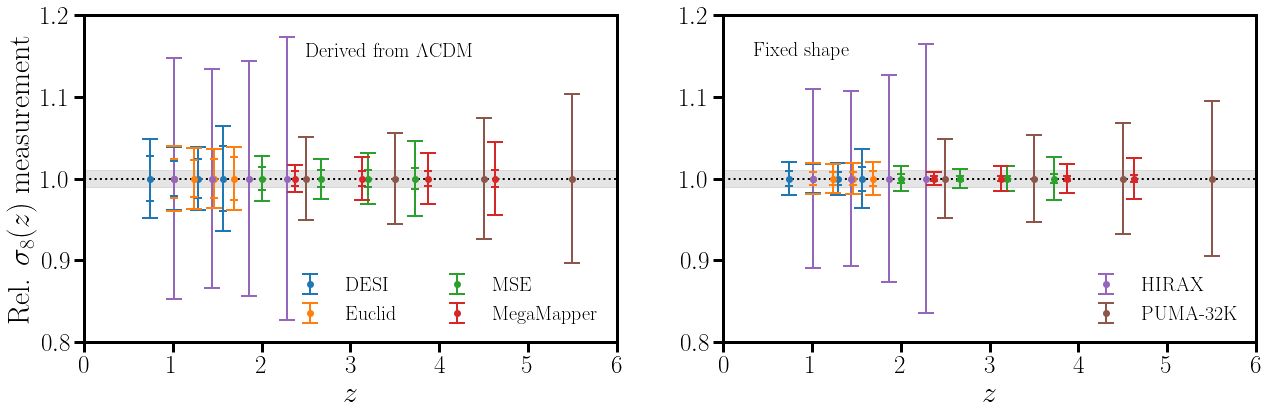

In [57]:
fig, ax = plt.subplots(1,2,figsize=(21,6),sharex=True)

ebar_kwargs1 = {'capsize':8, 'elinewidth':2., 'markeredgewidth':2, 'markersize':10}
ebar_kwargs2 = {'capsize':4, 'elinewidth':1., 'markeredgewidth':2, 'markersize':0}

zs = np.linspace(0,6,100)
ax[0].plot(zs,np.ones(zs.shape),c='k',lw=2,ls='dotted')
ax[1].plot(zs,np.ones(zs.shape),c='k',lw=2,ls='dotted')

zs = desiCast.experiment.zcenters
signal = np.array([s8(z) for z in zs])
err1 = get_relative_fs8_constraint2(F_desi_array,Rs_desi)
err2 = get_relative_fs8_constraint2(F_desi_rsdLens_array,Rs_desi)
print(err1/signal)
print(err2/signal)
#err2 = get_relative_fs8_constraint3(F_desi_arraya,Rsf_desi)
ax[0].errorbar(zs,np.ones(zs.shape),yerr=err1/signal,c='C0',ls='',lw=3,zorder=3,marker='.',label='DESI',**ebar_kwargs1)
ax[0].errorbar(zs,np.ones(zs.shape),yerr=err2/signal,c='C0',ls='',lw=3,zorder=3,marker='.',**ebar_kwargs2)
ax[1].errorbar(zs,np.ones(zs.shape),yerr=desi_fixedShapeError,c='C0',lw=3,ls='',zorder=3,marker='.',**ebar_kwargs1)
ax[1].errorbar(zs,np.ones(zs.shape),yerr=desi_fixedShapeError_lens,c='C0',lw=3,ls='',zorder=3,marker='.',**ebar_kwargs2)

zs = eucCast.experiment.zcenters
signal = np.array([s8(z) for z in zs])
f = np.array([cosmo.scale_independent_growth_factor_f(z) for z in zs])
err1 = get_relative_fs8_constraint2(F_euc_array,Rs_euc)
err2 = get_relative_fs8_constraint2(F_euc_rsdLens_array,Rs_euc)
#err2 = get_relative_fs8_constraint3(F_euc_arraya,Rsf_euc)
ax[0].errorbar(zs,np.ones(zs.shape),yerr=err1/signal,c='C1',ls='',lw=3,zorder=3,marker='.',label='Euclid',**ebar_kwargs1)
ax[0].errorbar(zs,np.ones(zs.shape),yerr=err2/signal,c='C1',ls='',lw=3,zorder=3,marker='.',**ebar_kwargs2)
ax[1].errorbar(zs,np.ones(zs.shape),yerr=euc_fixedShapeError,c='C1',lw=3,ls='',zorder=3,marker='.',**ebar_kwargs1)
ax[1].errorbar(zs,np.ones(zs.shape),yerr=euc_fixedShapeError_lens,c='C1',lw=3,ls='',zorder=3,marker='.',**ebar_kwargs2)

zs = mseCast.experiment.zcenters
signal = np.array([s8(z) for z in zs])
f = np.array([cosmo.scale_independent_growth_factor_f(z) for z in zs])
err1 = get_relative_fs8_constraint2(F_mse_array,Rs_mse)
err2 = get_relative_fs8_constraint2(F_mse_rsdLens_array,Rs_mse)
#err2 = get_relative_fs8_constraint3(F_mse_arraya,Rsf_mse)
ax[0].errorbar(zs,np.ones(zs.shape),yerr=err1/signal,c='C2',ls='',lw=3,zorder=3,marker='.',label='MSE',**ebar_kwargs1)
ax[0].errorbar(zs,np.ones(zs.shape),yerr=err2/signal,c='C2',ls='',lw=3,zorder=3,marker='.',**ebar_kwargs2)
ax[1].errorbar(zs,np.ones(zs.shape),yerr=mse_fixedShapeError,c='C2',lw=3,ls='',zorder=3,marker='.',**ebar_kwargs1)
ax[1].errorbar(zs,np.ones(zs.shape),yerr=mse_fixedShapeError_lens,c='C2',lw=3,ls='',zorder=3,marker='.',**ebar_kwargs2)

zs = megaCast.experiment.zcenters
signal = np.array([s8(z) for z in zs])
f = np.array([cosmo.scale_independent_growth_factor_f(z) for z in zs])
err1 = get_relative_fs8_constraint2(F_mega_array,Rs_mega)
err2 = get_relative_fs8_constraint2(F_mega_rsdLens_array,Rs_mega)
#err2 = get_relative_fs8_constraint3(F_mega_arraya,Rsf_mega)
ax[0].errorbar(zs,np.ones(zs.shape),yerr=err1/signal,c='C3',ls='',lw=3,zorder=3,marker='.',label='MegaMapper',**ebar_kwargs1)
ax[0].errorbar(zs,np.ones(zs.shape),yerr=err2/signal,c='C3',ls='',lw=3,zorder=3,marker='.',**ebar_kwargs2)
ax[1].errorbar(zs,np.ones(zs.shape),yerr=mega_fixedShapeError,c='C3',lw=3,ls='',zorder=3,marker='.',**ebar_kwargs1)
ax[1].errorbar(zs,np.ones(zs.shape),yerr=mega_fixedShapeError_lens,c='C3',lw=3,ls='',zorder=3,marker='.',**ebar_kwargs2)

zs = hiraxOptCast.experiment.zcenters
signal = np.array([s8(z) for z in zs])
f = np.array([cosmo.scale_independent_growth_factor_f(z) for z in zs])
err1 = get_relative_fs8_constraint2(F_hiraxOpt_array,Rs_hirax,HI=True)
err2 = get_relative_fs8_constraint2(F_hiraxOpt_rsdLens_array,Rs_hirax,HI=True)
#err2 = get_relative_fs8_constraint3(F_hiraxOpt_arraya,Rsf_hirax,HI=True)
ax[0].errorbar(zs,np.ones(zs.shape),yerr=err1/signal,c='C4',ls='',lw=3,zorder=3,marker='.',**ebar_kwargs1)
#ax[0].errorbar(zs,np.ones(zs.shape),yerr=err2/signal,c='C4',ls='',lw=3,zorder=3,marker='.',**ebar_kwargs2)
ax[1].errorbar(zs,np.ones(zs.shape),yerr=hiraxOpt_fixedShapeError,c='C4',lw=3,ls='',zorder=3,marker='.',**ebar_kwargs1,label='HIRAX')

zs = puma32optCast.experiment.zcenters
signal = np.array([s8(z) for z in zs])
f = np.array([cosmo.scale_independent_growth_factor_f(z) for z in zs])
err1 = get_relative_fs8_constraint2(F_puma32opt_array,Rs_puma,HI=True)
err2 = get_relative_fs8_constraint2(F_puma32opt_rsdLens_array,Rs_puma,HI=True)
#err2 = get_relative_fs8_constraint3(F_puma32opt_arraya,Rsf_puma,HI=True)
ax[0].errorbar(zs,np.ones(zs.shape),yerr=err1/signal,c='C5',ls='',lw=3,zorder=3,marker='.',**ebar_kwargs1)
#ax[0].errorbar(zs,np.ones(zs.shape),yerr=err2/signal,c='C5',ls='',lw=3,zorder=3,marker='.',**ebar_kwargs2)
ax[1].errorbar(zs,np.ones(zs.shape),yerr=puma32opt_fixedShapeError,c='C5',lw=3,ls='',zorder=3,marker='.',**ebar_kwargs1,label='PUMA-32K')

ax[0].legend(loc='lower right',frameon=False,fontsize=20,ncol=2)
ax[1].legend(loc='lower right',frameon=False,fontsize=20,ncol=1)
ax[0].set_xlabel(r'$z$')

ax[1].set_xlabel(r'$z$')

ax[0].set_ylabel(r'Rel. $\sigma_8(z)$ measurement')
#ax[1].set_ylabel(r'Rel. $\sigma_8(z)$ measurement')

ax[0].set_xticks([0,1,2,3,4,5,6])
ax[1].set_xticks([0,1,2,3,4,5,6])

ax[0].set_xlim(0,6)
ax[0].set_ylim(1-0.2,1+0.2)

ax[1].set_xlim(0,6)
ax[1].set_ylim(1-0.2,1+0.2)

ax[0].text(2.5,1.15,r'Derived from $\Lambda$CDM',fontsize=20)
ax[1].text(0.34,1.15,'Fixed shape',fontsize=20)

x = np.linspace(0,6,3)
ax[0].fill_between(x,np.ones(x.shape)*0.99,np.ones(x.shape)*1.01,color='k',alpha=0.1)
ax[1].fill_between(x,np.ones(x.shape)*0.99,np.ones(x.shape)*1.01,color='k',alpha=0.1)
plt.savefig('figures/s8.pdf',bbox_inches='tight')

[0.09790108 0.10651499 0.08314161 0.10737194]
[0.07496609 0.08590728 0.07276436 0.08861245]


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


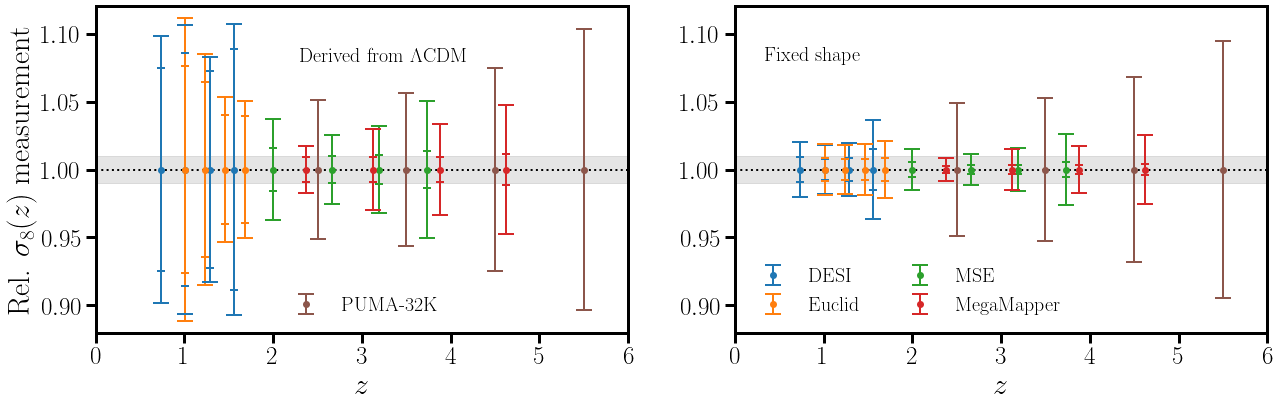

In [51]:
fig, ax = plt.subplots(1,2,figsize=(21,6),sharex=True)

ebar_kwargs1 = {'capsize':8, 'elinewidth':2., 'markeredgewidth':2, 'markersize':10}
ebar_kwargs2 = {'capsize':4, 'elinewidth':1., 'markeredgewidth':2, 'markersize':0}

zs = np.linspace(0,6,100)
ax[0].plot(zs,np.ones(zs.shape),c='k',lw=2,ls='dotted')
ax[1].plot(zs,np.ones(zs.shape),c='k',lw=2,ls='dotted')

zs = desiCast.experiment.zcenters
signal = np.array([s8(z) for z in zs])
err1 = get_relative_fs8_constraint2(F_desi_array,Rs_desi)
err2 = get_relative_fs8_constraint2(F_desi_rsdLens_array,Rs_desi)
print(err1/signal)
print(err2/signal)
#err2 = get_relative_fs8_constraint3(F_desi_arraya,Rsf_desi)
ax[0].errorbar(zs,np.ones(zs.shape),yerr=err1/signal,c='C0',ls='',lw=3,zorder=3,marker='.',**ebar_kwargs1)
ax[0].errorbar(zs,np.ones(zs.shape),yerr=err2/signal,c='C0',ls='',lw=3,zorder=3,marker='.',**ebar_kwargs2)
ax[1].errorbar(zs,np.ones(zs.shape),yerr=desi_fixedShapeError,c='C0',lw=3,ls='',zorder=3,label='DESI',marker='.',**ebar_kwargs1)
ax[1].errorbar(zs,np.ones(zs.shape),yerr=desi_fixedShapeError_lens,c='C0',lw=3,ls='',zorder=3,marker='.',**ebar_kwargs2)

zs = eucCast.experiment.zcenters
signal = np.array([s8(z) for z in zs])
f = np.array([cosmo.scale_independent_growth_factor_f(z) for z in zs])
err1 = get_relative_fs8_constraint2(F_euc_array,Rs_euc)
err2 = get_relative_fs8_constraint2(F_euc_rsdLens_array,Rs_euc)
#err2 = get_relative_fs8_constraint3(F_euc_arraya,Rsf_euc)
ax[0].errorbar(zs,np.ones(zs.shape),yerr=err1/signal,c='C1',ls='',lw=3,zorder=3,marker='.',**ebar_kwargs1)
ax[0].errorbar(zs,np.ones(zs.shape),yerr=err2/signal,c='C1',ls='',lw=3,zorder=3,marker='.',**ebar_kwargs2)
ax[1].errorbar(zs,np.ones(zs.shape),yerr=euc_fixedShapeError,c='C1',lw=3,ls='',zorder=3,label='Euclid',marker='.',**ebar_kwargs1)
ax[1].errorbar(zs,np.ones(zs.shape),yerr=euc_fixedShapeError_lens,c='C1',lw=3,ls='',zorder=3,marker='.',**ebar_kwargs2)

zs = megaCast.experiment.zcenters
signal = np.array([s8(z) for z in zs])
f = np.array([cosmo.scale_independent_growth_factor_f(z) for z in zs])
err1 = get_relative_fs8_constraint2(F_mega_array,Rs_mega)
err2 = get_relative_fs8_constraint2(F_mega_rsdLens_array,Rs_mega)
#err2 = get_relative_fs8_constraint3(F_mega_arraya,Rsf_mega)
ax[0].errorbar(zs,np.ones(zs.shape),yerr=err1/signal,c='C3',ls='',lw=3,zorder=3,marker='.',**ebar_kwargs1)
ax[0].errorbar(zs,np.ones(zs.shape),yerr=err2/signal,c='C3',ls='',lw=3,zorder=3,marker='.',**ebar_kwargs2)
ax[1].errorbar(zs,np.ones(zs.shape),yerr=mega_fixedShapeError,c='C3',lw=3,ls='',zorder=3,label='MegaMapper',marker='.',**ebar_kwargs1)
ax[1].errorbar(zs,np.ones(zs.shape),yerr=mega_fixedShapeError_lens,c='C3',lw=3,ls='',zorder=3,marker='.',**ebar_kwargs2)

zs = mseCast.experiment.zcenters
signal = np.array([s8(z) for z in zs])
f = np.array([cosmo.scale_independent_growth_factor_f(z) for z in zs])
err1 = get_relative_fs8_constraint2(F_mse_array,Rs_mse)
err2 = get_relative_fs8_constraint2(F_mse_rsdLens_array,Rs_mse)
#err2 = get_relative_fs8_constraint3(F_mse_arraya,Rsf_mse)
ax[0].errorbar(zs,np.ones(zs.shape),yerr=err1/signal,c='C2',ls='',lw=3,zorder=3,marker='.',**ebar_kwargs1)
ax[0].errorbar(zs,np.ones(zs.shape),yerr=err2/signal,c='C2',ls='',lw=3,zorder=3,marker='.',**ebar_kwargs2)
ax[1].errorbar(zs,np.ones(zs.shape),yerr=mse_fixedShapeError,c='C2',lw=3,ls='',label='MSE',zorder=3,marker='.',**ebar_kwargs1)
ax[1].errorbar(zs,np.ones(zs.shape),yerr=mse_fixedShapeError_lens,c='C2',lw=3,ls='',zorder=3,marker='.',**ebar_kwargs2)

#zs = hiraxOptCast.experiment.zcenters
#signal = np.array([s8(z) for z in zs])
#f = np.array([cosmo.scale_independent_growth_factor_f(z) for z in zs])
#err1 = get_relative_fs8_constraint2(F_hiraxOpt_array,Rs_hirax,HI=True)
#err2 = get_relative_fs8_constraint2(F_hiraxOpt_rsdLens_array,Rs_hirax,HI=True)
#err2 = get_relative_fs8_constraint3(F_hiraxOpt_arraya,Rsf_hirax,HI=True)
#ax[0].errorbar(zs,np.ones(zs.shape),yerr=err1/signal,c='C4',ls='',lw=3,zorder=3,marker='.',**ebar_kwargs1)
#ax[0].errorbar(zs,np.ones(zs.shape),yerr=err2/signal,c='C4',ls='',lw=3,zorder=3,marker='.',**ebar_kwargs2)
#ax[1].errorbar(zs,np.ones(zs.shape),yerr=hiraxOpt_fixedShapeError,c='C4',lw=3,ls='',zorder=3,marker='.',**ebar_kwargs1,label='HIRAX')

zs = puma32optCast.experiment.zcenters
signal = np.array([s8(z) for z in zs])
f = np.array([cosmo.scale_independent_growth_factor_f(z) for z in zs])
err1 = get_relative_fs8_constraint2(F_puma32opt_array,Rs_puma,HI=True)
err2 = get_relative_fs8_constraint2(F_puma32opt_rsdLens_array,Rs_puma,HI=True)
#err2 = get_relative_fs8_constraint3(F_puma32opt_arraya,Rsf_puma,HI=True)
ax[0].errorbar(zs,np.ones(zs.shape),yerr=err1/signal,c='C5',ls='',lw=3,zorder=3,marker='.',**ebar_kwargs1,label='PUMA-32K')
#ax[0].errorbar(zs,np.ones(zs.shape),yerr=err2/signal,c='C5',ls='',lw=3,zorder=3,marker='.',**ebar_kwargs2)
ax[1].errorbar(zs,np.ones(zs.shape),yerr=puma32opt_fixedShapeError,c='C5',lw=3,ls='',zorder=3,marker='.',**ebar_kwargs1)

ax[0].legend(loc='lower center',frameon=False,fontsize=20,ncol=2)
ax[1].legend(loc='lower left',frameon=False,fontsize=20,ncol=2)
ax[0].set_xlabel(r'$z$')

ax[1].set_xlabel(r'$z$')

ax[0].set_ylabel(r'Rel. $\sigma_8(z)$ measurement')
#ax[1].set_ylabel(r'Rel. $\sigma_8(z)$ measurement')

ax[0].set_xticks([0,1,2,3,4,5,6])
ax[1].set_xticks([0,1,2,3,4,5,6])

ax[0].set_xlim(0,6)
ax[0].set_ylim(1-0.12,1+0.12)

ax[1].set_xlim(0,6)
ax[1].set_ylim(1-0.12,1+0.12)

ax[0].text(2.3,1.08,r'Derived from $\Lambda$CDM',fontsize=20)
ax[1].text(0.34,1.08,'Fixed shape',fontsize=20)

x = np.linspace(0,6,3)
ax[0].fill_between(x,np.ones(x.shape)*0.99,np.ones(x.shape)*1.01,color='k',alpha=0.1)
ax[1].fill_between(x,np.ones(x.shape)*0.99,np.ones(x.shape)*1.01,color='k',alpha=0.1)
plt.savefig('figures/s8.pdf',bbox_inches='tight')

# $f_\text{NL}$ constraints

In [145]:
# marginalize over AP??? or just n_s? check the spherex paper

In [12]:
basis_fnl = np.array(['h','log(A_s)','n_s','omega_cdm','omega_b','tau_reio','f_NL','b'])
basis_fnl_hi = np.array(['h','log(A_s)','n_s','omega_cdm','omega_b','tau_reio','f_NL','b','Tb'])

cast = desiCast
derivatives_desi_fnl = cast.load_derivatives(basis_fnl)
print('DESI')
cast = eucCast
derivatives_euc_fnl = cast.load_derivatives(basis_fnl)
print('Euclid')
cast = mseCast
derivatives_mse_fnl = cast.load_derivatives(basis_fnl)
print('MSE')
cast = megaCast
derivatives_mega_fnl = cast.load_derivatives(basis_fnl)
print('MegaMapper')
cast = hiraxOptCast
derivatives_hiraxOpt_fnl = cast.load_derivatives(basis_fnl_hi)
print('HIRAX opt')
cast = puma5optCast
derivatives_puma5opt_fnl = cast.load_derivatives(basis_fnl_hi)
print('PUMA-5K opt')
cast = puma32optCast
derivatives_puma32opt_fnl = cast.load_derivatives(basis_fnl_hi)
print('PUMA-32K opt')
cast = spherexCast
derivatives_spherex_fnl = cast.load_derivatives(basis_fnl)
print('SPHEREx')

DESI
Euclid
MSE
MegaMapper
HIRAX opt
PUMA-5K opt
PUMA-32K opt
SPHEREx


In [36]:
spherexCast.experiment.sigma_z = 0.05

In [14]:
def get_fnl_constraint(kmin,kmax,cast,basis,derivs,kpar_min=-1.):
   F_fnl = cast.gen_fisher(basis,7,kmin=kmin,kmax=kmax,kpar_min=kpar_min,derivatives=derivs)
   F = fishcast.combine_fishers([Planck[:6,:6],F_fnl],6)
   C_fnl = np.linalg.inv(F)
   return np.sqrt(C_fnl[6,6])

def get_all_fnl_constraints(kmin,kmax,kpar_min=-1.):
   casts = [desiCast,eucCast,mseCast,megaCast,hiraxOptCast,puma5optCast,puma32optCast,spherexCast]
   bases = [basis_fnl]*4+[basis_fnl_hi]*3 + [basis_fnl]
   derivs = [derivatives_desi_fnl,derivatives_euc_fnl,derivatives_mse_fnl,derivatives_mega_fnl,
             derivatives_hiraxOpt_fnl,derivatives_puma5opt_fnl,derivatives_puma32opt_fnl,derivatives_spherex_fnl]
   N = len(casts)
   result = [get_fnl_constraint(kmin,kmax,casts[i],bases[i],derivs[i],kpar_min=kpar_min) for i in range(N)]
   return result

In [168]:
N = 10 ; M = 10
kmins = np.linspace(0.0003,0.005,N)
kmaxs = np.linspace(0.02,0.06,M)

constraints = np.zeros((len(kmins),len(kmaxs),8))
for i in range(N):
   for j in range(M):
      constraints[i,j] = get_all_fnl_constraints(kmins[i],kmaxs[j])

In [169]:
kmin_vol = lambda cast: np.array([2*np.pi/(cast.experiment.fsky*cast.comov_vol(cast.experiment.zedges[i],cast.experiment.zedges[i+1]))**(1/3) for i in range(4)])

In [170]:
kmin_vol = lambda cast: 2*np.pi/(cast.experiment.fsky*cast.comov_vol(cast.experiment.zedges[0],cast.experiment.zedges[-1]))**(1/3)

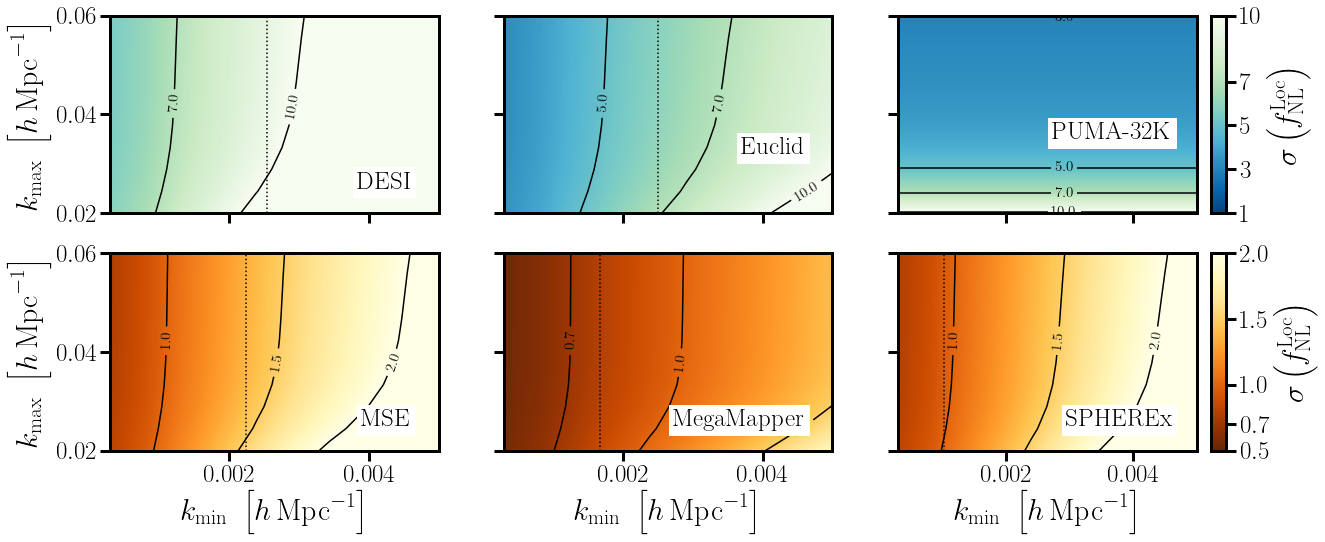

In [173]:
KMAX,KMIN = np.meshgrid(kmaxs,kmins)

fig,ax = plt.subplots(2,3,figsize=(20,8),sharex=True,sharey=True)


cmap2 = 'GnBu_r'
vmin2 = 1
vmax2 = 10
level2 = [1,3,5,7,10]

cmap = 'YlOrBr_r'
vmin = 0.5
vmax = 2
level = [0.5,0.7,1,1.5,2]

nlevels = 1000
aspect = 0.8*(kmins[-1]-kmins[0])/(kmaxs[-1]-kmaxs[0])
alpha = 1

contour = ax[0,0].contour(KMIN,KMAX,constraints[:,:,0],colors='k',levels=level2)
ax[0,0].clabel(contour, inline=True, fontsize=15, fmt = '%1.1f')
ax[0,0].contourf(KMIN,KMAX,constraints[:,:,0],cmap=cmap2,vmin=vmin2,vmax=vmax2,levels=nlevels,alpha=alpha)
#for i in range(4): ax[0,0].axvline(kmin_vol(desiCast)[i],0,1,color='k',ls='dotted')
ax[0,0].axvline(kmin_vol(desiCast),0,1,color='k',ls='dotted')
#
contour = ax[0,1].contour(KMIN,KMAX,constraints[:,:,1],colors='k',levels=level2)
ax[0,1].clabel(contour, inline=True, fontsize=15, fmt = '%1.1f')
ax[0,1].contourf(KMIN,KMAX,constraints[:,:,1],cmap=cmap2,vmin=vmin2,vmax=vmax2,levels=nlevels,alpha=alpha)
#for i in range(4): ax[0,1].axvline(kmin_vol(eucCast)[i],0,1,color='k',ls='dotted')
ax[0,1].axvline(kmin_vol(eucCast),0,1,color='k',ls='dotted')
#
contour = ax[1,0].contour(KMIN,KMAX,constraints[:,:,2],colors='k',levels=level)
ax[1,0].clabel(contour, inline=True, fontsize=15, fmt = '%1.1f')
ax[1,0].contourf(KMIN,KMAX,constraints[:,:,2],cmap=cmap,vmin=vmin,vmax=vmax,levels=nlevels,alpha=alpha)
#for i in range(4): ax[1,0].axvline(kmin_vol(mseCast)[i],0,1,color='k',ls='dotted')
ax[1,0].axvline(kmin_vol(mseCast),0,1,color='k',ls='dotted')
#
contour = ax[1,1].contour(KMIN,KMAX,constraints[:,:,3],colors='k',levels=level)
ax[1,1].clabel(contour, inline=True, fontsize=15, fmt = '%1.1f')
ax[1,1].contourf(KMIN,KMAX,constraints[:,:,3],cmap=cmap,vmin=vmin,vmax=vmax,levels=nlevels,alpha=alpha)
#for i in range(4): ax[1,1].axvline(kmin_vol(megaCast)[i],0,1,color='k',ls='dotted')
ax[1,1].axvline(kmin_vol(megaCast),0,1,color='k',ls='dotted')
#
#
contour = ax[0,2].contour(KMIN,KMAX,constraints[:,:,6],colors='k',levels=level2)
ax[0,2].clabel(contour, inline=True, fontsize=15, fmt = '%1.1f')
ax[0,2].contourf(KMIN,KMAX,constraints[:,:,6],cmap=cmap2,vmin=vmin2,vmax=vmax2,levels=nlevels,alpha=alpha)
#
contour = ax[1,2].contour(KMIN,KMAX,constraints[:,:,7],colors='k',levels=level)
ax[1,2].clabel(contour, inline=True, fontsize=15, fmt = '%1.1f')
ax[1,2].contourf(KMIN,KMAX,constraints[:,:,7],cmap=cmap,vmin=vmin,vmax=vmax,levels=nlevels,alpha=alpha)
#for i in range(4): ax[1,2].axvline(kmin_vol(spherexCast)[i],0,1,color='k',ls='dotted')
ax[1,2].axvline(kmin_vol(spherexCast),0,1,color='k',ls='dotted')

xloc,yloc = 0.0046,0.025
ax[0,0].text(xloc,yloc,'DESI',ha='right',fontsize=25,backgroundcolor='white',zorder=5)
ax[0,1].text(xloc,yloc+0.007,'Euclid',ha='right',fontsize=25,backgroundcolor='white',zorder=5)
ax[1,0].text(xloc,yloc,'MSE',ha='right',fontsize=25,backgroundcolor='white',zorder=5)
ax[1,1].text(xloc,yloc,'MegaMapper',ha='right',fontsize=25,backgroundcolor='white',zorder=5)
ax[0,2].text(xloc,yloc+0.01,'PUMA-32K',ha='right',fontsize=25,backgroundcolor='white',zorder=5)
ax[1,2].text(xloc,yloc,'SPHEREx',ha='right',fontsize=25,backgroundcolor='white',zorder=5)

for i in range(3): ax[1,i].set_xlabel(r'$k_\text{min}\,\,\left[h\,\text{Mpc}^{-1}\right]$')
for i in range(2): ax[i,0].set_ylabel(r'$k_\text{max}\,\,\left[h\,\text{Mpc}^{-1}\right]$')  
    
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax[1,2])
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(plt.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=vmin,vmax=vmax), cmap=cmap), label=r'$\sigma\left(f^\text{Loc}_\text{NL}\right)$',cax=cax,ticks=level)

divider = make_axes_locatable(ax[0,2])
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(plt.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=vmin2,vmax=vmax2), cmap=cmap2), label=r'$\sigma\left(f^\text{Loc}_\text{NL}\right)$',cax=cax,ticks=level2)

plt.savefig('figures/fnl.pdf',bbox_inches='tight')

In [21]:
spherexCast.experiment.sigma_z = 0.0

### $f_\text{NL}-n_s$ contour plot for David

In [363]:
F_fnl_desi =     desiCast.gen_fisher(basis_fnl,7,kmin=0.001,kmax=0.03,derivatives=derivatives_desi_fnl)
F_fnl_euc =      eucCast.gen_fisher(basis_fnl,7,kmin=0.001,kmax=0.03,derivatives=derivatives_euc_fnl)
F_fnl_spherex =  spherexCast.gen_fisher(basis_fnl,7,kmin=0.001,kmax=0.03,derivatives=derivatives_spherex_fnl)
F_fnl_mega =     megaCast.gen_fisher(basis_fnl,7,kmin=0.001,kmax=0.03,derivatives=derivatives_mega_fnl)

F_fnl_desi = fishcast.combine_fishers([Planck[:6,:6],F_fnl_desi],6)
F_fnl_euc = fishcast.combine_fishers([Planck[:6,:6],F_fnl_euc],6)
F_fnl_spherex = fishcast.combine_fishers([Planck[:6,:6],F_fnl_spherex],6)
F_fnl_mega = fishcast.combine_fishers([Planck[:6,:6],F_fnl_mega],6)

x = [6,2]

C_desi = np.linalg.inv(F_fnl_desi)[x][:,x]
C_euc = np.linalg.inv(F_fnl_euc)[x][:,x]
C_spherex = np.linalg.inv(F_fnl_spherex)[x][:,x]
C_mega = np.linalg.inv(F_fnl_mega)[x][:,x]

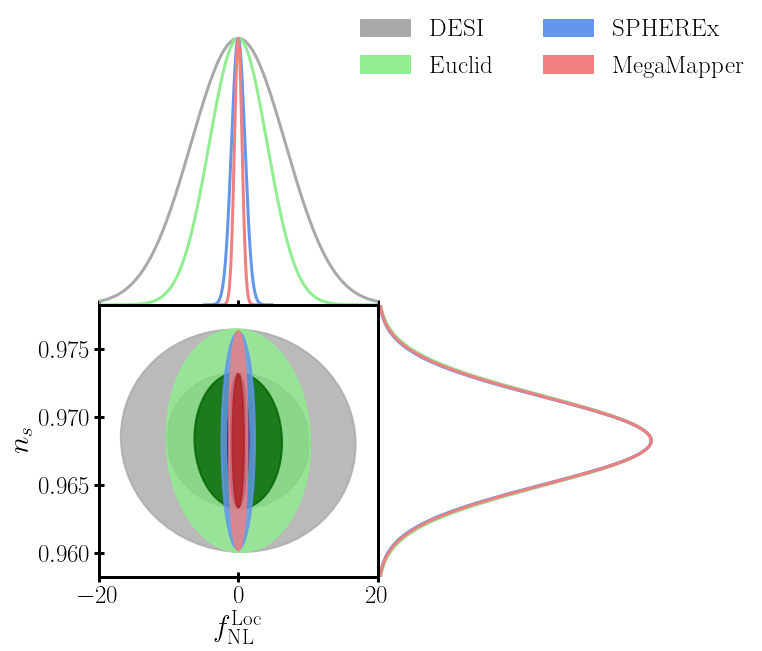

In [366]:
fv = [0,params['n_s']]
labels = [r'$f^\text{Loc}_\text{NL}$',r'$n_s$']

N = 2

from matplotlib.patches import Ellipse

alpha=0.8

fig, ax = plt.subplots(N,N,figsize=(10,10),sharex='col')#,sharey='row')

def plot_gauss(ax,mu,sigma2,c='k'):
   d = np.linspace(mu-5*np.sqrt(sigma2),mu+5*np.sqrt(sigma2),200)
   ax.plot(d,np.exp(-(d-mu)**2/2/sigma2),c=c,lw=3)
    
def plot_gauss2(ax,mu,sigma2,c='k'):
   d = np.linspace(mu-5*np.sqrt(sigma2),mu+5*np.sqrt(sigma2),200)
   ax.plot(np.exp(-(d-mu)**2/2/sigma2),d,c=c,lw=3)

def plot_contour(i,j,C,colors=['cornflowerblue','navy'],name=''): 
    
   c = C[[j,i]][:,[j,i]]
   f = np.linalg.inv(c)
   w, v = np.linalg.eig(f)
   angle = np.arctan(v[0][1]/v[0][0])*180/np.pi
   width, height = 2*np.sqrt(6.2/w[0]),2*np.sqrt(6.2/w[1])
   ellipse = Ellipse(xy=(fv[j],fv[i]),width=width,height=height,angle=-angle,
                     fc=colors[0],ec=colors[0],alpha=alpha,lw=2,fill=True)
   ax[i,j].add_patch(ellipse)

   width2, height2 = 2*np.sqrt(2.3/w[0]),2*np.sqrt(2.3/w[1])
   ellipse = Ellipse(xy=(fv[j],fv[i]),width=width2,height=height2,angle=-angle,
                     fc=colors[1],ec=colors[1],alpha=alpha,lw=2,fill=True)
   ax[i,j].add_patch(ellipse)
    
   ax[i,j].fill_between([],[],[],color=colors[0],label=name)
   ax[1,0].legend(loc=(0.9,1.8),frameon=False,ncol=2)

for i in range(N):
   for j in range(N):
    
      ax[i,j].tick_params(axis='both',direction='inout',bottom=True, top=True, left=True, right=True)
      if i < j: ax[i,j].set_visible(False)
        
       
        
      if i == j+1: ax[i,j].tick_params(axis='both',direction='inout',bottom=True, top=False, left=True, right=False)
      
            
      if i == j:
         if i == N-1:
            plot_gauss2(ax[i,j],fv[i],C_desi[i,i],c='darkgrey')
            plot_gauss2(ax[i,j],fv[i],C_euc[i,i],c='lightgreen')
            plot_gauss2(ax[i,j],fv[i],C_spherex[i,i],c='cornflowerblue')
            plot_gauss2(ax[i,j],fv[i],C_mega[i,i],c='lightcoral')
         else:
            plot_gauss(ax[i,j],fv[i],C_desi[i,i],c='darkgrey')
            plot_gauss(ax[i,j],fv[i],C_euc[i,i],c='lightgreen')
            plot_gauss(ax[i,j],fv[i],C_spherex[i,i],c='cornflowerblue')
            plot_gauss(ax[i,j],fv[i],C_mega[i,i],c='lightcoral')
         ax[i,j].yaxis.set_visible(False)
         ax[i,j].tick_params(axis='both',direction='inout',bottom=True, top=False)
            
      if i > j:
         plot_contour(i,j,C_desi,colors=['darkgrey','dimgray'],name=r'DESI')
         plot_contour(i,j,C_euc,colors=['lightgreen','darkgreen'],name=r'Euclid')
         plot_contour(i,j,C_spherex,colors=['cornflowerblue','navy'],name=r'SPHEREx')
         plot_contour(i,j,C_mega,colors=['lightcoral','firebrick'],name=r'MegaMapper')
      if j != 0: ax[i,j].set_yticklabels(labels=[])
        
          
   ax[i,0].set_ylabel(labels[i])
   ax[N-1,i].set_xlabel(labels[i])

ax[1,1].set_ylim(fv[1]-0.01,fv[1]+0.01)
ax[1,0].set_ylim(fv[1]-0.01,fv[1]+0.01)

ax[0,0].set_xlim(fv[0]-20,fv[0]+20)
ax[1,0].set_xlim(fv[0]-20,fv[0]+20)
    
for i in range(N): 
   if i != 1: ax[i,i].set_ylim(0,1.02) 
   ax[i,i].spines['right'].set_visible(False)
   ax[i,i].spines['top'].set_visible(False)

ax[1,1].spines['bottom'].set_visible(False)
ax[1,1].set_xlim(0,1.02)
ax[1,1].set_xlabel('')
ax[1,1].set_xticks([])
ax[0,0].spines['left'].set_visible(False)
    
plt.subplots_adjust(wspace=0, hspace=0)
#plt.savefig('figures/clown_plot.pdf',bbox_inches='tight')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


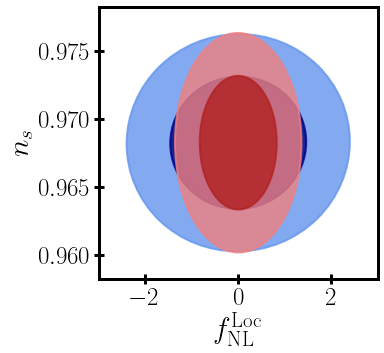

In [369]:
fv = [0,params['n_s']]
labels = [r'$f^\text{Loc}_\text{NL}$',r'$n_s$']

N = 2

from matplotlib.patches import Ellipse

alpha=0.8

fig, ax = plt.subplots(N,N,figsize=(10,10),sharex='col')#,sharey='row')

def plot_gauss(ax,mu,sigma2,c='k'):
   d = np.linspace(mu-5*np.sqrt(sigma2),mu+5*np.sqrt(sigma2),200)
   ax.plot(d,np.exp(-(d-mu)**2/2/sigma2),c=c,lw=3)
    
def plot_gauss2(ax,mu,sigma2,c='k'):
   d = np.linspace(mu-5*np.sqrt(sigma2),mu+5*np.sqrt(sigma2),200)
   ax.plot(np.exp(-(d-mu)**2/2/sigma2),d,c=c,lw=3)

def plot_contour(i,j,C,colors=['cornflowerblue','navy'],name=''): 
    
   c = C[[j,i]][:,[j,i]]
   f = np.linalg.inv(c)
   w, v = np.linalg.eig(f)
   angle = np.arctan(v[0][1]/v[0][0])*180/np.pi
   width, height = 2*np.sqrt(6.2/w[0]),2*np.sqrt(6.2/w[1])
   ellipse = Ellipse(xy=(fv[j],fv[i]),width=width,height=height,angle=-angle,
                     fc=colors[0],ec=colors[0],alpha=alpha,lw=2,fill=True)
   ax[i,j].add_patch(ellipse)

   width2, height2 = 2*np.sqrt(2.3/w[0]),2*np.sqrt(2.3/w[1])
   ellipse = Ellipse(xy=(fv[j],fv[i]),width=width2,height=height2,angle=-angle,
                     fc=colors[1],ec=colors[1],alpha=alpha,lw=2,fill=True)
   ax[i,j].add_patch(ellipse)
    
   ax[i,j].fill_between([],[],[],color=colors[0],label=name)
   ax[1,1].legend(loc=(0.9,1.5),frameon=False)

for i in range(N):
   for j in range(N):
    
      ax[i,j].tick_params(axis='both',direction='inout',bottom=True, top=True, left=True, right=True)
      if i < j: ax[i,j].set_visible(False)
        
       
        
      if i == j+1: ax[i,j].tick_params(axis='both',direction='inout',bottom=True, top=False, left=True, right=False)
      
            
      if i == j:
         if i == N-1:
            #plot_gauss2(ax[i,j],fv[i],C_desi[i,i],c='darkgrey')
            #plot_gauss2(ax[i,j],fv[i],C_euc[i,i],c='lightgreen')
            plot_gauss2(ax[i,j],fv[i],C_spherex[i,i],c='cornflowerblue')
            plot_gauss2(ax[i,j],fv[i],C_mega[i,i],c='lightcoral')
         else:
            #plot_gauss(ax[i,j],fv[i],C_desi[i,i],c='darkgrey')
            #plot_gauss(ax[i,j],fv[i],C_euc[i,i],c='lightgreen')
            plot_gauss(ax[i,j],fv[i],C_spherex[i,i],c='cornflowerblue')
            plot_gauss(ax[i,j],fv[i],C_mega[i,i],c='lightcoral')
         ax[i,j].yaxis.set_visible(False)
         ax[i,j].tick_params(axis='both',direction='inout',bottom=True, top=False)
            
      if i > j:
         #plot_contour(i,j,C_desi,colors=['darkgrey','dimgray'],name=r'SO$\times$HIRAX-ideal (no $\kappa\kappa$)')
         #plot_contour(i,j,C_euc,colors=['lightgreen','darkgreen'],name=r'SO$\times$PUMA-ideal (no $\kappa\kappa$)')
         plot_contour(i,j,C_spherex,colors=['cornflowerblue','navy'],name=r'SO$\times$PUMA-ideal (no $\kappa\kappa$; $b_2,\,b_s,\,\alpha_0,\,\alpha_x$ fixed)')
         plot_contour(i,j,C_mega,colors=['lightcoral','firebrick'],name=r'SO $\kappa\kappa$')
      if j != 0: ax[i,j].set_yticklabels(labels=[])
        
          
   ax[i,0].set_ylabel(labels[i])
   ax[N-1,i].set_xlabel(labels[i])

ax[1,1].set_ylim(fv[1]-0.01,fv[1]+0.01)
ax[1,0].set_ylim(fv[1]-0.01,fv[1]+0.01)

ax[0,0].set_xlim(fv[0]-3,fv[0]+3)
ax[1,0].set_xlim(fv[0]-3,fv[0]+3)
    
ax[0,0].set_visible(False)
ax[1,1].set_visible(False)

#ax[1,1].spines['bottom'].set_visible(False)
ax[1,1].set_xlim(0,1.02)
ax[1,1].set_xlabel('')
ax[1,1].set_xticks([])
#ax[0,0].spines['left'].set_visible(False)
    
plt.subplots_adjust(wspace=0, hspace=0)
#plt.savefig('figures/clown_plot.pdf',bbox_inches='tight')

### $f_\text{NL}$ constraints vs $k_\parallel$ cut

In [39]:
kpar_mins = np.linspace(0.00001, 0.01,70)
constraints = np.array([get_all_fnl_constraints(0.001,0.02,kpar_min=kpar_min) for kpar_min in kpar_mins])

In [109]:
get_all_fnl_constraints(0.001,0.02,kpar_min=0)

[7.149923393526433,
 4.355470089312759,
 1.0359583531174337,
 0.697280073658429,
 29.94874931762741,
 3.220239090353109,
 10.212101979244842,
 1.0094275213100363]

In [37]:
kpar_mins = np.linspace(0.00001, 0.01,70)
constraints2 = np.array([get_all_fnl_constraints(0.001,0.05,kpar_min=kpar_min) for kpar_min in kpar_mins])

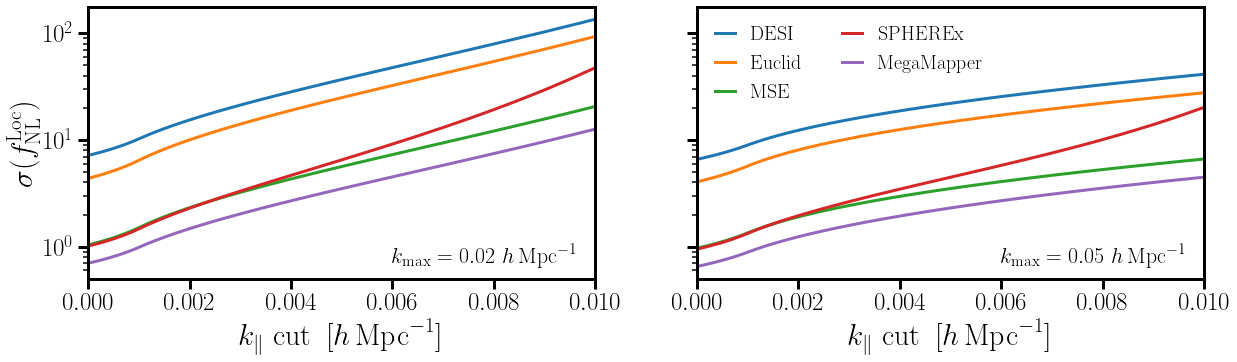

In [40]:
fig,ax = plt.subplots(1,2,figsize=(20,5),sharey=True)

#casts = [desiCast,eucCast,mseCast,megaCast,hiraxOptCast,puma5optCast,puma32optCast,spherexCast]

ax[0].semilogy(kpar_mins,constraints.T[0],lw=3,label='DESI')
ax[0].semilogy(kpar_mins,constraints.T[1],lw=3,label='Euclid')
ax[0].semilogy(kpar_mins,constraints.T[2],lw=3,label='MSE')
ax[0].semilogy(kpar_mins,constraints.T[-1],lw=3,label='SPHEREx')
ax[0].semilogy(kpar_mins,constraints.T[3],lw=3,label='MegaMapper')

ax[1].semilogy(kpar_mins,constraints2.T[0],lw=3,label='DESI')
ax[1].semilogy(kpar_mins,constraints2.T[1],lw=3,label='Euclid')
ax[1].semilogy(kpar_mins,constraints2.T[2],lw=3,label='MSE')
ax[1].semilogy(kpar_mins,constraints2.T[-1],lw=3,label='SPHEREx')
ax[1].semilogy(kpar_mins,constraints2.T[3],lw=3,label='MegaMapper')

ax[0].set_xlim(0,0.01)
ax[1].set_xlim(0,0.01)
ax[0].text(0.006,0.7,r'$k_\text{max}=0.02\,\,h\,\text{Mpc}^{-1}$')
ax[1].text(0.006,0.7,r'$k_\text{max}=0.05\,\,h\,\text{Mpc}^{-1}$')

ax[1].legend(loc='upper left',frameon=False,ncol=2,fontsize=20,handlelength=1)
ax[0].set_xlabel(r'$k_\parallel$ cut$\,\,\,[h\,\text{Mpc}^{-1}]$')
ax[1].set_xlabel(r'$k_\parallel$ cut$\,\,\,[h\,\text{Mpc}^{-1}]$')
ax[0].set_ylabel(r'$\sigma(f^\text{Loc}_\text{NL})$')
plt.savefig('figures/fNL_vs_kpar_cut.pdf',bbox_inches='tight')

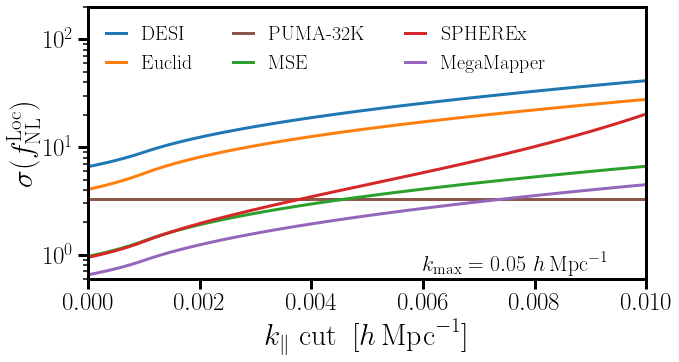

In [38]:
fig,ax = plt.subplots(1,1,figsize=(10,5),sharey=True)

#casts = [desiCast,eucCast,mseCast,megaCast,hiraxOptCast,puma5optCast,puma32optCast,spherexCast]

ax.semilogy(kpar_mins,constraints2.T[0],lw=3,label='DESI',c='C0')
ax.semilogy(kpar_mins,constraints2.T[1],lw=3,label='Euclid',c='C1')
ax.semilogy(kpar_mins,constraints2.T[-2],lw=3,label='PUMA-32K',c='C5')
ax.semilogy(kpar_mins,constraints2.T[2],lw=3,label='MSE',c='C2')
ax.semilogy(kpar_mins,constraints2.T[-1],lw=3,label='SPHEREx',c='C3')
ax.semilogy(kpar_mins,constraints2.T[3],lw=3,label='MegaMapper',c='C4')

ax.set_xlim(0,0.01)
ax.text(0.006,0.7,r'$k_\text{max}=0.05\,\,h\,\text{Mpc}^{-1}$')

ax.legend(loc='upper left',frameon=False,ncol=3,fontsize=20,handlelength=1)
ax.set_xlabel(r'$k_\parallel$ cut$\,\,\,[h\,\text{Mpc}^{-1}]$')
ax.set_ylabel(r'$\sigma(f^\text{Loc}_\text{NL})$')
ax.set_ylim(0.6,200)
plt.savefig('figures/fNL_vs_kpar_cut.pdf',bbox_inches='tight')

# $\kappa\kappa$ vs $\kappa g$

In [24]:
def make_fisher(cast,kmax_knl=1,CMB='SO',kk=True,only_kk=False):
   basis_lensing = np.array(['h','log(A_s)','n_s','omega_cdm','omega_b','tau_reio',\
                          'm_ncdm','N_ur','alpha_s','Omega_k','Omega_k','N','alpha0','b','b2','bs','alphax'])
   globe_lensing = 11
   Lensing = cast.gen_lensing_fisher(basis_lensing,globe_lensing,ell_min=30,ell_max=500,kmax_knl=kmax_knl,CMB=CMB,kk=kk,only_kk=only_kk)
   Lensing[10] *= 0; Lensing[:,10] *= 0
   return Lensing

In [25]:
Fkk = make_fisher(puma32optCast,only_kk=True)

In [26]:
Fnokk = make_fisher(hiraxOptCast,kk=False)

In [27]:
F = make_fisher(puma32optCast,kk=False)

In [28]:
PUMA_32e1_opt = experiment(zmin=0.2, zmax=2., nbins=2, fsky=0.5, sigma_z=0.0, HI=True,pesimistic=False,Ndetectors=32e3,sigv=10)  # 8
puma32e1optCast = fisherForecast(experiment=PUMA_32e1_opt,cosmo=cosmo,cosmo_fid=cosmo_fid,\
                               Nk=2000,Nmu=100,velocileptors=True,name='PUMA32KE1')
print('PUMA-32KE1 optimistic')

PUMA-32KE1 optimistic


In [29]:
Fe = make_fisher(puma32e1optCast,kk=False)

In [30]:
Fb = make_fisher(puma32optCast)

In [33]:
x = [0,1,3,6,5]

F1 = fishcast.combine_fishers([Planck_SO,Fkk],globe)
y1 = list(range(7))
F2 = fishcast.combine_fishers([Planck_SO,Fnokk],globe)
y2 = list(range(7)) + list(range(11,len(F1)))
F3 = fishcast.combine_fishers([Planck_SO,F],globe)
y3 = list(range(7)) + list(range(11,len(F3)))
F4 = fishcast.combine_fishers([Planck_SO,F,Fe],globe)
y4 = list(range(7)) + list(range(11,len(F4)))
F5 = fishcast.combine_fishers([Planck_SO,F],globe)
y5 = list(range(7)) + [11,12,13,14,19,20,21,22]
F6 = fishcast.combine_fishers([Planck_SO,F_puma32opt],globe)
y6 = list(range(7)) + list(range(11,len(F6)))

C1 = np.linalg.inv(F1[y1][:,y1])[x][:,x]
C2 = np.linalg.inv(F2[y2][:,y2])[x][:,x]
C3 = np.linalg.inv(F3[y3][:,y3])[x][:,x]
C4 = np.linalg.inv(F4[y4][:,y4])[x][:,x]
C5 = np.linalg.inv(F5[y5][:,y5])[x][:,x]
C6 = np.linalg.inv(F6[y6][:,y6])[x][:,x]

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


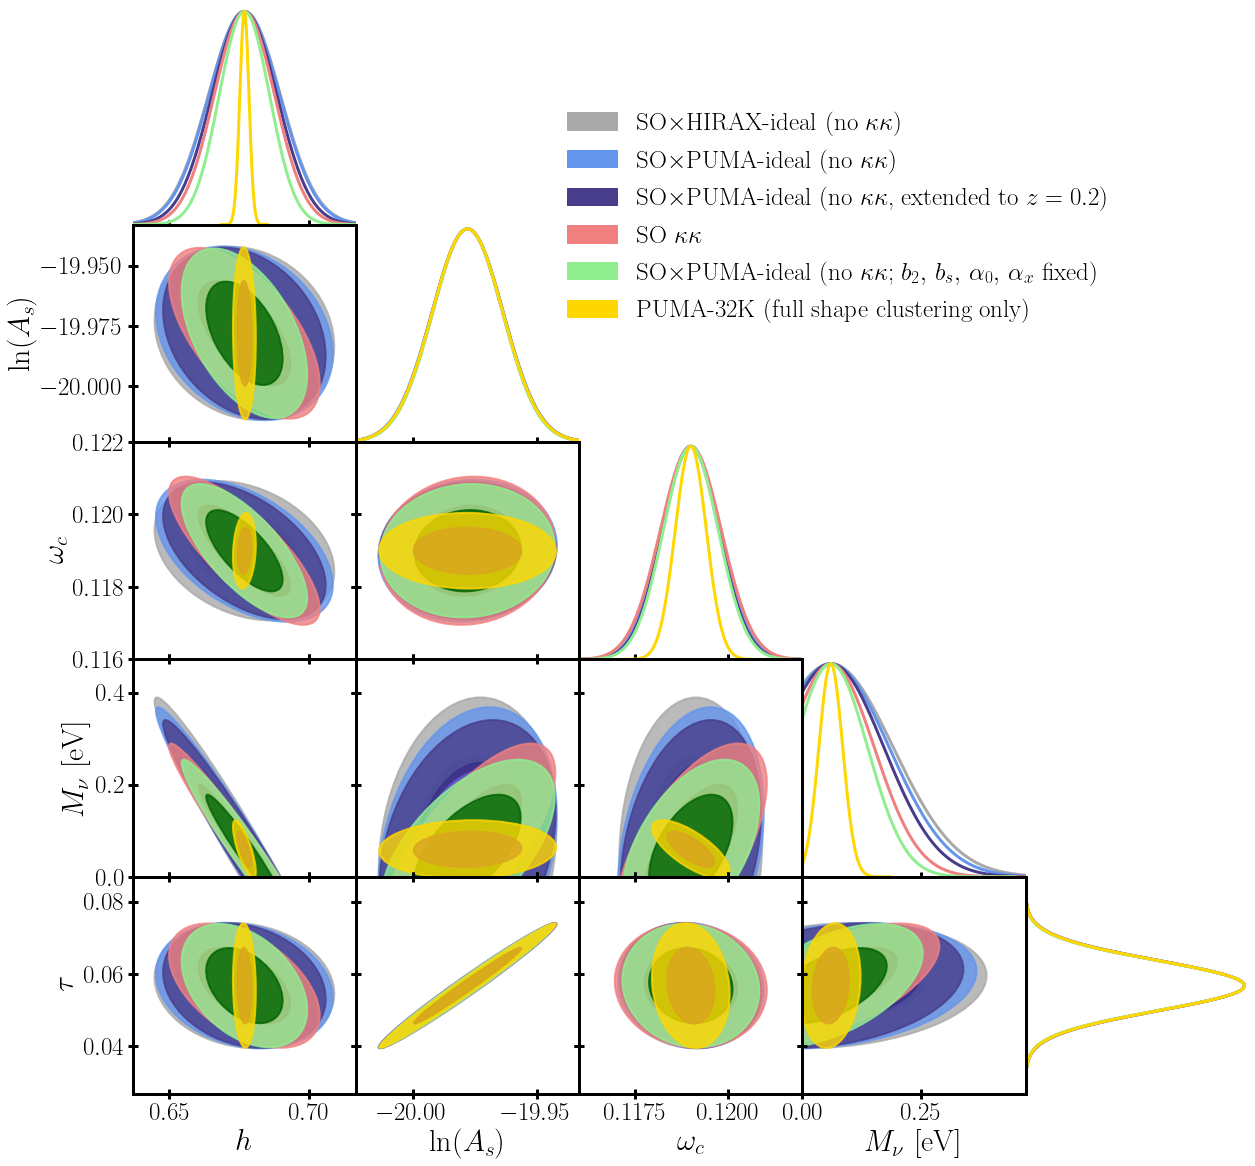

In [63]:
fv = [0.6770,-19.978,0.119,0.06,0.0568]
labels = [r'$h$',r'$\ln(A_s)$',r'$\omega_c$',r'$M_\nu\,\,[\text{eV}]$',r'$\tau$']

N = 5

from matplotlib.patches import Ellipse

alpha=0.8

fig, ax = plt.subplots(N,N,figsize=(20,20),sharex='col')#,sharey='row')

def plot_gauss(ax,mu,sigma2,c='k'):
   d = np.linspace(mu-5*np.sqrt(sigma2),mu+5*np.sqrt(sigma2),200)
   ax.plot(d,np.exp(-(d-mu)**2/2/sigma2),c=c,lw=3)
    
def plot_gauss2(ax,mu,sigma2,c='k'):
   d = np.linspace(mu-5*np.sqrt(sigma2),mu+5*np.sqrt(sigma2),200)
   ax.plot(np.exp(-(d-mu)**2/2/sigma2),d,c=c,lw=3)

def plot_contour(i,j,C,colors=['cornflowerblue','navy'],name=''): 
    
   c = C[[j,i]][:,[j,i]]
   f = np.linalg.inv(c)
   w, v = np.linalg.eig(f)
   angle = np.arctan(v[0][1]/v[0][0])*180/np.pi
   width, height = 2*np.sqrt(6.2/w[0]),2*np.sqrt(6.2/w[1])
   ellipse = Ellipse(xy=(fv[j],fv[i]),width=width,height=height,angle=-angle,
                     fc=colors[0],ec=colors[0],alpha=alpha,lw=2,fill=True)
   ax[i,j].add_patch(ellipse)

   width2, height2 = 2*np.sqrt(2.3/w[0]),2*np.sqrt(2.3/w[1])
   ellipse = Ellipse(xy=(fv[j],fv[i]),width=width2,height=height2,angle=-angle,
                     fc=colors[1],ec=colors[1],alpha=alpha,lw=2,fill=True)
   ax[i,j].add_patch(ellipse)
    
   ax[i,j].fill_between([],[],[],color=colors[0],label=name)
   ax[2,1].legend(loc=(0.9,1.5),frameon=False)

for i in range(N):
   for j in range(N):
    
      ax[i,j].tick_params(axis='both',direction='inout',bottom=True, top=True, left=True, right=True)
      if i < j: ax[i,j].set_visible(False)
        
       
        
      if i == j+1: ax[i,j].tick_params(axis='both',direction='inout',bottom=True, top=False, left=True, right=False)
      
            
      if i == j:
         if i == N-1:
            plot_gauss2(ax[i,j],fv[i],C2[i,i],c='darkgrey')
            plot_gauss2(ax[i,j],fv[i],C3[i,i],c='cornflowerblue')
            plot_gauss2(ax[i,j],fv[i],C4[i,i],c='darkslateblue')
            plot_gauss2(ax[i,j],fv[i],C1[i,i],c='lightcoral')
            plot_gauss2(ax[i,j],fv[i],C5[i,i],c='lightgreen')
            plot_gauss2(ax[i,j],fv[i],C6[i,i],c='gold')
         else:
            plot_gauss(ax[i,j],fv[i],C2[i,i],c='darkgrey')
            plot_gauss(ax[i,j],fv[i],C3[i,i],c='cornflowerblue')
            plot_gauss(ax[i,j],fv[i],C4[i,i],c='darkslateblue')
            plot_gauss(ax[i,j],fv[i],C1[i,i],c='lightcoral')
            plot_gauss(ax[i,j],fv[i],C5[i,i],c='lightgreen')
            plot_gauss(ax[i,j],fv[i],C6[i,i],c='gold')
         ax[i,j].yaxis.set_visible(False)
         ax[i,j].tick_params(axis='both',direction='inout',bottom=True, top=False)
            
      if i > j:
         plot_contour(i,j,C2,colors=['darkgrey','dimgray'],name=r'SO$\times$HIRAX-ideal (no $\kappa\kappa$)')
         plot_contour(i,j,C3,colors=['cornflowerblue','navy'],name=r'SO$\times$PUMA-ideal (no $\kappa\kappa$)')
         plot_contour(i,j,C4,colors=['darkslateblue','slateblue'],name=r'SO$\times$PUMA-ideal (no $\kappa\kappa$, extended to $z=0.2$)')
         plot_contour(i,j,C1,colors=['lightcoral','firebrick'],name=r'SO $\kappa\kappa$')
         plot_contour(i,j,C5,colors=['lightgreen','darkgreen'],name=r'SO$\times$PUMA-ideal (no $\kappa\kappa$; $b_2,\,b_s,\,\alpha_0,\,\alpha_x$ fixed)')
         plot_contour(i,j,C6,colors=['gold','goldenrod'],name=r'PUMA-32K (full shape clustering only)')
      if j != 0: ax[i,j].set_yticklabels(labels=[])
        
          
   ax[i,0].set_ylabel(labels[i])
   ax[N-1,i].set_xlabel(labels[i])
    
    
ax[0,0].set_xlim(fv[0]-0.04,fv[0]+0.04) 
ax[0,1].set_xlim(fv[1]-0.045,fv[1]+0.045) 
ax[0,2].set_xlim(fv[2]-0.003,fv[2]+0.003)
ax[0,3].set_xlim(0,0.472)

for i in range(5): 
   if i != 4: ax[i,i].set_ylim(0,1.02) 
   ax[i,i].spines['right'].set_visible(False)
   ax[i,i].spines['top'].set_visible(False)

ax[4,4].spines['bottom'].set_visible(False)
ax[4,4].set_xlim(0,1.02)
ax[4,4].set_xlabel('')
ax[4,4].set_xticks([])
ax[0,0].spines['left'].set_visible(False)

for i in range(1): ax[1,i].set_ylim(fv[1]-0.045,fv[1]+0.045) 
for i in range(2): ax[2,i].set_ylim(fv[2]-0.003,fv[2]+0.003) 
for i in range(3): ax[3,i].set_ylim(0,0.472) 
for i in range(5): ax[4,i].set_ylim(fv[4]-0.03,fv[4]+0.03) 
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('figures/clown_plot.pdf',bbox_inches='tight')

### Constraints on the gravitational slip parameter $\gamma$

In [27]:
basis_gamma = np.array(['h','log(A_s)','n_s','omega_cdm','omega_b','tau_reio',\
                          'm_ncdm','gamma1','gamma2','gamma3','gamma4','N','alpha0','b','b2','bs','alphax'])
basis_gamma_hi = np.array(list(basis_gamma)+['Tb'])

In [28]:
F_desi_gamma_so = desiCast.gen_lensing_fisher(basis_gamma,11,ell_min=30,ell_max=500,CMB='SO')
F_mse_gamma_so = mseCast.gen_lensing_fisher(basis_gamma,11,ell_min=30,ell_max=500,CMB='SO')
F_mega_gamma_so = megaCast.gen_lensing_fisher(basis_gamma,11,ell_min=30,ell_max=500,CMB='SO')
F_euc_gamma_so = eucCast.gen_lensing_fisher(basis_gamma,11,ell_min=30,ell_max=500,CMB='SO')

In [29]:
F_desi_gamma_s4 = desiCast.gen_lensing_fisher(basis_gamma,11,ell_min=30,ell_max=500,CMB='S4')
F_mse_gamma_s4 = mseCast.gen_lensing_fisher(basis_gamma,11,ell_min=30,ell_max=500,CMB='S4')
F_mega_gamma_s4 = megaCast.gen_lensing_fisher(basis_gamma,11,ell_min=30,ell_max=500,CMB='S4')
F_euc_gamma_s4 = eucCast.gen_lensing_fisher(basis_gamma,11,ell_min=30,ell_max=500,CMB='S4')

In [30]:
def sg(F):
   LCDM = [0]
   gamma1 = [1]
   gamma2 = [2]
   gamma3 = [3]
   gamma4 = [4]
   x = LCDM + gamma1 + [5,6,7,8]
   C1 = np.sqrt(np.linalg.inv(F[x][:,x])[1,1])
   x = LCDM + gamma2 + [5,6,7,8]
   C2 = np.sqrt(np.linalg.inv(F[x][:,x])[1,1])
   x = LCDM + gamma3 + [5,6,7,8]
   C3 = np.sqrt(np.linalg.inv(F[x][:,x])[1,1])
   x = LCDM + gamma4 + [5,6,7,8]
   C4 = np.sqrt(np.linalg.inv(F[x][:,x])[1,1])
   return np.array([C1,C2,C3,C4])

In [31]:
def gammafied_rsd(F):
   F2 = F.copy()
   xs = [7,8,9,10]
   for x in xs:
      F2[x] *= 0
      F2[:,x] *= 0
   return F2

def sg(F):
   LCDM = [0,1,2,3,4,5]
   m_ncdm = [6]
   gamma1 = [7]
   gamma2 = [8]
   gamma3 = [9]
   gamma4 = [10]
   x = LCDM + gamma1 + list(range(11,len(F)))
   C1 = np.sqrt(np.linalg.inv(F[x][:,x])[6,6])
   x = LCDM + gamma2 + list(range(11,len(F)))
   C2 = np.sqrt(np.linalg.inv(F[x][:,x])[6,6])
   x = LCDM + gamma3 + list(range(11,len(F)))
   C3 = np.sqrt(np.linalg.inv(F[x][:,x])[6,6])
   x = LCDM + gamma4 + list(range(11,len(F)))
   C4 = np.sqrt(np.linalg.inv(F[x][:,x])[6,6])
   return np.array([C1,C2,C3,C4])

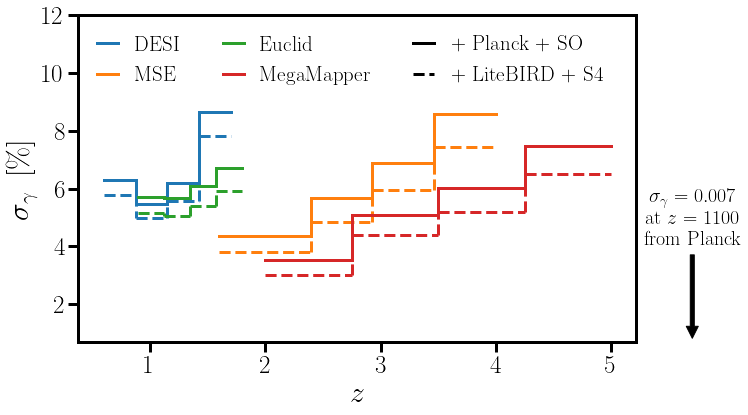

In [35]:
# DESI + SO
F = fishcast.combine_fishers([Planck_SO[:6,:6], F_desi_gamma_so],6)
F = fishcast.combine_fishers([F,gammafied_rsd(F_desi_rsd)],11+4*5)
sg_desi_so = sg(F)
# + S4
F = fishcast.combine_fishers([LiteBird_S4[:6,:6], F_desi_gamma_s4],6)
F = fishcast.combine_fishers([F,gammafied_rsd(F_desi_rsd)],11+4*5)
sg_desi_s4 = sg(F)
# + 21
F = fishcast.combine_fishers([LiteBird_S4[:6,:6], F_desi_gamma_s4],6)
F = fishcast.combine_fishers([F,gammafied_rsd(F_desi_rsd)],11+4*5)
F = fishcast.combine_fishers([F,gammafied_rsd(F_puma32opt)],11)
sg_desi_s4_21 = sg(F)

# MSE + SO
F = fishcast.combine_fishers([Planck_SO[:6,:6], F_mse_gamma_so],6)
F = fishcast.combine_fishers([F,gammafied_rsd(F_mse_rsd)],11+4*5)
sg_mse_so = sg(F)
# + S4
F = fishcast.combine_fishers([LiteBird_S4[:6,:6], F_mse_gamma_s4],6)
F = fishcast.combine_fishers([F,gammafied_rsd(F_mse_rsd)],11+4*5)
sg_mse_s4 = sg(F)

# Euclid + SO
F = fishcast.combine_fishers([Planck_SO[:6,:6], F_euc_gamma_so],6)
F = fishcast.combine_fishers([F,gammafied_rsd(F_euc_rsd)],11+4*5)
sg_euc_so = sg(F)
# + S4
F = fishcast.combine_fishers([LiteBird_S4[:6,:6], F_euc_gamma_s4],6)
F = fishcast.combine_fishers([F,gammafied_rsd(F_euc_rsd)],11+4*5)
sg_euc_s4 = sg(F)

# MegaMapper + SO
F = fishcast.combine_fishers([Planck_SO[:6,:6], F_mega_gamma_so],6)
F = fishcast.combine_fishers([F,gammafied_rsd(F_mega_rsd)],11+4*5)
sg_mega_so = sg(F)
# + S4
F = fishcast.combine_fishers([LiteBird_S4[:6,:6], F_mega_gamma_s4],6)
F = fishcast.combine_fishers([F,gammafied_rsd(F_mega_rsd)],11+4*5)
sg_mega_s4 = sg(F)



###########################################################
plt.figure(figsize=(10,6))

plot_step(plt,desiCast.experiment.zedges,100*sg_desi_so,label='DESI',c='C0')
plot_step(plt,desiCast.experiment.zedges,100*sg_desi_s4,c='C0',ls='--')
#plot_step(desiCast.experiment.zedges,sg_desi_s4_21,c='C0',ls='dotted')

plot_step(plt,mseCast.experiment.zedges,100*sg_mse_so,label='MSE',c='C1')
plot_step(plt,mseCast.experiment.zedges,100*sg_mse_s4,c='C1',ls='--')
#plot_step(mseCast.experiment.zedges,sg_mse_s4_21,c='C1',ls='dotted')


plot_step(plt,eucCast.experiment.zedges,100*sg_euc_so,label='Euclid',c='C2')
plot_step(plt,eucCast.experiment.zedges,100*sg_euc_s4,c='C2',ls='--')
#plot_step(eucCast.experiment.zedges,sg_euc_s4_21,c='C2',ls='dotted')



plot_step(plt,megaCast.experiment.zedges,100*sg_mega_so,label='MegaMapper',c='C3')
plot_step(plt,megaCast.experiment.zedges,100*sg_mega_s4,c='C3',ls='--')
#plot_step(megaCast.experiment.zedges,sg_mega_s4_21,c='C3',ls='dotted')
plt.plot([],[],c='k',lw=3,label=r'$+$ Planck $+$ SO')
plt.plot([],[],c='k',lw=3,ls='--',label=r'$+$ LiteBIRD $+$ S4')


plt.annotate(r'$\sigma_\gamma = 0.007$'+'\n'+r'at $z=1100$'+'\n'+'from Planck', xy=(1.1, 100*0.0065),  xycoords=('axes fraction','data'),
            xytext=(1.1, 100*0.06), textcoords=('axes fraction','data'),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top',fontsize=20)
            

plt.legend(loc='upper left',frameon=False,ncol=3,handlelength=1,fontsize=21)

plt.ylim(100*7e-3,100*1.2e-1)
plt.yscale('linear')
plt.xlabel(r'$z$')
plt.ylabel(r'$\sigma_\gamma\,\,\,[\%]$')
plt.savefig('figures/gravitational_slip.pdf',bbox_inches='tight')

## Distance measures, comparison with Seo & Eisenstein (2007)

In [17]:
def get_distance_measures(cast):
   cast.recon = True
   basis_recon = np.array(['alpha_perp','alpha_parallel','b'])
   if cast.experiment.HI: basis_recon = np.array(['alpha_perp','alpha_parallel','b','Tb'])
   deriv_recon = cast.load_derivatives(basis_recon)
   zs = cast.experiment.zcenters
   n = len(zs)
   Fs = [cast.gen_fisher(basis_recon,100,derivatives=deriv_recon,zbins=np.array([i])) for i in range(n)]
   Finvs = [np.linalg.inv(Fs[i]) for i in range(n)]
   saperp = [np.sqrt(Finvs[i][0,0]) for i in range(n)]
   saparr = [np.sqrt(Finvs[i][1,1]) for i in range(n)]
   cast.recon = False
   return cast.experiment.zedges, np.array(saperp), np.array(saparr)

In [18]:
def plot_step(a,edges,sg,c='C0',lw=3,ls='-',label=''):
   a.plot([],[],c=c,lw=lw,ls=ls,label=label)
   for i in range(len(sg)):
      a.plot([edges[i],edges[i+1]],[sg[i],sg[i]],c=c,lw=lw,ls=ls) 
   for i in range(len(sg)-1):
      a.plot([edges[i+1],edges[i+1]],[sg[i],sg[i+1]],c=c,lw=lw,ls=ls)
        
def fill_step(a,edges,sg,sg2,alpha=0.3,c='C0',label=''):
   a.fill_between([],[],[],color=c,label=label,alpha=alpha)
   x = [];y=[];z=[]
   for i in range(len(sg)): x+=[edges[i],edges[i+1]]; y+=[sg[i],sg[i]];z+=[sg2[i],sg2[i]]
   a.fill_between(x,y,z,color=c,alpha=alpha)

In [19]:
zs_desi, saperp_desi, saparr_desi = get_distance_measures(desiCast)
zs_euc, saperp_euc, saparr_euc = get_distance_measures(eucCast)
zs_mse, saperp_mse, saparr_mse = get_distance_measures(mseCast)
zs_mega, saperp_mega, saparr_mega = get_distance_measures(megaCast)

In [20]:
zs_puma32opt, saperp_puma32opt, saparr_puma32opt = get_distance_measures(puma32optCast)
zs_puma32pess, saperp_puma32pess, saparr_puma32pess = get_distance_measures(puma32pessCast)
zs_puma5opt, saperp_puma5opt, saparr_puma5opt = get_distance_measures(puma5optCast)
zs_puma5pess, saperp_puma5pess, saparr_puma5pess = get_distance_measures(puma5pessCast)

In [32]:
redshift_bins = np.array([zs_desi,zs_euc,zs_mega,zs_mse,zs_puma32opt,zs_puma32pess])
saperp = np.array([saperp_desi,saperp_euc,saperp_mega,saperp_mse,saperp_puma32opt,saperp_puma32pess])
saparr = np.array([saparr_desi,saparr_euc,saparr_mega,saparr_mse,saparr_puma32opt,saparr_puma32pess])
ode = np.array([ode_desi,ode_euc,ode_mega,ode_mse,ode_puma32opt,ode_puma32pess])

In [56]:
# Columns are: DESI, Euclid, MegaMapper, MSE, PUMA-32K (optimistic), PUMA-32K (pessimistic)
np.savetxt('../redshift_bin_edges.txt',redshift_bins.T)
np.savetxt('../Da.txt',saperp.T)
np.savetxt('../Hz.txt',saparr.T)
np.savetxt('../OmDE.txt',ode.T)

In [59]:
np.savetxt('../s8_fixed_shape.txt',s8_fixed.T)
np.savetxt('../s8_fixed_shape_wLensing.txt',s8_fixed_lens.T)

In [81]:
zs_hiraxOpt, saperp_hiraxOpt, saparr_hiraxOpt = get_distance_measures(hiraxOptCast)
zs_hiraxPess, saperp_hiraxPess, saparr_hiraxPess = get_distance_measures(hiraxPessCast)

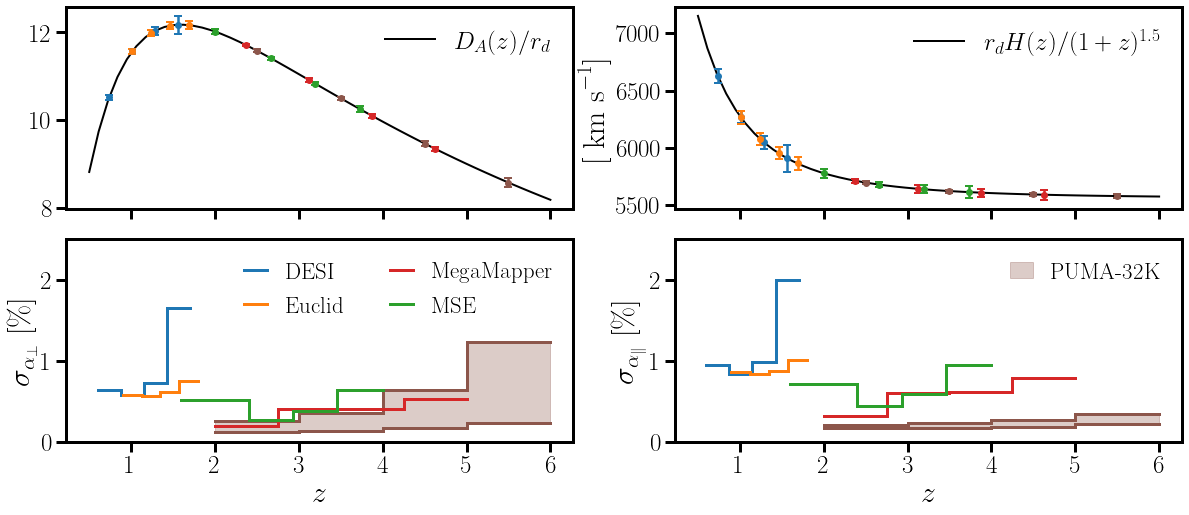

In [83]:
fig, ax = plt.subplots(2,2,figsize=(20,8),gridspec_kw={'width_ratios':[1,1], 'height_ratios':[1,1],'hspace':0.15},sharex=True)

zs = np.linspace(0.5,6,50)
rd = cosmo.rs_drag()*params['h']
Da = np.array([cosmo.angular_distance(z)*params['h'] for z in zs])/rd
Hz = np.array([cosmo.Hubble(z)*(299792.458)/params['h'] for z in zs])*rd
ax[0,0].plot(zs,Da,c='k',lw=2,label=r'$D_A(z)/r_d$')
ax[0,1].plot(zs,Hz/(1+zs)**1.5,c='k',lw=2,label=r'$r_d H(z)/(1+z)^{1.5}$')

ebar_kwargs = {'capsize':4, 'elinewidth':2.5, 'markeredgewidth':2, 'markersize':10}

zs = hiraxOptCast.experiment.zcenters
Da = np.array([cosmo.angular_distance(z)*params['h'] for z in zs])/rd
Hz = np.array([cosmo.Hubble(z)*(299792.458)/params['h'] for z in zs])*rd
#ax[0,0].errorbar(zs,Da,yerr=Da*saperp_hiraxPess,c='C4',ls='',lw=3,zorder=3,marker='.',**ebar_kwargs)
#ax[0,1].errorbar(zs,Hz/(1+zs)**1.5,yerr=Hz*saparr_hiraxPess/(1+zs)**1.5,c='C4',ls='',lw=3,zorder=3,marker='.',**ebar_kwargs)
#
zs = puma32optCast.experiment.zcenters
Da = np.array([cosmo.angular_distance(z)*params['h'] for z in zs])/rd
Hz = np.array([cosmo.Hubble(z)*(299792.458)/params['h'] for z in zs])*rd
ax[0,0].errorbar(zs,Da,yerr=Da*saperp_puma32pess,c='C5',ls='',lw=3,zorder=3,marker='.',**ebar_kwargs)
ax[0,1].errorbar(zs,Hz/(1+zs)**1.5,yerr=Hz*saparr_puma32pess/(1+zs)**1.5,c='C5',ls='',lw=3,zorder=3,marker='.',**ebar_kwargs)
#
zs = desiCast.experiment.zcenters
Da = np.array([cosmo.angular_distance(z)*params['h'] for z in zs])/rd
Hz = np.array([cosmo.Hubble(z)*(299792.458)/params['h'] for z in zs])*rd
ax[0,0].errorbar(zs,Da,yerr=Da*saperp_desi,c='C0',ls='',lw=3,zorder=3,marker='.',**ebar_kwargs)
ax[0,1].errorbar(zs,Hz/(1+zs)**1.5,yerr=Hz*saparr_desi/(1+zs)**1.5,c='C0',ls='',lw=3,zorder=3,marker='.',**ebar_kwargs)
#
zs = eucCast.experiment.zcenters
Da = np.array([cosmo.angular_distance(z)*params['h'] for z in zs])/rd
Hz = np.array([cosmo.Hubble(z)*(299792.458)/params['h'] for z in zs])*rd
ax[0,0].errorbar(zs,Da,yerr=Da*saperp_euc,c='C1',ls='',lw=3,zorder=3,marker='.',**ebar_kwargs)
ax[0,1].errorbar(zs,Hz/(1+zs)**1.5,yerr=Hz*saparr_euc/(1+zs)**1.5,c='C1',ls='',lw=3,zorder=3,marker='.',**ebar_kwargs)
#
zs = megaCast.experiment.zcenters
Da = np.array([cosmo.angular_distance(z)*params['h'] for z in zs])/rd
Hz = np.array([cosmo.Hubble(z)*(299792.458)/params['h'] for z in zs])*rd
ax[0,0].errorbar(zs,Da,yerr=Da*saperp_mega,c='C3',ls='',lw=3,zorder=3,marker='.',**ebar_kwargs)
ax[0,1].errorbar(zs,Hz/(1+zs)**1.5,yerr=Hz*saparr_mega/(1+zs)**1.5,c='C3',ls='',lw=3,zorder=3,marker='.',**ebar_kwargs)
#
zs = mseCast.experiment.zcenters
Da = np.array([cosmo.angular_distance(z)*params['h'] for z in zs])/rd
Hz = np.array([cosmo.Hubble(z)*(299792.458)/params['h'] for z in zs])*rd
ax[0,0].errorbar(zs,Da,yerr=Da*saperp_mse,c='C2',ls='',lw=3,zorder=3,marker='.',**ebar_kwargs)
ax[0,1].errorbar(zs,Hz/(1+zs)**1.5,yerr=Hz*saparr_mse/(1+zs)**1.5,c='C2',ls='',lw=3,zorder=3,marker='.',**ebar_kwargs)


#plot_step(ax[1,0],zs_hiraxPess,saperp_hiraxOpt*100,c='C4')
#plot_step(ax[1,1],zs_hiraxPess,saparr_hiraxOpt*100,c='C4')
#fill_step(ax[1,0],zs_hiraxPess,saperp_hiraxOpt*100,saperp_hiraxPess*100,c='C4')

#plot_step(ax[1,0],zs_hiraxPess,saperp_hiraxPess*100,c='C4')
#plot_step(ax[1,1],zs_hiraxPess,saparr_hiraxPess*100,c='C4')
#fill_step(ax[1,1],zs_hiraxPess,saparr_hiraxOpt*100,saparr_hiraxPess*100,c='C4',label='HIRAX')

plot_step(ax[1,0],zs_puma32pess,saperp_puma32opt*100,c='C5')
plot_step(ax[1,1],zs_puma32pess,saparr_puma32opt*100,c='C5')
fill_step(ax[1,0],zs_puma32pess,saperp_puma32opt*100,saperp_puma32pess*100,c='C5')

plot_step(ax[1,0],zs_puma32pess,saperp_puma32pess*100,c='C5')
plot_step(ax[1,1],zs_puma32pess,saparr_puma32pess*100,c='C5')
fill_step(ax[1,1],zs_puma32pess,saparr_puma32opt*100,saparr_puma32pess*100,c='C5',label='PUMA-32K')

plot_step(ax[1,0],zs_desi,saperp_desi*100,c='C0',label='DESI')
plot_step(ax[1,1],zs_desi,saparr_desi*100,c='C0')

plot_step(ax[1,0],zs_euc,saperp_euc*100,c='C1',label='Euclid')
plot_step(ax[1,1],zs_euc,saparr_euc*100,c='C1')

plot_step(ax[1,0],zs_mega,saperp_mega*100,c='C3',label='MegaMapper')
plot_step(ax[1,1],zs_mega,saparr_mega*100,c='C3')

plot_step(ax[1,0],zs_mse,saperp_mse*100,c='C2',label='MSE')
plot_step(ax[1,1],zs_mse,saparr_mse*100,c='C2')


ax[1,0].set_ylabel(r'$\sigma_{\alpha_\perp}\,\,[\%]$')
ax[1,1].set_ylabel(r'$\sigma_{\alpha_\parallel}\,\,[\%]$')
ax[1,0].set_xlabel(r'$z$')
ax[1,1].set_xlabel(r'$z$')
ax[1,0].legend(loc='upper right',handlelength=1,ncol=2,frameon=False,fontsize=23)
ax[1,1].legend(loc='upper right',handlelength=1,ncol=1,frameon=False,fontsize=23)
ax[1,0].set_ylim(0,2.5)
ax[1,1].set_ylim(0,2.5)

ax[0,1].set_ylabel(r'$[\text{ km s}^{-1}]$')

ax[0,0].legend(loc='upper right',frameon=False)
ax[0,1].legend(loc='upper right',frameon=False)

ax[1,0].set_xticks([1,2,3,4,5,6])

plt.savefig('figures/distance_constraints.pdf',bbox_inches='tight')

In [58]:
from input.bao_forecast import fisher,growth

In [59]:
def SE07(cast,i):
   area = 41253*cast.experiment.fsky
   zcen = cast.experiment.zcenters[i]
   dz = cast.experiment.zedges[i+1]-cast.experiment.zedges[i]
   nbar = compute_n(cast,cast.experiment.zcenters[i]) # I'm bullshitting this
   if cast.experiment.HI: nbar = castorinaPn(cast.experiment.zcenters[i])
   bias = compute_b(cast,zcen) * growth(zcen,0.31)
   F = fisher(zcen,dz,area=area,nbar=nbar,bias=bias,s8=0.81,omm=0.31,recon=True, mu_min=0.0)[0]
   return np.sqrt(np.diag(np.linalg.inv(F)))

def SeoEis(cast):
   result = []
   for i in range(4): result.append(SE07(cast,i))
   r = np.array(result).T
   return r[0],r[1]

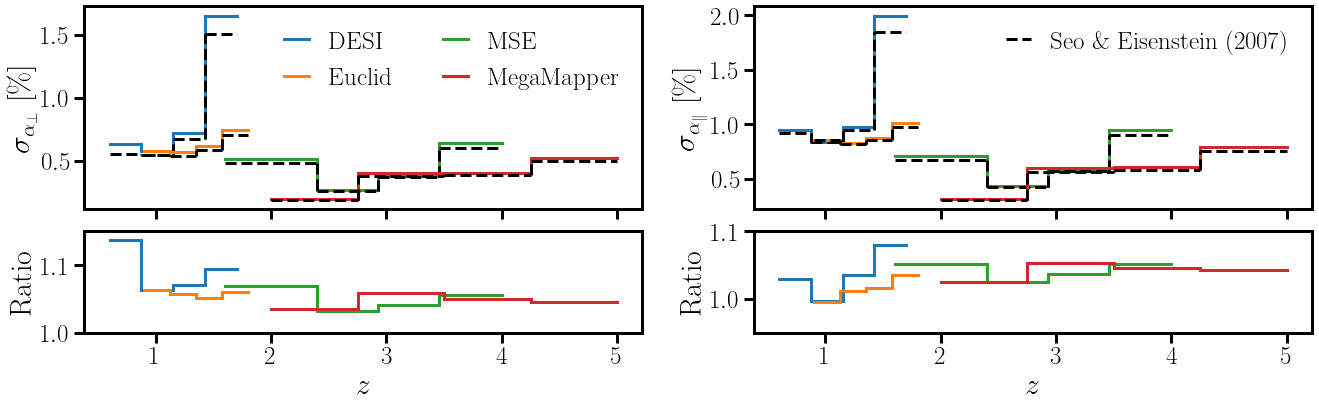

In [60]:
fig,ax = plt.subplots(2,2,figsize=(22,6),gridspec_kw={'width_ratios':[1,1], 'height_ratios':[1,0.5],'hspace':0.15},sharex=True)

def make_plot(cast,saperp,saparr,c,label=''):
   zs = cast.experiment.zedges
   x,y = SeoEis(cast)
   plot_step(ax[0,0],zs,saperp*100,c=c,label=label)
   plot_step(ax[0,1],zs,saparr*100,c=c)
   plot_step(ax[0,0],zs,x,c='k',ls='--')
   plot_step(ax[0,1],zs,y,c='k',ls='--')

   plot_step(ax[1,0],zs,saperp*100/x,c=c)
   plot_step(ax[1,1],zs,saparr*100/y,c=c)
    
make_plot(desiCast,saperp_desi,saparr_desi,c='C0',label='DESI')
make_plot(eucCast,saperp_euc,saparr_euc,c='C1',label='Euclid')
make_plot(mseCast,saperp_mse,saparr_mse,c='C2',label='MSE')
make_plot(megaCast,saperp_mega,saparr_mega,c='C3',label='MegaMapper')


ax[0,0].legend(loc='upper right',frameon=False,ncol=2,fontsize=25,handlelength=1)
ax[0,1].plot([],[],c='k',ls='--',lw=3,label='Seo \& Eisenstein (2007)')
ax[0,1].legend(loc='upper right',frameon=False,ncol=2,fontsize=25,handlelength=1)

ax[1,0].set_xlabel(r'$z$')
ax[1,1].set_xlabel(r'$z$')


ax[0,0].set_ylabel(r'$\sigma_{\alpha_\perp}\,\,[\%]$')
ax[0,1].set_ylabel(r'$\sigma_{\alpha_\parallel}\,\,[\%]$')

ax[1,0].set_ylim(1,1.15)
ax[1,1].set_ylim(0.95,1.1)
ax[1,0].set_ylabel(r'Ratio')
ax[1,1].set_ylabel(r'Ratio')

plt.savefig('figures/bao_comparison.pdf',bbox_inches='tight')

# Model-independent dark energy constraints
## $\Omega_m(z) = \frac{\omega_m (1+z)^3}{h^2(z)}$
## $\sigma_{\Omega_m(z)}/\Omega_m(z) = \sqrt{4 [\sigma_{h(z)}/h(z)]^2 + [\sigma_{\omega_m}/\omega_m]^2}$


## $\sigma_{\Omega_m(z)} = 2 \frac{\omega_m (1+z)^3}{h^2(z)} \sigma_{\alpha_\parallel(z)}$

In [84]:
# DESI, Euclid, MSE, MegaMapper, HIRAX, PUMA-5K, PUMA-32K (opt/pess)
# HIRAX numbers are made up
s_omm = np.array([2.7]*10)*1e-4
s_omb = np.array([0.0]*10) 

zs_desi, saperp_desi, saparr_desi = get_distance_measures(desiCast)
zs_euc, saperp_euc, saparr_euc = get_distance_measures(eucCast)
zs_mse, saperp_mse, saparr_mse = get_distance_measures(mseCast)
# 
zs_mega, saperp_mega, saparr_mega = get_distance_measures(megaCast)
#
zs_hiraxOpt, saperp_hiraxOpt, saparr_hiraxOpt = get_distance_measures(hiraxOptCast)
zs_hiraxPess, saperp_hiraxPess, saparr_hiraxPess = get_distance_measures(hiraxPessCast)
#
zs_puma5opt, saperp_puma5opt, saparr_puma5opt = get_distance_measures(puma5optCast)
zs_puma5pess, saperp_puma5pess, saparr_puma5pess = get_distance_measures(puma5pessCast)
#
zs_puma32opt, saperp_puma32opt, saparr_puma32opt = get_distance_measures(puma32optCast)
zs_puma32pess, saperp_puma32pess, saparr_puma32pess = get_distance_measures(puma32pessCast)

In [26]:
s_omm = np.array([2.7]*10)*1e-4
s_omb = np.array([0.0]*10) 

In [27]:
def Omega_M(z):
   omm = params['omega_cdm']+params['omega_b']
   h = cosmo.Hubble(z)*(299792.458)/100
   return omm*(1+z)**3/h**2

def get_s_OmegaDE(cast,saparr,sm,sb):
   zs = cast.experiment.zcenters
   ODE = np.array([Omega_M(z) for z in zs])
   omm = params['omega_cdm']+params['omega_b']
   result = 4*saparr**2 + (sm**2+sb**2)/omm**2
   result *= ODE**2
   return 100*result**0.5

In [29]:
ode_desi = get_s_OmegaDE(desiCast,saparr_desi,s_omm[0],s_omb[0])
ode_euc = get_s_OmegaDE(eucCast,saparr_euc,s_omm[1],s_omb[1])
ode_mse = get_s_OmegaDE(mseCast,saparr_mse,s_omm[2],s_omb[2])
ode_mega = get_s_OmegaDE(megaCast,saparr_mega,s_omm[3],s_omb[3])

#ode_hiraxOpt = get_s_OmegaDE(hiraxOptCast,saparr_hiraxPess,s_omm[4],s_omb[4])
#ode_hiraxPess = get_s_OmegaDE(hiraxPessCast,saparr_hiraxOpt,s_omm[5],s_omb[5])

ode_puma5opt = get_s_OmegaDE(puma5optCast,saparr_puma5opt,s_omm[6],s_omb[6])
ode_puma5pess = get_s_OmegaDE(puma5pessCast,saparr_puma5pess,s_omm[7],s_omb[7])

ode_puma32opt = get_s_OmegaDE(puma32optCast,saparr_puma32opt,s_omm[8],s_omb[8])
ode_puma32pess = get_s_OmegaDE(puma32pessCast,saparr_puma32pess,s_omm[9],s_omb[9])

In [87]:
ode_desi2 = get_s_OmegaDE(desiCast,saparr_desi,s_omm[0]*0,s_omb[0]*0)
ode_euc2 = get_s_OmegaDE(eucCast,saparr_euc,s_omm[1]*0,s_omb[1]*0)
ode_mse2 = get_s_OmegaDE(mseCast,saparr_mse,s_omm[2]*0,s_omb[2]*0)
ode_mega2 = get_s_OmegaDE(megaCast,saparr_mega,s_omm[3]*0,s_omb[3]*0)

ode_hiraxOpt2 = get_s_OmegaDE(hiraxOptCast,saparr_hiraxPess,s_omm[4]*0,s_omb[4]*0)
ode_hiraxPess2 = get_s_OmegaDE(hiraxPessCast,saparr_hiraxOpt,s_omm[5]*0,s_omb[5]*0)

ode_puma5opt2 = get_s_OmegaDE(puma5optCast,saparr_puma5opt,s_omm[6]*0,s_omb[6]*0)
ode_puma5pess2 = get_s_OmegaDE(puma5pessCast,saparr_puma5pess,s_omm[7]*0,s_omb[7]*0)

ode_puma32opt2 = get_s_OmegaDE(puma32optCast,saparr_puma32opt,s_omm[8]*0,s_omb[8]*0)
ode_puma32pess2 = get_s_OmegaDE(puma32pessCast,saparr_puma32pess,s_omm[9]*0,s_omb[9]*0)

In [88]:
def plot_OmM_error(ax,zs,ode,c='C0'):
   zcs = (zs[1:] + zs[:-1])/2
   OmM = np.array([Omega_M(z) for z in zcs])
   ebar_kwargs = {'capsize':4, 'elinewidth':2.5, 'markeredgewidth':2, 'markersize':10}
   ax.errorbar(zcs,1-OmM,yerr=ode/100,color=c,ls='',lw=3,zorder=3,marker='.',**ebar_kwargs)

No handles with labels found to put in legend.


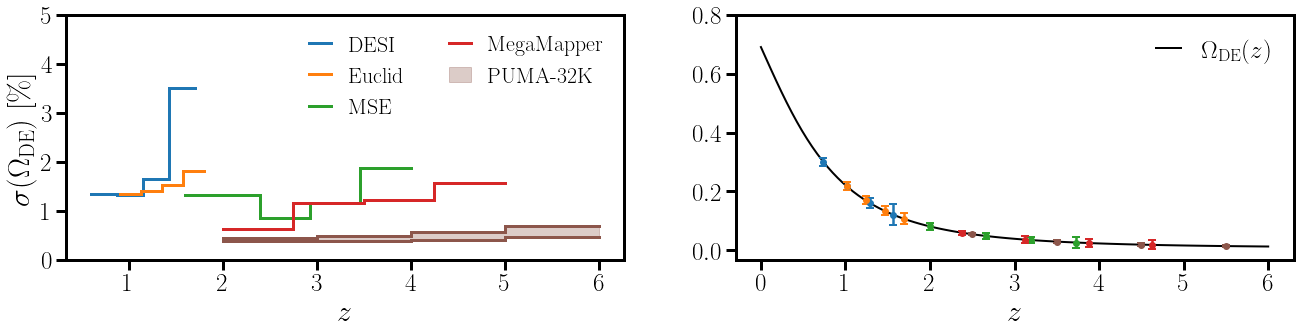

In [91]:
fig,ax = plt.subplots(1,2,figsize=(22,4.5))

plot_step(ax[0],zs_desi,ode_desi,c='C0',label='DESI')
plot_step(ax[0],zs_euc,ode_euc,c='C1',label='Euclid')
plot_step(ax[0],zs_mse,ode_mse,c='C2',label='MSE')
plot_step(ax[0],zs_mega,ode_mega,c='C3',label='MegaMapper')

#plot_step(ax[0],zs_hiraxPess,ode_hiraxOpt,c='C4')
#plot_step(ax[0],zs_hiraxPess,ode_hiraxPess,c='C4')
#fill_step(ax[0],zs_hiraxPess,ode_hiraxOpt,ode_hiraxPess,c='C4',label='HIRAX')

plot_step(ax[0],zs_puma5pess,ode_puma32opt,c='C5')
plot_step(ax[0],zs_puma5pess,ode_puma32pess,c='C5')
fill_step(ax[0],zs_puma5pess,ode_puma32opt,ode_puma32pess,c='C5',label='PUMA-32K')

ax[0].legend(frameon=False,ncol=2)
ax[1].legend(frameon=False,ncol=2)

zs = np.linspace(0,6,100)
ax[1].plot(zs,[(1-Omega_M(z)) for z in zs],c='k',lw=2,label=r'$\Omega_\text{DE}(z)$')
plot_OmM_error(ax[1],zs_desi,ode_desi,c='C0')
plot_OmM_error(ax[1],zs_euc,ode_euc,c='C1')
plot_OmM_error(ax[1],zs_mse,ode_mse,c='C2')
plot_OmM_error(ax[1],zs_mega,ode_mega,c='C3')
#plot_OmM_error(ax[1],zs_hiraxOpt,ode_hiraxOpt,c='C4')
plot_OmM_error(ax[1],zs_puma5pess,ode_puma32opt,c='C5')

ax[0].legend(fontsize=22,frameon=False,ncol=2,handlelength=1,loc='upper right')
ax[1].legend(frameon=False,handlelength=1)
ax[0].set_xlabel(r'$z$')
ax[1].set_xlabel(r'$z$')
ax[0].set_yticks([0,1,2,3,4,5])
ax[1].set_yticks([0,0.2,0.4,0.6,0.8])

ax[0].set_ylabel(r'$\sigma(\Omega_\text{DE})\,\,[\%]$')

plt.savefig('figures/Omega_DE.pdf',bbox_inches='tight')

## Non-linear vs linear derivatives

In [28]:
params2 = params.copy()

cosmo2 = Class()
cosmo2.set(params2)
cosmo2.compute()
#
exp = experiment(zmin=2., zmax=5., nbins=3, fsky=0.34, sigma_z=0.0, LBG=True)
#
fLinear = fisherForecast(experiment=exp,cosmo=cosmo2,params=params2,khmin=5.e-4,\
                         khmax=1.,Nk=1000,Nmu=200,velocileptors=False,linear=True,name='Linear',AP=True)
fNonLinear = fisherForecast(experiment=exp,cosmo=cosmo2,params=params2,khmin=5.e-4,\
                         khmax=1.,Nk=1000,Nmu=200,velocileptors=True,linear=False,name='NonLinear',AP=True)

In [33]:
dPdp = fLinear.compute_dPdp('log(A_s)',2.5,five_point=True)
np.savetxt('output/Linear/derivatives/log(A_s)_250.txt',dPdp)
dPdp = fNonLinear.compute_dPdp('log(A_s)',2.5,five_point=True)
np.savetxt('output/NonLinear/derivatives/log(A_s)_250.txt',dPdp)

dPdp = fLinear.compute_dPdp('m_ncdm',2.5,five_point=True)
np.savetxt('output/Linear/derivatives/m_ncdm_250.txt',dPdp)
dPdp = fNonLinear.compute_dPdp('m_ncdm',2.5,five_point=True)
np.savetxt('output/NonLinear/derivatives/m_ncdm_250.txt',dPdp)

dPdp = fLinear.compute_dPdp('omega_cdm',2.5,five_point=True)
np.savetxt('output/Linear/derivatives/omega_cdm_250.txt',dPdp)
dPdp = fNonLinear.compute_dPdp('omega_cdm',2.5,five_point=True)
np.savetxt('output/NonLinear/derivatives/omega_cdm_250.txt',dPdp)

dPdp = fLinear.compute_dPdp('N_ur',2.5,five_point=True)
np.savetxt('output/Linear/derivatives/N_ur_250.txt',dPdp)
dPdp = fNonLinear.compute_dPdp('N_ur',2.5,five_point=True)
np.savetxt('output/NonLinear/derivatives/N_ur_250.txt',dPdp)

/home/noah/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


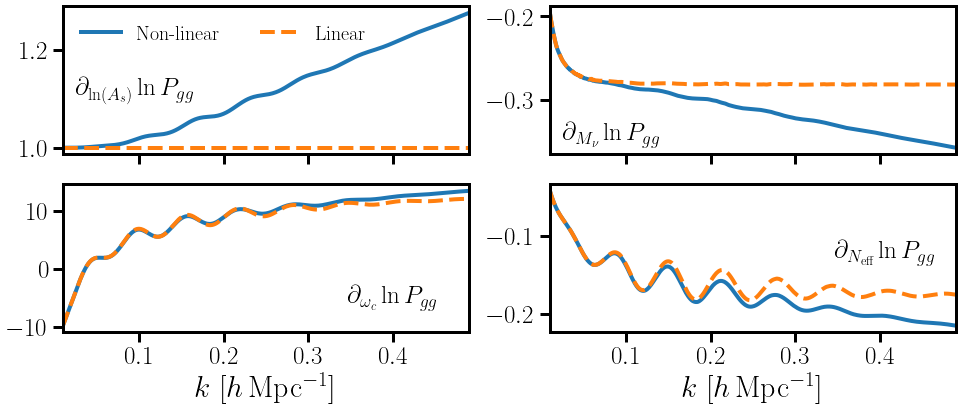

In [47]:
k = np.linspace(0.01,0.14*(1+2.5),1000)

fig,axs = plt.subplots(2,2,figsize=(16,6), gridspec_kw={'hspace': 0.2,'wspace':0.2})

def get_derivatives(i,j,param):
   x = np.genfromtxt('output/NonLinear/derivatives/'+param+'_250.txt')
   x1 = fishcast.get_f_at_fixed_mu(x,0)
   x = np.genfromtxt('output/Linear/derivatives/'+param+'_250.txt')
   x2 = fLinear.get_f_at_fixed_mu(x,0)
   axs[i,j].plot(k,x1(k)/ptFiducial(k),lw=4,c='C0')
   axs[i,j].plot(k,x2(k)/linearFiducial(k),lw=4,ls='--',c='C1')
   return
   

get_derivatives(0,0,'log(A_s)')
get_derivatives(0,1,'m_ncdm')
get_derivatives(1,0,'omega_cdm')
get_derivatives(1,1,'N_ur')

axs[0,0].set_xticklabels([])
axs[0,1].set_xticklabels([])

axs[0,0].plot([],[],c='C0',label=r'Non-linear',lw=4)
axs[0,0].plot([],[],c='C1',label='Linear',lw=4,ls='--')
axs[0,0].legend(loc='upper left',frameon=False,ncol=3,fontsize=20)

axs[0,0].text(0.03,0.4,r'$\partial_{\ln(A_s)} \ln P_{gg}$',transform=axs[0,0].transAxes,fontsize=25)
axs[0,1].text(0.03,0.1,r'$\partial_{M_\nu}\ln P_{gg}$',transform=axs[0,1].transAxes,fontsize=25)
axs[1,0].text(0.7,0.2,r'$\partial_{\omega_c} \ln P_{gg}$',transform=axs[1,0].transAxes,fontsize=25)
axs[1,1].text(0.7,0.5,r'$\partial_{N_\text{eff}} \ln P_{gg}$',transform=axs[1,1].transAxes,fontsize=25)

axs[0,0].set_xlim(k[0],k[-1])
axs[0,1].set_xlim(k[0],k[-1])
axs[1,0].set_xlim(k[0],k[-1])
axs[1,1].set_xlim(k[0],k[-1])

axs[1,0].set_xlabel(r'$k$ [$h\,$Mpc$^{-1}$]')
axs[1,1].set_xlabel(r'$k$ [$h\,$Mpc$^{-1}$]')

plt.tight_layout()
plt.savefig('figures/lin_vs_nonlin.pdf',bbox_inches='tight')

## When do redshift errors start to matter?

In [33]:
def H(z): return cosmo.Hubble(z)*(299792.458)/params['h']
def sigma_min(z): return np.sqrt(fishcast.Sigma2(z)) * H(z) / (1+z) / 299792.458

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


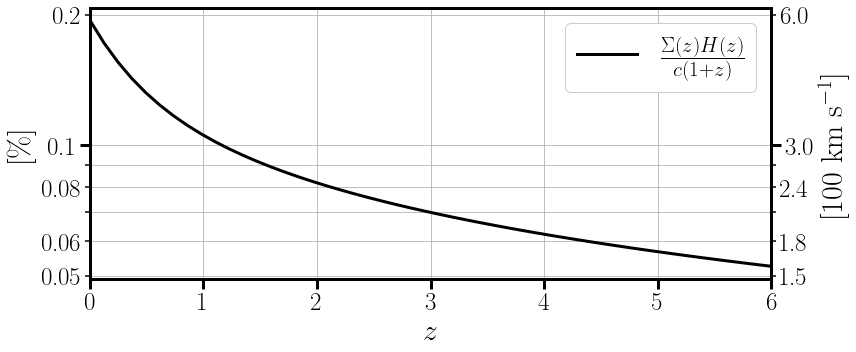

In [34]:
fig, ax = plt.subplots(figsize=(12,5))

zs = np.linspace(0,6)
ax.semilogy(zs,[sigma_min(z)*100. for z in zs],lw=3,c='k',label=r'$\frac{\Sigma(z)H(z)}{c(1+z)}$')
ax.set_xlim(0,6)
ax.set_xlabel(r'$z$')
ax.set_ylabel(r'[\%]')

def conversion(x): return x*3.e5/100./100.
def conversion_inverse(x): return x*100.*100./3.e5

secax = ax.secondary_yaxis('right', functions=(conversion,conversion_inverse))
secax.set_ylabel(r'[100 km s$^{-1}$]')

ax.set_yticks([0.1])
ax.set_yticks([0.05,0.06,0.07,0.08,0.09,0.2],minor=True)
ax.set_yticklabels(['0.1'])
ax.set_yticklabels(['0.05','0.06','','0.08','','0.2'],minor=True)

secax.set_yticks(conversion(np.array([0.1])))
secax.set_yticks(conversion(np.array([0.05,0.06,0.07,0.08,0.09,0.2])),minor=True)
secax.set_yticklabels([str(conversion(0.1))])
secax.set_yticklabels([str(conversion(0.05)),str(conversion(0.06)),'',str(conversion(0.08)),'',str(conversion(0.2))],minor=True)

plt.legend(loc='upper right',framealpha=1,fontsize=30)
plt.grid(which='both')
plt.tight_layout()
plt.savefig('figures/redshift_uncertainty.pdf',bbox_inches='tight')

# $k_\text{max}$ and $\bar{n}$ vs $z$

In [4]:
zs = np.linspace(2,5,100)
knl = np.array([1./np.sqrt(fishcast.Sigma2(z)) for z in zs])  # h/Mpc
n = np.array([LBGn(fishcast, z) for z in zs])
b = np.array([LBGb(fishcast,z) for z in zs])
chi = np.array([(1.+z)*cosmo.angular_distance(z) for z in zs]) * params['h']  # Mpc/h

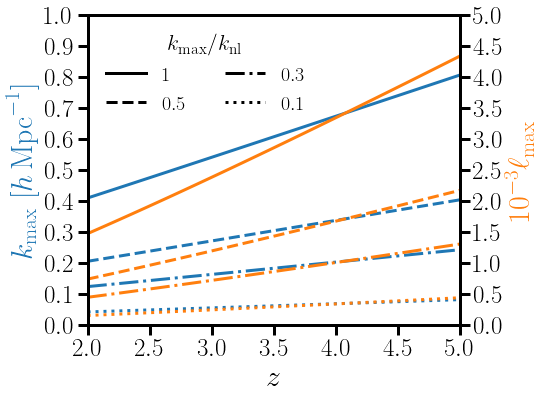

In [405]:
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(zs,knl,color='C0',lw=3,label='$1$')
ax.plot(zs,0.5*knl,color='C0',lw=3,label='$0.5$',ls='dashed')
ax.plot(zs,0.3*knl,color='C0',lw=3,label='$0.3$',ls='dashdot')
ax.plot(zs,0.1*knl,color='C0',lw=3,label='$0.1$',ls='dotted')
# set x-axis label
ax.set_xlabel(r'$z$')
# set y-axis label
ax.set_ylabel(r'$k_\text{max}$ [$h\,{\rm Mpc}^{-1}$]',color='C0')
ax.set_yticks(ticks=np.linspace(0,1,11))
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.set_yticks(ticks=np.linspace(0,5,11))
# make a plot with different y-axis using second axis object
ax2.plot(zs,knl*chi/1000,color='C1',lw=3,label='$1$')
ax2.plot(zs,0.5*knl*chi/1000,color='C1',lw=3,label='$0.5$',ls='dashed')
ax2.plot(zs,0.3*knl*chi/1000,color='C1',lw=3,label='$0.3$',ls='dashdot')
ax2.plot(zs,0.1*knl*chi/1000,color='C1',lw=3,label='$0.1$',ls='dotted')
ax2.set_ylabel(r'$10^{-3}\ell_\text{max}$',color='C1')
plt.xticks(ticks=np.linspace(2,5,7))
plt.xlim(2,5)
leg = ax.legend(loc='upper left',title=r'$k_\text{max}/k_\text{nl}$',ncol=2,frameon=False,fontsize=20)
for i in range(4): leg.legendHandles[i].set_color('k')
ax2.set_ylim(0,5)
ax.set_ylim(0,1)
plt.tight_layout()
plt.savefig('figures/kmax.pdf',bbox_inches='tight')

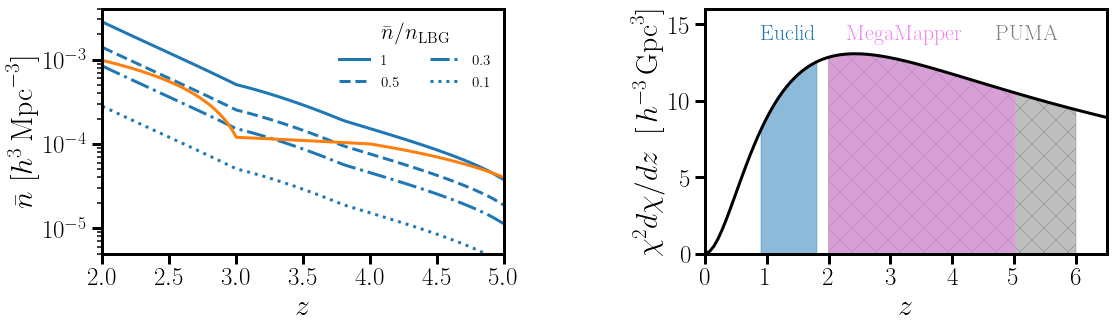

In [37]:
fig,ax = plt.subplots(1,2,figsize=(18,4.5),gridspec_kw={'hspace': 0,'wspace':0.5})

# ==========
# Panel 1
# ==========

ax[0].semilogy(zs,n,color='C0',lw=3,label='1')
ax[0].semilogy(zs,0.5*n,color='C0',lw=3,label='0.5',ls='dashed')
ax[0].semilogy(zs,0.3*n,color='C0',lw=3,label='0.3',ls='dashdot')
ax[0].semilogy(zs,0.1*n,color='C0',lw=3,label='0.1',ls='dotted')

mega_n_ideal = interp1d([2,2.5,3,3.5,4,4.5,5],np.array([25,12,6.0,3.0,1.5,0.8,0.4])*(1e-4),kind='linear')
mega_n_fid = interp1d([2,3,4,5],np.array([9.8,1.2,1.0,0.4])*(1e-4),kind='linear')
ax[0].semilogy(zs,mega_n_fid(zs),c='C1',lw=3)

ax[0].legend(loc='upper right',frameon=False,title=r'$\bar{n}/n_\text{LBG}$',
           fontsize=15,ncol=2)
ax[0].set_xticks(ticks=np.linspace(2,5,7))
ax[0].set_xlim(2,5)
ax[0].set_ylim(5e-6,4e-3)
ax[0].set_xlabel(r'$z$')
ax[0].set_ylabel(r'$\bar{n}\,\,[h^{3}\,{\rm Mpc}^{-3}]$')

# ==========
# Panel 2
# ==========

def chi(z): return (1.+z)*cosmo.angular_distance(z)*params['h']
def dchidz(z): return (chi(z+0.01) - chi(z-0.01))/0.02

zmin,zmax = eucCast.experiment.zmin,eucCast.experiment.zmax
zfill = np.linspace(zmin,zmax,50)
ax[1].fill_between(zfill,np.zeros(zfill.shape),[chi(z)**2*dchidz(z)/1e9 for z in zfill],color='C0',alpha=0.5,edgecolor='C0')

zmin,zmax = puma32optCast.experiment.zmin,puma32optCast.experiment.zmax
zfill = np.linspace(zmin,zmax,50)
ax[1].fill_between(zfill,np.zeros(zfill.shape),[chi(z)**2*dchidz(z)/1e9 for z in zfill],color='grey',alpha=0.5,edgecolor='grey',hatch='x')

zmin,zmax = megaCast.experiment.zmin,megaCast.experiment.zmax
zfill = np.linspace(zmin,zmax,50)
ax[1].fill_between(zfill,np.zeros(zfill.shape),[chi(z)**2*dchidz(z)/1e9 for z in zfill],color='violet',alpha=0.5)



zs2 = np.linspace(1e-2,6.5,100)
y = np.array([chi(z)**2*dchidz(z) for z in zs2])

ax[1].plot(zs2,y/1e9,lw=3,c='k',label=r'$\chi^2d\chi/dz$')
ax[1].set_xlim(0,6.5)
ax[1].set_ylim(0,16)
ax[1].set_xlabel(r'$z$')
ax[1].set_ylabel(r'$\chi^2 d\chi/dz\,\,\,[\,h^{-3}\,\text{Gpc}^3]$')
ax[1].set_xticks([0,1,2,3,4,5,6])

ax[1].text(0.9,14,'Euclid',color='C0')
ax[1].text(2.3,14,'MegaMapper',color='violet')
ax[1].text(4.7,14,'PUMA',color='grey')

plt.savefig('figures/nbar.pdf',bbox_inches='tight')

In [3]:
def chi(z): return (1.+z)*cosmo.angular_distance(z)*params['h']
def dchidz(z): return (chi(z+0.01) - chi(z-0.01))/0.02

In [7]:
chi(2)**2*dchidz(2)/1e9

12.844384513607052

In [5]:
dchidz(1)

1682.483933712956

## $b^2 n$ for various surveys

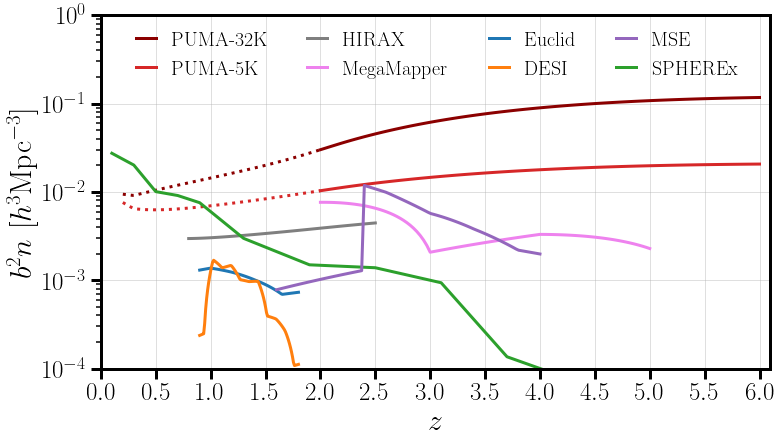

In [131]:
zz_kinda_low = np.linspace(2.,5.,100)
mega_b_ideal = interp1d([2,2.5,3,3.5,4,4.5,5],[2.5,3.3,4.1,4.9,5.8,6.6,7.4],kind='linear')(zz_kinda_low)
mega_n_ideal = interp1d([2,2.5,3,3.5,4,4.5,5],np.array([25,12,6.0,3.0,1.5,0.8,0.4])*(1e-4),kind='linear')(zz_kinda_low)
mega_b_fid = interp1d([2,3,4,5],[2.5,4.0,3.5,5.5],kind='linear')(zz_kinda_low)
mega_n_fid = interp1d([2,3,4,5],np.array([9.8,1.2,1.0,0.4])*(1e-4),kind='linear')(zz_kinda_low)
mega_b_fid = np.array([compute_b(fishcast,z) for z in zz_kinda_low])

zz = np.linspace(2.,6.,100)
HIbias = np.array([HIb(z) for z in zz])
fishcast.experiment.Ndetectors = 32e3 ; fishcast.experiment.tint = 5 ; fishcast.experiment.fill_factor = 0.5
HInumber_density32 = np.array([HIneff(fishcast,z)[1000] for z in zz])
fishcast.experiment.Ndetectors = 5e3 ; fishcast.experiment.tint = 5 ; fishcast.experiment.fill_factor = 0.5
HInumber_density5 = np.array([HIneff(fishcast,z)[1000] for z in zz])

zpuma_low = np.linspace(0.2,2,100)
HIbias_low = np.array([HIb(z) for z in zpuma_low])
fishcast.experiment.Ndetectors = 32e3 ; fishcast.experiment.tint = 5 ; fishcast.experiment.fill_factor = 0.5
HInumber_density32_low = np.array([HIneff(fishcast,z)[1000] for z in zpuma_low])
fishcast.experiment.Ndetectors = 5e3 ; fishcast.experiment.tint = 5 ; fishcast.experiment.fill_factor = 0.5
HInumber_density5_low = np.array([HIneff(fishcast,z)[1000] for z in zpuma_low])

zz_low = np.linspace(0.9,1.8,100)
Euclid_b = np.sqrt(1+zz_low)
Euclid_n = Euclidn(zz_low)

zz_lower = np.linspace(0.6,1.7,100)
ELGbias = np.array([ELGb(fishcast,z) for z in zz_lower])
ELGnumber_density = np.array([ELGn(fishcast,z) for z in zz_lower])

zz_mse = np.linspace(1.6,4,100)
MSEbias = np.array([MSEb(fishcast,z) for z in zz_mse])
MSEnumber_density = np.array([MSEn(fishcast,z) for z in zz_mse])

zz_hirax = np.linspace(0.8,2.5,100)
HIRAXbias = np.array([HIb(z) for z in zz_hirax])
fishcast.experiment.Ndetectors = 1e3 ; fishcast.experiment.tint = 4 ; fishcast.experiment.fill_factor = 1
HIRAXnumber_density = np.array([HIneff(fishcast,z)[1000] for z in zz_hirax])

##################################################################################
z_spherex = np.array([0.1,0.3,0.5,0.7,0.9,1.3,1.9,2.5,3.1,3.7,4.3])

n1_spherex = np.array([6.210e-03,1.540e-03,4.930e-05,1.430e-06,1.000e-09,1.000e-09,1.000e-09,1.000e-09,1.000e-09,2.210e-07,1.000e-09])
n2_spherex = np.array([8.200e-03,4.580e-03,7.180e-04,1.190e-04,2.310e-05,5.250e-07,2.170e-07,4.300e-07,1.000e-09,1.000e-09,1.000e-09])
n3_spherex = np.array([8.110e-03,6.150e-03,2.360e-03,1.440e-03,6.550e-04,4.200e-05,3.910e-06,3.700e-06,1.000e-09,4.420e-07,1.000e-09])
n4_spherex = np.array([1.340e-02,1.030e-02,4.320e-03,2.840e-03,2.120e-03,3.060e-04,4.240e-05,2.400e-05,1.040e-05,6.640e-07,4.850e-07])
n5_spherex = np.array([1.150e-02,6.390e-03,2.580e-03,2.930e-03,2.330e-03,5.050e-04,1.480e-04,9.150e-05,4.630e-05,2.430e-06,1.160e-06])

#bias; each row is a galaxy sample (i.e. a sigz0 bin), each column a redshift bin
b1_spherex = np.array([0.860,1.100,2.300,4.400,1.000,1.000,1.000,1.000,1.000,7.300,1.000])
b2_spherex = np.array([0.790,0.910,1.300,2.000,2.900,5.300,6.200,6.200,1.000,1.000,1.000])
b3_spherex = np.array([0.760,0.840,1.100,1.300,1.600,2.900,4.500,4.900,1.000,6.700,1.000])
b4_spherex = np.array([0.730,0.790,0.940,1.100,1.200,2.000,3.200,3.900,4.800,6.300,7.200])
b5_spherex = np.array([0.720,0.780,0.910,1.000,1.100,1.700,2.600,3.200,3.900,5.700,6.500])

n_spherex = n1_spherex + n2_spherex + n3_spherex + n4_spherex + n5_spherex
b_spherex = b1_spherex*n1_spherex+b2_spherex*n2_spherex+b3_spherex*n3_spherex+b4_spherex*n4_spherex+b5_spherex*n5_spherex
b_spherex /= n_spherex
#################################################################################

zs_roman = np.linspace(1.1,2.9,100)
b_roman = np.array([compute_b(romanCast,z) for z in zs_roman])
n_roman = np.array([compute_n(romanCast,z) for z in zs_roman])
#################################################################################


plt.figure(figsize=(12,6.5))

plt.semilogy(zz,HInumber_density32*HIbias**2.,c='darkred',lw=3,label=r'PUMA-32K')
plt.semilogy(zpuma_low,HInumber_density32_low*HIbias_low**2.,c='darkred',lw=3,ls='dotted')
plt.semilogy(zz,HInumber_density5*HIbias**2.,c='C3',lw=3,label=r'PUMA-5K')
plt.semilogy(zpuma_low,HInumber_density5_low*HIbias_low**2.,c='C3',lw=3,ls='dotted')

plt.semilogy(zz_hirax,HIRAXnumber_density*HIRAXbias**2.,c='C7',lw=3,label=r'HIRAX')

plt.semilogy(zz_kinda_low,mega_n_fid*mega_b_fid**2.,c='violet',lw=3,label=r'MegaMapper')

plt.semilogy(zz_low,Euclid_n*Euclid_b**2.,c='C0',lw=3,label=r'Euclid',zorder=3)
plt.semilogy(zz_low,ELGnumber_density*ELGbias**2.,c='C1',lw=3,label=r'DESI',zorder=3)
plt.semilogy(zz_mse,MSEnumber_density*MSEbias**2,c='C4',lw=3,label=r'MSE',zorder=3)


plt.semilogy(z_spherex,n_spherex*b_spherex**2,c='C2',lw=3,label=r'SPHEREx')

#plt.semilogy(zs_roman,n_roman*b_roman**2,c='C8',lw=3,label='Roman')

plt.xlabel(r'$z$')
plt.ylabel(r'$b^2n\,\,$[$h^3$\text{Mpc}$^{-3}$]')
plt.legend(loc=(0.04,0.8),frameon=False,ncol=4,fontsize=20,handlelength=1) # 0.81 instead of 
plt.xlim(0.,6.1)
plt.ylim(1.e-4,1)
plt.xticks([0.,0.5,1.,1.5,2.0,2.5,3.,3.5,4.,4.5,5.,5.5,6.])
plt.grid(alpha=0.5)
plt.savefig('figures/b2n.pdf',bbox_inches='tight')

## Figure of merit ($N_\text{modes}$)

### Remake this plot, using linear theory. Remember that the default pfids are all non-linear. So you have to change those in order to create a new covariance matrix.

### Code for calculating the number of linear CMB modes

In [21]:
# CMB N_modes
params_CMB = {'output': 'tCl, pCl, lCl', 'modes':'s,t',
    'l_max_scalars': 10000, 'l_max_tensors': 1000,
    'lensing': 'yes',
    'r': 0.01,
    'A_s': 2.10732e-9,
    'n_s': 0.96824, 
    'h': 0.6770,
    'N_ur': 2.0328,
    'N_ncdm': 1,
    'm_ncdm': 0.06,
    'tau_reio': 0.0568,
    'omega_b': 0.022447,
    'omega_cdm': 0.11923}  

cosmo_CMB = Class()
cosmo_CMB.set(params_CMB)
cosmo_CMB.compute()
cls = cosmo_CMB.raw_cl(10000)

Tcmb = 2.7255e6 #muK

def N(l,noise,FWHM):
   noise *= 0.000290888 # convert muK-arcmin to muK-radians
   FWHM *= 0.000290888 # convert arcmin to radians
   return noise**2. * np.exp(FWHM**2. * l**2. / (8.*np.log(2.)))

def covariance(l,noise,FWHM):
   tt = cls['tt'][l] * Tcmb**2.
   if l>3000: tt *= 1.e6
   te = np.abs(cls['te'][l]) * Tcmb**2.
   ee = cls['ee'][l] * Tcmb**2.
   n = N(l,noise,FWHM)
   C = np.array([[ (tt+n)**2. , (tt+n)*te                     , te**2.          ],
                 [ (tt+n)*te  , (te**2 + (tt+n)*(ee+2.*n))/2. , (ee+2.*n)*te    ],
                 [ te**2.     , (ee+2.*n)*te                  , (ee+2.*n)**2.   ]])
   C /= (2.*l+1.)/2.
   return C

def N_modes_CMB(noise,FWHM):
   '''
   noise in muK-arcmin
   FWHM in arcmin
   '''
   ell = cls['ell'][2:]
   def F_AA(l):
      C = covariance(l,noise,FWHM)
      Cinv = np.linalg.inv(C)
      mu = np.array([cls['tt'][l],cls['te'][l],cls['ee'][l]]) * Tcmb**2.
      return np.dot(np.dot(mu,Cinv),mu)
   result = sum([F_AA(l) for l in ell])
   return 2.*result

SO = N_modes_CMB(7.,1.4)*0.4  # fsky = 0.4
S4 = N_modes_CMB(1.5,1.4)*0.4 

### Calculate the contribution to $N_\text{modes}$ from DESI, add to the other LSS experiments

In [166]:
desiCast.Nmodes(0.6,1.7,20)/1e6

0.8825667888843307

In [167]:
megaCast.Nmodes(2.,5.,20)/1e6

9.283750731147459

In [168]:
puma32optCast.Nmodes(2.,6.,20)/1e6

85.01161098778778

In [169]:
puma5optCast.Nmodes(2.,6.,20)/1e6

24.790583617235985

In [170]:
specCast.Nmodes(2.,5.,20)/1e6

22.839736903274172

In [172]:
mseCast.Nmodes(1.6,4.,20)/1e6

5.865822011204892

In [174]:
fishcast2.Nmodes(0.6,1.7,20)*0.34/1e6

5.740282165236278

### Create objects for MegaMapper and cosmic variance limited experiment

In [4]:
exp2 = experiment(zmin=0.1, zmax=6., nbins=1, fsky=1, sigma_z=0.0, b = lambda z: 1. + 0*z, n = lambda z: 1e10 + 0*z)  # 6
fishcast2 = fisherForecast(experiment=exp2,cosmo=cosmo,cosmo_fid=cosmo_fid,\
                          Nk=2000,Nmu=100,velocileptors=True,name='FISH2',setup=False)

In [5]:
# make sure to turn velocileptors off
puma32optCast.velocileptors = False ; puma32optCast.linear = True
puma5optCast.velocileptors = False ; puma5optCast.linear = True
puma32pessCast.velocileptors = False ; puma32pessCast.linear = True
puma5pessCast.velocileptors = False ; puma5pessCast.linear = True
megaCast.velocileptors = False ; megaCast.linear = True
specCast.velocileptors = False ; specCast.linear = True
cv_f.velocileptors = False ; cv_f.linear = True
desiCast.velocileptors = False ; desiCast.linear=True
fishcast2.velocileptors = False ; fishcast2.linear = True
mseCast.velocileptors = False ; mseCast.linear = True

In [12]:
mega_zmax = np.linspace(2.05,5,50) 

In [13]:
puma_zmax = np.linspace(2.05,6,50) 

In [14]:
mega_fiducial_Nmodes = np.array([megaCast.Nmodes(2.,z,10) for z in mega_zmax])

In [15]:
puma_pessimistic5_Nmodes = np.array([puma5pessCast.Nmodes(2.,z,10) for z in puma_zmax])

In [16]:
puma_pessimistic32_Nmodes = np.array([puma32pessCast.Nmodes(2.,z,10) for z in puma_zmax])

In [17]:
puma_optimistic5_Nmodes = np.array([puma5optCast.Nmodes(2.,z,10) for z in puma_zmax])

In [18]:
puma_optimistic32_Nmodes = np.array([puma32optCast.Nmodes(2.,z,10) for z in puma_zmax])

In [19]:
spec_Nmodes = np.array([specCast.Nmodes(2.,z,10) for z in mega_zmax])

In [16]:
#cv_Nmodes = np.array([cv_f.Nmodes(2.,z,10)/0.34 for z in puma_zmax])
#upper_limit = np.ones(len(mega_zmax))*(1.e23)

In [20]:
zzzs = np.linspace(0.5,6,50)
cv_Nmodes2 = np.array([fishcast2.Nmodes(0.1,z,10,alpha0=0) for z in zzzs])
upper_limit = np.ones(len(zzzs))*(1.e23)

In [21]:
desi_zs = np.linspace(0.62,1.7,50)
cv_desi = np.array([desiCast.Nmodes(0.6,z,10) for z in desi_zs])

In [ ]:
puma32optCast.velocileptors = True ; puma32optCast.linear = False
puma5optCast.velocileptors = True ; puma5optCast.linear = False
puma32pessCast.velocileptors = True ; puma32pessCast.linear = False
puma5pessCast.velocileptors = True ; puma5pessCast.linear = False
megaCast.velocileptors = True ; megaCast.linear = False
cv_f.velocileptors = True ; cv_f.linear = False
desiCast.velocileptors = True ; desiCast.linear=False

In [18]:
plt.figure(figsize=(14,8))

#plt.semilogy(mega_zmax,mega_ideal_Nmodes+desi_Nmodes,c='C0',lw=3.,label='MegaMapper (idealised)',zorder=3)
#plt.semilogy(mega_zmax,mega_fiducial_Nmodes+desi_Nmodes,c='C0',lw=3.,label='MegaMapper (fiducial)',zorder=3,ls='--')
#plt.fill_between(mega_zmax,mega_fiducial_Nmodes+desi_Nmodes,mega_ideal_Nmodes+desi_Nmodes,color='C0',alpha=0.3)

plt.semilogy(puma_zmax,S4*np.ones(len(puma_zmax)),lw=3,ls='-',color='C2',label='CMB-S4',zorder=4)

plt.semilogy(puma_zmax,SO*np.ones(len(puma_zmax)),lw=3,ls='--',color='C2',label='Simons Observatory',zorder=4)

plt.semilogy(mega_zmax,mega_fiducial_Nmodes+desi_Nmodes,c='C0',lw=5.,label='MegaMapper',zorder=5,ls='-')

plt.semilogy(puma_zmax,puma_optimistic32_Nmodes+desi_Nmodes,c='C4',lw=2.,zorder=3)
plt.semilogy(puma_zmax,puma_pessimistic32_Nmodes+desi_Nmodes,c='C4',lw=2.,zorder=3,ls='-')
plt.fill_between(puma_zmax,puma_pessimistic32_Nmodes+desi_Nmodes,puma_optimistic32_Nmodes+desi_Nmodes,color='C4',alpha=0.3,label='PUMA-32K')

plt.semilogy(puma_zmax,puma_optimistic5_Nmodes+desi_Nmodes,c='C3',lw=2.,zorder=3)
plt.semilogy(puma_zmax,puma_pessimistic5_Nmodes+desi_Nmodes,c='C3',lw=2.,zorder=3,ls='-')
plt.fill_between(puma_zmax,puma_pessimistic5_Nmodes+desi_Nmodes,puma_optimistic5_Nmodes+desi_Nmodes,color='C3',alpha=0.3,label='PUMA-5K')

#plt.fill_between(puma_zmax,cv_Nmodes+desi_Nmodes,upper_limit,color='orange',alpha=0.2)

plt.text(2.3,2.e8,'Excluded by cosmic variance',fontsize=25)

plt.xticks([2.2,2.5,3.,3.5,4.,4.5,5.,5.5,6.])

plt.xlabel(r'$z_\text{max}$')
plt.ylabel(r'$N_\text{modes}$')
plt.legend(loc='lower right',fontsize=22,frameon=False,ncol=2,handlelength=1)
plt.xlim(2.2,6)
plt.ylim(1e6,4.e8)
plt.savefig('figures/fom.pdf',bbox_inches='tight')

NameError: name 'S4' is not defined

<Figure size 1008x576 with 0 Axes>

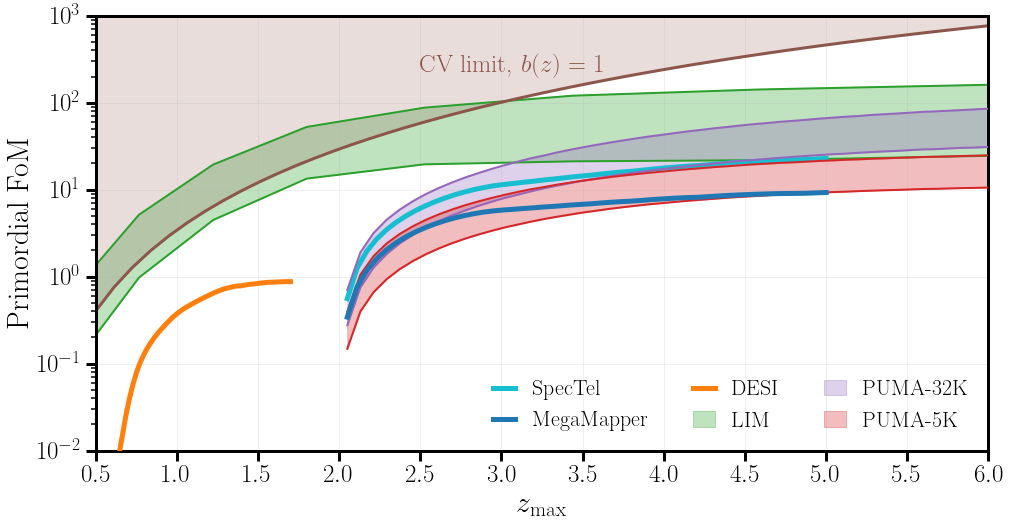

In [119]:
plt.figure(figsize=(16,8))

#plt.semilogy(mega_zmax,mega_ideal_Nmodes+desi_Nmodes,c='C0',lw=3.,label='MegaMapper (idealised)',zorder=3)
#plt.semilogy(mega_zmax,mega_fiducial_Nmodes+desi_Nmodes,c='C0',lw=3.,label='MegaMapper (fiducial)',zorder=3,ls='--')
#plt.fill_between(mega_zmax,mega_fiducial_Nmodes+desi_Nmodes,mega_ideal_Nmodes+desi_Nmodes,color='C0',alpha=0.3)

#plt.semilogy(puma_zmax,S4*np.ones(len(puma_zmax)),lw=3,ls='-',color='C2',label='CMB-S4',zorder=4)

#plt.semilogy(puma_zmax,SO*np.ones(len(puma_zmax)),lw=3,ls='--',color='C2',label='Simons Observatory',zorder=4)

plt.semilogy(mega_zmax,spec_Nmodes/1e6,c='C9',lw=5.,zorder=3,label='SpecTel')

##################
# Adding the "all lines combined" curve
zmax=                 [0.403228, 0.766559, 1.223966, 1.799807, 2.524748, 3.437395, 4.58635, 6.032797, 7.853767, 10.14623]
wInterlopers_summed = [0.12198404, 0.97285204,  4.47474094, 13.38844094, 19.54777344, 21.17212139, 21.82391452, 24.58080682, 24.86308593, 24.88078128]
nInterlopers_summed = [0.8327859, 5.1461849,  19.4432279,  52.6115429,  87.6570029, 120.3473449, 141.8399229, 161.0918373, 168.0977143, 171.5400383] 

plt.plot(zmax,wInterlopers_summed,c='C2',lw=2)
plt.plot(zmax,nInterlopers_summed,c='C2',lw=2)
plt.fill_between(zmax,wInterlopers_summed,nInterlopers_summed,color='C2',alpha=0.3,label=r'LIM')
##################

plt.semilogy(puma_zmax,puma_optimistic32_Nmodes/1e6,c='C4',lw=2.,zorder=3)
plt.semilogy(puma_zmax,puma_pessimistic32_Nmodes/1e6,c='C4',lw=2.,zorder=3,ls='-')
plt.fill_between(puma_zmax,puma_pessimistic32_Nmodes/1e6,puma_optimistic32_Nmodes/1e6,color='C4',alpha=0.3,label='PUMA-32K')

plt.semilogy(puma_zmax,puma_optimistic5_Nmodes/1e6,c='C3',lw=2.,zorder=3)
plt.semilogy(puma_zmax,puma_pessimistic5_Nmodes/1e6,c='C3',lw=2.,zorder=3,ls='-')
plt.fill_between(puma_zmax,puma_pessimistic5_Nmodes/1e6,puma_optimistic5_Nmodes/1e6,color='C3',alpha=0.3,label='PUMA-5K')


plt.semilogy(mega_zmax,mega_fiducial_Nmodes/1e6,c='C0',lw=5.,label='MegaMapper',zorder=5,ls='-')

plt.semilogy(desi_zs,cv_desi/1e6,c='C1',lw=5.,label='DESI',zorder=5,ls='-')

plt.fill_between(zzzs,(cv_Nmodes2/1e6),upper_limit/1e6,color='C5',alpha=0.2)
plt.semilogy(zzzs,(cv_Nmodes2/1e6),color='C5',lw=3)
plt.text(2.5,2.3e2,r'CV limit, $b(z)=1$',fontsize=25,color='C5')

#plt.text(0.7,2.e2,'Excluded by cosmic variance',fontsize=25)

plt.xticks([0.5,1,1.5,2,2.5,3.,3.5,4.,4.5,5.,5.5,6.])


############
############
'''
# Adding the LIM curves
names = np.array([r'CO(2-1)',r'CO(3-2)',r'CO(4-3)',r'CO(5-4)',r'CO(6-5)',r'CII'])
colors = np.array(['C2','k','red','C5','C6','C7','C8'])
for i in range(5):
    idx = i*10
    # no interlopers
    ZS_n = zs_ninterloper[idx:idx+10]
    FOM_n_tmp = fom_ninterloper[idx:idx+10]
    FOM_n = np.zeros(FOM_n_tmp.shape)
    for j in range(len(FOM_n_tmp)): FOM_n[j] = np.sum(FOM_n_tmp[:j+1])
    I = np.where(FOM_n_tmp > 0)
    plt.semilogy(ZS_n[I],FOM_n[I],lw=4,label=names[i],c=colors[i],zorder=6)
    # with interlopers
    ZS_w = zs_winterloper[idx:idx+10]
    FOM_w_tmp = fom_winterloper[idx:idx+10]
    FOM_w = np.zeros(FOM_w_tmp.shape)
    for j in range(len(FOM_w_tmp)): FOM_w[j] = np.sum(FOM_w_tmp[:j+1])
    I = np.where(FOM_w_tmp > 0)
    plt.semilogy(ZS_w[I],FOM_w[I],lw=4,c=colors[i],zorder=6,ls='--')
    #plt.fill_between(ZS_w[I],FOM_w[I],FOM_n[I],color=colors[i],label=names[i],alpha=0.3)
'''
############
############

plt.xlabel(r'$z_\text{max}$')
plt.ylabel(r'Primordial FoM')
plt.legend(loc='lower right',fontsize=22,frameon=False,ncol=3,handlelength=1)
plt.xlim(0.5,6)
plt.ylim(0.01,1.e3)
plt.grid(alpha=0.25)
plt.savefig('figures/fom.pdf',bbox_inches='tight')

In [6]:
fname = '../../Downloads/ninterloper_pn9.txt'
ninterloper = np.genfromtxt(fname).T
zs_ninterloper = ninterloper[-2]
fom_ninterloper = ninterloper[-1]

fname = '../../Downloads/winterloper_pn9.txt'
winterloper = np.genfromtxt(fname).T
zs_winterloper = winterloper[-2]
fom_winterloper = winterloper[-1]

In [25]:
F = np.genfromtxt('../../Downloads/fisher.txt')

labels = np.array(['omega_cdm','omega_b','h','log(A_s)','n_s','tau_reio', 'm_ncdm','N_ur','alpha_s','Omega_k','f_NL','N','alpha0', 'b','b2','bs','N2','N4','alpha2','alpha4'])

Rinv = np.diag(np.ones(len(F)))

derivs = np.array([1/params['h']**2,0,-2*params['omega_cdm']/params['h']**3,0,0,0])
Rinv[0,:6] = derivs

derivs2 = np.array([0,1/params['h']**2,-2*params['omega_b']/params['h']**3,0,0,0])
Rinv[1,:6] = derivs2

R = np.linalg.inv(Rinv)

F_new = np.dot(np.dot(R.T,F),R)

###################################
def get_indices(basis):
    x = []
    for b in basis: x.append(np.where(labels==b)[0][0])
    return x

basis = np.array(['omega_cdm','omega_b','h','log(A_s)','n_s','tau_reio','N','b','alpha0'])

x = get_indices(basis)
F_gal = F_new[x][:,x]
C = np.linalg.inv(F_gal)
C[0,1]

-2.177493773546187e-07

In [118]:
F = np.genfromtxt('../../Downloads/fisher.txt')

labels = np.array(['omega_cdm','omega_b','h','log(A_s)','n_s','tau_reio', 'm_ncdm','N_ur','alpha_s','Omega_k','f_NL','N','alpha0', 'b','b2','bs','N2','N4','alpha2','alpha4'])

def get_indices(basis):
    x = []
    for b in basis: x.append(np.where(labels==b)[0][0])
    return x

basis = np.array(['h','log(A_s)','n_s','omega_cdm','omega_b','tau_reio','b','b2','bs','N','N2','N4','alpha0','alpha2','alpha4'])
basis = np.array(['omega_cdm','omega_b'])

x = get_indices(basis)
Planck = np.genfromtxt('input/Planck.txt')[:6,:6]

F_gal = F[x][:,x]
print(np.linalg.inv(F_gal)[0,1])

F = desiCast.combine_fishers([Planck,F_gal],6)

C = np.linalg.inv(F[1:6,1:6])
C[2,3]

-1.1506965363086044e-10


IndexError: index 2 is out of bounds for axis 0 with size 2

In [93]:
C = np.linalg.inv(Planck)
C[3,4]

-1.0137497249654355e-07

## EDE power spectrum vs $\Lambda$CDM

In [92]:
tmp_params = {
          'output': 'mPk',         
          'P_k_max_h/Mpc': 40.,
          'z_pk': '0.0,10',
          'A_s': 2.10732e-9,
          'n_s': 0.96824,
          'alpha_s': 0.,
          'h': 0.6770,
          'N_ur': 1.0196,
          'N_ncdm': 2,
          'm_ncdm': '0.01,0.05',
          'tau_reio': 0.0568,
          'omega_b': 0.02247,
          'omega_cdm': 0.11923,
          'Omega_k': 0.}


EDE_params = {'log10z_c': 3.5,
              'fEDE': 0.05,
              'thetai_scf': 2.83,
              'Omega_Lambda':0.0,
              'Omega_fld':0,
              'Omega_scf':-1,
              'n_scf':3,
              'CC_scf':1,
              'scf_tuning_index':3,
              'scf_parameters':'1, 1, 1, 1, 1, 0.0',
              'attractor_ic_scf':'no'}

EDE = Class()
EDE.set(tmp_params)
EDE.compute()

In [93]:
kk = np.logspace(np.log10(0.005),np.log10(0.5),300)
pfid = np.array([EDE.pk_lin(k*params['h'],2.)*params['h']**3. for k in kk])

In [94]:
EDE.set(EDE_params)
EDE.compute()
#
EDE1,EDE2 = Class(),Class()
#
EDE1.set(tmp_params)
EDE1.set(EDE_params)
EDE1.set({'fEDE': 0.02})
EDE1.compute()
#
EDE2.set(tmp_params)
EDE2.set(EDE_params)
EDE2.set({'fEDE': 0.01})
EDE2.compute()

In [97]:
# for a fixed value of f_EDE, scan over log10(z_c) to gain an intuition for what scales change
log10z_cs = np.linspace(1.5,6.5,2) #10

pmatter,pmatter1,pmatter2 = [],[],[]

for i,log10z_c in enumerate(log10z_cs):
    EDE.set({'log10z_c':log10z_c})
    EDE.compute()
    EDE1.set({'log10z_c':log10z_c})
    EDE1.compute()
    EDE2.set({'log10z_c':log10z_c})
    EDE2.compute()
    pmatter.append(np.array([EDE.pk_lin(k*params['h'],2.)*params['h']**3. for k in kk]))
    pmatter1.append(np.array([EDE1.pk_lin(k*params['h'],2.)*params['h']**3. for k in kk]))
    pmatter2.append(np.array([EDE2.pk_lin(k*params['h'],2.)*params['h']**3. for k in kk]))

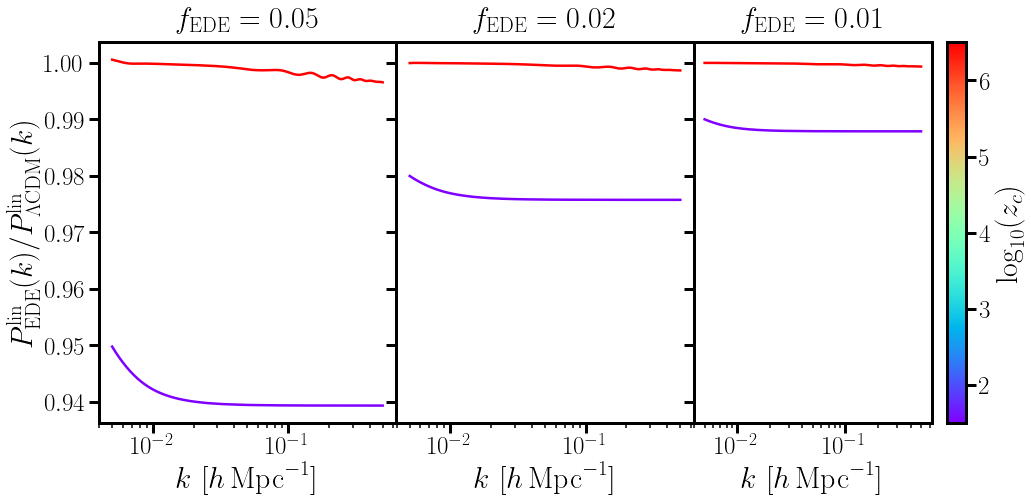

In [96]:
norm = plt.Normalize()
greens = plt.cm.rainbow(norm([i for i in range(len(log10z_cs))]))

fig, axs = plt.subplots(1, 3, figsize=(16,7), gridspec_kw={'hspace': 0.,'wspace':0.})

for i,log10z_c in enumerate(log10z_cs):
    axs[0].semilogx(kk,pmatter[i]/pfid, c=greens[i],lw=2.5)
    axs[1].semilogx(kk,pmatter1[i]/pfid, c=greens[i],lw=2.5)
    axs[2].semilogx(kk,pmatter2[i]/pfid, c=greens[i],lw=2.5)

#for i in range(3): axs[i].tick_params(direction='in')    
for i in range(1,3): axs[i].yaxis.set_ticklabels([])
axs[1].get_shared_y_axes().join(axs[0], axs[1])
axs[2].get_shared_y_axes().join(axs[0], axs[2])
axs[0].set_xlabel(r'$k\,\,[h\,\text{Mpc}^{-1}]$')
axs[1].set_xlabel(r'$k\,\,[h\,\text{Mpc}^{-1}]$')
axs[2].set_xlabel(r'$k\,\,[h\,\text{Mpc}^{-1}]$')
axs[0].set_ylabel(r'$P^\text{lin}_\text{EDE}(k)/P^\text{lin}_{\Lambda\text{CDM}}(k)$')
axs[0].set_title(r'$f_\text{EDE}=0.05$',pad=15)
axs[1].set_title(r'$f_\text{EDE}=0.02$',pad=15)
axs[2].set_title(r'$f_\text{EDE}=0.01$',pad=15)
plt.colorbar(plt.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=log10z_cs[0],vmax=log10z_cs[-1]), cmap=plt.cm.rainbow), label=r'$\log_{10}(z_c)$')
plt.savefig('figures/EDE_power_spectrum_varying_with_z_c.pdf',bbox_inches='tight')

# $N_\text{eff}$ constraints

In [28]:
def constraint(zbins,N,kmax_knl):
    
   puma32optCast.experiment = experiment(zmin=2.,zmax=6.,nbins=4,fsky=0.5,sigma_z=0.0,HI=True,pesimistic=False,Ndetectors=32e3,sigv=10)
   for i in range(4):
      z = puma32optCast.experiment.zcenters[i]
      p = np.genfromtxt('output/'+puma32optCast.name+'/derivatives/pfid_'+str(int(100*z))+'.txt')
      puma32optCast.P_fid[i] = p - 1/compute_n(puma32optCast,z)
    
   puma32optCast.experiment = experiment(zmin=2.,zmax=6.,nbins=4,fsky=0.5,sigma_z=0.0,HI=True,pesimistic=False,Ndetectors=N*1000,sigv=10)
   for i in range(4): 
      z = puma32optCast.experiment.zcenters[i]
      puma32optCast.P_fid[i] += 1/compute_n(puma32optCast,z) 
   
   F = puma32optCast.gen_fisher(basis_hi,11,kmax_knl=kmax_knl,derivatives=derivatives_puma5,zbins=zbins)
   F = fishcast.combine_fishers([Planck_SO,F_desi,F],11)
   x = list(range(6)) + [7] + list(range(11,len(F)))
   C = np.linalg.inv(F[x][:,x])
   return np.sqrt(C[6,6])

In [29]:
bins = np.array([np.array([0]), np.array([0,1]),np.array([0,1,2]),np.array([0,1,2,3])])#,np.array([0,1,2,3]),np.array([0,1,2,3,4]),np.array([0,1,2,3,4,5])])
zmaxs = np.array([3,4,5,6])#np.array([2.5,3.0,3.5,4.0,4.5,5.0])
kmaxs = np.array([0.1,0.3,0.5,1.])
nratios = np.array([1,5,16,32,64])

/home/noah/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [30]:
sigmas = np.zeros((len(bins),len(kmaxs)))

for i,b in enumerate(bins):
   for j,kmax_knl in enumerate(kmaxs):
      sigmas[i,j] = constraint(b,32,kmax_knl)

In [31]:
sigmas2 = np.zeros((len(bins),len(nratios)))

for i,b in enumerate(bins):
   for j,n in enumerate(nratios):
      sigmas2[i,j] = constraint(b,n,1.)

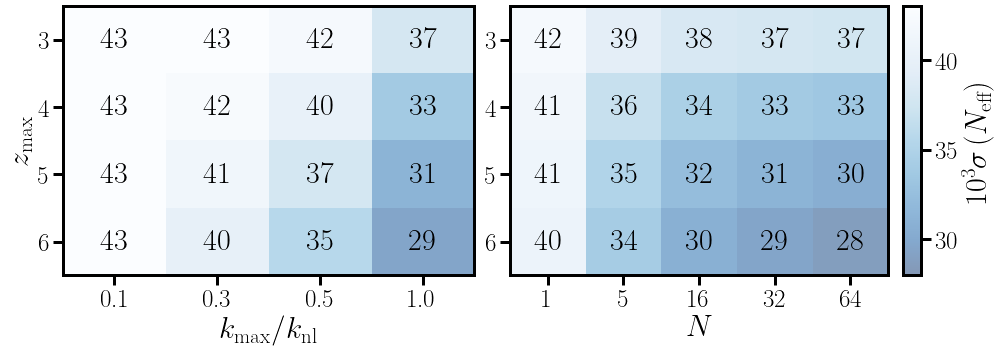

In [32]:
fig, ax = plt.subplots(1,2,figsize=(14,5))
vmin, vmax = 28, 43

import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap
cmap = pl.cm.Blues_r
my_cmap = cmap(np.arange(cmap.N))
alphas = 0.5*np.ones(cmap.N)#np.linspace(0, 1, cmap.N)
BG = np.asarray([1., 1., 1.,])
for i in range(cmap.N):
    my_cmap[i,:-1] = my_cmap[i,:-1] * alphas[i] + BG * (1.-alphas[i])
my_cmap = ListedColormap(my_cmap)
cmap = my_cmap

im = ax[0].imshow(sigmas*1000,cmap=cmap,vmin=vmin,vmax=vmax,aspect="auto")
im2 = ax[1].imshow(sigmas2*1000,cmap=cmap,vmin=vmin,vmax=vmax,aspect="auto")

ax[0].set_yticks(np.arange(len(zmaxs)))
ax[0].set_xticks(np.arange(len(kmaxs)))
ax[0].set_yticklabels(zmaxs.astype(str))
ax[0].set_xticklabels(kmaxs.astype(str))

ax[1].set_yticks(np.arange(len(zmaxs)))
ax[1].set_xticks(np.arange(len(nratios)))
ax[1].set_yticklabels(zmaxs.astype(str))
ax[1].set_xticklabels(nratios.astype(str))

for i in range(len(zmaxs)):
    for j in range(len(kmaxs)):
        ax[0].text(j, i, str(int(sigmas[i, j]*1000)),ha="center", va="center", color="k",fontsize=30)
        
for i in range(len(zmaxs)):
    for j in range(len(nratios)):       
        ax[1].text(j, i, str(int(sigmas2[i, j]*1000)),ha="center", va="center", color="k",fontsize=30)
        
ax[0].set_ylabel(r'$z_\text{max}$')
ax[0].set_xlabel(r'$k_\text{max}/k_\text{nl}$')
ax[1].set_xlabel(r'$N$')

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.2)
#ax[0].set_title(r'$\sigma\left(M_\nu\right)\,{\rm [meV]}$',pad=10)
plt.colorbar(plt.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=vmin,vmax=vmax), cmap=cmap), label=r'$10^3\sigma\left( N_\text{eff}\right)$',cax=cax)
fig.tight_layout()
plt.savefig('figures/sigma_neff_vs_k_and_zmax_and_n.pdf',bbox_inches='tight')

# Exploring $k_\text{max}$ and neutrino constraints

In [22]:
kratios = np.linspace(0.2,1,50)
kratios_pess = np.linspace(0.2,1,50)

def constraint(nratio,kmax_knl,fancy=False,lensing=False):
   fishcast.experiment = experiment(zmin=2., zmax=5., nbins=4, fsky=0.34, sigma_z=0, LBG=True,\
                                 custom_n=True, n=lambda z: nratio*LBGn(fishcast,z)) 

   for i in range(4): 
      z = fishcast.experiment.zcenters[i]
      p = np.genfromtxt('output/'+fishcast.name+'/derivatives/pfid_'+str(int(100*z))+'.txt')
      fishcast.P_fid[i] = p
      fishcast.P_fid[i] -= 1/LBGn(fishcast,fishcast.experiment.zcenters[i])
      fishcast.P_fid[i] += 1/LBGn(fishcast,fishcast.experiment.zcenters[i])/nratio

   F = fishcast.gen_fisher(basis,globe,kmax_knl=kmax_knl,derivatives=derivatives_fish)

   if lensing: F = fishcast.combine_fishers([F,F_desi_RSD_lens_s4],globe)
   else: F = fishcast.combine_fishers([F,F_desi],globe)
   if not fancy: F = fishcast.combine_fishers([F,Planck_SO],globe)
   else: F = fishcast.combine_fishers([F,LiteBird_S4],globe)
   return one_param_constraints(F)[-1]*1000 

In [23]:
constraints = [constraint(0.3,kratio) for kratio in kratios]

In [24]:
constraintsa = [constraint(0.5,kratio) for kratio in kratios]

In [25]:
constraintsb = [constraint(1.,kratio) for kratio in kratios]

In [26]:
constraints_tightertau = [constraint(0.3,kratio,fancy=True) for kratio in kratios]

In [27]:
constraints_tightertau_lens = [constraint(0.3,kratio,fancy=True,lensing=True) for kratio in kratios]

In [28]:
constraintsa_tightertau = [constraint(0.5,kratio,fancy=True) for kratio in kratios]

In [29]:
constraintsa_tightertau_lens = [constraint(0.5,kratio,fancy=True,lensing=True) for kratio in kratios]

In [30]:
constraintsb_tightertau = [constraint(1.,kratio,fancy=True) for kratio in kratios]

In [31]:
constraintsb_tightertau_lens = [constraint(1.,kratio,fancy=True,lensing=True) for kratio in kratios]

In [32]:
def constraints_PUMA(cast,kmax_knl,fancy=False,lensing=False,five=True):
   if five: F = cast.gen_fisher(basis_hi,globe,kmax_knl=kmax_knl,derivatives=derivatives_puma5)
   else: F = cast.gen_fisher(basis_hi,globe,kmax_knl=kmax_knl,derivatives=derivatives_puma32)
   #F_desi = desiCast.gen_fisher(basis,globe,kmax_knl=kmax_knl,kpar_min=0.001,derivatives=derivatives_desi)
   
   if lensing: 
      #F_desi_lens = make_fisher(desiCast,kmax_knl=kmax_knl)
      #F_desi_RSD_lens = fishcast.combine_fishers([F_desi,F_desi_lens],globe+3*5)
      F = fishcast.combine_fishers([F,F_desi_RSD_lens_s4],globe)
   else: F = fishcast.combine_fishers([F,F_desi],globe)
   if not fancy: F = fishcast.combine_fishers([F,Planck_SO],globe)
   else: F = fishcast.combine_fishers([F,LiteBird_S4],globe)
   try:
      return one_param_constraints(F)[-1]*1000
   except:
      return 1e20

In [33]:
constraints_puma32opt = [constraints_PUMA(puma32optCast,kratio,five=False) for kratio in kratios_pess]

In [34]:
constraints_puma32pess = [constraints_PUMA(puma32pessCast,kratio,five=False) for kratio in kratios_pess]

In [35]:
constraints_puma5opt = [constraints_PUMA(puma5optCast,kratio) for kratio in kratios_pess]

In [36]:
constraints_puma5pess = [constraints_PUMA(puma5pessCast,kratio) for kratio in kratios_pess]

In [37]:
constraints_puma32opt_fancy = [constraints_PUMA(puma32optCast,kratio,fancy=True,five=False) for kratio in kratios_pess]

In [38]:
constraints_puma32opt_fancy_lens = [constraints_PUMA(puma32optCast,kratio,fancy=True,lensing=True,five=False) for kratio in kratios_pess]

In [39]:
constraints_puma32pess_fancy = [constraints_PUMA(puma32pessCast,kratio,fancy=True,five=False) for kratio in kratios_pess]

In [40]:
constraints_puma32pess_fancy_lens = [constraints_PUMA(puma32pessCast,kratio,fancy=True,lensing=True,five=False) for kratio in kratios_pess]

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


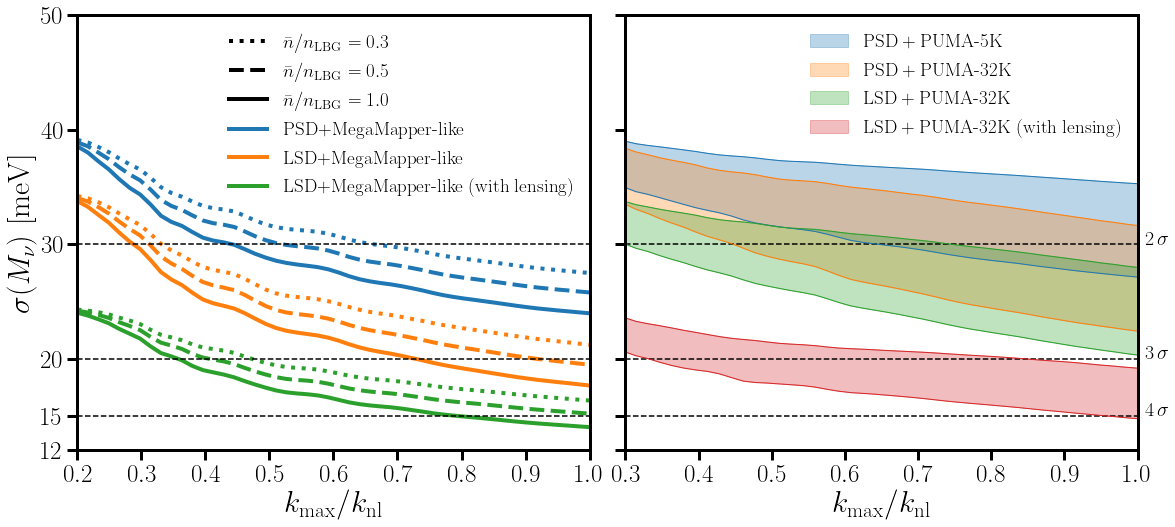

In [41]:
fig,ax = plt.subplots(1,2,figsize=(19,8),sharey=True)
plt.subplots_adjust(wspace=0.07)
plt.rcParams['legend.title_fontsize'] = 18

ax[0].plot(kratios,constraints,lw=4,c='C0',ls='dotted')
ax[0].plot(kratios,constraintsa,lw=4,c='C0',ls='--')
ax[0].plot(kratios,constraintsb,lw=4,c='C0')

ax[0].plot(kratios,constraints_tightertau,lw=4,c='C1',ls='dotted')
ax[0].plot(kratios,constraints_tightertau_lens,lw=4,c='C2',ls='dotted')
ax[0].plot(kratios,constraintsa_tightertau,lw=4,c='C1',ls='--')
ax[0].plot(kratios,constraintsa_tightertau_lens,lw=4,c='C2',ls='--')
ax[0].plot(kratios,constraintsb_tightertau,lw=4,c='C1')
ax[0].plot(kratios,constraintsb_tightertau_lens,lw=4,c='C2')

ax[0].plot([],[],lw=4,ls='dotted',c='k',label=r'$\bar{n}/n_\text{LBG}=0.3$')
ax[0].plot([],[],lw=4,ls='--',c='k',label=r'$\bar{n}/n_\text{LBG}=0.5$')
ax[0].plot([],[],lw=4,ls='-',c='k',label=r'$\bar{n}/n_\text{LBG}=1.0$')
ax[0].plot([],[],lw=4,c='C0',label=r'PSD+MegaMapper-like')
ax[0].plot([],[],lw=4,c='C1',label=r'LSD+MegaMapper-like')
ax[0].plot([],[],lw=4,c='C2',label=r'LSD+MegaMapper-like (with lensing)')

ax[1].set_xlabel(r'$k_\text{max}/k_\text{nl}$')
ax[1].set_xlim(0.3,1.)
ax[1].set_xticks(ticks=[0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
ax[1].set_yticks(ticks=[10,20,30,40,50,60])
ax[1].axhline(30,0,2,color='k',ls='--')
ax[1].text(1.01,30,r'$2\,\sigma$',fontsize=20)
ax[1].axhline(20,0,2,color='k',ls='--')
ax[1].text(1.01,20,r'$3\,\sigma$',fontsize=20)
ax[1].axhline(15,0,2,color='k',ls='--')
ax[1].text(1.01,15,r'$4\,\sigma$',fontsize=20)
#ax[1].axhline(12,0,2,color='k',ls='--')
#ax[1].text(1.01,12,r'$5\,\sigma$',fontsize=20)
#ax[1].axhline(10,0,2,color='k',ls='--')
#ax[1].text(1.01,10,r'$6\,\sigma$',fontsize=20)
ax[0].legend(loc='upper right',frameon=False,fontsize=19)
ax[1].set_ylim(12,50)


c1,c2,c3,c4='C0','C1','C2','C3'

ax[1].fill_between(kratios_pess,constraints_puma5opt,constraints_puma5pess,color=c1,alpha=0.3,label=r'$\text{PSD}+\text{PUMA-5K}$')
ax[1].plot(kratios_pess,constraints_puma5opt,lw=1,c=c1)
ax[1].plot(kratios_pess,constraints_puma5pess,lw=1,c=c1)

ax[1].fill_between(kratios_pess,constraints_puma32opt,constraints_puma32pess,color=c2,alpha=0.3,label=r'$\text{PSD}+\text{PUMA-32K}$')
ax[1].plot(kratios_pess,constraints_puma32opt,lw=1,c=c2)
ax[1].plot(kratios_pess,constraints_puma32pess,lw=1,c=c2)

ax[1].fill_between(kratios_pess,constraints_puma32opt_fancy,constraints_puma32pess_fancy,color=c3,alpha=0.3,label=r'$\text{LSD}+\text{PUMA-32K}$')
ax[1].plot(kratios_pess,constraints_puma32opt_fancy,lw=1,c=c3)
ax[1].plot(kratios_pess,constraints_puma32pess_fancy,lw=1,c=c3)

ax[1].fill_between(kratios_pess,constraints_puma32opt_fancy_lens,constraints_puma32pess_fancy_lens,color=c4,alpha=0.3,label=r'$\text{LSD}+\text{PUMA-32K}$ (with lensing)')
ax[1].plot(kratios_pess,constraints_puma32opt_fancy_lens,lw=1,c=c4)
ax[1].plot(kratios_pess,constraints_puma32pess_fancy_lens,lw=1,c=c4)

ax[0].set_xlabel(r'$k_\text{max}/k_\text{nl}$')
ax[0].set_ylabel(r'$\sigma(M_\nu)\,\,[{\rm meV}]$')
ax[0].set_xlim(0.2,1.)
ax[0].set_xticks(ticks=[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
ax[0].set_yticks(ticks=[10,12,15,20,30,40,50,60])
ax[0].axhline(30,0,2,color='k',ls='--')
ax[0].axhline(20,0,2,color='k',ls='--')
ax[0].axhline(15,0,2,color='k',ls='--')
#ax[0].axhline(12,0,2,color='k',ls='--')
#ax[0].axhline(10,0,2,color='k',ls='--')
ax[1].legend(loc='upper right',frameon=False,fontsize=19)
ax[0].set_ylim(12,50)

plt.savefig('figures/sigma_mu_vs_kratio.pdf',bbox_inches='tight')

# EDE constraints

In [92]:
basis = np.array(['h','log(A_s)','n_s','omega_cdm','omega_b','tau_reio',\
                  'fEDE','N','alpha0',\
                  'b','b2','bs','N2','N4','alpha2','alpha4'])

basis_hi = np.array(['h','log(A_s)','n_s','omega_cdm','omega_b','tau_reio',\
                  'fEDE','N','alpha0',\
                  'b','b2','bs','N2','N4','alpha2','alpha4','Tb'])
log10z_cs = np.linspace(1.5,6.5,20)
omega_lins = np.linspace(10,300,20)

In [93]:
derivatives_fish = fishcast.load_derivatives(basis,log10z_c=log10z_cs[0],omega_lin=omega_lins[0])
print('Loaded toy model derivatives')
derivatives_desi = desiCast.load_derivatives(basis,log10z_c=log10z_cs[0],omega_lin=omega_lins[0])
print('Loaded DESI derivatives')
derivatives_euc = eucCast.load_derivatives(basis,log10z_c=log10z_cs[0],omega_lin=omega_lins[0])
print('Loaded Euclid derivatives')
derivatives_mega = megaCast.load_derivatives(basis,log10z_c=log10z_cs[0],omega_lin=omega_lins[0])
print('Loaded MegaMapper derivatives')
derivatives_mse = mseCast.load_derivatives(basis,log10z_c=log10z_cs[0],omega_lin=omega_lins[0])
print('Loaded MSE derivatives')
derivatives_puma = puma5optCast.load_derivatives(basis_hi,log10z_c=log10z_cs[0],omega_lin=omega_lins[0])
print('Loaded PUMA derivatives')
derivatives_hirax = hiraxOptCast.load_derivatives(basis_hi,log10z_c=log10z_cs[0],omega_lin=omega_lins[0])
print('Loaded HIRAX derivatives')

Loaded toy model derivatives
Loaded DESI derivatives
Loaded Euclid derivatives
Loaded MegaMapper derivatives
Loaded MSE derivatives
Loaded PUMA derivatives
Loaded HIRAX derivatives


In [94]:
def make_fisher(cast,kmax_knl=1,S4=False):
   basis_lensing = np.array(['h','log(A_s)','n_s','omega_cdm','omega_b','tau_reio',\
                             'm_ncdm','N','alpha0','b','b2','bs','alphax'])
   globe_lensing = 7
   if S4: Lensing = cast.gen_lensing_fisher(basis_lensing,globe_lensing,ell_min=30,ell_max=500,kmax_knl=kmax_knl,CMB='S4') # 1000
   else: Lensing = cast.gen_lensing_fisher(basis_lensing,globe_lensing,ell_min=30,ell_max=500,kmax_knl=kmax_knl,CMB='SO') # 1000
   Lensing[6] *= 0; Lensing[:,6] *= 0
   return Lensing

In [95]:
F_desi_lens_so = make_fisher(desiCast)
F_euc_lens_so = make_fisher(eucCast)
F_mega_lens_so = make_fisher(megaCast)
F_mse_lens_so = make_fisher(mseCast)
F_puma32opt_lens_so = make_fisher(puma32optCast)
F_puma32pess_lens_so = make_fisher(puma32pessCast)
F_puma5opt_lens_so = make_fisher(puma5optCast)
F_puma5pess_lens_so = make_fisher(puma5pessCast)
F_hiraxOpt_lens_so = make_fisher(hiraxOptCast)
F_hiraxPess_lens_so = make_fisher(hiraxPessCast)

In [96]:
F_desi_lens_s4 = make_fisher(desiCast,S4=True)
F_euc_lens_s4 = make_fisher(eucCast,S4=True)
F_mega_lens_s4 = make_fisher(megaCast,S4=True)
F_mse_lens_s4 = make_fisher(mseCast,S4=True)
F_puma32opt_lens_s4 = make_fisher(puma32optCast,S4=True)
F_puma32pess_lens_s4 = make_fisher(puma32pessCast,S4=True)
F_puma5opt_lens_s4 = make_fisher(puma5optCast,S4=True)
F_puma5pess_lens_s4 = make_fisher(puma5pessCast,S4=True)
F_hiraxOpt_lens_s4 = make_fisher(hiraxOptCast,S4=True)
F_hiraxPess_lens_s4 = make_fisher(hiraxPessCast,S4=True)

In [97]:
def get_EDE_derivatives(fishcast,log10z_c):
   derivatives = []
   directory = 'output/'+fishcast.name+'/derivatives/'
   for z in fishcast.experiment.zcenters:
      filename = 'fEDE_'+str(int(1000.*log10z_c))+'_'+str(int(100*z))+'.txt'
      dPdp = np.genfromtxt(directory+filename)
      derivatives.append(dPdp)
   return np.array(derivatives)

def sigmaEDE(log10z_c):
   
   derivatives_fish[:,6] = get_EDE_derivatives(fishcast,log10z_c)
   derivatives_desi[:,6] = get_EDE_derivatives(desiCast,log10z_c)
   derivatives_euc[:,6] = get_EDE_derivatives(eucCast,log10z_c)
   derivatives_mega[:,6] = get_EDE_derivatives(megaCast,log10z_c)
   derivatives_mse[:,6] = get_EDE_derivatives(mseCast,log10z_c)
   derivatives_puma[:,6] = get_EDE_derivatives(puma5optCast,log10z_c)
   derivatives_hirax[:,6] = get_EDE_derivatives(hiraxOptCast,log10z_c)
    
   # Pure RSD, nothing else 
   kpar_min = -1
   F_desi = desiCast.gen_fisher(basis,7,kmax_knl=1.,kpar_min=kpar_min,derivatives=derivatives_desi)
   F_euc = eucCast.gen_fisher(basis,7,kmax_knl=1.,kpar_min=kpar_min,derivatives=derivatives_euc)
   F_mega = megaCast.gen_fisher(basis,7,kmax_knl=1.,kpar_min=kpar_min,derivatives=derivatives_mega)
   F_mse = mseCast.gen_fisher(basis,7,kmax_knl=1.,kpar_min=kpar_min,derivatives=derivatives_mse)
   F_puma5opt = puma5optCast.gen_fisher(basis_hi,7,kmax_knl=1.,kpar_min=kpar_min,derivatives=derivatives_puma)
   F_puma5pess = puma5pessCast.gen_fisher(basis_hi,7,kmax_knl=1.,kpar_min=kpar_min,derivatives=derivatives_puma)
   F_puma32opt = puma32optCast.gen_fisher(basis_hi,7,kmax_knl=1.,kpar_min=kpar_min,derivatives=derivatives_puma)
   F_puma32pess = puma32pessCast.gen_fisher(basis_hi,7,kmax_knl=1.,kpar_min=kpar_min,derivatives=derivatives_puma)
   F_hiraxOpt = hiraxOptCast.gen_fisher(basis_hi,7,kmax_knl=1.,kpar_min=kpar_min,derivatives=derivatives_hirax)
   F_hiraxPess = hiraxPessCast.gen_fisher(basis_hi,7,kmax_knl=1.,kpar_min=kpar_min,derivatives=derivatives_hirax)

   # RSD with kpar_min = 0.001
   kpar_min = 0.001
   F_desi_rsd = desiCast.gen_fisher(basis,7,kmax_knl=1.,kpar_min=kpar_min,derivatives=derivatives_desi)
   F_euc_rsd = eucCast.gen_fisher(basis,7,kmax_knl=1.,kpar_min=kpar_min,derivatives=derivatives_euc)
   F_mega_rsd = megaCast.gen_fisher(basis,7,kmax_knl=1.,kpar_min=kpar_min,derivatives=derivatives_mega)
   F_mse_rsd = mseCast.gen_fisher(basis,7,kmax_knl=1.,kpar_min=kpar_min,derivatives=derivatives_mse)
   F_puma5opt_rsd = puma5optCast.gen_fisher(basis_hi,7,kmax_knl=1.,kpar_min=kpar_min,derivatives=derivatives_puma)
   F_puma5pess_rsd = puma5pessCast.gen_fisher(basis_hi,7,kmax_knl=1.,kpar_min=kpar_min,derivatives=derivatives_puma)
   F_puma32opt_rsd = puma32optCast.gen_fisher(basis_hi,7,kmax_knl=1.,kpar_min=kpar_min,derivatives=derivatives_puma)
   F_puma32pess_rsd = puma32pessCast.gen_fisher(basis_hi,7,kmax_knl=1.,kpar_min=kpar_min,derivatives=derivatives_puma)
   F_hiraxOpt_rsd = hiraxOptCast.gen_fisher(basis_hi,7,kmax_knl=1.,kpar_min=kpar_min,derivatives=derivatives_hirax)
   F_hiraxPess_rsd = hiraxPessCast.gen_fisher(basis_hi,7,kmax_knl=1.,kpar_min=kpar_min,derivatives=derivatives_hirax)

   # RSD + primary CMB
   F_desi_soPrim = fishcast.combine_fishers([F_desi,Planck_SO[:6,:6]],6)
   F_euc_soPrim = fishcast.combine_fishers([F_euc,Planck_SO[:6,:6]],6)
   F_mse_soPrim = fishcast.combine_fishers([F_mse,Planck_SO[:6,:6]],6)
    
   # RSD + lensing
   F_desi_rsd_solens = fishcast.combine_fishers([F_desi_rsd,F_desi_lens_so],7+4*5)
   F_euc_rsd_solens = fishcast.combine_fishers([F_euc_rsd,F_euc_lens_so],7+4*5)
   F_mega_rsd_solens = fishcast.combine_fishers([F_mega_rsd,F_mega_lens_so],7+4*5)
   F_mse_rsd_solens = fishcast.combine_fishers([F_mse_rsd,F_mse_lens_so],7+4*5)
   F_puma5opt_rsd_solens = fishcast.combine_fishers([F_puma5opt_rsd,F_puma5opt_lens_so],7+4*5)
   F_puma5pess_rsd_solens = fishcast.combine_fishers([F_puma5pess_rsd,F_puma5pess_lens_so],7+4*5)
   F_puma32opt_rsd_solens = fishcast.combine_fishers([F_puma32opt_rsd,F_puma32opt_lens_so],7+4*5)
   F_puma32pess_rsd_solens = fishcast.combine_fishers([F_puma32pess_rsd,F_puma32pess_lens_so],7+4*5)
   F_hiraxOpt_rsd_solens = fishcast.combine_fishers([F_hiraxOpt_rsd,F_hiraxOpt_lens_so],7+4*5)
   F_hiraxPess_rsd_solens = fishcast.combine_fishers([F_hiraxPess_rsd,F_hiraxPess_lens_so],7+4*5)

   # RSD + lensing + primary CMB
   F_desi_lens_soPrim = fishcast.combine_fishers([F_desi_rsd_solens,Planck_SO[:6,:6]],6)
   F_euc_lens_soPrim = fishcast.combine_fishers([F_euc_rsd_solens,Planck_SO[:6,:6]],6)
   F_mse_lens_soPrim = fishcast.combine_fishers([F_mse_rsd_solens,Planck_SO[:6,:6]],6)
   F_mega_lens_soPrim = fishcast.combine_fishers([F_mega_rsd_solens,Planck_SO[:6,:6]],6)

   # adding high redshift RSD data to DESI + Primary CMB
   ## without lensing
   F_mega_desi_soPrim = fishcast.combine_fishers([F_desi_soPrim,F_mega],7)
   F_hiraxOpt_desi_soPrim = fishcast.combine_fishers([F_desi_soPrim,F_hiraxOpt],7)
   F_hiraxPess_desi_soPrim = fishcast.combine_fishers([F_desi_soPrim,F_hiraxPess],7)
   F_puma5opt_desi_soPrim = fishcast.combine_fishers([F_desi_soPrim,F_puma5opt],7)
   F_puma5pess_desi_soPrim = fishcast.combine_fishers([F_desi_soPrim,F_puma5pess],7)
   F_puma32opt_desi_soPrim = fishcast.combine_fishers([F_desi_soPrim,F_puma32opt],7)
   F_puma32pess_desi_soPrim = fishcast.combine_fishers([F_desi_soPrim,F_puma32pess],7)
   ## with lensing
   F_mega_desi_lens_soPrim = fishcast.combine_fishers([F_desi_soPrim,F_mega_rsd_solens],7)
   F_hiraxOpt_desi_lens_soPrim = fishcast.combine_fishers([F_desi_lens_soPrim,F_hiraxOpt],7)
   F_hiraxPess_desi_lens_soPrim = fishcast.combine_fishers([F_desi_lens_soPrim,F_hiraxPess],7)
   F_puma5opt_desi_lens_soPrim = fishcast.combine_fishers([F_desi_lens_soPrim,F_puma5opt],7)
   F_puma5pess_desi_lens_soPrim = fishcast.combine_fishers([F_desi_lens_soPrim,F_puma5pess],7)
   F_puma32opt_desi_lens_soPrim = fishcast.combine_fishers([F_desi_lens_soPrim,F_puma32opt],7)
   F_puma32pess_desi_lens_soPrim = fishcast.combine_fishers([F_desi_lens_soPrim,F_puma32pess],7)
   
   def s(F):
      #x = list(range(6)) + list(range(7,len(F)))
      return np.sqrt(np.linalg.inv(F)[6,6])

   data_so = [s(F_desi_soPrim),
          s(F_euc_soPrim),
          s(F_mse_soPrim),
          s(F_mega_desi_soPrim),
          s(F_hiraxOpt_desi_soPrim),
          s(F_hiraxPess_desi_soPrim),
          s(F_puma5opt_desi_soPrim),
          s(F_puma5pess_desi_soPrim),
          s(F_puma32opt_desi_soPrim),
          s(F_puma32pess_desi_soPrim)]
   
   data_so_lens = [s(F_desi_lens_soPrim),
          s(F_euc_lens_soPrim),
          s(F_mse_lens_soPrim),
          s(F_mega_desi_lens_soPrim),
          s(F_hiraxOpt_desi_lens_soPrim),
          s(F_hiraxPess_desi_lens_soPrim),
          s(F_puma5opt_desi_lens_soPrim),
          s(F_puma5pess_desi_lens_soPrim),
          s(F_puma32opt_desi_lens_soPrim),
          s(F_puma32pess_desi_lens_soPrim)]
    
   return data_so, data_so_lens

In [98]:
data = []
for log10z_c in log10z_cs: data.append(sigmaEDE(log10z_c))
data = np.array(data)

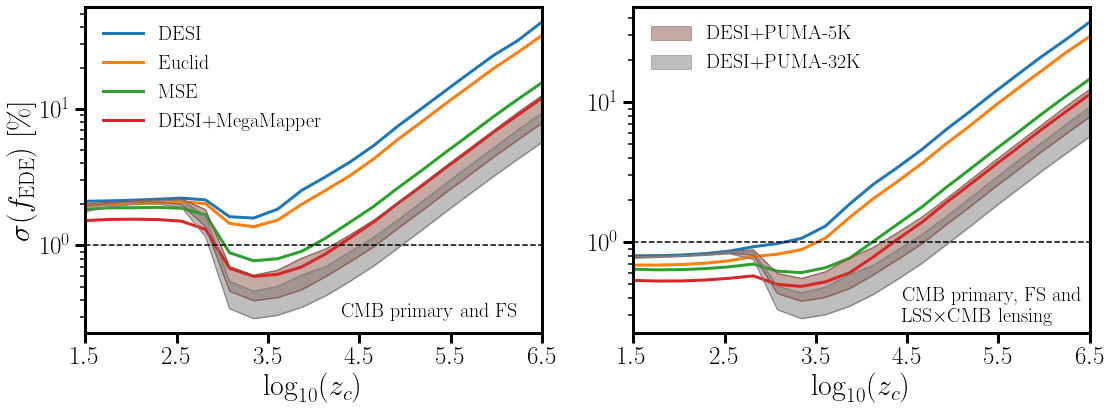

In [100]:
fig, ax = plt.subplots(1,2,figsize=(18,6))
alpha=0.5

ax[0].semilogy(log10z_cs,data[:,0,0]*100,lw=3,c='C0',label=r'DESI')
ax[0].semilogy(log10z_cs,data[:,0,1]*100,lw=3,c='C1',label=r'Euclid')
ax[0].semilogy(log10z_cs,data[:,0,2]*100,lw=3,c='C2',label=r'MSE')
#
ax[0].semilogy(log10z_cs,data[:,0,3]*100,lw=3,c='C3',label=r'DESI+MegaMapper')
#
#ax[0].fill_between(log10z_cs,data[:,0,4]*100,data[:,0,5]*100,color='C4',
#                  alpha=alpha)
#ax[0].semilogy(log10z_cs,data[:,0,4]*100,lw=1,c='C4')
#ax[0].semilogy(log10z_cs,data[:,0,5]*100,lw=1,c='C4')
#
ax[0].fill_between(log10z_cs,data[:,0,6]*100,data[:,0,7]*100,color='C5',
                  alpha=alpha)
ax[0].semilogy(log10z_cs,data[:,0,6]*100,lw=1,c='C5')
ax[0].semilogy(log10z_cs,data[:,0,7]*100,lw=1,c='C5')
#
ax[0].fill_between(log10z_cs,data[:,0,8]*100,data[:,0,9]*100,color='C7',
          
                   alpha=alpha)
ax[0].semilogy(log10z_cs,data[:,0,8]*100,lw=1,c='C7')
ax[0].semilogy(log10z_cs,data[:,0,9]*100,lw=1,c='C7')



ax[1].semilogy(log10z_cs,data[:,1,0]*100,lw=3,c='C0')
ax[1].semilogy(log10z_cs,data[:,1,1]*100,lw=3,c='C1')
ax[1].semilogy(log10z_cs,data[:,1,2]*100,lw=3,c='C2')
#
ax[1].semilogy(log10z_cs,data[:,1,3]*100,lw=3,c='C3')
#
#ax[1].fill_between(log10z_cs,data[:,1,4]*100,data[:,1,5]*100,color='C4',
#                  alpha=alpha,label=r'DESI+HIRAX')
#ax[1].semilogy(log10z_cs,data[:,1,4]*100,lw=1,c='C4')
#ax[1].semilogy(log10z_cs,data[:,1,5]*100,lw=1,c='C4')
#
ax[1].fill_between(log10z_cs,data[:,1,6]*100,data[:,1,7]*100,color='C5',
                  alpha=alpha,label=r'DESI+PUMA-5K')
ax[1].semilogy(log10z_cs,data[:,1,6]*100,lw=1,c='C5')
ax[1].semilogy(log10z_cs,data[:,1,7]*100,lw=1,c='C5')
#
ax[1].fill_between(log10z_cs,data[:,1,8]*100,data[:,1,9]*100,color='C7',
                  alpha=alpha,label=r'DESI+PUMA-32K')
ax[1].semilogy(log10z_cs,data[:,1,8]*100,lw=1,c='C7')
ax[1].semilogy(log10z_cs,data[:,1,9]*100,lw=1,c='C7')



ax[0].axhline(1,0,10,c='k',ls='--')
ax[1].axhline(1,0,10,c='k',ls='--')

ax[0].text(4.3,0.3,'CMB primary and FS',fontsize=20)
ax[0].set_xlabel(r'$\log_{10}(z_c)$')
ax[0].set_ylabel(r'$\sigma(f_\text{EDE})$ [\%]')
ax[0].legend(loc='upper left',fontsize=20,frameon=False,ncol=1)

ax[0].set_xticks(ticks=[1.5,2.5,3.5,4.5,5.5,6.5])
ax[0].set_xlim(1.5,6.5)
#ax[0].set_ylim(0.2,20.)
#ax[0].set_yticks([1,10])
#ax[0].set_yticks([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,2,3,4,5,6,7,8,9,20],minor=True)
#ax[0].set_yticklabels(['1','10'])
#ax[0].set_yticklabels(['','0.3','','0.5','','','','','','3','','5','','','','','20'],minor=True)


ax[1].text(4.44,0.27,'CMB primary,'+r' FS and'+'\n'+r'LSS$\times$CMB lensing',fontsize=20)
ax[1].set_xlabel(r'$\log_{10}(z_c)$')
ax[1].legend(loc='upper left',fontsize=20,frameon=False,ncol=1)

ax[1].set_xticks(ticks=[1.5,2.5,3.5,4.5,5.5,6.5])
ax[1].set_xlim(1.5,6.5)
#ax[1].set_ylim(0.2,20.)
#ax[1].set_yticks([1,10])
#ax[1].set_yticks([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,2,3,4,5,6,7,8,9,20],minor=True)
#ax[1].set_yticklabels(['1','10'])
#ax[1].set_yticklabels(['','0.3','','0.5','','','','','','3','','5','','','','','20'],minor=True)

plt.savefig('figures/fEDE_constraints.pdf',bbox_inches='tight')

# $A_\text{lin}$ constraints

In [36]:
basis = np.array(['h','log(A_s)','n_s','omega_cdm','omega_b','tau_reio',\
                  'A_lin','N','alpha0',\
                  'b','b2','bs','N2','N4','alpha2','alpha4'])

basis_hi = np.array(['h','log(A_s)','n_s','omega_cdm','omega_b','tau_reio',\
                  'A_lin','N','alpha0',\
                  'b','b2','bs','N2','N4','alpha2','alpha4','Tb'])

In [37]:
omega_lins = np.linspace(10,300,20)

In [41]:
def get_Alin_derivatives(fishcast,omega_lin):
   derivatives = []
   directory = 'output/'+fishcast.name+'/derivatives/'
   for z in fishcast.experiment.zcenters:
      filename = 'A_lin_'+str(int(100*omega_lin))+'_'+str(int(100*z))+'.txt'
      dPdp = np.genfromtxt(directory+filename)
      derivatives.append(dPdp)
   return np.array(derivatives)

def sAlin(F): 
   F = fishcast.combine_fishers([Planck_SO[:6,:6],F],6) 
   C = np.linalg.inv(F)
   return np.sqrt(C[6,6])

def get_sigmaAlin(omega_lin,kmax_knl=1,kmax=-10):
    
   derivatives_fish[:,6] = get_Alin_derivatives(fishcast,omega_lin)
   derivatives_desi[:,6] = get_Alin_derivatives(desiCast,omega_lin)
   derivatives_euc[:,6] = get_Alin_derivatives(eucCast,omega_lin)
   derivatives_mega[:,6] = get_Alin_derivatives(megaCast,omega_lin)
   derivatives_mse[:,6] = get_Alin_derivatives(mseCast,omega_lin)
   derivatives_puma[:,6] = get_Alin_derivatives(puma5optCast,omega_lin)
   derivatives_hirax[:,6] = get_Alin_derivatives(hiraxOptCast,omega_lin)

   F_desi = desiCast.gen_fisher(basis,7,kmax_knl=kmax_knl,kmax=kmax,derivatives=derivatives_desi)
   F_euc = eucCast.gen_fisher(basis,7,kmax_knl=kmax_knl,kmax=kmax,derivatives=derivatives_euc)
   F_mega = megaCast.gen_fisher(basis,7,kmax_knl=kmax_knl,kmax=kmax,derivatives=derivatives_mega)
   F_mse = mseCast.gen_fisher(basis,7,kmax_knl=kmax_knl,kmax=kmax,derivatives=derivatives_mse)
   F_puma5opt = puma5optCast.gen_fisher(basis_hi,7,kmax_knl=kmax_knl,kmax=kmax,derivatives=derivatives_puma)
   F_puma5pess = puma5pessCast.gen_fisher(basis_hi,7,kmax_knl=kmax_knl,kmax=kmax,derivatives=derivatives_puma)
   F_puma32opt = puma32optCast.gen_fisher(basis_hi,7,kmax_knl=kmax_knl,kmax=kmax,derivatives=derivatives_puma)
   F_puma32pess = puma32pessCast.gen_fisher(basis_hi,7,kmax_knl=kmax_knl,kmax=kmax,derivatives=derivatives_puma)
   F_hiraxOpt = hiraxOptCast.gen_fisher(basis_hi,7,kmax_knl=kmax_knl,kmax=kmax,derivatives=derivatives_hirax)
   F_hiraxPess = hiraxPessCast.gen_fisher(basis_hi,7,kmax_knl=kmax_knl,kmax=kmax,derivatives=derivatives_hirax)

   F_mega = fishcast.combine_fishers([F_desi,F_mega],7) 
   F_puma5opt = fishcast.combine_fishers([F_desi,F_puma5opt],7)
   F_puma5pess = fishcast.combine_fishers([F_desi,F_puma5pess],7)
   F_puma32opt = fishcast.combine_fishers([F_desi,F_puma32opt],7)
   F_puma32pess = fishcast.combine_fishers([F_desi,F_puma32pess],7)
   F_hiraxOpt = fishcast.combine_fishers([F_desi,F_hiraxOpt],7)
   F_hiraxPess = fishcast.combine_fishers([F_desi,F_hiraxPess],7)
    
   return np.array([sAlin(F_desi),sAlin(F_euc),sAlin(F_mse),sAlin(F_mega),sAlin(F_puma5opt),
                    sAlin(F_puma5pess),sAlin(F_puma32opt),sAlin(F_puma32pess),sAlin(F_hiraxOpt),sAlin(F_hiraxPess)])

In [201]:
sigmaAlin = []
for omega_lin in omega_lins: sigmaAlin.append(get_sigmaAlin(omega_lin))
sigmaAlin = np.array(sigmaAlin).T

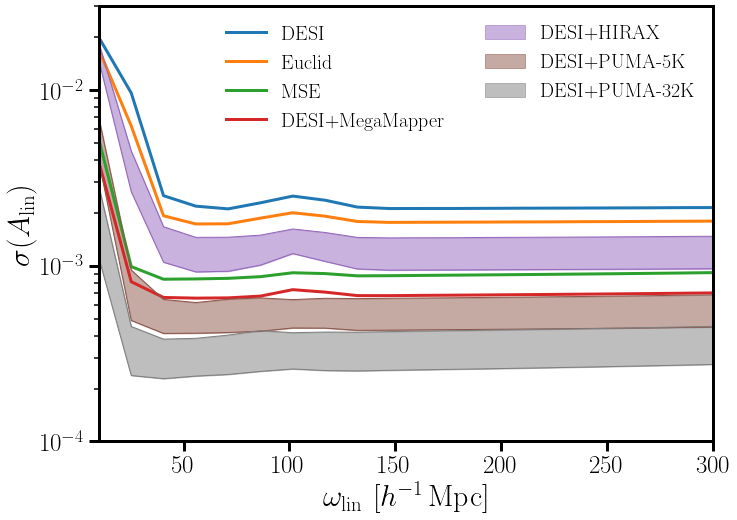

In [202]:
alpha=0.5

fig, ax = plt.subplots(figsize=(11,8))

ax.semilogy(omega_lins,sigmaAlin[0],label=r'DESI',lw=3,c='C0')
ax.semilogy(omega_lins,sigmaAlin[1],label=r'Euclid',lw=3,c='C1')
ax.semilogy(omega_lins,sigmaAlin[2],label=r'MSE',lw=3,c='C2')
ax.semilogy(omega_lins,sigmaAlin[3],label=r'DESI+MegaMapper',lw=3,c='C3')

ax.fill_between(omega_lins,sigmaAlin[8],sigmaAlin[9],label='DESI+HIRAX',alpha=alpha,color='C4')
ax.semilogy(omega_lins,sigmaAlin[8],lw=1,c='C4')
ax.semilogy(omega_lins,sigmaAlin[9],lw=1,c='C4')

ax.fill_between(omega_lins,sigmaAlin[4],sigmaAlin[5],label='DESI+PUMA-5K',alpha=alpha,color='C5')
ax.semilogy(omega_lins,sigmaAlin[4],lw=1,c='C5')
ax.semilogy(omega_lins,sigmaAlin[5],lw=1,c='C5')

ax.fill_between(omega_lins,sigmaAlin[6],sigmaAlin[7],label='DESI+PUMA-32K',alpha=alpha,color='C7')
ax.semilogy(omega_lins,sigmaAlin[6],lw=1,c='C7')
ax.semilogy(omega_lins,sigmaAlin[7],lw=1,c='C7')

plt.xlim(10,300)
plt.ylim(1e-4,3e-2)
ax.set_xlabel(r'$\omega_{\text{lin}}\,\,[h^{-1}\,\text{Mpc}]$')
ax.set_ylabel(r'$\sigma(A_{\text{lin}})$')
ax.legend(loc='upper right',fontsize=20,frameon=False,ncol=2)

plt.savefig('figures/a_lin_constraints.pdf',bbox_inches='tight')

## Fitting $\alpha_0$

In [ ]:
plt.figure(figsize=(14,6))
zs = np.array([3,4,5,6])

def sketchy_fit(zs,b): return 1.22 + 0.24*b**2*(zs-5.96)

alpha0s_b2 = np.array([-1.31935195,-0.65809596,-0.18420515,0.71498688])
alpha0s_b3 = np.array([-4.79938307,-2.66281887,-1.24095722,0.99833036])
alpha0s_b4 = np.array([-10.2127226,-5.81759548,-2.96337951,1.2157253])
alpha0s_b5 = np.array([-17.55936976,-10.12243213,-5.35147573,1.36718324])

plt.plot(zs,alpha0s_b2,label=r'$b=2$',lw=3)
plt.plot(zs,alpha0s_b3,label=r'$b=3$',lw=3)
plt.plot(zs,alpha0s_b4,label=r'$b=4$',lw=3)
plt.plot(zs,alpha0s_b5,label=r'$b=5$',lw=3)

plt.plot(zs,sketchy_fit(zs,2),c='k',label=r'$1.22+0.24 b^2(z-5.96)$')
plt.plot(zs,sketchy_fit(zs,3),c='k')
plt.plot(zs,sketchy_fit(zs,4),c='k')
plt.plot(zs,sketchy_fit(zs,5),c='k')

plt.xlabel(r'$z$')
plt.ylabel(r'$\alpha_0$ (best fit)')
plt.legend(loc='lower right',frameon=False,ncol=2)
plt.savefig('figures/alpha0_fitting1.pdf',bbox_inches='tight')